In [1]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split, GridSearchCV
import catboost as cb
from sklearn import metrics

data = pd.read_csv("../flights.csv")
data = data.sample(frac = 0.01, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)

/root/anaconda3/envs/mypy37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))


In [3]:
cat_features_index = [0,1,2,3,4,5,6]

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
          'eval_metric': ['AUC'],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300, 500]}

cbc = cb.CatBoostClassifier()
cb_model = GridSearchCV(cbc, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

0:	total: 146ms	remaining: 43.7s
1:	total: 219ms	remaining: 32.6s
2:	total: 277ms	remaining: 27.5s
3:	total: 328ms	remaining: 24.3s
4:	total: 383ms	remaining: 22.6s
5:	total: 444ms	remaining: 21.8s
6:	total: 496ms	remaining: 20.8s
7:	total: 546ms	remaining: 19.9s
8:	total: 600ms	remaining: 19.4s
9:	total: 652ms	remaining: 18.9s
10:	total: 708ms	remaining: 18.6s
11:	total: 760ms	remaining: 18.2s
12:	total: 814ms	remaining: 18s
13:	total: 864ms	remaining: 17.7s
14:	total: 913ms	remaining: 17.3s
15:	total: 962ms	remaining: 17.1s
16:	total: 1.01s	remaining: 16.9s
17:	total: 1.07s	remaining: 16.7s
18:	total: 1.12s	remaining: 16.5s
19:	total: 1.17s	remaining: 16.3s
20:	total: 1.22s	remaining: 16.1s
21:	total: 1.27s	remaining: 16s
22:	total: 1.32s	remaining: 15.9s
23:	total: 1.36s	remaining: 15.7s
24:	total: 1.41s	remaining: 15.6s
25:	total: 1.46s	remaining: 15.4s
26:	total: 1.51s	remaining: 15.3s
27:	total: 1.57s	remaining: 15.2s
28:	total: 1.63s	remaining: 15.2s
29:	total: 1.68s	remaining: 

240:	total: 12.6s	remaining: 3.09s
241:	total: 12.7s	remaining: 3.04s
242:	total: 12.7s	remaining: 2.99s
243:	total: 12.8s	remaining: 2.94s
244:	total: 12.8s	remaining: 2.88s
245:	total: 12.9s	remaining: 2.83s
246:	total: 12.9s	remaining: 2.78s
247:	total: 13s	remaining: 2.73s
248:	total: 13.1s	remaining: 2.67s
249:	total: 13.1s	remaining: 2.62s
250:	total: 13.2s	remaining: 2.57s
251:	total: 13.2s	remaining: 2.52s
252:	total: 13.3s	remaining: 2.47s
253:	total: 13.3s	remaining: 2.41s
254:	total: 13.4s	remaining: 2.36s
255:	total: 13.4s	remaining: 2.31s
256:	total: 13.5s	remaining: 2.25s
257:	total: 13.5s	remaining: 2.2s
258:	total: 13.6s	remaining: 2.15s
259:	total: 13.6s	remaining: 2.1s
260:	total: 13.7s	remaining: 2.04s
261:	total: 13.7s	remaining: 1.99s
262:	total: 13.8s	remaining: 1.94s
263:	total: 13.8s	remaining: 1.89s
264:	total: 13.9s	remaining: 1.83s
265:	total: 13.9s	remaining: 1.78s
266:	total: 14s	remaining: 1.73s
267:	total: 14.1s	remaining: 1.68s
268:	total: 14.1s	remainin

181:	total: 8.64s	remaining: 5.6s
182:	total: 8.68s	remaining: 5.55s
183:	total: 8.73s	remaining: 5.5s
184:	total: 8.78s	remaining: 5.45s
185:	total: 8.82s	remaining: 5.41s
186:	total: 8.89s	remaining: 5.37s
187:	total: 8.93s	remaining: 5.32s
188:	total: 8.97s	remaining: 5.27s
189:	total: 9.02s	remaining: 5.22s
190:	total: 9.06s	remaining: 5.17s
191:	total: 9.1s	remaining: 5.12s
192:	total: 9.15s	remaining: 5.07s
193:	total: 9.19s	remaining: 5.02s
194:	total: 9.24s	remaining: 4.97s
195:	total: 9.29s	remaining: 4.93s
196:	total: 9.33s	remaining: 4.88s
197:	total: 9.38s	remaining: 4.83s
198:	total: 9.42s	remaining: 4.78s
199:	total: 9.47s	remaining: 4.74s
200:	total: 9.51s	remaining: 4.68s
201:	total: 9.56s	remaining: 4.64s
202:	total: 9.61s	remaining: 4.59s
203:	total: 9.66s	remaining: 4.54s
204:	total: 9.7s	remaining: 4.5s
205:	total: 9.74s	remaining: 4.44s
206:	total: 9.79s	remaining: 4.4s
207:	total: 9.84s	remaining: 4.35s
208:	total: 9.88s	remaining: 4.3s
209:	total: 9.93s	remaining

120:	total: 5s	remaining: 7.39s
121:	total: 5.04s	remaining: 7.35s
122:	total: 5.08s	remaining: 7.31s
123:	total: 5.11s	remaining: 7.25s
124:	total: 5.14s	remaining: 7.2s
125:	total: 5.18s	remaining: 7.16s
126:	total: 5.22s	remaining: 7.12s
127:	total: 5.26s	remaining: 7.07s
128:	total: 5.31s	remaining: 7.04s
129:	total: 5.36s	remaining: 7.01s
130:	total: 5.41s	remaining: 6.98s
131:	total: 5.46s	remaining: 6.95s
132:	total: 5.52s	remaining: 6.93s
133:	total: 5.58s	remaining: 6.91s
134:	total: 5.63s	remaining: 6.88s
135:	total: 5.67s	remaining: 6.84s
136:	total: 5.72s	remaining: 6.81s
137:	total: 5.76s	remaining: 6.76s
138:	total: 5.81s	remaining: 6.73s
139:	total: 5.85s	remaining: 6.68s
140:	total: 5.89s	remaining: 6.64s
141:	total: 5.94s	remaining: 6.61s
142:	total: 5.98s	remaining: 6.57s
143:	total: 6.02s	remaining: 6.52s
144:	total: 6.05s	remaining: 6.47s
145:	total: 6.09s	remaining: 6.42s
146:	total: 6.13s	remaining: 6.38s
147:	total: 6.17s	remaining: 6.33s
148:	total: 6.21s	remain

59:	total: 3.22s	remaining: 12.9s
60:	total: 3.27s	remaining: 12.8s
61:	total: 3.33s	remaining: 12.8s
62:	total: 3.38s	remaining: 12.7s
63:	total: 3.43s	remaining: 12.7s
64:	total: 3.48s	remaining: 12.6s
65:	total: 3.53s	remaining: 12.5s
66:	total: 3.59s	remaining: 12.5s
67:	total: 3.64s	remaining: 12.4s
68:	total: 3.7s	remaining: 12.4s
69:	total: 3.75s	remaining: 12.3s
70:	total: 3.8s	remaining: 12.3s
71:	total: 3.85s	remaining: 12.2s
72:	total: 3.9s	remaining: 12.1s
73:	total: 3.94s	remaining: 12s
74:	total: 4s	remaining: 12s
75:	total: 4.05s	remaining: 11.9s
76:	total: 4.12s	remaining: 11.9s
77:	total: 4.17s	remaining: 11.9s
78:	total: 4.22s	remaining: 11.8s
79:	total: 4.27s	remaining: 11.8s
80:	total: 4.33s	remaining: 11.7s
81:	total: 4.38s	remaining: 11.6s
82:	total: 4.43s	remaining: 11.6s
83:	total: 4.48s	remaining: 11.5s
84:	total: 4.56s	remaining: 11.5s
85:	total: 4.62s	remaining: 11.5s
86:	total: 4.66s	remaining: 11.4s
87:	total: 4.71s	remaining: 11.3s
88:	total: 4.76s	remaini

298:	total: 16.7s	remaining: 55.9ms
299:	total: 16.8s	remaining: 0us
0:	total: 70.1ms	remaining: 21s
1:	total: 130ms	remaining: 19.4s
2:	total: 182ms	remaining: 18s
3:	total: 234ms	remaining: 17.3s
4:	total: 292ms	remaining: 17.2s
5:	total: 345ms	remaining: 16.9s
6:	total: 400ms	remaining: 16.7s
7:	total: 450ms	remaining: 16.4s
8:	total: 499ms	remaining: 16.1s
9:	total: 547ms	remaining: 15.9s
10:	total: 596ms	remaining: 15.7s
11:	total: 643ms	remaining: 15.4s
12:	total: 690ms	remaining: 15.2s
13:	total: 748ms	remaining: 15.3s
14:	total: 798ms	remaining: 15.2s
15:	total: 845ms	remaining: 15s
16:	total: 894ms	remaining: 14.9s
17:	total: 943ms	remaining: 14.8s
18:	total: 995ms	remaining: 14.7s
19:	total: 1.05s	remaining: 14.7s
20:	total: 1.1s	remaining: 14.6s
21:	total: 1.16s	remaining: 14.6s
22:	total: 1.2s	remaining: 14.5s
23:	total: 1.26s	remaining: 14.5s
24:	total: 1.32s	remaining: 14.6s
25:	total: 1.38s	remaining: 14.5s
26:	total: 1.43s	remaining: 14.4s
27:	total: 1.48s	remaining: 14

239:	total: 12.8s	remaining: 3.2s
240:	total: 12.8s	remaining: 3.14s
241:	total: 12.9s	remaining: 3.09s
242:	total: 13s	remaining: 3.04s
243:	total: 13s	remaining: 2.99s
244:	total: 13.1s	remaining: 2.93s
245:	total: 13.1s	remaining: 2.88s
246:	total: 13.2s	remaining: 2.83s
247:	total: 13.2s	remaining: 2.77s
248:	total: 13.3s	remaining: 2.72s
249:	total: 13.3s	remaining: 2.67s
250:	total: 13.4s	remaining: 2.62s
251:	total: 13.5s	remaining: 2.56s
252:	total: 13.5s	remaining: 2.51s
253:	total: 13.6s	remaining: 2.45s
254:	total: 13.6s	remaining: 2.4s
255:	total: 13.7s	remaining: 2.35s
256:	total: 13.7s	remaining: 2.3s
257:	total: 13.8s	remaining: 2.24s
258:	total: 13.8s	remaining: 2.19s
259:	total: 13.9s	remaining: 2.14s
260:	total: 13.9s	remaining: 2.08s
261:	total: 14s	remaining: 2.03s
262:	total: 14s	remaining: 1.98s
263:	total: 14.1s	remaining: 1.92s
264:	total: 14.2s	remaining: 1.87s
265:	total: 14.2s	remaining: 1.81s
266:	total: 14.3s	remaining: 1.76s
267:	total: 14.3s	remaining: 1.

178:	total: 8.71s	remaining: 5.88s
179:	total: 8.77s	remaining: 5.85s
180:	total: 8.83s	remaining: 5.8s
181:	total: 8.87s	remaining: 5.75s
182:	total: 8.92s	remaining: 5.7s
183:	total: 8.96s	remaining: 5.65s
184:	total: 9s	remaining: 5.59s
185:	total: 9.05s	remaining: 5.54s
186:	total: 9.09s	remaining: 5.49s
187:	total: 9.15s	remaining: 5.45s
188:	total: 9.21s	remaining: 5.41s
189:	total: 9.27s	remaining: 5.37s
190:	total: 9.33s	remaining: 5.33s
191:	total: 9.39s	remaining: 5.28s
192:	total: 9.44s	remaining: 5.24s
193:	total: 9.48s	remaining: 5.18s
194:	total: 9.53s	remaining: 5.13s
195:	total: 9.58s	remaining: 5.08s
196:	total: 9.63s	remaining: 5.04s
197:	total: 9.69s	remaining: 4.99s
198:	total: 9.74s	remaining: 4.95s
199:	total: 9.79s	remaining: 4.89s
200:	total: 9.85s	remaining: 4.85s
201:	total: 9.91s	remaining: 4.81s
202:	total: 9.96s	remaining: 4.76s
203:	total: 10s	remaining: 4.71s
204:	total: 10s	remaining: 4.66s
205:	total: 10.1s	remaining: 4.61s
206:	total: 10.2s	remaining: 

119:	total: 6.84s	remaining: 10.3s
120:	total: 6.89s	remaining: 10.2s
121:	total: 6.95s	remaining: 10.1s
122:	total: 6.99s	remaining: 10.1s
123:	total: 7.05s	remaining: 10s
124:	total: 7.11s	remaining: 9.95s
125:	total: 7.16s	remaining: 9.89s
126:	total: 7.21s	remaining: 9.83s
127:	total: 7.28s	remaining: 9.79s
128:	total: 7.34s	remaining: 9.73s
129:	total: 7.39s	remaining: 9.67s
130:	total: 7.45s	remaining: 9.62s
131:	total: 7.52s	remaining: 9.57s
132:	total: 7.58s	remaining: 9.52s
133:	total: 7.64s	remaining: 9.46s
134:	total: 7.7s	remaining: 9.41s
135:	total: 7.75s	remaining: 9.35s
136:	total: 7.8s	remaining: 9.28s
137:	total: 7.85s	remaining: 9.22s
138:	total: 7.91s	remaining: 9.16s
139:	total: 7.96s	remaining: 9.1s
140:	total: 8.02s	remaining: 9.04s
141:	total: 8.08s	remaining: 8.99s
142:	total: 8.13s	remaining: 8.93s
143:	total: 8.18s	remaining: 8.86s
144:	total: 8.23s	remaining: 8.8s
145:	total: 8.29s	remaining: 8.74s
146:	total: 8.35s	remaining: 8.69s
147:	total: 8.4s	remaining

57:	total: 3.02s	remaining: 12.6s
58:	total: 3.07s	remaining: 12.5s
59:	total: 3.12s	remaining: 12.5s
60:	total: 3.17s	remaining: 12.4s
61:	total: 3.23s	remaining: 12.4s
62:	total: 3.28s	remaining: 12.3s
63:	total: 3.33s	remaining: 12.3s
64:	total: 3.38s	remaining: 12.2s
65:	total: 3.43s	remaining: 12.2s
66:	total: 3.5s	remaining: 12.2s
67:	total: 3.55s	remaining: 12.1s
68:	total: 3.6s	remaining: 12.1s
69:	total: 3.66s	remaining: 12s
70:	total: 3.72s	remaining: 12s
71:	total: 3.78s	remaining: 12s
72:	total: 3.84s	remaining: 12s
73:	total: 3.9s	remaining: 11.9s
74:	total: 3.96s	remaining: 11.9s
75:	total: 4.02s	remaining: 11.8s
76:	total: 4.07s	remaining: 11.8s
77:	total: 4.13s	remaining: 11.7s
78:	total: 4.17s	remaining: 11.7s
79:	total: 4.22s	remaining: 11.6s
80:	total: 4.27s	remaining: 11.6s
81:	total: 4.32s	remaining: 11.5s
82:	total: 4.38s	remaining: 11.5s
83:	total: 4.44s	remaining: 11.4s
84:	total: 4.49s	remaining: 11.4s
85:	total: 4.54s	remaining: 11.3s
86:	total: 4.6s	remaining

297:	total: 16.3s	remaining: 109ms
298:	total: 16.3s	remaining: 54.6ms
299:	total: 16.4s	remaining: 0us
0:	total: 74.7ms	remaining: 22.3s
1:	total: 138ms	remaining: 20.6s
2:	total: 194ms	remaining: 19.2s
3:	total: 242ms	remaining: 17.9s
4:	total: 296ms	remaining: 17.4s
5:	total: 355ms	remaining: 17.4s
6:	total: 403ms	remaining: 16.9s
7:	total: 459ms	remaining: 16.8s
8:	total: 507ms	remaining: 16.4s
9:	total: 560ms	remaining: 16.2s
10:	total: 613ms	remaining: 16.1s
11:	total: 666ms	remaining: 16s
12:	total: 718ms	remaining: 15.8s
13:	total: 767ms	remaining: 15.7s
14:	total: 814ms	remaining: 15.5s
15:	total: 867ms	remaining: 15.4s
16:	total: 921ms	remaining: 15.3s
17:	total: 974ms	remaining: 15.3s
18:	total: 1.02s	remaining: 15.1s
19:	total: 1.08s	remaining: 15.1s
20:	total: 1.13s	remaining: 15s
21:	total: 1.18s	remaining: 14.9s
22:	total: 1.23s	remaining: 14.8s
23:	total: 1.27s	remaining: 14.7s
24:	total: 1.32s	remaining: 14.6s
25:	total: 1.38s	remaining: 14.5s
26:	total: 1.43s	remainin

240:	total: 12.9s	remaining: 3.15s
241:	total: 12.9s	remaining: 3.09s
242:	total: 13s	remaining: 3.04s
243:	total: 13s	remaining: 2.99s
244:	total: 13.1s	remaining: 2.94s
245:	total: 13.2s	remaining: 2.89s
246:	total: 13.2s	remaining: 2.83s
247:	total: 13.3s	remaining: 2.78s
248:	total: 13.3s	remaining: 2.73s
249:	total: 13.4s	remaining: 2.67s
250:	total: 13.4s	remaining: 2.62s
251:	total: 13.5s	remaining: 2.56s
252:	total: 13.5s	remaining: 2.51s
253:	total: 13.6s	remaining: 2.46s
254:	total: 13.6s	remaining: 2.4s
255:	total: 13.7s	remaining: 2.35s
256:	total: 13.7s	remaining: 2.3s
257:	total: 13.8s	remaining: 2.24s
258:	total: 13.8s	remaining: 2.19s
259:	total: 13.9s	remaining: 2.14s
260:	total: 13.9s	remaining: 2.08s
261:	total: 14s	remaining: 2.03s
262:	total: 14.1s	remaining: 1.98s
263:	total: 14.1s	remaining: 1.93s
264:	total: 14.2s	remaining: 1.87s
265:	total: 14.2s	remaining: 1.82s
266:	total: 14.3s	remaining: 1.77s
267:	total: 14.3s	remaining: 1.71s
268:	total: 14.4s	remaining:

180:	total: 10.3s	remaining: 6.74s
181:	total: 10.3s	remaining: 6.69s
182:	total: 10.4s	remaining: 6.63s
183:	total: 10.4s	remaining: 6.58s
184:	total: 10.5s	remaining: 6.52s
185:	total: 10.5s	remaining: 6.46s
186:	total: 10.6s	remaining: 6.4s
187:	total: 10.7s	remaining: 6.35s
188:	total: 10.7s	remaining: 6.29s
189:	total: 10.8s	remaining: 6.23s
190:	total: 10.8s	remaining: 6.18s
191:	total: 10.9s	remaining: 6.12s
192:	total: 10.9s	remaining: 6.06s
193:	total: 11s	remaining: 6.01s
194:	total: 11s	remaining: 5.95s
195:	total: 11.1s	remaining: 5.89s
196:	total: 11.2s	remaining: 5.84s
197:	total: 11.2s	remaining: 5.79s
198:	total: 11.3s	remaining: 5.73s
199:	total: 11.3s	remaining: 5.67s
200:	total: 11.4s	remaining: 5.61s
201:	total: 11.5s	remaining: 5.56s
202:	total: 11.5s	remaining: 5.51s
203:	total: 11.6s	remaining: 5.45s
204:	total: 11.6s	remaining: 5.4s
205:	total: 11.7s	remaining: 5.34s
206:	total: 11.8s	remaining: 5.28s
207:	total: 11.8s	remaining: 5.23s
208:	total: 11.9s	remainin

123:	total: 6.7s	remaining: 9.52s
124:	total: 6.76s	remaining: 9.46s
125:	total: 6.81s	remaining: 9.4s
126:	total: 6.85s	remaining: 9.34s
127:	total: 6.91s	remaining: 9.29s
128:	total: 6.96s	remaining: 9.23s
129:	total: 7.03s	remaining: 9.19s
130:	total: 7.09s	remaining: 9.15s
131:	total: 7.14s	remaining: 9.09s
132:	total: 7.2s	remaining: 9.04s
133:	total: 7.25s	remaining: 8.98s
134:	total: 7.3s	remaining: 8.92s
135:	total: 7.36s	remaining: 8.88s
136:	total: 7.43s	remaining: 8.84s
137:	total: 7.49s	remaining: 8.79s
138:	total: 7.54s	remaining: 8.73s
139:	total: 7.59s	remaining: 8.68s
140:	total: 7.65s	remaining: 8.63s
141:	total: 7.71s	remaining: 8.57s
142:	total: 7.76s	remaining: 8.52s
143:	total: 7.81s	remaining: 8.46s
144:	total: 7.86s	remaining: 8.4s
145:	total: 7.91s	remaining: 8.35s
146:	total: 7.96s	remaining: 8.29s
147:	total: 8.02s	remaining: 8.23s
148:	total: 8.07s	remaining: 8.18s
149:	total: 8.12s	remaining: 8.12s
150:	total: 8.18s	remaining: 8.07s
151:	total: 8.23s	remaini

65:	total: 3.68s	remaining: 13s
66:	total: 3.73s	remaining: 13s
67:	total: 3.79s	remaining: 12.9s
68:	total: 3.84s	remaining: 12.9s
69:	total: 3.89s	remaining: 12.8s
70:	total: 3.95s	remaining: 12.7s
71:	total: 4.01s	remaining: 12.7s
72:	total: 4.07s	remaining: 12.7s
73:	total: 4.13s	remaining: 12.6s
74:	total: 4.18s	remaining: 12.6s
75:	total: 4.24s	remaining: 12.5s
76:	total: 4.3s	remaining: 12.4s
77:	total: 4.35s	remaining: 12.4s
78:	total: 4.41s	remaining: 12.3s
79:	total: 4.46s	remaining: 12.3s
80:	total: 4.51s	remaining: 12.2s
81:	total: 4.57s	remaining: 12.1s
82:	total: 4.63s	remaining: 12.1s
83:	total: 4.68s	remaining: 12s
84:	total: 4.74s	remaining: 12s
85:	total: 4.8s	remaining: 11.9s
86:	total: 4.84s	remaining: 11.9s
87:	total: 4.89s	remaining: 11.8s
88:	total: 4.93s	remaining: 11.7s
89:	total: 4.98s	remaining: 11.6s
90:	total: 5.03s	remaining: 11.6s
91:	total: 5.07s	remaining: 11.5s
92:	total: 5.11s	remaining: 11.4s
93:	total: 5.17s	remaining: 11.3s
94:	total: 5.23s	remaini

4:	total: 297ms	remaining: 17.5s
5:	total: 355ms	remaining: 17.4s
6:	total: 411ms	remaining: 17.2s
7:	total: 468ms	remaining: 17.1s
8:	total: 525ms	remaining: 17s
9:	total: 580ms	remaining: 16.8s
10:	total: 639ms	remaining: 16.8s
11:	total: 694ms	remaining: 16.7s
12:	total: 746ms	remaining: 16.5s
13:	total: 798ms	remaining: 16.3s
14:	total: 848ms	remaining: 16.1s
15:	total: 901ms	remaining: 16s
16:	total: 958ms	remaining: 15.9s
17:	total: 1.01s	remaining: 15.9s
18:	total: 1.06s	remaining: 15.7s
19:	total: 1.12s	remaining: 15.7s
20:	total: 1.17s	remaining: 15.6s
21:	total: 1.23s	remaining: 15.5s
22:	total: 1.28s	remaining: 15.5s
23:	total: 1.34s	remaining: 15.4s
24:	total: 1.39s	remaining: 15.3s
25:	total: 1.45s	remaining: 15.3s
26:	total: 1.5s	remaining: 15.2s
27:	total: 1.56s	remaining: 15.2s
28:	total: 1.62s	remaining: 15.1s
29:	total: 1.67s	remaining: 15.1s
30:	total: 1.72s	remaining: 15s
31:	total: 1.78s	remaining: 14.9s
32:	total: 1.84s	remaining: 14.9s
33:	total: 1.91s	remaining:

246:	total: 14.2s	remaining: 3.04s
247:	total: 14.2s	remaining: 2.98s
248:	total: 14.3s	remaining: 2.92s
249:	total: 14.3s	remaining: 2.86s
250:	total: 14.4s	remaining: 2.81s
251:	total: 14.4s	remaining: 2.75s
252:	total: 14.5s	remaining: 2.69s
253:	total: 14.5s	remaining: 2.63s
254:	total: 14.6s	remaining: 2.58s
255:	total: 14.7s	remaining: 2.52s
256:	total: 14.7s	remaining: 2.46s
257:	total: 14.8s	remaining: 2.41s
258:	total: 14.9s	remaining: 2.35s
259:	total: 14.9s	remaining: 2.29s
260:	total: 15s	remaining: 2.24s
261:	total: 15s	remaining: 2.18s
262:	total: 15.1s	remaining: 2.12s
263:	total: 15.1s	remaining: 2.06s
264:	total: 15.2s	remaining: 2.01s
265:	total: 15.3s	remaining: 1.95s
266:	total: 15.3s	remaining: 1.89s
267:	total: 15.4s	remaining: 1.84s
268:	total: 15.4s	remaining: 1.78s
269:	total: 15.5s	remaining: 1.72s
270:	total: 15.6s	remaining: 1.66s
271:	total: 15.6s	remaining: 1.61s
272:	total: 15.7s	remaining: 1.55s
273:	total: 15.7s	remaining: 1.49s
274:	total: 15.8s	remain

186:	total: 10.9s	remaining: 6.57s
187:	total: 10.9s	remaining: 6.51s
188:	total: 11s	remaining: 6.45s
189:	total: 11s	remaining: 6.39s
190:	total: 11.1s	remaining: 6.34s
191:	total: 11.2s	remaining: 6.28s
192:	total: 11.2s	remaining: 6.23s
193:	total: 11.3s	remaining: 6.17s
194:	total: 11.4s	remaining: 6.12s
195:	total: 11.4s	remaining: 6.06s
196:	total: 11.5s	remaining: 6.01s
197:	total: 11.6s	remaining: 5.96s
198:	total: 11.6s	remaining: 5.9s
199:	total: 11.7s	remaining: 5.85s
200:	total: 11.8s	remaining: 5.79s
201:	total: 11.8s	remaining: 5.73s
202:	total: 11.9s	remaining: 5.68s
203:	total: 11.9s	remaining: 5.62s
204:	total: 12s	remaining: 5.56s
205:	total: 12s	remaining: 5.49s
206:	total: 12.1s	remaining: 5.43s
207:	total: 12.1s	remaining: 5.36s
208:	total: 12.2s	remaining: 5.3s
209:	total: 12.2s	remaining: 5.24s
210:	total: 12.3s	remaining: 5.17s
211:	total: 12.3s	remaining: 5.11s
212:	total: 12.3s	remaining: 5.04s
213:	total: 12.4s	remaining: 4.99s
214:	total: 12.5s	remaining: 4

129:	total: 7.05s	remaining: 9.21s
130:	total: 7.1s	remaining: 9.16s
131:	total: 7.16s	remaining: 9.11s
132:	total: 7.21s	remaining: 9.05s
133:	total: 7.27s	remaining: 9s
134:	total: 7.32s	remaining: 8.95s
135:	total: 7.38s	remaining: 8.89s
136:	total: 7.43s	remaining: 8.84s
137:	total: 7.49s	remaining: 8.79s
138:	total: 7.54s	remaining: 8.74s
139:	total: 7.59s	remaining: 8.68s
140:	total: 7.65s	remaining: 8.62s
141:	total: 7.7s	remaining: 8.57s
142:	total: 7.76s	remaining: 8.52s
143:	total: 7.82s	remaining: 8.47s
144:	total: 7.88s	remaining: 8.42s
145:	total: 7.94s	remaining: 8.37s
146:	total: 7.99s	remaining: 8.32s
147:	total: 8.05s	remaining: 8.27s
148:	total: 8.11s	remaining: 8.22s
149:	total: 8.17s	remaining: 8.17s
150:	total: 8.23s	remaining: 8.12s
151:	total: 8.28s	remaining: 8.06s
152:	total: 8.34s	remaining: 8.01s
153:	total: 8.39s	remaining: 7.95s
154:	total: 8.44s	remaining: 7.9s
155:	total: 8.5s	remaining: 7.84s
156:	total: 8.56s	remaining: 7.79s
157:	total: 8.62s	remaining

68:	total: 3.77s	remaining: 12.6s
69:	total: 3.82s	remaining: 12.6s
70:	total: 3.88s	remaining: 12.5s
71:	total: 3.93s	remaining: 12.5s
72:	total: 3.99s	remaining: 12.4s
73:	total: 4.04s	remaining: 12.3s
74:	total: 4.11s	remaining: 12.3s
75:	total: 4.16s	remaining: 12.3s
76:	total: 4.23s	remaining: 12.2s
77:	total: 4.28s	remaining: 12.2s
78:	total: 4.33s	remaining: 12.1s
79:	total: 4.39s	remaining: 12.1s
80:	total: 4.44s	remaining: 12s
81:	total: 4.5s	remaining: 12s
82:	total: 4.55s	remaining: 11.9s
83:	total: 4.61s	remaining: 11.8s
84:	total: 4.66s	remaining: 11.8s
85:	total: 4.72s	remaining: 11.7s
86:	total: 4.77s	remaining: 11.7s
87:	total: 4.83s	remaining: 11.6s
88:	total: 4.89s	remaining: 11.6s
89:	total: 4.94s	remaining: 11.5s
90:	total: 5s	remaining: 11.5s
91:	total: 5.05s	remaining: 11.4s
92:	total: 5.11s	remaining: 11.4s
93:	total: 5.16s	remaining: 11.3s
94:	total: 5.21s	remaining: 11.2s
95:	total: 5.26s	remaining: 11.2s
96:	total: 5.32s	remaining: 11.1s
97:	total: 5.37s	remai

8:	total: 494ms	remaining: 16s
9:	total: 545ms	remaining: 15.8s
10:	total: 598ms	remaining: 15.7s
11:	total: 648ms	remaining: 15.6s
12:	total: 701ms	remaining: 15.5s
13:	total: 754ms	remaining: 15.4s
14:	total: 807ms	remaining: 15.3s
15:	total: 860ms	remaining: 15.3s
16:	total: 913ms	remaining: 15.2s
17:	total: 967ms	remaining: 15.1s
18:	total: 1.02s	remaining: 15s
19:	total: 1.06s	remaining: 14.9s
20:	total: 1.12s	remaining: 14.8s
21:	total: 1.17s	remaining: 14.8s
22:	total: 1.23s	remaining: 14.8s
23:	total: 1.28s	remaining: 14.7s
24:	total: 1.33s	remaining: 14.6s
25:	total: 1.38s	remaining: 14.6s
26:	total: 1.44s	remaining: 14.5s
27:	total: 1.49s	remaining: 14.5s
28:	total: 1.55s	remaining: 14.5s
29:	total: 1.6s	remaining: 14.4s
30:	total: 1.65s	remaining: 14.3s
31:	total: 1.7s	remaining: 14.3s
32:	total: 1.76s	remaining: 14.2s
33:	total: 1.81s	remaining: 14.2s
34:	total: 1.86s	remaining: 14.1s
35:	total: 1.91s	remaining: 14s
36:	total: 1.96s	remaining: 13.9s
37:	total: 2.02s	remaini

248:	total: 13.7s	remaining: 2.8s
249:	total: 13.7s	remaining: 2.75s
250:	total: 13.8s	remaining: 2.69s
251:	total: 13.8s	remaining: 2.64s
252:	total: 13.9s	remaining: 2.58s
253:	total: 14s	remaining: 2.53s
254:	total: 14s	remaining: 2.47s
255:	total: 14.1s	remaining: 2.42s
256:	total: 14.1s	remaining: 2.36s
257:	total: 14.2s	remaining: 2.31s
258:	total: 14.2s	remaining: 2.25s
259:	total: 14.3s	remaining: 2.2s
260:	total: 14.3s	remaining: 2.14s
261:	total: 14.4s	remaining: 2.09s
262:	total: 14.5s	remaining: 2.03s
263:	total: 14.5s	remaining: 1.98s
264:	total: 14.6s	remaining: 1.92s
265:	total: 14.6s	remaining: 1.87s
266:	total: 14.7s	remaining: 1.81s
267:	total: 14.7s	remaining: 1.76s
268:	total: 14.8s	remaining: 1.7s
269:	total: 14.8s	remaining: 1.65s
270:	total: 14.9s	remaining: 1.59s
271:	total: 14.9s	remaining: 1.54s
272:	total: 15s	remaining: 1.48s
273:	total: 15s	remaining: 1.43s
274:	total: 15.1s	remaining: 1.37s
275:	total: 15.1s	remaining: 1.32s
276:	total: 15.2s	remaining: 1.

189:	total: 10.4s	remaining: 6.01s
190:	total: 10.4s	remaining: 5.95s
191:	total: 10.5s	remaining: 5.9s
192:	total: 10.5s	remaining: 5.84s
193:	total: 10.6s	remaining: 5.79s
194:	total: 10.6s	remaining: 5.73s
195:	total: 10.7s	remaining: 5.68s
196:	total: 10.8s	remaining: 5.62s
197:	total: 10.8s	remaining: 5.57s
198:	total: 10.9s	remaining: 5.51s
199:	total: 10.9s	remaining: 5.46s
200:	total: 11s	remaining: 5.4s
201:	total: 11s	remaining: 5.35s
202:	total: 11.1s	remaining: 5.29s
203:	total: 11.1s	remaining: 5.24s
204:	total: 11.2s	remaining: 5.19s
205:	total: 11.3s	remaining: 5.13s
206:	total: 11.3s	remaining: 5.08s
207:	total: 11.4s	remaining: 5.02s
208:	total: 11.4s	remaining: 4.97s
209:	total: 11.5s	remaining: 4.92s
210:	total: 11.5s	remaining: 4.86s
211:	total: 11.6s	remaining: 4.8s
212:	total: 11.6s	remaining: 4.75s
213:	total: 11.7s	remaining: 4.69s
214:	total: 11.7s	remaining: 4.64s
215:	total: 11.8s	remaining: 4.59s
216:	total: 11.9s	remaining: 4.53s
217:	total: 11.9s	remaining

130:	total: 7.19s	remaining: 9.27s
131:	total: 7.24s	remaining: 9.22s
132:	total: 7.3s	remaining: 9.17s
133:	total: 7.35s	remaining: 9.11s
134:	total: 7.4s	remaining: 9.05s
135:	total: 7.46s	remaining: 8.99s
136:	total: 7.51s	remaining: 8.94s
137:	total: 7.56s	remaining: 8.88s
138:	total: 7.62s	remaining: 8.83s
139:	total: 7.68s	remaining: 8.77s
140:	total: 7.74s	remaining: 8.72s
141:	total: 7.79s	remaining: 8.67s
142:	total: 7.85s	remaining: 8.61s
143:	total: 7.9s	remaining: 8.56s
144:	total: 7.95s	remaining: 8.5s
145:	total: 8s	remaining: 8.44s
146:	total: 8.04s	remaining: 8.37s
147:	total: 8.1s	remaining: 8.32s
148:	total: 8.16s	remaining: 8.27s
149:	total: 8.21s	remaining: 8.21s
150:	total: 8.27s	remaining: 8.16s
151:	total: 8.33s	remaining: 8.11s
152:	total: 8.38s	remaining: 8.05s
153:	total: 8.44s	remaining: 8s
154:	total: 8.49s	remaining: 7.95s
155:	total: 8.55s	remaining: 7.89s
156:	total: 8.61s	remaining: 7.84s
157:	total: 8.66s	remaining: 7.79s
158:	total: 8.72s	remaining: 7.

72:	total: 4.23s	remaining: 13.2s
73:	total: 4.28s	remaining: 13.1s
74:	total: 4.34s	remaining: 13s
75:	total: 4.4s	remaining: 13s
76:	total: 4.45s	remaining: 12.9s
77:	total: 4.51s	remaining: 12.8s
78:	total: 4.57s	remaining: 12.8s
79:	total: 4.63s	remaining: 12.7s
80:	total: 4.68s	remaining: 12.7s
81:	total: 4.74s	remaining: 12.6s
82:	total: 4.8s	remaining: 12.6s
83:	total: 4.86s	remaining: 12.5s
84:	total: 4.92s	remaining: 12.4s
85:	total: 4.98s	remaining: 12.4s
86:	total: 5.04s	remaining: 12.3s
87:	total: 5.1s	remaining: 12.3s
88:	total: 5.16s	remaining: 12.2s
89:	total: 5.23s	remaining: 12.2s
90:	total: 5.3s	remaining: 12.2s
91:	total: 5.36s	remaining: 12.1s
92:	total: 5.42s	remaining: 12.1s
93:	total: 5.48s	remaining: 12s
94:	total: 5.54s	remaining: 11.9s
95:	total: 5.59s	remaining: 11.9s
96:	total: 5.65s	remaining: 11.8s
97:	total: 5.71s	remaining: 11.8s
98:	total: 5.77s	remaining: 11.7s
99:	total: 5.83s	remaining: 11.7s
100:	total: 5.89s	remaining: 11.6s
101:	total: 5.94s	remai

13:	total: 579ms	remaining: 11.8s
14:	total: 615ms	remaining: 11.7s
15:	total: 653ms	remaining: 11.6s
16:	total: 693ms	remaining: 11.5s
17:	total: 730ms	remaining: 11.4s
18:	total: 780ms	remaining: 11.5s
19:	total: 833ms	remaining: 11.7s
20:	total: 876ms	remaining: 11.6s
21:	total: 913ms	remaining: 11.5s
22:	total: 948ms	remaining: 11.4s
23:	total: 989ms	remaining: 11.4s
24:	total: 1.03s	remaining: 11.4s
25:	total: 1.09s	remaining: 11.5s
26:	total: 1.14s	remaining: 11.5s
27:	total: 1.18s	remaining: 11.5s
28:	total: 1.23s	remaining: 11.5s
29:	total: 1.27s	remaining: 11.4s
30:	total: 1.3s	remaining: 11.3s
31:	total: 1.34s	remaining: 11.3s
32:	total: 1.38s	remaining: 11.2s
33:	total: 1.42s	remaining: 11.1s
34:	total: 1.45s	remaining: 11s
35:	total: 1.49s	remaining: 10.9s
36:	total: 1.53s	remaining: 10.8s
37:	total: 1.56s	remaining: 10.8s
38:	total: 1.6s	remaining: 10.7s
39:	total: 1.64s	remaining: 10.7s
40:	total: 1.68s	remaining: 10.6s
41:	total: 1.73s	remaining: 10.6s
42:	total: 1.77s	r

254:	total: 11.5s	remaining: 2.02s
255:	total: 11.5s	remaining: 1.98s
256:	total: 11.6s	remaining: 1.93s
257:	total: 11.6s	remaining: 1.89s
258:	total: 11.7s	remaining: 1.85s
259:	total: 11.7s	remaining: 1.8s
260:	total: 11.8s	remaining: 1.76s
261:	total: 11.8s	remaining: 1.72s
262:	total: 11.9s	remaining: 1.67s
263:	total: 11.9s	remaining: 1.63s
264:	total: 12s	remaining: 1.58s
265:	total: 12s	remaining: 1.54s
266:	total: 12.1s	remaining: 1.5s
267:	total: 12.2s	remaining: 1.45s
268:	total: 12.2s	remaining: 1.41s
269:	total: 12.3s	remaining: 1.36s
270:	total: 12.3s	remaining: 1.32s
271:	total: 12.4s	remaining: 1.27s
272:	total: 12.4s	remaining: 1.23s
273:	total: 12.5s	remaining: 1.19s
274:	total: 12.6s	remaining: 1.14s
275:	total: 12.6s	remaining: 1.1s
276:	total: 12.7s	remaining: 1.05s
277:	total: 12.7s	remaining: 1.01s
278:	total: 12.8s	remaining: 964ms
279:	total: 12.9s	remaining: 920ms
280:	total: 12.9s	remaining: 874ms
281:	total: 13s	remaining: 828ms
282:	total: 13s	remaining: 78

196:	total: 11s	remaining: 5.74s
197:	total: 11s	remaining: 5.69s
198:	total: 11.1s	remaining: 5.63s
199:	total: 11.1s	remaining: 5.57s
200:	total: 11.2s	remaining: 5.52s
201:	total: 11.3s	remaining: 5.46s
202:	total: 11.3s	remaining: 5.4s
203:	total: 11.4s	remaining: 5.35s
204:	total: 11.4s	remaining: 5.29s
205:	total: 11.5s	remaining: 5.24s
206:	total: 11.5s	remaining: 5.18s
207:	total: 11.6s	remaining: 5.12s
208:	total: 11.6s	remaining: 5.07s
209:	total: 11.7s	remaining: 5.01s
210:	total: 11.8s	remaining: 4.96s
211:	total: 11.8s	remaining: 4.9s
212:	total: 11.9s	remaining: 4.85s
213:	total: 11.9s	remaining: 4.79s
214:	total: 12s	remaining: 4.74s
215:	total: 12s	remaining: 4.68s
216:	total: 12.1s	remaining: 4.62s
217:	total: 12.1s	remaining: 4.57s
218:	total: 12.2s	remaining: 4.51s
219:	total: 12.3s	remaining: 4.46s
220:	total: 12.3s	remaining: 4.4s
221:	total: 12.4s	remaining: 4.35s
222:	total: 12.4s	remaining: 4.29s
223:	total: 12.5s	remaining: 4.23s
224:	total: 12.5s	remaining: 4.

136:	total: 7.49s	remaining: 8.91s
137:	total: 7.55s	remaining: 8.87s
138:	total: 7.61s	remaining: 8.81s
139:	total: 7.66s	remaining: 8.76s
140:	total: 7.72s	remaining: 8.7s
141:	total: 7.77s	remaining: 8.65s
142:	total: 7.83s	remaining: 8.59s
143:	total: 7.88s	remaining: 8.54s
144:	total: 7.94s	remaining: 8.48s
145:	total: 7.99s	remaining: 8.43s
146:	total: 8.04s	remaining: 8.37s
147:	total: 8.1s	remaining: 8.32s
148:	total: 8.15s	remaining: 8.27s
149:	total: 8.21s	remaining: 8.21s
150:	total: 8.27s	remaining: 8.15s
151:	total: 8.32s	remaining: 8.1s
152:	total: 8.37s	remaining: 8.04s
153:	total: 8.43s	remaining: 7.99s
154:	total: 8.49s	remaining: 7.94s
155:	total: 8.54s	remaining: 7.88s
156:	total: 8.6s	remaining: 7.83s
157:	total: 8.65s	remaining: 7.77s
158:	total: 8.7s	remaining: 7.72s
159:	total: 8.76s	remaining: 7.66s
160:	total: 8.82s	remaining: 7.61s
161:	total: 8.88s	remaining: 7.56s
162:	total: 8.93s	remaining: 7.5s
163:	total: 8.98s	remaining: 7.45s
164:	total: 9.04s	remainin

76:	total: 4.26s	remaining: 12.3s
77:	total: 4.32s	remaining: 12.3s
78:	total: 4.37s	remaining: 12.2s
79:	total: 4.43s	remaining: 12.2s
80:	total: 4.49s	remaining: 12.1s
81:	total: 4.55s	remaining: 12.1s
82:	total: 4.61s	remaining: 12.1s
83:	total: 4.67s	remaining: 12s
84:	total: 4.72s	remaining: 11.9s
85:	total: 4.78s	remaining: 11.9s
86:	total: 4.84s	remaining: 11.8s
87:	total: 4.89s	remaining: 11.8s
88:	total: 4.95s	remaining: 11.7s
89:	total: 5s	remaining: 11.7s
90:	total: 5.05s	remaining: 11.6s
91:	total: 5.1s	remaining: 11.5s
92:	total: 5.16s	remaining: 11.5s
93:	total: 5.21s	remaining: 11.4s
94:	total: 5.27s	remaining: 11.4s
95:	total: 5.32s	remaining: 11.3s
96:	total: 5.38s	remaining: 11.3s
97:	total: 5.43s	remaining: 11.2s
98:	total: 5.48s	remaining: 11.1s
99:	total: 5.54s	remaining: 11.1s
100:	total: 5.59s	remaining: 11s
101:	total: 5.65s	remaining: 11s
102:	total: 5.7s	remaining: 10.9s
103:	total: 5.75s	remaining: 10.8s
104:	total: 5.8s	remaining: 10.8s
105:	total: 5.86s	rem

16:	total: 977ms	remaining: 16.3s
17:	total: 1.03s	remaining: 16.2s
18:	total: 1.09s	remaining: 16.2s
19:	total: 1.14s	remaining: 16s
20:	total: 1.2s	remaining: 16s
21:	total: 1.25s	remaining: 15.9s
22:	total: 1.31s	remaining: 15.8s
23:	total: 1.37s	remaining: 15.7s
24:	total: 1.42s	remaining: 15.6s
25:	total: 1.47s	remaining: 15.5s
26:	total: 1.53s	remaining: 15.5s
27:	total: 1.58s	remaining: 15.3s
28:	total: 1.63s	remaining: 15.3s
29:	total: 1.68s	remaining: 15.2s
30:	total: 1.74s	remaining: 15.1s
31:	total: 1.79s	remaining: 15s
32:	total: 1.85s	remaining: 15s
33:	total: 1.9s	remaining: 14.9s
34:	total: 1.96s	remaining: 14.8s
35:	total: 2.01s	remaining: 14.8s
36:	total: 2.07s	remaining: 14.7s
37:	total: 2.12s	remaining: 14.6s
38:	total: 2.17s	remaining: 14.6s
39:	total: 2.23s	remaining: 14.5s
40:	total: 2.29s	remaining: 14.4s
41:	total: 2.34s	remaining: 14.4s
42:	total: 2.4s	remaining: 14.3s
43:	total: 2.45s	remaining: 14.3s
44:	total: 2.51s	remaining: 14.2s
45:	total: 2.56s	remainin

255:	total: 14.2s	remaining: 2.44s
256:	total: 14.3s	remaining: 2.39s
257:	total: 14.3s	remaining: 2.33s
258:	total: 14.4s	remaining: 2.28s
259:	total: 14.4s	remaining: 2.22s
260:	total: 14.5s	remaining: 2.17s
261:	total: 14.6s	remaining: 2.11s
262:	total: 14.6s	remaining: 2.06s
263:	total: 14.7s	remaining: 2s
264:	total: 14.7s	remaining: 1.95s
265:	total: 14.8s	remaining: 1.89s
266:	total: 14.9s	remaining: 1.84s
267:	total: 14.9s	remaining: 1.78s
268:	total: 15s	remaining: 1.73s
269:	total: 15.1s	remaining: 1.67s
270:	total: 15.1s	remaining: 1.62s
271:	total: 15.2s	remaining: 1.56s
272:	total: 15.2s	remaining: 1.51s
273:	total: 15.3s	remaining: 1.45s
274:	total: 15.3s	remaining: 1.4s
275:	total: 15.4s	remaining: 1.34s
276:	total: 15.5s	remaining: 1.28s
277:	total: 15.5s	remaining: 1.23s
278:	total: 15.6s	remaining: 1.17s
279:	total: 15.6s	remaining: 1.11s
280:	total: 15.7s	remaining: 1.06s
281:	total: 15.7s	remaining: 1s
282:	total: 15.8s	remaining: 948ms
283:	total: 15.8s	remaining: 

197:	total: 11.8s	remaining: 6.09s
198:	total: 11.9s	remaining: 6.03s
199:	total: 11.9s	remaining: 5.96s
200:	total: 12s	remaining: 5.9s
201:	total: 12s	remaining: 5.84s
202:	total: 12.1s	remaining: 5.78s
203:	total: 12.2s	remaining: 5.73s
204:	total: 12.2s	remaining: 5.67s
205:	total: 12.3s	remaining: 5.61s
206:	total: 12.4s	remaining: 5.55s
207:	total: 12.4s	remaining: 5.49s
208:	total: 12.5s	remaining: 5.43s
209:	total: 12.5s	remaining: 5.37s
210:	total: 12.6s	remaining: 5.31s
211:	total: 12.7s	remaining: 5.25s
212:	total: 12.7s	remaining: 5.19s
213:	total: 12.8s	remaining: 5.13s
214:	total: 12.8s	remaining: 5.07s
215:	total: 12.9s	remaining: 5.01s
216:	total: 13s	remaining: 4.96s
217:	total: 13s	remaining: 4.9s
218:	total: 13.1s	remaining: 4.84s
219:	total: 13.1s	remaining: 4.78s
220:	total: 13.2s	remaining: 4.72s
221:	total: 13.3s	remaining: 4.66s
222:	total: 13.3s	remaining: 4.6s
223:	total: 13.4s	remaining: 4.54s
224:	total: 13.4s	remaining: 4.48s
225:	total: 13.5s	remaining: 4.

140:	total: 7.98s	remaining: 9s
141:	total: 8.04s	remaining: 8.94s
142:	total: 8.09s	remaining: 8.88s
143:	total: 8.15s	remaining: 8.83s
144:	total: 8.2s	remaining: 8.77s
145:	total: 8.26s	remaining: 8.71s
146:	total: 8.32s	remaining: 8.66s
147:	total: 8.37s	remaining: 8.6s
148:	total: 8.44s	remaining: 8.55s
149:	total: 8.49s	remaining: 8.49s
150:	total: 8.55s	remaining: 8.43s
151:	total: 8.6s	remaining: 8.37s
152:	total: 8.66s	remaining: 8.32s
153:	total: 8.73s	remaining: 8.27s
154:	total: 8.78s	remaining: 8.21s
155:	total: 8.84s	remaining: 8.16s
156:	total: 8.9s	remaining: 8.11s
157:	total: 8.96s	remaining: 8.05s
158:	total: 9.02s	remaining: 8s
159:	total: 9.07s	remaining: 7.94s
160:	total: 9.13s	remaining: 7.88s
161:	total: 9.18s	remaining: 7.82s
162:	total: 9.23s	remaining: 7.76s
163:	total: 9.29s	remaining: 7.7s
164:	total: 9.34s	remaining: 7.64s
165:	total: 9.4s	remaining: 7.59s
166:	total: 9.46s	remaining: 7.53s
167:	total: 9.51s	remaining: 7.47s
168:	total: 9.57s	remaining: 7.4

81:	total: 4.37s	remaining: 22.3s
82:	total: 4.42s	remaining: 22.2s
83:	total: 4.47s	remaining: 22.2s
84:	total: 4.52s	remaining: 22.1s
85:	total: 4.58s	remaining: 22s
86:	total: 4.63s	remaining: 22s
87:	total: 4.68s	remaining: 21.9s
88:	total: 4.73s	remaining: 21.9s
89:	total: 4.79s	remaining: 21.8s
90:	total: 4.84s	remaining: 21.8s
91:	total: 4.9s	remaining: 21.7s
92:	total: 4.96s	remaining: 21.7s
93:	total: 5.01s	remaining: 21.6s
94:	total: 5.06s	remaining: 21.6s
95:	total: 5.12s	remaining: 21.5s
96:	total: 5.17s	remaining: 21.5s
97:	total: 5.23s	remaining: 21.4s
98:	total: 5.28s	remaining: 21.4s
99:	total: 5.33s	remaining: 21.3s
100:	total: 5.39s	remaining: 21.3s
101:	total: 5.44s	remaining: 21.2s
102:	total: 5.5s	remaining: 21.2s
103:	total: 5.55s	remaining: 21.1s
104:	total: 5.6s	remaining: 21.1s
105:	total: 5.66s	remaining: 21s
106:	total: 5.71s	remaining: 21s
107:	total: 5.76s	remaining: 20.9s
108:	total: 5.81s	remaining: 20.9s
109:	total: 5.87s	remaining: 20.8s
110:	total: 5.9

320:	total: 17.4s	remaining: 9.71s
321:	total: 17.5s	remaining: 9.66s
322:	total: 17.5s	remaining: 9.6s
323:	total: 17.6s	remaining: 9.55s
324:	total: 17.6s	remaining: 9.49s
325:	total: 17.7s	remaining: 9.44s
326:	total: 17.7s	remaining: 9.38s
327:	total: 17.8s	remaining: 9.33s
328:	total: 17.8s	remaining: 9.27s
329:	total: 17.9s	remaining: 9.22s
330:	total: 17.9s	remaining: 9.16s
331:	total: 18s	remaining: 9.11s
332:	total: 18.1s	remaining: 9.06s
333:	total: 18.1s	remaining: 9s
334:	total: 18.2s	remaining: 8.95s
335:	total: 18.2s	remaining: 8.89s
336:	total: 18.3s	remaining: 8.84s
337:	total: 18.3s	remaining: 8.79s
338:	total: 18.4s	remaining: 8.73s
339:	total: 18.4s	remaining: 8.68s
340:	total: 18.5s	remaining: 8.62s
341:	total: 18.6s	remaining: 8.57s
342:	total: 18.6s	remaining: 8.51s
343:	total: 18.7s	remaining: 8.46s
344:	total: 18.7s	remaining: 8.41s
345:	total: 18.8s	remaining: 8.35s
346:	total: 18.8s	remaining: 8.3s
347:	total: 18.9s	remaining: 8.24s
348:	total: 18.9s	remaining

61:	total: 3.37s	remaining: 23.8s
62:	total: 3.43s	remaining: 23.8s
63:	total: 3.49s	remaining: 23.8s
64:	total: 3.54s	remaining: 23.7s
65:	total: 3.6s	remaining: 23.7s
66:	total: 3.65s	remaining: 23.6s
67:	total: 3.7s	remaining: 23.5s
68:	total: 3.75s	remaining: 23.5s
69:	total: 3.81s	remaining: 23.4s
70:	total: 3.87s	remaining: 23.4s
71:	total: 3.92s	remaining: 23.3s
72:	total: 3.98s	remaining: 23.3s
73:	total: 4.03s	remaining: 23.2s
74:	total: 4.09s	remaining: 23.2s
75:	total: 4.15s	remaining: 23.2s
76:	total: 4.2s	remaining: 23.1s
77:	total: 4.26s	remaining: 23.1s
78:	total: 4.32s	remaining: 23s
79:	total: 4.38s	remaining: 23s
80:	total: 4.43s	remaining: 22.9s
81:	total: 4.49s	remaining: 22.9s
82:	total: 4.55s	remaining: 22.8s
83:	total: 4.61s	remaining: 22.8s
84:	total: 4.66s	remaining: 22.8s
85:	total: 4.72s	remaining: 22.7s
86:	total: 4.79s	remaining: 22.7s
87:	total: 4.84s	remaining: 22.7s
88:	total: 4.9s	remaining: 22.6s
89:	total: 4.96s	remaining: 22.6s
90:	total: 5.02s	remai

301:	total: 17.1s	remaining: 11.2s
302:	total: 17.1s	remaining: 11.2s
303:	total: 17.2s	remaining: 11.1s
304:	total: 17.3s	remaining: 11s
305:	total: 17.3s	remaining: 11s
306:	total: 17.4s	remaining: 10.9s
307:	total: 17.4s	remaining: 10.9s
308:	total: 17.5s	remaining: 10.8s
309:	total: 17.6s	remaining: 10.8s
310:	total: 17.6s	remaining: 10.7s
311:	total: 17.7s	remaining: 10.7s
312:	total: 17.7s	remaining: 10.6s
313:	total: 17.8s	remaining: 10.5s
314:	total: 17.9s	remaining: 10.5s
315:	total: 17.9s	remaining: 10.4s
316:	total: 18s	remaining: 10.4s
317:	total: 18s	remaining: 10.3s
318:	total: 18.1s	remaining: 10.3s
319:	total: 18.1s	remaining: 10.2s
320:	total: 18.2s	remaining: 10.1s
321:	total: 18.3s	remaining: 10.1s
322:	total: 18.3s	remaining: 10s
323:	total: 18.4s	remaining: 9.98s
324:	total: 18.4s	remaining: 9.92s
325:	total: 18.5s	remaining: 9.86s
326:	total: 18.5s	remaining: 9.8s
327:	total: 18.6s	remaining: 9.75s
328:	total: 18.6s	remaining: 9.69s
329:	total: 18.7s	remaining: 9.

40:	total: 2.17s	remaining: 24.3s
41:	total: 2.23s	remaining: 24.3s
42:	total: 2.29s	remaining: 24.3s
43:	total: 2.33s	remaining: 24.2s
44:	total: 2.39s	remaining: 24.2s
45:	total: 2.44s	remaining: 24.1s
46:	total: 2.49s	remaining: 24s
47:	total: 2.53s	remaining: 23.9s
48:	total: 2.58s	remaining: 23.8s
49:	total: 2.64s	remaining: 23.8s
50:	total: 2.69s	remaining: 23.7s
51:	total: 2.74s	remaining: 23.6s
52:	total: 2.79s	remaining: 23.6s
53:	total: 2.84s	remaining: 23.5s
54:	total: 2.9s	remaining: 23.4s
55:	total: 2.95s	remaining: 23.4s
56:	total: 3s	remaining: 23.3s
57:	total: 3.05s	remaining: 23.2s
58:	total: 3.1s	remaining: 23.2s
59:	total: 3.15s	remaining: 23.1s
60:	total: 3.2s	remaining: 23s
61:	total: 3.25s	remaining: 23s
62:	total: 3.3s	remaining: 22.9s
63:	total: 3.36s	remaining: 22.9s
64:	total: 3.4s	remaining: 22.8s
65:	total: 3.46s	remaining: 22.7s
66:	total: 3.51s	remaining: 22.7s
67:	total: 3.56s	remaining: 22.6s
68:	total: 3.61s	remaining: 22.6s
69:	total: 3.66s	remaining: 

281:	total: 14.9s	remaining: 11.5s
282:	total: 14.9s	remaining: 11.5s
283:	total: 15s	remaining: 11.4s
284:	total: 15.1s	remaining: 11.4s
285:	total: 15.1s	remaining: 11.3s
286:	total: 15.2s	remaining: 11.2s
287:	total: 15.2s	remaining: 11.2s
288:	total: 15.3s	remaining: 11.1s
289:	total: 15.3s	remaining: 11.1s
290:	total: 15.4s	remaining: 11s
291:	total: 15.4s	remaining: 11s
292:	total: 15.5s	remaining: 10.9s
293:	total: 15.5s	remaining: 10.9s
294:	total: 15.6s	remaining: 10.8s
295:	total: 15.6s	remaining: 10.8s
296:	total: 15.7s	remaining: 10.7s
297:	total: 15.7s	remaining: 10.7s
298:	total: 15.8s	remaining: 10.6s
299:	total: 15.8s	remaining: 10.6s
300:	total: 15.9s	remaining: 10.5s
301:	total: 15.9s	remaining: 10.4s
302:	total: 16s	remaining: 10.4s
303:	total: 16s	remaining: 10.3s
304:	total: 16.1s	remaining: 10.3s
305:	total: 16.2s	remaining: 10.2s
306:	total: 16.2s	remaining: 10.2s
307:	total: 16.3s	remaining: 10.2s
308:	total: 16.3s	remaining: 10.1s
309:	total: 16.4s	remaining: 1

20:	total: 1.17s	remaining: 26.8s
21:	total: 1.23s	remaining: 26.7s
22:	total: 1.28s	remaining: 26.7s
23:	total: 1.34s	remaining: 26.6s
24:	total: 1.39s	remaining: 26.5s
25:	total: 1.45s	remaining: 26.5s
26:	total: 1.51s	remaining: 26.4s
27:	total: 1.57s	remaining: 26.4s
28:	total: 1.62s	remaining: 26.3s
29:	total: 1.67s	remaining: 26.2s
30:	total: 1.72s	remaining: 26s
31:	total: 1.78s	remaining: 26s
32:	total: 1.83s	remaining: 25.9s
33:	total: 1.88s	remaining: 25.8s
34:	total: 1.93s	remaining: 25.6s
35:	total: 1.99s	remaining: 25.6s
36:	total: 2.04s	remaining: 25.6s
37:	total: 2.1s	remaining: 25.5s
38:	total: 2.16s	remaining: 25.5s
39:	total: 2.21s	remaining: 25.4s
40:	total: 2.26s	remaining: 25.3s
41:	total: 2.32s	remaining: 25.3s
42:	total: 2.37s	remaining: 25.2s
43:	total: 2.43s	remaining: 25.2s
44:	total: 2.48s	remaining: 25.1s
45:	total: 2.54s	remaining: 25s
46:	total: 2.59s	remaining: 25s
47:	total: 2.64s	remaining: 24.9s
48:	total: 2.7s	remaining: 24.8s
49:	total: 2.75s	remaini

259:	total: 13.7s	remaining: 12.6s
260:	total: 13.7s	remaining: 12.6s
261:	total: 13.8s	remaining: 12.5s
262:	total: 13.8s	remaining: 12.5s
263:	total: 13.9s	remaining: 12.4s
264:	total: 13.9s	remaining: 12.3s
265:	total: 14s	remaining: 12.3s
266:	total: 14s	remaining: 12.2s
267:	total: 14.1s	remaining: 12.2s
268:	total: 14.1s	remaining: 12.1s
269:	total: 14.2s	remaining: 12.1s
270:	total: 14.2s	remaining: 12s
271:	total: 14.3s	remaining: 12s
272:	total: 14.3s	remaining: 11.9s
273:	total: 14.3s	remaining: 11.8s
274:	total: 14.4s	remaining: 11.8s
275:	total: 14.4s	remaining: 11.7s
276:	total: 14.5s	remaining: 11.7s
277:	total: 14.5s	remaining: 11.6s
278:	total: 14.6s	remaining: 11.5s
279:	total: 14.6s	remaining: 11.5s
280:	total: 14.6s	remaining: 11.4s
281:	total: 14.7s	remaining: 11.3s
282:	total: 14.7s	remaining: 11.3s
283:	total: 14.8s	remaining: 11.2s
284:	total: 14.8s	remaining: 11.2s
285:	total: 14.8s	remaining: 11.1s
286:	total: 14.9s	remaining: 11s
287:	total: 14.9s	remaining: 1

498:	total: 24.1s	remaining: 48.4ms
499:	total: 24.2s	remaining: 0us
0:	total: 71.5ms	remaining: 35.7s
1:	total: 140ms	remaining: 34.9s
2:	total: 195ms	remaining: 32.3s
3:	total: 258ms	remaining: 32s
4:	total: 323ms	remaining: 32s
5:	total: 376ms	remaining: 31s
6:	total: 434ms	remaining: 30.6s
7:	total: 485ms	remaining: 29.8s
8:	total: 549ms	remaining: 29.9s
9:	total: 602ms	remaining: 29.5s
10:	total: 644ms	remaining: 28.6s
11:	total: 683ms	remaining: 27.8s
12:	total: 722ms	remaining: 27s
13:	total: 764ms	remaining: 26.5s
14:	total: 806ms	remaining: 26.1s
15:	total: 845ms	remaining: 25.5s
16:	total: 885ms	remaining: 25.1s
17:	total: 942ms	remaining: 25.2s
18:	total: 995ms	remaining: 25.2s
19:	total: 1.05s	remaining: 25.3s
20:	total: 1.11s	remaining: 25.3s
21:	total: 1.17s	remaining: 25.5s
22:	total: 1.23s	remaining: 25.6s
23:	total: 1.28s	remaining: 25.5s
24:	total: 1.33s	remaining: 25.3s
25:	total: 1.38s	remaining: 25.2s
26:	total: 1.44s	remaining: 25.2s
27:	total: 1.5s	remaining: 25.

240:	total: 13.9s	remaining: 15s
241:	total: 14s	remaining: 14.9s
242:	total: 14.1s	remaining: 14.9s
243:	total: 14.1s	remaining: 14.8s
244:	total: 14.2s	remaining: 14.8s
245:	total: 14.2s	remaining: 14.7s
246:	total: 14.3s	remaining: 14.6s
247:	total: 14.3s	remaining: 14.6s
248:	total: 14.4s	remaining: 14.5s
249:	total: 14.5s	remaining: 14.5s
250:	total: 14.5s	remaining: 14.4s
251:	total: 14.6s	remaining: 14.4s
252:	total: 14.6s	remaining: 14.3s
253:	total: 14.7s	remaining: 14.2s
254:	total: 14.8s	remaining: 14.2s
255:	total: 14.8s	remaining: 14.2s
256:	total: 14.9s	remaining: 14.1s
257:	total: 15s	remaining: 14s
258:	total: 15s	remaining: 14s
259:	total: 15.1s	remaining: 13.9s
260:	total: 15.2s	remaining: 13.9s
261:	total: 15.2s	remaining: 13.8s
262:	total: 15.3s	remaining: 13.8s
263:	total: 15.3s	remaining: 13.7s
264:	total: 15.4s	remaining: 13.7s
265:	total: 15.5s	remaining: 13.6s
266:	total: 15.5s	remaining: 13.5s
267:	total: 15.6s	remaining: 13.5s
268:	total: 15.6s	remaining: 13.

478:	total: 27.2s	remaining: 1.19s
479:	total: 27.3s	remaining: 1.14s
480:	total: 27.3s	remaining: 1.08s
481:	total: 27.4s	remaining: 1.02s
482:	total: 27.4s	remaining: 965ms
483:	total: 27.5s	remaining: 908ms
484:	total: 27.5s	remaining: 851ms
485:	total: 27.6s	remaining: 794ms
486:	total: 27.6s	remaining: 737ms
487:	total: 27.7s	remaining: 680ms
488:	total: 27.7s	remaining: 623ms
489:	total: 27.8s	remaining: 566ms
490:	total: 27.8s	remaining: 510ms
491:	total: 27.8s	remaining: 453ms
492:	total: 27.9s	remaining: 396ms
493:	total: 27.9s	remaining: 339ms
494:	total: 28s	remaining: 283ms
495:	total: 28s	remaining: 226ms
496:	total: 28.1s	remaining: 170ms
497:	total: 28.1s	remaining: 113ms
498:	total: 28.2s	remaining: 56.5ms
499:	total: 28.2s	remaining: 0us
0:	total: 72.2ms	remaining: 36.1s
1:	total: 136ms	remaining: 33.9s
2:	total: 192ms	remaining: 31.8s
3:	total: 251ms	remaining: 31.1s
4:	total: 309ms	remaining: 30.6s
5:	total: 373ms	remaining: 30.7s
6:	total: 422ms	remaining: 29.7s
7:	

220:	total: 12.1s	remaining: 15.3s
221:	total: 12.2s	remaining: 15.3s
222:	total: 12.3s	remaining: 15.2s
223:	total: 12.3s	remaining: 15.2s
224:	total: 12.4s	remaining: 15.1s
225:	total: 12.4s	remaining: 15.1s
226:	total: 12.5s	remaining: 15s
227:	total: 12.5s	remaining: 15s
228:	total: 12.6s	remaining: 14.9s
229:	total: 12.6s	remaining: 14.8s
230:	total: 12.7s	remaining: 14.8s
231:	total: 12.7s	remaining: 14.7s
232:	total: 12.8s	remaining: 14.7s
233:	total: 12.9s	remaining: 14.6s
234:	total: 12.9s	remaining: 14.6s
235:	total: 13s	remaining: 14.5s
236:	total: 13.1s	remaining: 14.5s
237:	total: 13.1s	remaining: 14.4s
238:	total: 13.2s	remaining: 14.4s
239:	total: 13.2s	remaining: 14.3s
240:	total: 13.3s	remaining: 14.3s
241:	total: 13.4s	remaining: 14.2s
242:	total: 13.4s	remaining: 14.2s
243:	total: 13.5s	remaining: 14.1s
244:	total: 13.5s	remaining: 14.1s
245:	total: 13.6s	remaining: 14s
246:	total: 13.6s	remaining: 14s
247:	total: 13.7s	remaining: 13.9s
248:	total: 13.7s	remaining: 1

459:	total: 25.5s	remaining: 2.21s
460:	total: 25.5s	remaining: 2.16s
461:	total: 25.6s	remaining: 2.1s
462:	total: 25.6s	remaining: 2.05s
463:	total: 25.7s	remaining: 1.99s
464:	total: 25.7s	remaining: 1.94s
465:	total: 25.8s	remaining: 1.88s
466:	total: 25.9s	remaining: 1.83s
467:	total: 25.9s	remaining: 1.77s
468:	total: 26s	remaining: 1.72s
469:	total: 26s	remaining: 1.66s
470:	total: 26.1s	remaining: 1.61s
471:	total: 26.2s	remaining: 1.55s
472:	total: 26.2s	remaining: 1.5s
473:	total: 26.3s	remaining: 1.44s
474:	total: 26.3s	remaining: 1.39s
475:	total: 26.4s	remaining: 1.33s
476:	total: 26.5s	remaining: 1.27s
477:	total: 26.5s	remaining: 1.22s
478:	total: 26.6s	remaining: 1.17s
479:	total: 26.6s	remaining: 1.11s
480:	total: 26.7s	remaining: 1.05s
481:	total: 26.8s	remaining: 1000ms
482:	total: 26.8s	remaining: 945ms
483:	total: 26.9s	remaining: 889ms
484:	total: 27s	remaining: 834ms
485:	total: 27s	remaining: 778ms
486:	total: 27.1s	remaining: 723ms
487:	total: 27.1s	remaining: 

200:	total: 11.2s	remaining: 16.7s
201:	total: 11.3s	remaining: 16.6s
202:	total: 11.3s	remaining: 16.6s
203:	total: 11.4s	remaining: 16.5s
204:	total: 11.4s	remaining: 16.4s
205:	total: 11.5s	remaining: 16.4s
206:	total: 11.5s	remaining: 16.3s
207:	total: 11.6s	remaining: 16.3s
208:	total: 11.7s	remaining: 16.2s
209:	total: 11.7s	remaining: 16.2s
210:	total: 11.8s	remaining: 16.1s
211:	total: 11.8s	remaining: 16.1s
212:	total: 11.9s	remaining: 16s
213:	total: 11.9s	remaining: 16s
214:	total: 12s	remaining: 15.9s
215:	total: 12.1s	remaining: 15.8s
216:	total: 12.1s	remaining: 15.8s
217:	total: 12.2s	remaining: 15.7s
218:	total: 12.2s	remaining: 15.7s
219:	total: 12.3s	remaining: 15.6s
220:	total: 12.3s	remaining: 15.6s
221:	total: 12.4s	remaining: 15.5s
222:	total: 12.4s	remaining: 15.5s
223:	total: 12.5s	remaining: 15.4s
224:	total: 12.6s	remaining: 15.4s
225:	total: 12.6s	remaining: 15.3s
226:	total: 12.7s	remaining: 15.3s
227:	total: 12.8s	remaining: 15.2s
228:	total: 12.8s	remainin

438:	total: 24.5s	remaining: 3.41s
439:	total: 24.6s	remaining: 3.35s
440:	total: 24.6s	remaining: 3.3s
441:	total: 24.7s	remaining: 3.24s
442:	total: 24.8s	remaining: 3.19s
443:	total: 24.8s	remaining: 3.13s
444:	total: 24.9s	remaining: 3.07s
445:	total: 24.9s	remaining: 3.02s
446:	total: 25s	remaining: 2.96s
447:	total: 25s	remaining: 2.9s
448:	total: 25.1s	remaining: 2.85s
449:	total: 25.1s	remaining: 2.79s
450:	total: 25.2s	remaining: 2.74s
451:	total: 25.3s	remaining: 2.68s
452:	total: 25.3s	remaining: 2.63s
453:	total: 25.4s	remaining: 2.57s
454:	total: 25.4s	remaining: 2.51s
455:	total: 25.5s	remaining: 2.46s
456:	total: 25.5s	remaining: 2.4s
457:	total: 25.6s	remaining: 2.35s
458:	total: 25.6s	remaining: 2.29s
459:	total: 25.7s	remaining: 2.23s
460:	total: 25.8s	remaining: 2.18s
461:	total: 25.8s	remaining: 2.12s
462:	total: 25.9s	remaining: 2.07s
463:	total: 25.9s	remaining: 2.01s
464:	total: 26s	remaining: 1.96s
465:	total: 26s	remaining: 1.9s
466:	total: 26.1s	remaining: 1.8

179:	total: 9.62s	remaining: 17.1s
180:	total: 9.66s	remaining: 17s
181:	total: 9.7s	remaining: 17s
182:	total: 9.74s	remaining: 16.9s
183:	total: 9.78s	remaining: 16.8s
184:	total: 9.83s	remaining: 16.7s
185:	total: 9.89s	remaining: 16.7s
186:	total: 9.93s	remaining: 16.6s
187:	total: 9.97s	remaining: 16.6s
188:	total: 10s	remaining: 16.5s
189:	total: 10.1s	remaining: 16.4s
190:	total: 10.1s	remaining: 16.3s
191:	total: 10.1s	remaining: 16.3s
192:	total: 10.2s	remaining: 16.2s
193:	total: 10.2s	remaining: 16.1s
194:	total: 10.3s	remaining: 16.1s
195:	total: 10.3s	remaining: 16s
196:	total: 10.4s	remaining: 16s
197:	total: 10.4s	remaining: 15.9s
198:	total: 10.5s	remaining: 15.8s
199:	total: 10.5s	remaining: 15.8s
200:	total: 10.6s	remaining: 15.7s
201:	total: 10.6s	remaining: 15.6s
202:	total: 10.6s	remaining: 15.6s
203:	total: 10.7s	remaining: 15.5s
204:	total: 10.7s	remaining: 15.4s
205:	total: 10.8s	remaining: 15.4s
206:	total: 10.8s	remaining: 15.3s
207:	total: 10.9s	remaining: 15

417:	total: 19.8s	remaining: 3.88s
418:	total: 19.8s	remaining: 3.83s
419:	total: 19.9s	remaining: 3.78s
420:	total: 19.9s	remaining: 3.73s
421:	total: 19.9s	remaining: 3.68s
422:	total: 20s	remaining: 3.64s
423:	total: 20s	remaining: 3.59s
424:	total: 20.1s	remaining: 3.54s
425:	total: 20.1s	remaining: 3.49s
426:	total: 20.1s	remaining: 3.44s
427:	total: 20.2s	remaining: 3.4s
428:	total: 20.2s	remaining: 3.35s
429:	total: 20.3s	remaining: 3.3s
430:	total: 20.3s	remaining: 3.25s
431:	total: 20.3s	remaining: 3.2s
432:	total: 20.4s	remaining: 3.15s
433:	total: 20.4s	remaining: 3.1s
434:	total: 20.5s	remaining: 3.06s
435:	total: 20.5s	remaining: 3.01s
436:	total: 20.5s	remaining: 2.96s
437:	total: 20.6s	remaining: 2.91s
438:	total: 20.6s	remaining: 2.87s
439:	total: 20.7s	remaining: 2.82s
440:	total: 20.7s	remaining: 2.77s
441:	total: 20.8s	remaining: 2.72s
442:	total: 20.8s	remaining: 2.67s
443:	total: 20.8s	remaining: 2.63s
444:	total: 20.9s	remaining: 2.58s
445:	total: 20.9s	remaining:

158:	total: 8.38s	remaining: 18s
159:	total: 8.44s	remaining: 17.9s
160:	total: 8.49s	remaining: 17.9s
161:	total: 8.55s	remaining: 17.8s
162:	total: 8.6s	remaining: 17.8s
163:	total: 8.65s	remaining: 17.7s
164:	total: 8.7s	remaining: 17.7s
165:	total: 8.76s	remaining: 17.6s
166:	total: 8.81s	remaining: 17.6s
167:	total: 8.86s	remaining: 17.5s
168:	total: 8.91s	remaining: 17.5s
169:	total: 8.97s	remaining: 17.4s
170:	total: 9.03s	remaining: 17.4s
171:	total: 9.09s	remaining: 17.3s
172:	total: 9.14s	remaining: 17.3s
173:	total: 9.2s	remaining: 17.2s
174:	total: 9.25s	remaining: 17.2s
175:	total: 9.31s	remaining: 17.1s
176:	total: 9.36s	remaining: 17.1s
177:	total: 9.41s	remaining: 17s
178:	total: 9.46s	remaining: 17s
179:	total: 9.52s	remaining: 16.9s
180:	total: 9.57s	remaining: 16.9s
181:	total: 9.63s	remaining: 16.8s
182:	total: 9.69s	remaining: 16.8s
183:	total: 9.74s	remaining: 16.7s
184:	total: 9.79s	remaining: 16.7s
185:	total: 9.84s	remaining: 16.6s
186:	total: 9.9s	remaining: 1

396:	total: 21.1s	remaining: 5.48s
397:	total: 21.2s	remaining: 5.43s
398:	total: 21.3s	remaining: 5.38s
399:	total: 21.3s	remaining: 5.33s
400:	total: 21.4s	remaining: 5.28s
401:	total: 21.4s	remaining: 5.22s
402:	total: 21.5s	remaining: 5.17s
403:	total: 21.5s	remaining: 5.11s
404:	total: 21.6s	remaining: 5.06s
405:	total: 21.6s	remaining: 5.01s
406:	total: 21.7s	remaining: 4.96s
407:	total: 21.7s	remaining: 4.9s
408:	total: 21.8s	remaining: 4.85s
409:	total: 21.9s	remaining: 4.8s
410:	total: 21.9s	remaining: 4.75s
411:	total: 22s	remaining: 4.7s
412:	total: 22s	remaining: 4.64s
413:	total: 22.1s	remaining: 4.59s
414:	total: 22.1s	remaining: 4.53s
415:	total: 22.2s	remaining: 4.48s
416:	total: 22.2s	remaining: 4.42s
417:	total: 22.3s	remaining: 4.37s
418:	total: 22.3s	remaining: 4.31s
419:	total: 22.3s	remaining: 4.25s
420:	total: 22.4s	remaining: 4.2s
421:	total: 22.4s	remaining: 4.14s
422:	total: 22.5s	remaining: 4.09s
423:	total: 22.5s	remaining: 4.04s
424:	total: 22.6s	remaining:

135:	total: 7.79s	remaining: 20.9s
136:	total: 7.85s	remaining: 20.8s
137:	total: 7.9s	remaining: 20.7s
138:	total: 7.96s	remaining: 20.7s
139:	total: 8.01s	remaining: 20.6s
140:	total: 8.07s	remaining: 20.5s
141:	total: 8.12s	remaining: 20.5s
142:	total: 8.18s	remaining: 20.4s
143:	total: 8.24s	remaining: 20.4s
144:	total: 8.3s	remaining: 20.3s
145:	total: 8.37s	remaining: 20.3s
146:	total: 8.43s	remaining: 20.2s
147:	total: 8.48s	remaining: 20.2s
148:	total: 8.54s	remaining: 20.1s
149:	total: 8.6s	remaining: 20.1s
150:	total: 8.66s	remaining: 20s
151:	total: 8.72s	remaining: 20s
152:	total: 8.79s	remaining: 19.9s
153:	total: 8.84s	remaining: 19.9s
154:	total: 8.9s	remaining: 19.8s
155:	total: 8.96s	remaining: 19.8s
156:	total: 9.01s	remaining: 19.7s
157:	total: 9.07s	remaining: 19.6s
158:	total: 9.13s	remaining: 19.6s
159:	total: 9.18s	remaining: 19.5s
160:	total: 9.24s	remaining: 19.5s
161:	total: 9.3s	remaining: 19.4s
162:	total: 9.35s	remaining: 19.3s
163:	total: 9.42s	remaining: 

374:	total: 21.9s	remaining: 7.29s
375:	total: 21.9s	remaining: 7.23s
376:	total: 22s	remaining: 7.17s
377:	total: 22s	remaining: 7.12s
378:	total: 22.1s	remaining: 7.06s
379:	total: 22.2s	remaining: 7s
380:	total: 22.2s	remaining: 6.94s
381:	total: 22.3s	remaining: 6.88s
382:	total: 22.3s	remaining: 6.82s
383:	total: 22.4s	remaining: 6.76s
384:	total: 22.4s	remaining: 6.7s
385:	total: 22.5s	remaining: 6.64s
386:	total: 22.6s	remaining: 6.58s
387:	total: 22.6s	remaining: 6.53s
388:	total: 22.7s	remaining: 6.46s
389:	total: 22.7s	remaining: 6.41s
390:	total: 22.8s	remaining: 6.35s
391:	total: 22.8s	remaining: 6.29s
392:	total: 22.9s	remaining: 6.23s
393:	total: 22.9s	remaining: 6.17s
394:	total: 23s	remaining: 6.11s
395:	total: 23.1s	remaining: 6.06s
396:	total: 23.1s	remaining: 6s
397:	total: 23.2s	remaining: 5.94s
398:	total: 23.2s	remaining: 5.88s
399:	total: 23.3s	remaining: 5.82s
400:	total: 23.4s	remaining: 5.76s
401:	total: 23.4s	remaining: 5.71s
402:	total: 23.5s	remaining: 5.65

116:	total: 6.56s	remaining: 21.5s
117:	total: 6.61s	remaining: 21.4s
118:	total: 6.67s	remaining: 21.4s
119:	total: 6.72s	remaining: 21.3s
120:	total: 6.78s	remaining: 21.2s
121:	total: 6.83s	remaining: 21.2s
122:	total: 6.89s	remaining: 21.1s
123:	total: 6.95s	remaining: 21.1s
124:	total: 7.01s	remaining: 21s
125:	total: 7.06s	remaining: 21s
126:	total: 7.11s	remaining: 20.9s
127:	total: 7.17s	remaining: 20.8s
128:	total: 7.22s	remaining: 20.8s
129:	total: 7.28s	remaining: 20.7s
130:	total: 7.34s	remaining: 20.7s
131:	total: 7.39s	remaining: 20.6s
132:	total: 7.45s	remaining: 20.6s
133:	total: 7.51s	remaining: 20.5s
134:	total: 7.57s	remaining: 20.5s
135:	total: 7.63s	remaining: 20.4s
136:	total: 7.69s	remaining: 20.4s
137:	total: 7.74s	remaining: 20.3s
138:	total: 7.8s	remaining: 20.3s
139:	total: 7.86s	remaining: 20.2s
140:	total: 7.92s	remaining: 20.2s
141:	total: 7.97s	remaining: 20.1s
142:	total: 8.03s	remaining: 20s
143:	total: 8.08s	remaining: 20s
144:	total: 8.13s	remaining: 

353:	total: 20s	remaining: 8.25s
354:	total: 20.1s	remaining: 8.19s
355:	total: 20.1s	remaining: 8.14s
356:	total: 20.2s	remaining: 8.08s
357:	total: 20.2s	remaining: 8.03s
358:	total: 20.3s	remaining: 7.97s
359:	total: 20.3s	remaining: 7.91s
360:	total: 20.4s	remaining: 7.85s
361:	total: 20.5s	remaining: 7.8s
362:	total: 20.5s	remaining: 7.74s
363:	total: 20.6s	remaining: 7.68s
364:	total: 20.6s	remaining: 7.63s
365:	total: 20.7s	remaining: 7.58s
366:	total: 20.8s	remaining: 7.52s
367:	total: 20.8s	remaining: 7.47s
368:	total: 20.9s	remaining: 7.41s
369:	total: 20.9s	remaining: 7.35s
370:	total: 21s	remaining: 7.3s
371:	total: 21s	remaining: 7.24s
372:	total: 21.1s	remaining: 7.18s
373:	total: 21.1s	remaining: 7.13s
374:	total: 21.2s	remaining: 7.07s
375:	total: 21.3s	remaining: 7.01s
376:	total: 21.3s	remaining: 6.95s
377:	total: 21.4s	remaining: 6.9s
378:	total: 21.4s	remaining: 6.84s
379:	total: 21.5s	remaining: 6.79s
380:	total: 21.5s	remaining: 6.73s
381:	total: 21.6s	remaining: 

93:	total: 5.16s	remaining: 22.3s
94:	total: 5.22s	remaining: 22.3s
95:	total: 5.28s	remaining: 22.2s
96:	total: 5.35s	remaining: 22.2s
97:	total: 5.42s	remaining: 22.2s
98:	total: 5.48s	remaining: 22.2s
99:	total: 5.54s	remaining: 22.2s
100:	total: 5.59s	remaining: 22.1s
101:	total: 5.66s	remaining: 22.1s
102:	total: 5.71s	remaining: 22s
103:	total: 5.76s	remaining: 21.9s
104:	total: 5.83s	remaining: 21.9s
105:	total: 5.9s	remaining: 21.9s
106:	total: 5.95s	remaining: 21.9s
107:	total: 6.01s	remaining: 21.8s
108:	total: 6.06s	remaining: 21.8s
109:	total: 6.12s	remaining: 21.7s
110:	total: 6.17s	remaining: 21.6s
111:	total: 6.22s	remaining: 21.6s
112:	total: 6.28s	remaining: 21.5s
113:	total: 6.34s	remaining: 21.5s
114:	total: 6.4s	remaining: 21.4s
115:	total: 6.47s	remaining: 21.4s
116:	total: 6.53s	remaining: 21.4s
117:	total: 6.59s	remaining: 21.3s
118:	total: 6.65s	remaining: 21.3s
119:	total: 6.72s	remaining: 21.3s
120:	total: 6.77s	remaining: 21.2s
121:	total: 6.82s	remaining: 21

330:	total: 18.7s	remaining: 9.54s
331:	total: 18.7s	remaining: 9.48s
332:	total: 18.8s	remaining: 9.42s
333:	total: 18.8s	remaining: 9.36s
334:	total: 18.9s	remaining: 9.3s
335:	total: 19s	remaining: 9.25s
336:	total: 19s	remaining: 9.19s
337:	total: 19.1s	remaining: 9.13s
338:	total: 19.1s	remaining: 9.08s
339:	total: 19.2s	remaining: 9.02s
340:	total: 19.2s	remaining: 8.96s
341:	total: 19.3s	remaining: 8.9s
342:	total: 19.3s	remaining: 8.85s
343:	total: 19.4s	remaining: 8.79s
344:	total: 19.4s	remaining: 8.73s
345:	total: 19.5s	remaining: 8.68s
346:	total: 19.6s	remaining: 8.62s
347:	total: 19.6s	remaining: 8.56s
348:	total: 19.7s	remaining: 8.51s
349:	total: 19.7s	remaining: 8.45s
350:	total: 19.8s	remaining: 8.39s
351:	total: 19.8s	remaining: 8.34s
352:	total: 19.9s	remaining: 8.28s
353:	total: 19.9s	remaining: 8.22s
354:	total: 20s	remaining: 8.16s
355:	total: 20.1s	remaining: 8.11s
356:	total: 20.1s	remaining: 8.06s
357:	total: 20.2s	remaining: 8s
358:	total: 20.2s	remaining: 7.

72:	total: 4.18s	remaining: 24.4s
73:	total: 4.23s	remaining: 24.3s
74:	total: 4.28s	remaining: 24.3s
75:	total: 4.34s	remaining: 24.2s
76:	total: 4.39s	remaining: 24.1s
77:	total: 4.45s	remaining: 24.1s
78:	total: 4.5s	remaining: 24s
79:	total: 4.55s	remaining: 23.9s
80:	total: 4.6s	remaining: 23.8s
81:	total: 4.66s	remaining: 23.7s
82:	total: 4.71s	remaining: 23.7s
83:	total: 4.77s	remaining: 23.6s
84:	total: 4.82s	remaining: 23.5s
85:	total: 4.87s	remaining: 23.5s
86:	total: 4.93s	remaining: 23.4s
87:	total: 4.99s	remaining: 23.3s
88:	total: 5.04s	remaining: 23.3s
89:	total: 5.09s	remaining: 23.2s
90:	total: 5.14s	remaining: 23.1s
91:	total: 5.2s	remaining: 23.1s
92:	total: 5.25s	remaining: 23s
93:	total: 5.31s	remaining: 22.9s
94:	total: 5.37s	remaining: 22.9s
95:	total: 5.42s	remaining: 22.8s
96:	total: 5.48s	remaining: 22.8s
97:	total: 5.53s	remaining: 22.7s
98:	total: 5.58s	remaining: 22.6s
99:	total: 5.63s	remaining: 22.5s
100:	total: 5.69s	remaining: 22.5s
101:	total: 5.74s	re

312:	total: 17.5s	remaining: 10.5s
313:	total: 17.5s	remaining: 10.4s
314:	total: 17.6s	remaining: 10.3s
315:	total: 17.7s	remaining: 10.3s
316:	total: 17.7s	remaining: 10.2s
317:	total: 17.8s	remaining: 10.2s
318:	total: 17.8s	remaining: 10.1s
319:	total: 17.9s	remaining: 10.1s
320:	total: 18s	remaining: 10s
321:	total: 18s	remaining: 9.97s
322:	total: 18.1s	remaining: 9.91s
323:	total: 18.2s	remaining: 9.86s
324:	total: 18.2s	remaining: 9.8s
325:	total: 18.3s	remaining: 9.75s
326:	total: 18.3s	remaining: 9.69s
327:	total: 18.4s	remaining: 9.63s
328:	total: 18.4s	remaining: 9.58s
329:	total: 18.5s	remaining: 9.53s
330:	total: 18.6s	remaining: 9.47s
331:	total: 18.6s	remaining: 9.42s
332:	total: 18.7s	remaining: 9.37s
333:	total: 18.7s	remaining: 9.32s
334:	total: 18.8s	remaining: 9.26s
335:	total: 18.9s	remaining: 9.2s
336:	total: 18.9s	remaining: 9.15s
337:	total: 19s	remaining: 9.09s
338:	total: 19s	remaining: 9.04s
339:	total: 19.1s	remaining: 8.98s
340:	total: 19.1s	remaining: 8.9

52:	total: 2.87s	remaining: 24.2s
53:	total: 2.93s	remaining: 24.2s
54:	total: 3s	remaining: 24.3s
55:	total: 3.06s	remaining: 24.3s
56:	total: 3.11s	remaining: 24.2s
57:	total: 3.17s	remaining: 24.1s
58:	total: 3.22s	remaining: 24.1s
59:	total: 3.28s	remaining: 24s
60:	total: 3.33s	remaining: 24s
61:	total: 3.38s	remaining: 23.9s
62:	total: 3.43s	remaining: 23.8s
63:	total: 3.48s	remaining: 23.7s
64:	total: 3.54s	remaining: 23.7s
65:	total: 3.59s	remaining: 23.6s
66:	total: 3.65s	remaining: 23.6s
67:	total: 3.7s	remaining: 23.5s
68:	total: 3.75s	remaining: 23.4s
69:	total: 3.81s	remaining: 23.4s
70:	total: 3.86s	remaining: 23.3s
71:	total: 3.91s	remaining: 23.3s
72:	total: 3.97s	remaining: 23.2s
73:	total: 4.02s	remaining: 23.1s
74:	total: 4.07s	remaining: 23.1s
75:	total: 4.13s	remaining: 23s
76:	total: 4.18s	remaining: 23s
77:	total: 4.24s	remaining: 23s
78:	total: 4.3s	remaining: 22.9s
79:	total: 4.34s	remaining: 22.8s
80:	total: 4.41s	remaining: 22.8s
81:	total: 4.47s	remaining: 2

292:	total: 16.1s	remaining: 11.4s
293:	total: 16.2s	remaining: 11.3s
294:	total: 16.2s	remaining: 11.3s
295:	total: 16.3s	remaining: 11.2s
296:	total: 16.4s	remaining: 11.2s
297:	total: 16.4s	remaining: 11.1s
298:	total: 16.5s	remaining: 11.1s
299:	total: 16.5s	remaining: 11s
300:	total: 16.6s	remaining: 11s
301:	total: 16.6s	remaining: 10.9s
302:	total: 16.7s	remaining: 10.9s
303:	total: 16.8s	remaining: 10.8s
304:	total: 16.8s	remaining: 10.7s
305:	total: 16.9s	remaining: 10.7s
306:	total: 16.9s	remaining: 10.6s
307:	total: 17s	remaining: 10.6s
308:	total: 17s	remaining: 10.5s
309:	total: 17.1s	remaining: 10.5s
310:	total: 17.1s	remaining: 10.4s
311:	total: 17.2s	remaining: 10.3s
312:	total: 17.2s	remaining: 10.3s
313:	total: 17.3s	remaining: 10.2s
314:	total: 17.3s	remaining: 10.2s
315:	total: 17.4s	remaining: 10.1s
316:	total: 17.4s	remaining: 10.1s
317:	total: 17.5s	remaining: 10s
318:	total: 17.6s	remaining: 9.96s
319:	total: 17.6s	remaining: 9.91s
320:	total: 17.7s	remaining: 9

32:	total: 1.81s	remaining: 25.6s
33:	total: 1.85s	remaining: 25.4s
34:	total: 1.9s	remaining: 25.3s
35:	total: 1.97s	remaining: 25.3s
36:	total: 2.02s	remaining: 25.3s
37:	total: 2.08s	remaining: 25.3s
38:	total: 2.13s	remaining: 25.2s
39:	total: 2.19s	remaining: 25.2s
40:	total: 2.24s	remaining: 25.1s
41:	total: 2.29s	remaining: 25s
42:	total: 2.35s	remaining: 25s
43:	total: 2.4s	remaining: 24.8s
44:	total: 2.45s	remaining: 24.8s
45:	total: 2.51s	remaining: 24.8s
46:	total: 2.57s	remaining: 24.8s
47:	total: 2.62s	remaining: 24.7s
48:	total: 2.67s	remaining: 24.6s
49:	total: 2.72s	remaining: 24.5s
50:	total: 2.77s	remaining: 24.4s
51:	total: 2.82s	remaining: 24.3s
52:	total: 2.88s	remaining: 24.3s
53:	total: 2.93s	remaining: 24.2s
54:	total: 2.98s	remaining: 24.1s
55:	total: 3.03s	remaining: 24s
56:	total: 3.08s	remaining: 24s
57:	total: 3.14s	remaining: 23.9s
58:	total: 3.2s	remaining: 23.9s
59:	total: 3.25s	remaining: 23.8s
60:	total: 3.3s	remaining: 23.8s
61:	total: 3.36s	remaining

272:	total: 15.2s	remaining: 12.6s
273:	total: 15.3s	remaining: 12.6s
274:	total: 15.3s	remaining: 12.5s
275:	total: 15.4s	remaining: 12.5s
276:	total: 15.4s	remaining: 12.4s
277:	total: 15.5s	remaining: 12.4s
278:	total: 15.5s	remaining: 12.3s
279:	total: 15.6s	remaining: 12.3s
280:	total: 15.7s	remaining: 12.2s
281:	total: 15.7s	remaining: 12.1s
282:	total: 15.8s	remaining: 12.1s
283:	total: 15.8s	remaining: 12s
284:	total: 15.9s	remaining: 12s
285:	total: 15.9s	remaining: 11.9s
286:	total: 16s	remaining: 11.8s
287:	total: 16s	remaining: 11.8s
288:	total: 16.1s	remaining: 11.7s
289:	total: 16.1s	remaining: 11.7s
290:	total: 16.2s	remaining: 11.6s
291:	total: 16.2s	remaining: 11.6s
292:	total: 16.3s	remaining: 11.5s
293:	total: 16.3s	remaining: 11.4s
294:	total: 16.4s	remaining: 11.4s
295:	total: 16.4s	remaining: 11.3s
296:	total: 16.5s	remaining: 11.3s
297:	total: 16.6s	remaining: 11.2s
298:	total: 16.6s	remaining: 11.2s
299:	total: 16.7s	remaining: 11.1s
300:	total: 16.7s	remaining:

12:	total: 780ms	remaining: 29.2s
13:	total: 843ms	remaining: 29.3s
14:	total: 903ms	remaining: 29.2s
15:	total: 965ms	remaining: 29.2s
16:	total: 1.03s	remaining: 29.2s
17:	total: 1.08s	remaining: 28.9s
18:	total: 1.13s	remaining: 28.7s
19:	total: 1.19s	remaining: 28.6s
20:	total: 1.25s	remaining: 28.6s
21:	total: 1.31s	remaining: 28.5s
22:	total: 1.37s	remaining: 28.4s
23:	total: 1.42s	remaining: 28.2s
24:	total: 1.48s	remaining: 28.1s
25:	total: 1.54s	remaining: 28s
26:	total: 1.59s	remaining: 27.9s
27:	total: 1.65s	remaining: 27.7s
28:	total: 1.71s	remaining: 27.8s
29:	total: 1.77s	remaining: 27.7s
30:	total: 1.82s	remaining: 27.6s
31:	total: 1.88s	remaining: 27.5s
32:	total: 1.94s	remaining: 27.4s
33:	total: 1.99s	remaining: 27.3s
34:	total: 2.04s	remaining: 27.2s
35:	total: 2.1s	remaining: 27s
36:	total: 2.16s	remaining: 27s
37:	total: 2.22s	remaining: 27s
38:	total: 2.27s	remaining: 26.9s
39:	total: 2.33s	remaining: 26.8s
40:	total: 2.4s	remaining: 26.8s
41:	total: 2.46s	remaini

254:	total: 14.4s	remaining: 13.8s
255:	total: 14.4s	remaining: 13.8s
256:	total: 14.5s	remaining: 13.7s
257:	total: 14.6s	remaining: 13.7s
258:	total: 14.6s	remaining: 13.6s
259:	total: 14.7s	remaining: 13.6s
260:	total: 14.8s	remaining: 13.5s
261:	total: 14.8s	remaining: 13.5s
262:	total: 14.9s	remaining: 13.4s
263:	total: 14.9s	remaining: 13.3s
264:	total: 15s	remaining: 13.3s
265:	total: 15.1s	remaining: 13.3s
266:	total: 15.1s	remaining: 13.2s
267:	total: 15.2s	remaining: 13.1s
268:	total: 15.2s	remaining: 13.1s
269:	total: 15.3s	remaining: 13s
270:	total: 15.4s	remaining: 13s
271:	total: 15.4s	remaining: 12.9s
272:	total: 15.5s	remaining: 12.9s
273:	total: 15.5s	remaining: 12.8s
274:	total: 15.6s	remaining: 12.7s
275:	total: 15.6s	remaining: 12.7s
276:	total: 15.7s	remaining: 12.6s
277:	total: 15.7s	remaining: 12.6s
278:	total: 15.8s	remaining: 12.5s
279:	total: 15.9s	remaining: 12.5s
280:	total: 15.9s	remaining: 12.4s
281:	total: 16s	remaining: 12.3s
282:	total: 16s	remaining: 1

491:	total: 28.1s	remaining: 458ms
492:	total: 28.2s	remaining: 400ms
493:	total: 28.3s	remaining: 343ms
494:	total: 28.3s	remaining: 286ms
495:	total: 28.4s	remaining: 229ms
496:	total: 28.4s	remaining: 172ms
497:	total: 28.5s	remaining: 114ms
498:	total: 28.5s	remaining: 57.2ms
499:	total: 28.6s	remaining: 0us
0:	total: 70.1ms	remaining: 35s
1:	total: 127ms	remaining: 31.7s
2:	total: 177ms	remaining: 29.4s
3:	total: 228ms	remaining: 28.3s
4:	total: 283ms	remaining: 28s
5:	total: 334ms	remaining: 27.5s
6:	total: 384ms	remaining: 27s
7:	total: 436ms	remaining: 26.8s
8:	total: 492ms	remaining: 26.8s
9:	total: 545ms	remaining: 26.7s
10:	total: 599ms	remaining: 26.6s
11:	total: 654ms	remaining: 26.6s
12:	total: 709ms	remaining: 26.6s
13:	total: 765ms	remaining: 26.6s
14:	total: 820ms	remaining: 26.5s
15:	total: 875ms	remaining: 26.5s
16:	total: 927ms	remaining: 26.3s
17:	total: 983ms	remaining: 26.3s
18:	total: 1.03s	remaining: 26.2s
19:	total: 1.08s	remaining: 26s
20:	total: 1.14s	remain

234:	total: 13.2s	remaining: 14.9s
235:	total: 13.2s	remaining: 14.8s
236:	total: 13.3s	remaining: 14.8s
237:	total: 13.4s	remaining: 14.7s
238:	total: 13.4s	remaining: 14.6s
239:	total: 13.5s	remaining: 14.6s
240:	total: 13.5s	remaining: 14.5s
241:	total: 13.6s	remaining: 14.5s
242:	total: 13.6s	remaining: 14.4s
243:	total: 13.7s	remaining: 14.4s
244:	total: 13.7s	remaining: 14.3s
245:	total: 13.8s	remaining: 14.2s
246:	total: 13.8s	remaining: 14.2s
247:	total: 13.9s	remaining: 14.1s
248:	total: 14s	remaining: 14.1s
249:	total: 14s	remaining: 14s
250:	total: 14.1s	remaining: 14s
251:	total: 14.1s	remaining: 13.9s
252:	total: 14.2s	remaining: 13.8s
253:	total: 14.2s	remaining: 13.8s
254:	total: 14.3s	remaining: 13.7s
255:	total: 14.3s	remaining: 13.7s
256:	total: 14.4s	remaining: 13.6s
257:	total: 14.5s	remaining: 13.6s
258:	total: 14.5s	remaining: 13.5s
259:	total: 14.6s	remaining: 13.4s
260:	total: 14.6s	remaining: 13.4s
261:	total: 14.7s	remaining: 13.3s
262:	total: 14.7s	remaining:

471:	total: 26.8s	remaining: 1.59s
472:	total: 26.9s	remaining: 1.53s
473:	total: 26.9s	remaining: 1.48s
474:	total: 27s	remaining: 1.42s
475:	total: 27s	remaining: 1.36s
476:	total: 27.1s	remaining: 1.31s
477:	total: 27.1s	remaining: 1.25s
478:	total: 27.2s	remaining: 1.19s
479:	total: 27.2s	remaining: 1.14s
480:	total: 27.3s	remaining: 1.08s
481:	total: 27.4s	remaining: 1.02s
482:	total: 27.4s	remaining: 965ms
483:	total: 27.5s	remaining: 909ms
484:	total: 27.6s	remaining: 852ms
485:	total: 27.6s	remaining: 795ms
486:	total: 27.7s	remaining: 738ms
487:	total: 27.7s	remaining: 681ms
488:	total: 27.7s	remaining: 624ms
489:	total: 27.8s	remaining: 567ms
490:	total: 27.8s	remaining: 510ms
491:	total: 27.9s	remaining: 453ms
492:	total: 27.9s	remaining: 396ms
493:	total: 28s	remaining: 340ms
494:	total: 28s	remaining: 283ms
495:	total: 28s	remaining: 226ms
496:	total: 28.1s	remaining: 170ms
497:	total: 28.1s	remaining: 113ms
498:	total: 28.2s	remaining: 56.5ms
499:	total: 28.2s	remaining: 

215:	total: 11.1s	remaining: 14.6s
216:	total: 11.2s	remaining: 14.5s
217:	total: 11.2s	remaining: 14.5s
218:	total: 11.2s	remaining: 14.4s
219:	total: 11.3s	remaining: 14.3s
220:	total: 11.3s	remaining: 14.3s
221:	total: 11.4s	remaining: 14.2s
222:	total: 11.4s	remaining: 14.2s
223:	total: 11.4s	remaining: 14.1s
224:	total: 11.5s	remaining: 14s
225:	total: 11.5s	remaining: 14s
226:	total: 11.6s	remaining: 13.9s
227:	total: 11.6s	remaining: 13.9s
228:	total: 11.7s	remaining: 13.8s
229:	total: 11.7s	remaining: 13.7s
230:	total: 11.8s	remaining: 13.7s
231:	total: 11.8s	remaining: 13.6s
232:	total: 11.8s	remaining: 13.6s
233:	total: 11.9s	remaining: 13.5s
234:	total: 12s	remaining: 13.5s
235:	total: 12s	remaining: 13.4s
236:	total: 12s	remaining: 13.4s
237:	total: 12.1s	remaining: 13.3s
238:	total: 12.1s	remaining: 13.2s
239:	total: 12.2s	remaining: 13.2s
240:	total: 12.2s	remaining: 13.1s
241:	total: 12.3s	remaining: 13.1s
242:	total: 12.3s	remaining: 13s
243:	total: 12.3s	remaining: 12.

455:	total: 22.3s	remaining: 2.15s
456:	total: 22.3s	remaining: 2.1s
457:	total: 22.4s	remaining: 2.05s
458:	total: 22.4s	remaining: 2s
459:	total: 22.5s	remaining: 1.95s
460:	total: 22.5s	remaining: 1.91s
461:	total: 22.6s	remaining: 1.86s
462:	total: 22.6s	remaining: 1.81s
463:	total: 22.7s	remaining: 1.76s
464:	total: 22.7s	remaining: 1.71s
465:	total: 22.8s	remaining: 1.66s
466:	total: 22.8s	remaining: 1.61s
467:	total: 22.9s	remaining: 1.56s
468:	total: 22.9s	remaining: 1.51s
469:	total: 23s	remaining: 1.47s
470:	total: 23s	remaining: 1.42s
471:	total: 23.1s	remaining: 1.37s
472:	total: 23.1s	remaining: 1.32s
473:	total: 23.1s	remaining: 1.27s
474:	total: 23.2s	remaining: 1.22s
475:	total: 23.2s	remaining: 1.17s
476:	total: 23.3s	remaining: 1.12s
477:	total: 23.3s	remaining: 1.07s
478:	total: 23.3s	remaining: 1.02s
479:	total: 23.4s	remaining: 975ms
480:	total: 23.5s	remaining: 927ms
481:	total: 23.5s	remaining: 878ms
482:	total: 23.6s	remaining: 830ms
483:	total: 23.6s	remaining:

196:	total: 11s	remaining: 16.9s
197:	total: 11s	remaining: 16.8s
198:	total: 11.1s	remaining: 16.7s
199:	total: 11.1s	remaining: 16.7s
200:	total: 11.2s	remaining: 16.6s
201:	total: 11.2s	remaining: 16.6s
202:	total: 11.3s	remaining: 16.5s
203:	total: 11.4s	remaining: 16.5s
204:	total: 11.4s	remaining: 16.4s
205:	total: 11.5s	remaining: 16.4s
206:	total: 11.5s	remaining: 16.3s
207:	total: 11.6s	remaining: 16.3s
208:	total: 11.6s	remaining: 16.2s
209:	total: 11.7s	remaining: 16.1s
210:	total: 11.7s	remaining: 16.1s
211:	total: 11.8s	remaining: 16s
212:	total: 11.8s	remaining: 16s
213:	total: 11.9s	remaining: 15.9s
214:	total: 12s	remaining: 15.9s
215:	total: 12s	remaining: 15.8s
216:	total: 12.1s	remaining: 15.8s
217:	total: 12.1s	remaining: 15.7s
218:	total: 12.2s	remaining: 15.7s
219:	total: 12.3s	remaining: 15.6s
220:	total: 12.3s	remaining: 15.6s
221:	total: 12.4s	remaining: 15.5s
222:	total: 12.5s	remaining: 15.5s
223:	total: 12.5s	remaining: 15.4s
224:	total: 12.6s	remaining: 15.

436:	total: 24.5s	remaining: 3.54s
437:	total: 24.6s	remaining: 3.48s
438:	total: 24.7s	remaining: 3.43s
439:	total: 24.7s	remaining: 3.37s
440:	total: 24.8s	remaining: 3.31s
441:	total: 24.8s	remaining: 3.26s
442:	total: 24.9s	remaining: 3.2s
443:	total: 24.9s	remaining: 3.15s
444:	total: 25s	remaining: 3.09s
445:	total: 25.1s	remaining: 3.03s
446:	total: 25.1s	remaining: 2.98s
447:	total: 25.2s	remaining: 2.92s
448:	total: 25.2s	remaining: 2.86s
449:	total: 25.3s	remaining: 2.81s
450:	total: 25.3s	remaining: 2.75s
451:	total: 25.4s	remaining: 2.7s
452:	total: 25.5s	remaining: 2.64s
453:	total: 25.5s	remaining: 2.58s
454:	total: 25.6s	remaining: 2.53s
455:	total: 25.6s	remaining: 2.47s
456:	total: 25.7s	remaining: 2.42s
457:	total: 25.7s	remaining: 2.36s
458:	total: 25.8s	remaining: 2.3s
459:	total: 25.9s	remaining: 2.25s
460:	total: 25.9s	remaining: 2.19s
461:	total: 26s	remaining: 2.14s
462:	total: 26s	remaining: 2.08s
463:	total: 26.1s	remaining: 2.02s
464:	total: 26.1s	remaining: 

176:	total: 9.79s	remaining: 17.9s
177:	total: 9.85s	remaining: 17.8s
178:	total: 9.9s	remaining: 17.8s
179:	total: 9.95s	remaining: 17.7s
180:	total: 10s	remaining: 17.6s
181:	total: 10.1s	remaining: 17.6s
182:	total: 10.1s	remaining: 17.5s
183:	total: 10.2s	remaining: 17.5s
184:	total: 10.2s	remaining: 17.4s
185:	total: 10.3s	remaining: 17.4s
186:	total: 10.3s	remaining: 17.3s
187:	total: 10.4s	remaining: 17.3s
188:	total: 10.5s	remaining: 17.2s
189:	total: 10.5s	remaining: 17.2s
190:	total: 10.6s	remaining: 17.1s
191:	total: 10.6s	remaining: 17.1s
192:	total: 10.7s	remaining: 17s
193:	total: 10.8s	remaining: 17s
194:	total: 10.8s	remaining: 16.9s
195:	total: 10.9s	remaining: 16.9s
196:	total: 10.9s	remaining: 16.8s
197:	total: 11s	remaining: 16.8s
198:	total: 11.1s	remaining: 16.7s
199:	total: 11.1s	remaining: 16.7s
200:	total: 11.2s	remaining: 16.6s
201:	total: 11.2s	remaining: 16.6s
202:	total: 11.3s	remaining: 16.5s
203:	total: 11.3s	remaining: 16.4s
204:	total: 11.4s	remaining: 

416:	total: 23.4s	remaining: 4.65s
417:	total: 23.4s	remaining: 4.6s
418:	total: 23.5s	remaining: 4.54s
419:	total: 23.6s	remaining: 4.49s
420:	total: 23.6s	remaining: 4.43s
421:	total: 23.7s	remaining: 4.37s
422:	total: 23.7s	remaining: 4.32s
423:	total: 23.8s	remaining: 4.26s
424:	total: 23.8s	remaining: 4.21s
425:	total: 23.9s	remaining: 4.15s
426:	total: 23.9s	remaining: 4.09s
427:	total: 24s	remaining: 4.04s
428:	total: 24.1s	remaining: 3.98s
429:	total: 24.1s	remaining: 3.92s
430:	total: 24.2s	remaining: 3.87s
431:	total: 24.2s	remaining: 3.81s
432:	total: 24.3s	remaining: 3.76s
433:	total: 24.3s	remaining: 3.7s
434:	total: 24.4s	remaining: 3.64s
435:	total: 24.4s	remaining: 3.59s
436:	total: 24.5s	remaining: 3.53s
437:	total: 24.5s	remaining: 3.47s
438:	total: 24.6s	remaining: 3.42s
439:	total: 24.7s	remaining: 3.36s
440:	total: 24.7s	remaining: 3.31s
441:	total: 24.8s	remaining: 3.25s
442:	total: 24.8s	remaining: 3.19s
443:	total: 24.9s	remaining: 3.14s
444:	total: 24.9s	remain

157:	total: 8.82s	remaining: 19.1s
158:	total: 8.89s	remaining: 19.1s
159:	total: 8.94s	remaining: 19s
160:	total: 9s	remaining: 18.9s
161:	total: 9.06s	remaining: 18.9s
162:	total: 9.13s	remaining: 18.9s
163:	total: 9.2s	remaining: 18.8s
164:	total: 9.25s	remaining: 18.8s
165:	total: 9.31s	remaining: 18.7s
166:	total: 9.36s	remaining: 18.7s
167:	total: 9.41s	remaining: 18.6s
168:	total: 9.47s	remaining: 18.5s
169:	total: 9.53s	remaining: 18.5s
170:	total: 9.58s	remaining: 18.4s
171:	total: 9.64s	remaining: 18.4s
172:	total: 9.69s	remaining: 18.3s
173:	total: 9.75s	remaining: 18.3s
174:	total: 9.81s	remaining: 18.2s
175:	total: 9.87s	remaining: 18.2s
176:	total: 9.92s	remaining: 18.1s
177:	total: 9.98s	remaining: 18.1s
178:	total: 10s	remaining: 18s
179:	total: 10.1s	remaining: 17.9s
180:	total: 10.1s	remaining: 17.9s
181:	total: 10.2s	remaining: 17.8s
182:	total: 10.3s	remaining: 17.8s
183:	total: 10.3s	remaining: 17.7s
184:	total: 10.4s	remaining: 17.6s
185:	total: 10.4s	remaining: 1

395:	total: 22.3s	remaining: 5.86s
396:	total: 22.4s	remaining: 5.81s
397:	total: 22.4s	remaining: 5.75s
398:	total: 22.5s	remaining: 5.69s
399:	total: 22.6s	remaining: 5.64s
400:	total: 22.6s	remaining: 5.58s
401:	total: 22.7s	remaining: 5.52s
402:	total: 22.7s	remaining: 5.47s
403:	total: 22.8s	remaining: 5.41s
404:	total: 22.8s	remaining: 5.36s
405:	total: 22.9s	remaining: 5.3s
406:	total: 22.9s	remaining: 5.24s
407:	total: 23s	remaining: 5.19s
408:	total: 23.1s	remaining: 5.13s
409:	total: 23.1s	remaining: 5.08s
410:	total: 23.2s	remaining: 5.02s
411:	total: 23.3s	remaining: 4.97s
412:	total: 23.3s	remaining: 4.91s
413:	total: 23.4s	remaining: 4.85s
414:	total: 23.4s	remaining: 4.8s
415:	total: 23.5s	remaining: 4.74s
416:	total: 23.6s	remaining: 4.69s
417:	total: 23.6s	remaining: 4.63s
418:	total: 23.7s	remaining: 4.58s
419:	total: 23.7s	remaining: 4.52s
420:	total: 23.8s	remaining: 4.46s
421:	total: 23.8s	remaining: 4.4s
422:	total: 23.9s	remaining: 4.34s
423:	total: 23.9s	remaini

137:	total: 7.51s	remaining: 19.7s
138:	total: 7.57s	remaining: 19.7s
139:	total: 7.64s	remaining: 19.7s
140:	total: 7.71s	remaining: 19.6s
141:	total: 7.78s	remaining: 19.6s
142:	total: 7.83s	remaining: 19.6s
143:	total: 7.88s	remaining: 19.5s
144:	total: 7.94s	remaining: 19.4s
145:	total: 7.99s	remaining: 19.4s
146:	total: 8.04s	remaining: 19.3s
147:	total: 8.09s	remaining: 19.2s
148:	total: 8.14s	remaining: 19.2s
149:	total: 8.19s	remaining: 19.1s
150:	total: 8.24s	remaining: 19.1s
151:	total: 8.3s	remaining: 19s
152:	total: 8.36s	remaining: 19s
153:	total: 8.42s	remaining: 18.9s
154:	total: 8.48s	remaining: 18.9s
155:	total: 8.54s	remaining: 18.8s
156:	total: 8.6s	remaining: 18.8s
157:	total: 8.65s	remaining: 18.7s
158:	total: 8.7s	remaining: 18.7s
159:	total: 8.75s	remaining: 18.6s
160:	total: 8.8s	remaining: 18.5s
161:	total: 8.85s	remaining: 18.5s
162:	total: 8.9s	remaining: 18.4s
163:	total: 8.95s	remaining: 18.3s
164:	total: 9.01s	remaining: 18.3s
165:	total: 9.06s	remaining: 

374:	total: 20.3s	remaining: 6.78s
375:	total: 20.4s	remaining: 6.73s
376:	total: 20.5s	remaining: 6.68s
377:	total: 20.5s	remaining: 6.63s
378:	total: 20.6s	remaining: 6.57s
379:	total: 20.6s	remaining: 6.52s
380:	total: 20.7s	remaining: 6.46s
381:	total: 20.7s	remaining: 6.41s
382:	total: 20.8s	remaining: 6.35s
383:	total: 20.9s	remaining: 6.3s
384:	total: 20.9s	remaining: 6.25s
385:	total: 21s	remaining: 6.19s
386:	total: 21s	remaining: 6.14s
387:	total: 21.1s	remaining: 6.08s
388:	total: 21.1s	remaining: 6.03s
389:	total: 21.2s	remaining: 5.97s
390:	total: 21.2s	remaining: 5.92s
391:	total: 21.3s	remaining: 5.87s
392:	total: 21.3s	remaining: 5.81s
393:	total: 21.4s	remaining: 5.75s
394:	total: 21.4s	remaining: 5.7s
395:	total: 21.5s	remaining: 5.65s
396:	total: 21.6s	remaining: 5.59s
397:	total: 21.6s	remaining: 5.54s
398:	total: 21.7s	remaining: 5.49s
399:	total: 21.7s	remaining: 5.43s
400:	total: 21.8s	remaining: 5.38s
401:	total: 21.8s	remaining: 5.32s
402:	total: 21.9s	remainin

116:	total: 6.9s	remaining: 22.6s
117:	total: 6.96s	remaining: 22.5s
118:	total: 7.01s	remaining: 22.5s
119:	total: 7.07s	remaining: 22.4s
120:	total: 7.12s	remaining: 22.3s
121:	total: 7.18s	remaining: 22.2s
122:	total: 7.23s	remaining: 22.2s
123:	total: 7.28s	remaining: 22.1s
124:	total: 7.33s	remaining: 22s
125:	total: 7.4s	remaining: 22s
126:	total: 7.45s	remaining: 21.9s
127:	total: 7.5s	remaining: 21.8s
128:	total: 7.56s	remaining: 21.7s
129:	total: 7.62s	remaining: 21.7s
130:	total: 7.67s	remaining: 21.6s
131:	total: 7.73s	remaining: 21.5s
132:	total: 7.78s	remaining: 21.5s
133:	total: 7.84s	remaining: 21.4s
134:	total: 7.9s	remaining: 21.4s
135:	total: 7.96s	remaining: 21.3s
136:	total: 8.02s	remaining: 21.2s
137:	total: 8.07s	remaining: 21.2s
138:	total: 8.12s	remaining: 21.1s
139:	total: 8.17s	remaining: 21s
140:	total: 8.23s	remaining: 20.9s
141:	total: 8.28s	remaining: 20.9s
142:	total: 8.33s	remaining: 20.8s
143:	total: 8.39s	remaining: 20.7s
144:	total: 8.44s	remaining: 2

355:	total: 20.3s	remaining: 8.2s
356:	total: 20.3s	remaining: 8.14s
357:	total: 20.4s	remaining: 8.08s
358:	total: 20.4s	remaining: 8.02s
359:	total: 20.5s	remaining: 7.96s
360:	total: 20.5s	remaining: 7.91s
361:	total: 20.6s	remaining: 7.85s
362:	total: 20.6s	remaining: 7.79s
363:	total: 20.7s	remaining: 7.74s
364:	total: 20.8s	remaining: 7.68s
365:	total: 20.8s	remaining: 7.62s
366:	total: 20.9s	remaining: 7.56s
367:	total: 20.9s	remaining: 7.5s
368:	total: 21s	remaining: 7.45s
369:	total: 21s	remaining: 7.39s
370:	total: 21.1s	remaining: 7.33s
371:	total: 21.1s	remaining: 7.27s
372:	total: 21.2s	remaining: 7.21s
373:	total: 21.2s	remaining: 7.16s
374:	total: 21.3s	remaining: 7.1s
375:	total: 21.3s	remaining: 7.04s
376:	total: 21.4s	remaining: 6.98s
377:	total: 21.5s	remaining: 6.92s
378:	total: 21.5s	remaining: 6.87s
379:	total: 21.6s	remaining: 6.81s
380:	total: 21.6s	remaining: 6.75s
381:	total: 21.7s	remaining: 6.69s
382:	total: 21.7s	remaining: 6.64s
383:	total: 21.8s	remaining

96:	total: 5.52s	remaining: 22.9s
97:	total: 5.57s	remaining: 22.9s
98:	total: 5.62s	remaining: 22.8s
99:	total: 5.68s	remaining: 22.7s
100:	total: 5.73s	remaining: 22.7s
101:	total: 5.79s	remaining: 22.6s
102:	total: 5.84s	remaining: 22.5s
103:	total: 5.89s	remaining: 22.4s
104:	total: 5.94s	remaining: 22.3s
105:	total: 6.02s	remaining: 22.4s
106:	total: 6.08s	remaining: 22.3s
107:	total: 6.13s	remaining: 22.3s
108:	total: 6.21s	remaining: 22.3s
109:	total: 6.28s	remaining: 22.3s
110:	total: 6.34s	remaining: 22.2s
111:	total: 6.41s	remaining: 22.2s
112:	total: 6.46s	remaining: 22.1s
113:	total: 6.52s	remaining: 22.1s
114:	total: 6.57s	remaining: 22s
115:	total: 6.63s	remaining: 21.9s
116:	total: 6.69s	remaining: 21.9s
117:	total: 6.75s	remaining: 21.9s
118:	total: 6.82s	remaining: 21.8s
119:	total: 6.88s	remaining: 21.8s
120:	total: 6.94s	remaining: 21.7s
121:	total: 7s	remaining: 21.7s
122:	total: 7.05s	remaining: 21.6s
123:	total: 7.1s	remaining: 21.5s
124:	total: 7.15s	remaining: 2

334:	total: 18.9s	remaining: 9.29s
335:	total: 18.9s	remaining: 9.23s
336:	total: 19s	remaining: 9.18s
337:	total: 19s	remaining: 9.12s
338:	total: 19.1s	remaining: 9.07s
339:	total: 19.1s	remaining: 9.01s
340:	total: 19.2s	remaining: 8.96s
341:	total: 19.3s	remaining: 8.91s
342:	total: 19.3s	remaining: 8.86s
343:	total: 19.4s	remaining: 8.8s
344:	total: 19.4s	remaining: 8.74s
345:	total: 19.5s	remaining: 8.68s
346:	total: 19.6s	remaining: 8.63s
347:	total: 19.6s	remaining: 8.57s
348:	total: 19.7s	remaining: 8.51s
349:	total: 19.7s	remaining: 8.46s
350:	total: 19.8s	remaining: 8.4s
351:	total: 19.8s	remaining: 8.35s
352:	total: 19.9s	remaining: 8.29s
353:	total: 20s	remaining: 8.23s
354:	total: 20s	remaining: 8.17s
355:	total: 20.1s	remaining: 8.12s
356:	total: 20.1s	remaining: 8.07s
357:	total: 20.2s	remaining: 8.01s
358:	total: 20.2s	remaining: 7.95s
359:	total: 20.3s	remaining: 7.9s
360:	total: 20.4s	remaining: 7.84s
361:	total: 20.4s	remaining: 7.79s
362:	total: 20.5s	remaining: 7.

76:	total: 4.11s	remaining: 22.6s
77:	total: 4.16s	remaining: 22.5s
78:	total: 4.22s	remaining: 22.5s
79:	total: 4.27s	remaining: 22.4s
80:	total: 4.32s	remaining: 22.4s
81:	total: 4.38s	remaining: 22.3s
82:	total: 4.43s	remaining: 22.2s
83:	total: 4.48s	remaining: 22.2s
84:	total: 4.53s	remaining: 22.1s
85:	total: 4.58s	remaining: 22.1s
86:	total: 4.64s	remaining: 22s
87:	total: 4.69s	remaining: 22s
88:	total: 4.75s	remaining: 21.9s
89:	total: 4.81s	remaining: 21.9s
90:	total: 4.86s	remaining: 21.9s
91:	total: 4.92s	remaining: 21.8s
92:	total: 4.97s	remaining: 21.7s
93:	total: 5.02s	remaining: 21.7s
94:	total: 5.08s	remaining: 21.6s
95:	total: 5.13s	remaining: 21.6s
96:	total: 5.18s	remaining: 21.5s
97:	total: 5.23s	remaining: 21.5s
98:	total: 5.28s	remaining: 21.4s
99:	total: 5.34s	remaining: 21.3s
100:	total: 5.39s	remaining: 21.3s
101:	total: 5.44s	remaining: 21.2s
102:	total: 5.49s	remaining: 21.2s
103:	total: 5.54s	remaining: 21.1s
104:	total: 5.59s	remaining: 21s
105:	total: 5.6

316:	total: 17.1s	remaining: 9.85s
317:	total: 17.1s	remaining: 9.8s
318:	total: 17.2s	remaining: 9.74s
319:	total: 17.2s	remaining: 9.69s
320:	total: 17.3s	remaining: 9.63s
321:	total: 17.3s	remaining: 9.58s
322:	total: 17.4s	remaining: 9.53s
323:	total: 17.4s	remaining: 9.47s
324:	total: 17.5s	remaining: 9.42s
325:	total: 17.6s	remaining: 9.37s
326:	total: 17.6s	remaining: 9.33s
327:	total: 17.7s	remaining: 9.28s
328:	total: 17.7s	remaining: 9.22s
329:	total: 17.8s	remaining: 9.17s
330:	total: 17.8s	remaining: 9.11s
331:	total: 17.9s	remaining: 9.06s
332:	total: 17.9s	remaining: 9s
333:	total: 18s	remaining: 8.95s
334:	total: 18.1s	remaining: 8.89s
335:	total: 18.1s	remaining: 8.84s
336:	total: 18.2s	remaining: 8.79s
337:	total: 18.2s	remaining: 8.74s
338:	total: 18.3s	remaining: 8.68s
339:	total: 18.3s	remaining: 8.63s
340:	total: 18.4s	remaining: 8.57s
341:	total: 18.4s	remaining: 8.52s
342:	total: 18.5s	remaining: 8.46s
343:	total: 18.5s	remaining: 8.41s
344:	total: 18.6s	remainin

57:	total: 3.28s	remaining: 25s
58:	total: 3.33s	remaining: 24.9s
59:	total: 3.4s	remaining: 24.9s
60:	total: 3.46s	remaining: 24.9s
61:	total: 3.52s	remaining: 24.8s
62:	total: 3.57s	remaining: 24.8s
63:	total: 3.63s	remaining: 24.7s
64:	total: 3.7s	remaining: 24.7s
65:	total: 3.76s	remaining: 24.7s
66:	total: 3.81s	remaining: 24.6s
67:	total: 3.87s	remaining: 24.6s
68:	total: 3.92s	remaining: 24.5s
69:	total: 3.98s	remaining: 24.4s
70:	total: 4.03s	remaining: 24.4s
71:	total: 4.1s	remaining: 24.4s
72:	total: 4.16s	remaining: 24.3s
73:	total: 4.22s	remaining: 24.3s
74:	total: 4.27s	remaining: 24.2s
75:	total: 4.32s	remaining: 24.1s
76:	total: 4.38s	remaining: 24.1s
77:	total: 4.43s	remaining: 24s
78:	total: 4.49s	remaining: 23.9s
79:	total: 4.54s	remaining: 23.9s
80:	total: 4.6s	remaining: 23.8s
81:	total: 4.66s	remaining: 23.7s
82:	total: 4.72s	remaining: 23.7s
83:	total: 4.78s	remaining: 23.7s
84:	total: 4.84s	remaining: 23.6s
85:	total: 4.9s	remaining: 23.6s
86:	total: 4.97s	remain

297:	total: 17s	remaining: 11.5s
298:	total: 17.1s	remaining: 11.5s
299:	total: 17.1s	remaining: 11.4s
300:	total: 17.2s	remaining: 11.4s
301:	total: 17.3s	remaining: 11.3s
302:	total: 17.3s	remaining: 11.3s
303:	total: 17.4s	remaining: 11.2s
304:	total: 17.4s	remaining: 11.2s
305:	total: 17.5s	remaining: 11.1s
306:	total: 17.6s	remaining: 11s
307:	total: 17.6s	remaining: 11s
308:	total: 17.7s	remaining: 10.9s
309:	total: 17.7s	remaining: 10.9s
310:	total: 17.8s	remaining: 10.8s
311:	total: 17.8s	remaining: 10.7s
312:	total: 17.9s	remaining: 10.7s
313:	total: 18s	remaining: 10.6s
314:	total: 18s	remaining: 10.6s
315:	total: 18.1s	remaining: 10.5s
316:	total: 18.1s	remaining: 10.5s
317:	total: 18.2s	remaining: 10.4s
318:	total: 18.2s	remaining: 10.3s
319:	total: 18.3s	remaining: 10.3s
320:	total: 18.3s	remaining: 10.2s
321:	total: 18.4s	remaining: 10.2s
322:	total: 18.4s	remaining: 10.1s
323:	total: 18.5s	remaining: 10.1s
324:	total: 18.6s	remaining: 9.99s
325:	total: 18.6s	remaining: 9

36:	total: 2.18s	remaining: 27.3s
37:	total: 2.23s	remaining: 27.2s
38:	total: 2.29s	remaining: 27.1s
39:	total: 2.35s	remaining: 27s
40:	total: 2.41s	remaining: 27s
41:	total: 2.48s	remaining: 27s
42:	total: 2.54s	remaining: 26.9s
43:	total: 2.59s	remaining: 26.9s
44:	total: 2.65s	remaining: 26.8s
45:	total: 2.71s	remaining: 26.7s
46:	total: 2.77s	remaining: 26.7s
47:	total: 2.83s	remaining: 26.6s
48:	total: 2.89s	remaining: 26.6s
49:	total: 2.95s	remaining: 26.5s
50:	total: 3.01s	remaining: 26.5s
51:	total: 3.06s	remaining: 26.4s
52:	total: 3.12s	remaining: 26.3s
53:	total: 3.19s	remaining: 26.3s
54:	total: 3.25s	remaining: 26.3s
55:	total: 3.31s	remaining: 26.3s
56:	total: 3.37s	remaining: 26.2s
57:	total: 3.43s	remaining: 26.2s
58:	total: 3.5s	remaining: 26.1s
59:	total: 3.56s	remaining: 26.1s
60:	total: 3.62s	remaining: 26s
61:	total: 3.68s	remaining: 26s
62:	total: 3.74s	remaining: 26s
63:	total: 3.8s	remaining: 25.9s
64:	total: 3.87s	remaining: 25.9s
65:	total: 3.93s	remaining: 

276:	total: 16.5s	remaining: 13.3s
277:	total: 16.6s	remaining: 13.2s
278:	total: 16.6s	remaining: 13.2s
279:	total: 16.7s	remaining: 13.1s
280:	total: 16.8s	remaining: 13.1s
281:	total: 16.8s	remaining: 13s
282:	total: 16.9s	remaining: 12.9s
283:	total: 16.9s	remaining: 12.9s
284:	total: 17s	remaining: 12.8s
285:	total: 17.1s	remaining: 12.8s
286:	total: 17.1s	remaining: 12.7s
287:	total: 17.2s	remaining: 12.6s
288:	total: 17.2s	remaining: 12.6s
289:	total: 17.3s	remaining: 12.5s
290:	total: 17.3s	remaining: 12.4s
291:	total: 17.4s	remaining: 12.4s
292:	total: 17.5s	remaining: 12.3s
293:	total: 17.5s	remaining: 12.3s
294:	total: 17.6s	remaining: 12.2s
295:	total: 17.6s	remaining: 12.1s
296:	total: 17.7s	remaining: 12.1s
297:	total: 17.7s	remaining: 12s
298:	total: 17.8s	remaining: 12s
299:	total: 17.9s	remaining: 11.9s
300:	total: 17.9s	remaining: 11.8s
301:	total: 18s	remaining: 11.8s
302:	total: 18s	remaining: 11.7s
303:	total: 18.1s	remaining: 11.7s
304:	total: 18.2s	remaining: 11.

14:	total: 1.03s	remaining: 19.6s
15:	total: 1.1s	remaining: 19.5s
16:	total: 1.16s	remaining: 19.3s
17:	total: 1.22s	remaining: 19.2s
18:	total: 1.3s	remaining: 19.2s
19:	total: 1.37s	remaining: 19.2s
20:	total: 1.44s	remaining: 19.1s
21:	total: 1.5s	remaining: 18.9s
22:	total: 1.56s	remaining: 18.8s
23:	total: 1.63s	remaining: 18.7s
24:	total: 1.69s	remaining: 18.6s
25:	total: 1.75s	remaining: 18.5s
26:	total: 1.82s	remaining: 18.4s
27:	total: 1.88s	remaining: 18.3s
28:	total: 1.94s	remaining: 18.1s
29:	total: 2s	remaining: 18s
30:	total: 2.06s	remaining: 17.9s
31:	total: 2.13s	remaining: 17.8s
32:	total: 2.19s	remaining: 17.7s
33:	total: 2.25s	remaining: 17.6s
34:	total: 2.31s	remaining: 17.5s
35:	total: 2.38s	remaining: 17.5s
36:	total: 2.44s	remaining: 17.4s
37:	total: 2.51s	remaining: 17.3s
38:	total: 2.57s	remaining: 17.2s
39:	total: 2.66s	remaining: 17.3s
40:	total: 2.74s	remaining: 17.3s
41:	total: 2.81s	remaining: 17.3s
42:	total: 2.88s	remaining: 17.2s
43:	total: 2.94s	remai

254:	total: 17.3s	remaining: 3.05s
255:	total: 17.3s	remaining: 2.98s
256:	total: 17.4s	remaining: 2.91s
257:	total: 17.5s	remaining: 2.85s
258:	total: 17.6s	remaining: 2.78s
259:	total: 17.6s	remaining: 2.71s
260:	total: 17.7s	remaining: 2.64s
261:	total: 17.8s	remaining: 2.57s
262:	total: 17.8s	remaining: 2.51s
263:	total: 17.9s	remaining: 2.44s
264:	total: 18s	remaining: 2.37s
265:	total: 18s	remaining: 2.3s
266:	total: 18.1s	remaining: 2.24s
267:	total: 18.2s	remaining: 2.17s
268:	total: 18.2s	remaining: 2.1s
269:	total: 18.3s	remaining: 2.03s
270:	total: 18.4s	remaining: 1.96s
271:	total: 18.4s	remaining: 1.9s
272:	total: 18.5s	remaining: 1.83s
273:	total: 18.6s	remaining: 1.76s
274:	total: 18.6s	remaining: 1.69s
275:	total: 18.7s	remaining: 1.63s
276:	total: 18.8s	remaining: 1.56s
277:	total: 18.8s	remaining: 1.49s
278:	total: 18.9s	remaining: 1.42s
279:	total: 18.9s	remaining: 1.35s
280:	total: 19s	remaining: 1.28s
281:	total: 19.1s	remaining: 1.22s
282:	total: 19.1s	remaining: 

196:	total: 12.8s	remaining: 6.71s
197:	total: 12.9s	remaining: 6.65s
198:	total: 13s	remaining: 6.58s
199:	total: 13s	remaining: 6.51s
200:	total: 13.1s	remaining: 6.45s
201:	total: 13.2s	remaining: 6.38s
202:	total: 13.2s	remaining: 6.32s
203:	total: 13.3s	remaining: 6.25s
204:	total: 13.4s	remaining: 6.19s
205:	total: 13.4s	remaining: 6.13s
206:	total: 13.5s	remaining: 6.06s
207:	total: 13.6s	remaining: 6s
208:	total: 13.6s	remaining: 5.94s
209:	total: 13.7s	remaining: 5.87s
210:	total: 13.8s	remaining: 5.8s
211:	total: 13.8s	remaining: 5.75s
212:	total: 13.9s	remaining: 5.68s
213:	total: 14s	remaining: 5.62s
214:	total: 14s	remaining: 5.55s
215:	total: 14.1s	remaining: 5.49s
216:	total: 14.2s	remaining: 5.42s
217:	total: 14.2s	remaining: 5.36s
218:	total: 14.3s	remaining: 5.29s
219:	total: 14.4s	remaining: 5.23s
220:	total: 14.4s	remaining: 5.16s
221:	total: 14.5s	remaining: 5.09s
222:	total: 14.6s	remaining: 5.03s
223:	total: 14.7s	remaining: 4.97s
224:	total: 14.7s	remaining: 4.9

136:	total: 8.63s	remaining: 10.3s
137:	total: 8.68s	remaining: 10.2s
138:	total: 8.75s	remaining: 10.1s
139:	total: 8.83s	remaining: 10.1s
140:	total: 8.91s	remaining: 10s
141:	total: 9s	remaining: 10s
142:	total: 9.07s	remaining: 9.96s
143:	total: 9.15s	remaining: 9.91s
144:	total: 9.22s	remaining: 9.85s
145:	total: 9.27s	remaining: 9.78s
146:	total: 9.34s	remaining: 9.72s
147:	total: 9.41s	remaining: 9.67s
148:	total: 9.47s	remaining: 9.6s
149:	total: 9.54s	remaining: 9.54s
150:	total: 9.61s	remaining: 9.48s
151:	total: 9.66s	remaining: 9.41s
152:	total: 9.72s	remaining: 9.34s
153:	total: 9.8s	remaining: 9.29s
154:	total: 9.86s	remaining: 9.22s
155:	total: 9.93s	remaining: 9.17s
156:	total: 10s	remaining: 9.12s
157:	total: 10.1s	remaining: 9.05s
158:	total: 10.1s	remaining: 8.99s
159:	total: 10.2s	remaining: 8.93s
160:	total: 10.3s	remaining: 8.87s
161:	total: 10.3s	remaining: 8.79s
162:	total: 10.4s	remaining: 8.72s
163:	total: 10.4s	remaining: 8.64s
164:	total: 10.5s	remaining: 8.

78:	total: 5.03s	remaining: 14.1s
79:	total: 5.09s	remaining: 14s
80:	total: 5.16s	remaining: 13.9s
81:	total: 5.22s	remaining: 13.9s
82:	total: 5.3s	remaining: 13.8s
83:	total: 5.36s	remaining: 13.8s
84:	total: 5.42s	remaining: 13.7s
85:	total: 5.48s	remaining: 13.6s
86:	total: 5.55s	remaining: 13.6s
87:	total: 5.62s	remaining: 13.5s
88:	total: 5.68s	remaining: 13.5s
89:	total: 5.74s	remaining: 13.4s
90:	total: 5.81s	remaining: 13.4s
91:	total: 5.88s	remaining: 13.3s
92:	total: 5.96s	remaining: 13.3s
93:	total: 6.04s	remaining: 13.2s
94:	total: 6.09s	remaining: 13.2s
95:	total: 6.16s	remaining: 13.1s
96:	total: 6.22s	remaining: 13s
97:	total: 6.29s	remaining: 13s
98:	total: 6.36s	remaining: 12.9s
99:	total: 6.42s	remaining: 12.8s
100:	total: 6.49s	remaining: 12.8s
101:	total: 6.55s	remaining: 12.7s
102:	total: 6.61s	remaining: 12.6s
103:	total: 6.67s	remaining: 12.6s
104:	total: 6.73s	remaining: 12.5s
105:	total: 6.79s	remaining: 12.4s
106:	total: 6.86s	remaining: 12.4s
107:	total: 6.

19:	total: 1.34s	remaining: 18.8s
20:	total: 1.41s	remaining: 18.7s
21:	total: 1.47s	remaining: 18.6s
22:	total: 1.54s	remaining: 18.6s
23:	total: 1.61s	remaining: 18.5s
24:	total: 1.68s	remaining: 18.4s
25:	total: 1.74s	remaining: 18.3s
26:	total: 1.8s	remaining: 18.2s
27:	total: 1.87s	remaining: 18.1s
28:	total: 1.93s	remaining: 18.1s
29:	total: 2s	remaining: 18s
30:	total: 2.07s	remaining: 17.9s
31:	total: 2.14s	remaining: 17.9s
32:	total: 2.2s	remaining: 17.8s
33:	total: 2.27s	remaining: 17.7s
34:	total: 2.33s	remaining: 17.6s
35:	total: 2.39s	remaining: 17.6s
36:	total: 2.46s	remaining: 17.5s
37:	total: 2.52s	remaining: 17.4s
38:	total: 2.58s	remaining: 17.3s
39:	total: 2.66s	remaining: 17.3s
40:	total: 2.73s	remaining: 17.2s
41:	total: 2.8s	remaining: 17.2s
42:	total: 2.87s	remaining: 17.1s
43:	total: 2.94s	remaining: 17.1s
44:	total: 3.01s	remaining: 17s
45:	total: 3.08s	remaining: 17s
46:	total: 3.14s	remaining: 16.9s
47:	total: 3.2s	remaining: 16.8s
48:	total: 3.27s	remaining:

261:	total: 14.4s	remaining: 2.09s
262:	total: 14.4s	remaining: 2.03s
263:	total: 14.5s	remaining: 1.97s
264:	total: 14.5s	remaining: 1.92s
265:	total: 14.6s	remaining: 1.86s
266:	total: 14.6s	remaining: 1.81s
267:	total: 14.7s	remaining: 1.75s
268:	total: 14.7s	remaining: 1.7s
269:	total: 14.8s	remaining: 1.64s
270:	total: 14.9s	remaining: 1.59s
271:	total: 14.9s	remaining: 1.54s
272:	total: 15s	remaining: 1.48s
273:	total: 15s	remaining: 1.43s
274:	total: 15.1s	remaining: 1.37s
275:	total: 15.2s	remaining: 1.32s
276:	total: 15.2s	remaining: 1.26s
277:	total: 15.3s	remaining: 1.21s
278:	total: 15.3s	remaining: 1.15s
279:	total: 15.4s	remaining: 1.1s
280:	total: 15.4s	remaining: 1.04s
281:	total: 15.5s	remaining: 988ms
282:	total: 15.5s	remaining: 932ms
283:	total: 15.6s	remaining: 877ms
284:	total: 15.6s	remaining: 822ms
285:	total: 15.7s	remaining: 767ms
286:	total: 15.7s	remaining: 711ms
287:	total: 15.7s	remaining: 656ms
288:	total: 15.8s	remaining: 601ms
289:	total: 15.9s	remainin

204:	total: 13.8s	remaining: 6.38s
205:	total: 13.8s	remaining: 6.31s
206:	total: 13.9s	remaining: 6.24s
207:	total: 14s	remaining: 6.17s
208:	total: 14s	remaining: 6.11s
209:	total: 14.1s	remaining: 6.04s
210:	total: 14.2s	remaining: 5.97s
211:	total: 14.2s	remaining: 5.9s
212:	total: 14.3s	remaining: 5.83s
213:	total: 14.4s	remaining: 5.78s
214:	total: 14.5s	remaining: 5.71s
215:	total: 14.5s	remaining: 5.66s
216:	total: 14.6s	remaining: 5.59s
217:	total: 14.7s	remaining: 5.52s
218:	total: 14.7s	remaining: 5.45s
219:	total: 14.8s	remaining: 5.39s
220:	total: 14.9s	remaining: 5.32s
221:	total: 15s	remaining: 5.25s
222:	total: 15s	remaining: 5.18s
223:	total: 15.1s	remaining: 5.12s
224:	total: 15.1s	remaining: 5.05s
225:	total: 15.2s	remaining: 4.98s
226:	total: 15.3s	remaining: 4.91s
227:	total: 15.3s	remaining: 4.84s
228:	total: 15.4s	remaining: 4.78s
229:	total: 15.5s	remaining: 4.71s
230:	total: 15.5s	remaining: 4.64s
231:	total: 15.6s	remaining: 4.57s
232:	total: 15.7s	remaining: 

146:	total: 9.55s	remaining: 9.94s
147:	total: 9.62s	remaining: 9.88s
148:	total: 9.68s	remaining: 9.81s
149:	total: 9.74s	remaining: 9.74s
150:	total: 9.81s	remaining: 9.68s
151:	total: 9.89s	remaining: 9.63s
152:	total: 9.96s	remaining: 9.57s
153:	total: 10s	remaining: 9.51s
154:	total: 10.1s	remaining: 9.45s
155:	total: 10.2s	remaining: 9.39s
156:	total: 10.2s	remaining: 9.33s
157:	total: 10.3s	remaining: 9.27s
158:	total: 10.4s	remaining: 9.21s
159:	total: 10.4s	remaining: 9.14s
160:	total: 10.5s	remaining: 9.07s
161:	total: 10.6s	remaining: 9.01s
162:	total: 10.6s	remaining: 8.94s
163:	total: 10.7s	remaining: 8.87s
164:	total: 10.8s	remaining: 8.81s
165:	total: 10.8s	remaining: 8.74s
166:	total: 10.9s	remaining: 8.67s
167:	total: 11s	remaining: 8.61s
168:	total: 11s	remaining: 8.54s
169:	total: 11.1s	remaining: 8.47s
170:	total: 11.1s	remaining: 8.41s
171:	total: 11.2s	remaining: 8.34s
172:	total: 11.3s	remaining: 8.28s
173:	total: 11.3s	remaining: 8.21s
174:	total: 11.4s	remainin

88:	total: 5.82s	remaining: 13.8s
89:	total: 5.88s	remaining: 13.7s
90:	total: 5.95s	remaining: 13.7s
91:	total: 6.01s	remaining: 13.6s
92:	total: 6.08s	remaining: 13.5s
93:	total: 6.14s	remaining: 13.5s
94:	total: 6.21s	remaining: 13.4s
95:	total: 6.27s	remaining: 13.3s
96:	total: 6.34s	remaining: 13.3s
97:	total: 6.4s	remaining: 13.2s
98:	total: 6.47s	remaining: 13.1s
99:	total: 6.54s	remaining: 13.1s
100:	total: 6.6s	remaining: 13s
101:	total: 6.67s	remaining: 13s
102:	total: 6.75s	remaining: 12.9s
103:	total: 6.82s	remaining: 12.9s
104:	total: 6.88s	remaining: 12.8s
105:	total: 6.95s	remaining: 12.7s
106:	total: 7.01s	remaining: 12.7s
107:	total: 7.08s	remaining: 12.6s
108:	total: 7.14s	remaining: 12.5s
109:	total: 7.21s	remaining: 12.4s
110:	total: 7.27s	remaining: 12.4s
111:	total: 7.34s	remaining: 12.3s
112:	total: 7.42s	remaining: 12.3s
113:	total: 7.49s	remaining: 12.2s
114:	total: 7.55s	remaining: 12.1s
115:	total: 7.61s	remaining: 12.1s
116:	total: 7.68s	remaining: 12s
117:	

29:	total: 1.71s	remaining: 15.4s
30:	total: 1.77s	remaining: 15.3s
31:	total: 1.82s	remaining: 15.2s
32:	total: 1.87s	remaining: 15.2s
33:	total: 1.93s	remaining: 15.1s
34:	total: 1.98s	remaining: 15s
35:	total: 2.04s	remaining: 14.9s
36:	total: 2.09s	remaining: 14.9s
37:	total: 2.15s	remaining: 14.8s
38:	total: 2.2s	remaining: 14.7s
39:	total: 2.25s	remaining: 14.7s
40:	total: 2.31s	remaining: 14.6s
41:	total: 2.37s	remaining: 14.5s
42:	total: 2.42s	remaining: 14.5s
43:	total: 2.47s	remaining: 14.4s
44:	total: 2.53s	remaining: 14.3s
45:	total: 2.58s	remaining: 14.3s
46:	total: 2.65s	remaining: 14.3s
47:	total: 2.72s	remaining: 14.3s
48:	total: 2.79s	remaining: 14.3s
49:	total: 2.85s	remaining: 14.3s
50:	total: 2.91s	remaining: 14.2s
51:	total: 2.98s	remaining: 14.2s
52:	total: 3.05s	remaining: 14.2s
53:	total: 3.13s	remaining: 14.2s
54:	total: 3.18s	remaining: 14.2s
55:	total: 3.23s	remaining: 14.1s
56:	total: 3.31s	remaining: 14.1s
57:	total: 3.38s	remaining: 14.1s
58:	total: 3.44s	

270:	total: 15.5s	remaining: 1.66s
271:	total: 15.6s	remaining: 1.6s
272:	total: 15.6s	remaining: 1.55s
273:	total: 15.7s	remaining: 1.49s
274:	total: 15.8s	remaining: 1.43s
275:	total: 15.8s	remaining: 1.38s
276:	total: 15.9s	remaining: 1.32s
277:	total: 15.9s	remaining: 1.26s
278:	total: 16s	remaining: 1.2s
279:	total: 16s	remaining: 1.14s
280:	total: 16.1s	remaining: 1.09s
281:	total: 16.1s	remaining: 1.03s
282:	total: 16.2s	remaining: 972ms
283:	total: 16.3s	remaining: 916ms
284:	total: 16.3s	remaining: 859ms
285:	total: 16.4s	remaining: 801ms
286:	total: 16.4s	remaining: 744ms
287:	total: 16.5s	remaining: 686ms
288:	total: 16.5s	remaining: 629ms
289:	total: 16.6s	remaining: 572ms
290:	total: 16.6s	remaining: 515ms
291:	total: 16.7s	remaining: 457ms
292:	total: 16.7s	remaining: 400ms
293:	total: 16.8s	remaining: 343ms
294:	total: 16.9s	remaining: 286ms
295:	total: 16.9s	remaining: 229ms
296:	total: 17s	remaining: 171ms
297:	total: 17s	remaining: 114ms
298:	total: 17.1s	remaining: 5

211:	total: 13.5s	remaining: 5.62s
212:	total: 13.6s	remaining: 5.56s
213:	total: 13.7s	remaining: 5.49s
214:	total: 13.7s	remaining: 5.43s
215:	total: 13.8s	remaining: 5.36s
216:	total: 13.9s	remaining: 5.3s
217:	total: 13.9s	remaining: 5.24s
218:	total: 14s	remaining: 5.17s
219:	total: 14s	remaining: 5.11s
220:	total: 14.1s	remaining: 5.05s
221:	total: 14.2s	remaining: 4.98s
222:	total: 14.2s	remaining: 4.92s
223:	total: 14.3s	remaining: 4.86s
224:	total: 14.4s	remaining: 4.79s
225:	total: 14.4s	remaining: 4.73s
226:	total: 14.5s	remaining: 4.67s
227:	total: 14.6s	remaining: 4.6s
228:	total: 14.6s	remaining: 4.54s
229:	total: 14.7s	remaining: 4.47s
230:	total: 14.8s	remaining: 4.41s
231:	total: 14.8s	remaining: 4.35s
232:	total: 14.9s	remaining: 4.29s
233:	total: 15s	remaining: 4.23s
234:	total: 15.1s	remaining: 4.16s
235:	total: 15.1s	remaining: 4.1s
236:	total: 15.2s	remaining: 4.04s
237:	total: 15.3s	remaining: 3.98s
238:	total: 15.3s	remaining: 3.91s
239:	total: 15.4s	remaining: 

154:	total: 10.1s	remaining: 9.48s
155:	total: 10.2s	remaining: 9.41s
156:	total: 10.3s	remaining: 9.35s
157:	total: 10.3s	remaining: 9.28s
158:	total: 10.4s	remaining: 9.21s
159:	total: 10.5s	remaining: 9.14s
160:	total: 10.5s	remaining: 9.08s
161:	total: 10.6s	remaining: 9.01s
162:	total: 10.6s	remaining: 8.94s
163:	total: 10.7s	remaining: 8.87s
164:	total: 10.8s	remaining: 8.81s
165:	total: 10.8s	remaining: 8.74s
166:	total: 10.9s	remaining: 8.68s
167:	total: 11s	remaining: 8.61s
168:	total: 11s	remaining: 8.54s
169:	total: 11.1s	remaining: 8.48s
170:	total: 11.1s	remaining: 8.41s
171:	total: 11.2s	remaining: 8.34s
172:	total: 11.3s	remaining: 8.28s
173:	total: 11.3s	remaining: 8.21s
174:	total: 11.4s	remaining: 8.15s
175:	total: 11.5s	remaining: 8.08s
176:	total: 11.5s	remaining: 8.02s
177:	total: 11.6s	remaining: 7.95s
178:	total: 11.7s	remaining: 7.88s
179:	total: 11.7s	remaining: 7.82s
180:	total: 11.8s	remaining: 7.76s
181:	total: 11.9s	remaining: 7.69s
182:	total: 11.9s	remain

93:	total: 6.07s	remaining: 13.3s
94:	total: 6.13s	remaining: 13.2s
95:	total: 6.2s	remaining: 13.2s
96:	total: 6.26s	remaining: 13.1s
97:	total: 6.34s	remaining: 13.1s
98:	total: 6.4s	remaining: 13s
99:	total: 6.47s	remaining: 12.9s
100:	total: 6.53s	remaining: 12.9s
101:	total: 6.6s	remaining: 12.8s
102:	total: 6.66s	remaining: 12.7s
103:	total: 6.72s	remaining: 12.7s
104:	total: 6.79s	remaining: 12.6s
105:	total: 6.85s	remaining: 12.5s
106:	total: 6.92s	remaining: 12.5s
107:	total: 6.99s	remaining: 12.4s
108:	total: 7.05s	remaining: 12.4s
109:	total: 7.12s	remaining: 12.3s
110:	total: 7.2s	remaining: 12.3s
111:	total: 7.26s	remaining: 12.2s
112:	total: 7.32s	remaining: 12.1s
113:	total: 7.38s	remaining: 12.1s
114:	total: 7.45s	remaining: 12s
115:	total: 7.51s	remaining: 11.9s
116:	total: 7.57s	remaining: 11.8s
117:	total: 7.63s	remaining: 11.8s
118:	total: 7.7s	remaining: 11.7s
119:	total: 7.76s	remaining: 11.6s
120:	total: 7.82s	remaining: 11.6s
121:	total: 7.88s	remaining: 11.5s
1

31:	total: 2.07s	remaining: 17.4s
32:	total: 2.14s	remaining: 17.3s
33:	total: 2.21s	remaining: 17.3s
34:	total: 2.28s	remaining: 17.3s
35:	total: 2.35s	remaining: 17.2s
36:	total: 2.42s	remaining: 17.2s
37:	total: 2.49s	remaining: 17.2s
38:	total: 2.56s	remaining: 17.1s
39:	total: 2.63s	remaining: 17.1s
40:	total: 2.7s	remaining: 17s
41:	total: 2.77s	remaining: 17s
42:	total: 2.83s	remaining: 16.9s
43:	total: 2.9s	remaining: 16.9s
44:	total: 2.97s	remaining: 16.8s
45:	total: 3.04s	remaining: 16.8s
46:	total: 3.11s	remaining: 16.7s
47:	total: 3.17s	remaining: 16.7s
48:	total: 3.24s	remaining: 16.6s
49:	total: 3.31s	remaining: 16.5s
50:	total: 3.38s	remaining: 16.5s
51:	total: 3.44s	remaining: 16.4s
52:	total: 3.51s	remaining: 16.4s
53:	total: 3.58s	remaining: 16.3s
54:	total: 3.65s	remaining: 16.2s
55:	total: 3.71s	remaining: 16.2s
56:	total: 3.78s	remaining: 16.1s
57:	total: 3.85s	remaining: 16s
58:	total: 3.91s	remaining: 16s
59:	total: 3.98s	remaining: 15.9s
60:	total: 4.04s	remaini

271:	total: 18.3s	remaining: 1.89s
272:	total: 18.4s	remaining: 1.82s
273:	total: 18.5s	remaining: 1.75s
274:	total: 18.6s	remaining: 1.69s
275:	total: 18.6s	remaining: 1.62s
276:	total: 18.7s	remaining: 1.55s
277:	total: 18.8s	remaining: 1.49s
278:	total: 18.8s	remaining: 1.42s
279:	total: 18.9s	remaining: 1.35s
280:	total: 19s	remaining: 1.28s
281:	total: 19s	remaining: 1.22s
282:	total: 19.1s	remaining: 1.15s
283:	total: 19.2s	remaining: 1.08s
284:	total: 19.3s	remaining: 1.01s
285:	total: 19.3s	remaining: 946ms
286:	total: 19.4s	remaining: 878ms
287:	total: 19.5s	remaining: 811ms
288:	total: 19.5s	remaining: 743ms
289:	total: 19.6s	remaining: 676ms
290:	total: 19.7s	remaining: 608ms
291:	total: 19.7s	remaining: 541ms
292:	total: 19.8s	remaining: 473ms
293:	total: 19.9s	remaining: 406ms
294:	total: 19.9s	remaining: 338ms
295:	total: 20s	remaining: 270ms
296:	total: 20.1s	remaining: 203ms
297:	total: 20.1s	remaining: 135ms
298:	total: 20.2s	remaining: 67.6ms
299:	total: 20.3s	remaini

211:	total: 13.5s	remaining: 5.59s
212:	total: 13.5s	remaining: 5.53s
213:	total: 13.6s	remaining: 5.47s
214:	total: 13.7s	remaining: 5.41s
215:	total: 13.7s	remaining: 5.34s
216:	total: 13.8s	remaining: 5.28s
217:	total: 13.9s	remaining: 5.22s
218:	total: 13.9s	remaining: 5.15s
219:	total: 14s	remaining: 5.09s
220:	total: 14.1s	remaining: 5.03s
221:	total: 14.1s	remaining: 4.96s
222:	total: 14.2s	remaining: 4.9s
223:	total: 14.3s	remaining: 4.83s
224:	total: 14.3s	remaining: 4.77s
225:	total: 14.4s	remaining: 4.71s
226:	total: 14.4s	remaining: 4.64s
227:	total: 14.5s	remaining: 4.58s
228:	total: 14.6s	remaining: 4.52s
229:	total: 14.6s	remaining: 4.46s
230:	total: 14.7s	remaining: 4.39s
231:	total: 14.8s	remaining: 4.33s
232:	total: 14.8s	remaining: 4.27s
233:	total: 14.9s	remaining: 4.2s
234:	total: 15s	remaining: 4.14s
235:	total: 15s	remaining: 4.08s
236:	total: 15.1s	remaining: 4.01s
237:	total: 15.2s	remaining: 3.95s
238:	total: 15.2s	remaining: 3.88s
239:	total: 15.3s	remaining:

152:	total: 10.2s	remaining: 9.78s
153:	total: 10.3s	remaining: 9.72s
154:	total: 10.3s	remaining: 9.68s
155:	total: 10.4s	remaining: 9.62s
156:	total: 10.5s	remaining: 9.56s
157:	total: 10.6s	remaining: 9.49s
158:	total: 10.6s	remaining: 9.42s
159:	total: 10.7s	remaining: 9.36s
160:	total: 10.8s	remaining: 9.28s
161:	total: 10.8s	remaining: 9.21s
162:	total: 10.9s	remaining: 9.15s
163:	total: 10.9s	remaining: 9.07s
164:	total: 11s	remaining: 9s
165:	total: 11.1s	remaining: 8.93s
166:	total: 11.1s	remaining: 8.87s
167:	total: 11.2s	remaining: 8.79s
168:	total: 11.3s	remaining: 8.72s
169:	total: 11.3s	remaining: 8.65s
170:	total: 11.4s	remaining: 8.59s
171:	total: 11.5s	remaining: 8.52s
172:	total: 11.5s	remaining: 8.46s
173:	total: 11.6s	remaining: 8.39s
174:	total: 11.7s	remaining: 8.32s
175:	total: 11.7s	remaining: 8.25s
176:	total: 11.8s	remaining: 8.18s
177:	total: 11.8s	remaining: 8.12s
178:	total: 11.9s	remaining: 8.06s
179:	total: 12s	remaining: 8.01s
180:	total: 12.1s	remaining

93:	total: 6.59s	remaining: 14.4s
94:	total: 6.67s	remaining: 14.4s
95:	total: 6.74s	remaining: 14.3s
96:	total: 6.8s	remaining: 14.2s
97:	total: 6.88s	remaining: 14.2s
98:	total: 6.95s	remaining: 14.1s
99:	total: 7.03s	remaining: 14.1s
100:	total: 7.1s	remaining: 14s
101:	total: 7.16s	remaining: 13.9s
102:	total: 7.23s	remaining: 13.8s
103:	total: 7.29s	remaining: 13.7s
104:	total: 7.36s	remaining: 13.7s
105:	total: 7.43s	remaining: 13.6s
106:	total: 7.5s	remaining: 13.5s
107:	total: 7.56s	remaining: 13.4s
108:	total: 7.63s	remaining: 13.4s
109:	total: 7.7s	remaining: 13.3s
110:	total: 7.76s	remaining: 13.2s
111:	total: 7.83s	remaining: 13.1s
112:	total: 7.9s	remaining: 13.1s
113:	total: 7.97s	remaining: 13s
114:	total: 8.03s	remaining: 12.9s
115:	total: 8.1s	remaining: 12.9s
116:	total: 8.17s	remaining: 12.8s
117:	total: 8.24s	remaining: 12.7s
118:	total: 8.3s	remaining: 12.6s
119:	total: 8.37s	remaining: 12.6s
120:	total: 8.44s	remaining: 12.5s
121:	total: 8.51s	remaining: 12.4s
122

33:	total: 2.13s	remaining: 16.6s
34:	total: 2.19s	remaining: 16.6s
35:	total: 2.25s	remaining: 16.5s
36:	total: 2.31s	remaining: 16.4s
37:	total: 2.38s	remaining: 16.4s
38:	total: 2.44s	remaining: 16.3s
39:	total: 2.5s	remaining: 16.3s
40:	total: 2.56s	remaining: 16.2s
41:	total: 2.62s	remaining: 16.1s
42:	total: 2.69s	remaining: 16.1s
43:	total: 2.75s	remaining: 16s
44:	total: 2.81s	remaining: 16s
45:	total: 2.88s	remaining: 15.9s
46:	total: 2.96s	remaining: 15.9s
47:	total: 3.02s	remaining: 15.9s
48:	total: 3.08s	remaining: 15.8s
49:	total: 3.14s	remaining: 15.7s
50:	total: 3.21s	remaining: 15.7s
51:	total: 3.27s	remaining: 15.6s
52:	total: 3.33s	remaining: 15.5s
53:	total: 3.39s	remaining: 15.4s
54:	total: 3.45s	remaining: 15.4s
55:	total: 3.51s	remaining: 15.3s
56:	total: 3.57s	remaining: 15.2s
57:	total: 3.63s	remaining: 15.2s
58:	total: 3.7s	remaining: 15.1s
59:	total: 3.77s	remaining: 15.1s
60:	total: 3.83s	remaining: 15s
61:	total: 3.89s	remaining: 14.9s
62:	total: 3.95s	remai

272:	total: 17.3s	remaining: 1.72s
273:	total: 17.4s	remaining: 1.65s
274:	total: 17.5s	remaining: 1.59s
275:	total: 17.6s	remaining: 1.53s
276:	total: 17.6s	remaining: 1.46s
277:	total: 17.7s	remaining: 1.4s
278:	total: 17.8s	remaining: 1.34s
279:	total: 17.8s	remaining: 1.27s
280:	total: 17.9s	remaining: 1.21s
281:	total: 18s	remaining: 1.15s
282:	total: 18s	remaining: 1.08s
283:	total: 18.1s	remaining: 1.02s
284:	total: 18.2s	remaining: 956ms
285:	total: 18.2s	remaining: 892ms
286:	total: 18.3s	remaining: 828ms
287:	total: 18.3s	remaining: 764ms
288:	total: 18.4s	remaining: 701ms
289:	total: 18.5s	remaining: 637ms
290:	total: 18.5s	remaining: 573ms
291:	total: 18.6s	remaining: 510ms
292:	total: 18.7s	remaining: 446ms
293:	total: 18.7s	remaining: 382ms
294:	total: 18.8s	remaining: 319ms
295:	total: 18.9s	remaining: 255ms
296:	total: 18.9s	remaining: 191ms
297:	total: 19s	remaining: 127ms
298:	total: 19.1s	remaining: 63.7ms
299:	total: 19.1s	remaining: 0us
0:	total: 85.5ms	remaining: 

213:	total: 14.3s	remaining: 5.75s
214:	total: 14.4s	remaining: 5.68s
215:	total: 14.4s	remaining: 5.61s
216:	total: 14.5s	remaining: 5.54s
217:	total: 14.6s	remaining: 5.48s
218:	total: 14.6s	remaining: 5.41s
219:	total: 14.7s	remaining: 5.34s
220:	total: 14.8s	remaining: 5.27s
221:	total: 14.8s	remaining: 5.21s
222:	total: 14.9s	remaining: 5.14s
223:	total: 15s	remaining: 5.07s
224:	total: 15s	remaining: 5s
225:	total: 15.1s	remaining: 4.94s
226:	total: 15.1s	remaining: 4.87s
227:	total: 15.2s	remaining: 4.8s
228:	total: 15.3s	remaining: 4.74s
229:	total: 15.4s	remaining: 4.67s
230:	total: 15.4s	remaining: 4.61s
231:	total: 15.5s	remaining: 4.54s
232:	total: 15.6s	remaining: 4.47s
233:	total: 15.6s	remaining: 4.41s
234:	total: 15.7s	remaining: 4.34s
235:	total: 15.8s	remaining: 4.27s
236:	total: 15.8s	remaining: 4.21s
237:	total: 15.9s	remaining: 4.14s
238:	total: 15.9s	remaining: 4.07s
239:	total: 16s	remaining: 4s
240:	total: 16.1s	remaining: 3.94s
241:	total: 16.1s	remaining: 3.87

155:	total: 10.2s	remaining: 9.44s
156:	total: 10.3s	remaining: 9.37s
157:	total: 10.3s	remaining: 9.29s
158:	total: 10.4s	remaining: 9.22s
159:	total: 10.5s	remaining: 9.15s
160:	total: 10.5s	remaining: 9.08s
161:	total: 10.6s	remaining: 9.02s
162:	total: 10.6s	remaining: 8.95s
163:	total: 10.7s	remaining: 8.88s
164:	total: 10.8s	remaining: 8.82s
165:	total: 10.8s	remaining: 8.75s
166:	total: 10.9s	remaining: 8.68s
167:	total: 11s	remaining: 8.62s
168:	total: 11s	remaining: 8.54s
169:	total: 11.1s	remaining: 8.47s
170:	total: 11.1s	remaining: 8.4s
171:	total: 11.2s	remaining: 8.34s
172:	total: 11.3s	remaining: 8.27s
173:	total: 11.3s	remaining: 8.2s
174:	total: 11.4s	remaining: 8.13s
175:	total: 11.5s	remaining: 8.07s
176:	total: 11.5s	remaining: 8.01s
177:	total: 11.6s	remaining: 7.94s
178:	total: 11.7s	remaining: 7.88s
179:	total: 11.7s	remaining: 7.83s
180:	total: 11.8s	remaining: 7.78s
181:	total: 11.9s	remaining: 7.72s
182:	total: 12s	remaining: 7.67s
183:	total: 12.1s	remaining:

95:	total: 6.02s	remaining: 12.8s
96:	total: 6.09s	remaining: 12.7s
97:	total: 6.16s	remaining: 12.7s
98:	total: 6.24s	remaining: 12.7s
99:	total: 6.3s	remaining: 12.6s
100:	total: 6.36s	remaining: 12.5s
101:	total: 6.43s	remaining: 12.5s
102:	total: 6.49s	remaining: 12.4s
103:	total: 6.56s	remaining: 12.4s
104:	total: 6.62s	remaining: 12.3s
105:	total: 6.69s	remaining: 12.2s
106:	total: 6.75s	remaining: 12.2s
107:	total: 6.82s	remaining: 12.1s
108:	total: 6.88s	remaining: 12.1s
109:	total: 6.95s	remaining: 12s
110:	total: 7.01s	remaining: 11.9s
111:	total: 7.08s	remaining: 11.9s
112:	total: 7.14s	remaining: 11.8s
113:	total: 7.21s	remaining: 11.8s
114:	total: 7.28s	remaining: 11.7s
115:	total: 7.34s	remaining: 11.6s
116:	total: 7.41s	remaining: 11.6s
117:	total: 7.47s	remaining: 11.5s
118:	total: 7.54s	remaining: 11.5s
119:	total: 7.61s	remaining: 11.4s
120:	total: 7.67s	remaining: 11.4s
121:	total: 7.74s	remaining: 11.3s
122:	total: 7.81s	remaining: 11.2s
123:	total: 7.87s	remaining:

36:	total: 2.4s	remaining: 17s
37:	total: 2.46s	remaining: 17s
38:	total: 2.52s	remaining: 16.9s
39:	total: 2.59s	remaining: 16.8s
40:	total: 2.66s	remaining: 16.8s
41:	total: 2.72s	remaining: 16.7s
42:	total: 2.78s	remaining: 16.6s
43:	total: 2.85s	remaining: 16.6s
44:	total: 2.92s	remaining: 16.5s
45:	total: 2.98s	remaining: 16.5s
46:	total: 3.04s	remaining: 16.4s
47:	total: 3.11s	remaining: 16.3s
48:	total: 3.18s	remaining: 16.3s
49:	total: 3.24s	remaining: 16.2s
50:	total: 3.31s	remaining: 16.1s
51:	total: 3.37s	remaining: 16.1s
52:	total: 3.43s	remaining: 16s
53:	total: 3.49s	remaining: 15.9s
54:	total: 3.56s	remaining: 15.8s
55:	total: 3.62s	remaining: 15.8s
56:	total: 3.69s	remaining: 15.7s
57:	total: 3.75s	remaining: 15.6s
58:	total: 3.81s	remaining: 15.6s
59:	total: 3.88s	remaining: 15.5s
60:	total: 3.94s	remaining: 15.4s
61:	total: 4s	remaining: 15.4s
62:	total: 4.06s	remaining: 15.3s
63:	total: 4.13s	remaining: 15.2s
64:	total: 4.18s	remaining: 15.1s
65:	total: 4.24s	remaini

277:	total: 18.3s	remaining: 1.45s
278:	total: 18.3s	remaining: 1.38s
279:	total: 18.4s	remaining: 1.31s
280:	total: 18.5s	remaining: 1.25s
281:	total: 18.5s	remaining: 1.18s
282:	total: 18.6s	remaining: 1.12s
283:	total: 18.6s	remaining: 1.05s
284:	total: 18.7s	remaining: 985ms
285:	total: 18.8s	remaining: 919ms
286:	total: 18.8s	remaining: 853ms
287:	total: 18.9s	remaining: 788ms
288:	total: 19s	remaining: 722ms
289:	total: 19s	remaining: 657ms
290:	total: 19.1s	remaining: 591ms
291:	total: 19.2s	remaining: 525ms
292:	total: 19.2s	remaining: 460ms
293:	total: 19.3s	remaining: 394ms
294:	total: 19.4s	remaining: 328ms
295:	total: 19.4s	remaining: 263ms
296:	total: 19.5s	remaining: 197ms
297:	total: 19.6s	remaining: 131ms
298:	total: 19.6s	remaining: 65.7ms
299:	total: 19.7s	remaining: 0us
0:	total: 74.1ms	remaining: 22.2s
1:	total: 149ms	remaining: 22.3s
2:	total: 217ms	remaining: 21.5s
3:	total: 288ms	remaining: 21.3s
4:	total: 361ms	remaining: 21.3s
5:	total: 432ms	remaining: 21.2s
6

216:	total: 14.1s	remaining: 5.39s
217:	total: 14.2s	remaining: 5.33s
218:	total: 14.2s	remaining: 5.26s
219:	total: 14.3s	remaining: 5.2s
220:	total: 14.4s	remaining: 5.13s
221:	total: 14.4s	remaining: 5.07s
222:	total: 14.5s	remaining: 5s
223:	total: 14.5s	remaining: 4.93s
224:	total: 14.6s	remaining: 4.87s
225:	total: 14.7s	remaining: 4.8s
226:	total: 14.7s	remaining: 4.74s
227:	total: 14.8s	remaining: 4.67s
228:	total: 14.9s	remaining: 4.61s
229:	total: 14.9s	remaining: 4.54s
230:	total: 15s	remaining: 4.47s
231:	total: 15s	remaining: 4.41s
232:	total: 15.1s	remaining: 4.34s
233:	total: 15.2s	remaining: 4.28s
234:	total: 15.2s	remaining: 4.22s
235:	total: 15.3s	remaining: 4.15s
236:	total: 15.4s	remaining: 4.09s
237:	total: 15.5s	remaining: 4.03s
238:	total: 15.5s	remaining: 3.96s
239:	total: 15.6s	remaining: 3.9s
240:	total: 15.7s	remaining: 3.83s
241:	total: 15.7s	remaining: 3.77s
242:	total: 15.8s	remaining: 3.71s
243:	total: 15.9s	remaining: 3.64s
244:	total: 15.9s	remaining: 3

156:	total: 10.7s	remaining: 9.76s
157:	total: 10.8s	remaining: 9.7s
158:	total: 10.9s	remaining: 9.63s
159:	total: 10.9s	remaining: 9.56s
160:	total: 11s	remaining: 9.49s
161:	total: 11.1s	remaining: 9.42s
162:	total: 11.1s	remaining: 9.35s
163:	total: 11.2s	remaining: 9.28s
164:	total: 11.3s	remaining: 9.21s
165:	total: 11.3s	remaining: 9.14s
166:	total: 11.4s	remaining: 9.07s
167:	total: 11.5s	remaining: 9s
168:	total: 11.5s	remaining: 8.93s
169:	total: 11.6s	remaining: 8.86s
170:	total: 11.7s	remaining: 8.79s
171:	total: 11.7s	remaining: 8.72s
172:	total: 11.8s	remaining: 8.65s
173:	total: 11.8s	remaining: 8.58s
174:	total: 11.9s	remaining: 8.51s
175:	total: 12s	remaining: 8.44s
176:	total: 12.1s	remaining: 8.38s
177:	total: 12.1s	remaining: 8.31s
178:	total: 12.2s	remaining: 8.25s
179:	total: 12.3s	remaining: 8.18s
180:	total: 12.3s	remaining: 8.11s
181:	total: 12.4s	remaining: 8.04s
182:	total: 12.5s	remaining: 7.97s
183:	total: 12.5s	remaining: 7.9s
184:	total: 12.6s	remaining: 

97:	total: 6.7s	remaining: 13.8s
98:	total: 6.75s	remaining: 13.7s
99:	total: 6.81s	remaining: 13.6s
100:	total: 6.87s	remaining: 13.5s
101:	total: 6.93s	remaining: 13.4s
102:	total: 6.98s	remaining: 13.3s
103:	total: 7.04s	remaining: 13.3s
104:	total: 7.1s	remaining: 13.2s
105:	total: 7.16s	remaining: 13.1s
106:	total: 7.22s	remaining: 13s
107:	total: 7.29s	remaining: 13s
108:	total: 7.34s	remaining: 12.9s
109:	total: 7.4s	remaining: 12.8s
110:	total: 7.45s	remaining: 12.7s
111:	total: 7.5s	remaining: 12.6s
112:	total: 7.57s	remaining: 12.5s
113:	total: 7.64s	remaining: 12.5s
114:	total: 7.69s	remaining: 12.4s
115:	total: 7.74s	remaining: 12.3s
116:	total: 7.8s	remaining: 12.2s
117:	total: 7.85s	remaining: 12.1s
118:	total: 7.91s	remaining: 12s
119:	total: 7.96s	remaining: 11.9s
120:	total: 8.01s	remaining: 11.8s
121:	total: 8.06s	remaining: 11.8s
122:	total: 8.13s	remaining: 11.7s
123:	total: 8.2s	remaining: 11.6s
124:	total: 8.27s	remaining: 11.6s
125:	total: 8.34s	remaining: 11.5s


37:	total: 2.33s	remaining: 16.1s
38:	total: 2.4s	remaining: 16s
39:	total: 2.46s	remaining: 16s
40:	total: 2.52s	remaining: 15.9s
41:	total: 2.58s	remaining: 15.8s
42:	total: 2.64s	remaining: 15.8s
43:	total: 2.7s	remaining: 15.7s
44:	total: 2.76s	remaining: 15.6s
45:	total: 2.83s	remaining: 15.6s
46:	total: 2.89s	remaining: 15.6s
47:	total: 2.97s	remaining: 15.6s
48:	total: 3.04s	remaining: 15.6s
49:	total: 3.1s	remaining: 15.5s
50:	total: 3.15s	remaining: 15.4s
51:	total: 3.21s	remaining: 15.3s
52:	total: 3.27s	remaining: 15.2s
53:	total: 3.34s	remaining: 15.2s
54:	total: 3.4s	remaining: 15.1s
55:	total: 3.46s	remaining: 15.1s
56:	total: 3.53s	remaining: 15.1s
57:	total: 3.59s	remaining: 15s
58:	total: 3.66s	remaining: 14.9s
59:	total: 3.73s	remaining: 14.9s
60:	total: 3.8s	remaining: 14.9s
61:	total: 3.88s	remaining: 14.9s
62:	total: 3.94s	remaining: 14.8s
63:	total: 4.01s	remaining: 14.8s
64:	total: 4.07s	remaining: 14.7s
65:	total: 4.13s	remaining: 14.6s
66:	total: 4.19s	remainin

277:	total: 17.6s	remaining: 1.39s
278:	total: 17.7s	remaining: 1.33s
279:	total: 17.7s	remaining: 1.26s
280:	total: 17.8s	remaining: 1.2s
281:	total: 17.8s	remaining: 1.14s
282:	total: 17.9s	remaining: 1.07s
283:	total: 18s	remaining: 1.01s
284:	total: 18s	remaining: 949ms
285:	total: 18.1s	remaining: 886ms
286:	total: 18.2s	remaining: 822ms
287:	total: 18.2s	remaining: 759ms
288:	total: 18.3s	remaining: 696ms
289:	total: 18.3s	remaining: 632ms
290:	total: 18.4s	remaining: 569ms
291:	total: 18.5s	remaining: 506ms
292:	total: 18.5s	remaining: 443ms
293:	total: 18.6s	remaining: 379ms
294:	total: 18.7s	remaining: 316ms
295:	total: 18.7s	remaining: 253ms
296:	total: 18.8s	remaining: 190ms
297:	total: 18.9s	remaining: 127ms
298:	total: 19s	remaining: 63.4ms
299:	total: 19s	remaining: 0us
0:	total: 93ms	remaining: 27.8s
1:	total: 168ms	remaining: 25.1s
2:	total: 246ms	remaining: 24.4s
3:	total: 312ms	remaining: 23.1s
4:	total: 375ms	remaining: 22.1s
5:	total: 436ms	remaining: 21.3s
6:	total

217:	total: 14.7s	remaining: 5.54s
218:	total: 14.8s	remaining: 5.48s
219:	total: 14.9s	remaining: 5.41s
220:	total: 14.9s	remaining: 5.34s
221:	total: 15s	remaining: 5.28s
222:	total: 15.1s	remaining: 5.21s
223:	total: 15.1s	remaining: 5.14s
224:	total: 15.2s	remaining: 5.07s
225:	total: 15.3s	remaining: 5s
226:	total: 15.3s	remaining: 4.93s
227:	total: 15.4s	remaining: 4.86s
228:	total: 15.5s	remaining: 4.79s
229:	total: 15.5s	remaining: 4.73s
230:	total: 15.6s	remaining: 4.67s
231:	total: 15.7s	remaining: 4.6s
232:	total: 15.8s	remaining: 4.54s
233:	total: 15.9s	remaining: 4.47s
234:	total: 15.9s	remaining: 4.4s
235:	total: 16s	remaining: 4.34s
236:	total: 16.1s	remaining: 4.27s
237:	total: 16.2s	remaining: 4.21s
238:	total: 16.2s	remaining: 4.14s
239:	total: 16.3s	remaining: 4.08s
240:	total: 16.4s	remaining: 4.01s
241:	total: 16.5s	remaining: 3.95s
242:	total: 16.6s	remaining: 3.88s
243:	total: 16.6s	remaining: 3.82s
244:	total: 16.7s	remaining: 3.75s
245:	total: 16.8s	remaining: 

158:	total: 10.4s	remaining: 9.22s
159:	total: 10.5s	remaining: 9.15s
160:	total: 10.5s	remaining: 9.09s
161:	total: 10.6s	remaining: 9.03s
162:	total: 10.7s	remaining: 8.96s
163:	total: 10.7s	remaining: 8.9s
164:	total: 10.8s	remaining: 8.83s
165:	total: 10.9s	remaining: 8.77s
166:	total: 10.9s	remaining: 8.7s
167:	total: 11s	remaining: 8.64s
168:	total: 11.1s	remaining: 8.58s
169:	total: 11.1s	remaining: 8.52s
170:	total: 11.2s	remaining: 8.46s
171:	total: 11.3s	remaining: 8.39s
172:	total: 11.4s	remaining: 8.34s
173:	total: 11.4s	remaining: 8.28s
174:	total: 11.5s	remaining: 8.21s
175:	total: 11.6s	remaining: 8.15s
176:	total: 11.6s	remaining: 8.09s
177:	total: 11.7s	remaining: 8.02s
178:	total: 11.8s	remaining: 7.96s
179:	total: 11.8s	remaining: 7.9s
180:	total: 11.9s	remaining: 7.83s
181:	total: 12s	remaining: 7.76s
182:	total: 12s	remaining: 7.7s
183:	total: 12.1s	remaining: 7.63s
184:	total: 12.2s	remaining: 7.57s
185:	total: 12.3s	remaining: 7.51s
186:	total: 12.3s	remaining: 7

100:	total: 6.46s	remaining: 25.5s
101:	total: 6.53s	remaining: 25.5s
102:	total: 6.6s	remaining: 25.4s
103:	total: 6.66s	remaining: 25.4s
104:	total: 6.72s	remaining: 25.3s
105:	total: 6.79s	remaining: 25.2s
106:	total: 6.85s	remaining: 25.2s
107:	total: 6.92s	remaining: 25.1s
108:	total: 6.99s	remaining: 25.1s
109:	total: 7.05s	remaining: 25s
110:	total: 7.12s	remaining: 24.9s
111:	total: 7.18s	remaining: 24.9s
112:	total: 7.24s	remaining: 24.8s
113:	total: 7.3s	remaining: 24.7s
114:	total: 7.37s	remaining: 24.7s
115:	total: 7.43s	remaining: 24.6s
116:	total: 7.5s	remaining: 24.5s
117:	total: 7.56s	remaining: 24.5s
118:	total: 7.63s	remaining: 24.4s
119:	total: 7.7s	remaining: 24.4s
120:	total: 7.77s	remaining: 24.4s
121:	total: 7.84s	remaining: 24.3s
122:	total: 7.91s	remaining: 24.2s
123:	total: 7.98s	remaining: 24.2s
124:	total: 8.04s	remaining: 24.1s
125:	total: 8.1s	remaining: 24s
126:	total: 8.16s	remaining: 24s
127:	total: 8.23s	remaining: 23.9s
128:	total: 8.3s	remaining: 23.

340:	total: 21.9s	remaining: 10.2s
341:	total: 22s	remaining: 10.2s
342:	total: 22.1s	remaining: 10.1s
343:	total: 22.1s	remaining: 10s
344:	total: 22.2s	remaining: 9.97s
345:	total: 22.3s	remaining: 9.91s
346:	total: 22.3s	remaining: 9.85s
347:	total: 22.4s	remaining: 9.79s
348:	total: 22.5s	remaining: 9.72s
349:	total: 22.5s	remaining: 9.66s
350:	total: 22.6s	remaining: 9.59s
351:	total: 22.7s	remaining: 9.53s
352:	total: 22.8s	remaining: 9.47s
353:	total: 22.8s	remaining: 9.41s
354:	total: 22.9s	remaining: 9.35s
355:	total: 23s	remaining: 9.29s
356:	total: 23s	remaining: 9.22s
357:	total: 23.1s	remaining: 9.15s
358:	total: 23.1s	remaining: 9.09s
359:	total: 23.2s	remaining: 9.03s
360:	total: 23.3s	remaining: 8.96s
361:	total: 23.3s	remaining: 8.9s
362:	total: 23.4s	remaining: 8.84s
363:	total: 23.5s	remaining: 8.77s
364:	total: 23.5s	remaining: 8.71s
365:	total: 23.6s	remaining: 8.64s
366:	total: 23.7s	remaining: 8.58s
367:	total: 23.7s	remaining: 8.51s
368:	total: 23.8s	remaining: 

79:	total: 5.11s	remaining: 26.8s
80:	total: 5.17s	remaining: 26.7s
81:	total: 5.23s	remaining: 26.7s
82:	total: 5.3s	remaining: 26.6s
83:	total: 5.36s	remaining: 26.6s
84:	total: 5.44s	remaining: 26.5s
85:	total: 5.51s	remaining: 26.5s
86:	total: 5.57s	remaining: 26.5s
87:	total: 5.63s	remaining: 26.4s
88:	total: 5.7s	remaining: 26.3s
89:	total: 5.76s	remaining: 26.2s
90:	total: 5.83s	remaining: 26.2s
91:	total: 5.89s	remaining: 26.1s
92:	total: 5.96s	remaining: 26.1s
93:	total: 6.02s	remaining: 26s
94:	total: 6.08s	remaining: 25.9s
95:	total: 6.14s	remaining: 25.8s
96:	total: 6.21s	remaining: 25.8s
97:	total: 6.27s	remaining: 25.7s
98:	total: 6.34s	remaining: 25.7s
99:	total: 6.42s	remaining: 25.7s
100:	total: 6.49s	remaining: 25.6s
101:	total: 6.55s	remaining: 25.6s
102:	total: 6.62s	remaining: 25.5s
103:	total: 6.68s	remaining: 25.4s
104:	total: 6.75s	remaining: 25.4s
105:	total: 6.83s	remaining: 25.4s
106:	total: 6.91s	remaining: 25.4s
107:	total: 6.98s	remaining: 25.3s
108:	total

319:	total: 18.4s	remaining: 10.4s
320:	total: 18.5s	remaining: 10.3s
321:	total: 18.5s	remaining: 10.2s
322:	total: 18.6s	remaining: 10.2s
323:	total: 18.6s	remaining: 10.1s
324:	total: 18.7s	remaining: 10.1s
325:	total: 18.7s	remaining: 9.99s
326:	total: 18.8s	remaining: 9.93s
327:	total: 18.8s	remaining: 9.87s
328:	total: 18.9s	remaining: 9.81s
329:	total: 18.9s	remaining: 9.75s
330:	total: 19s	remaining: 9.69s
331:	total: 19s	remaining: 9.63s
332:	total: 19.1s	remaining: 9.56s
333:	total: 19.1s	remaining: 9.5s
334:	total: 19.2s	remaining: 9.44s
335:	total: 19.2s	remaining: 9.38s
336:	total: 19.3s	remaining: 9.32s
337:	total: 19.3s	remaining: 9.26s
338:	total: 19.4s	remaining: 9.2s
339:	total: 19.4s	remaining: 9.14s
340:	total: 19.5s	remaining: 9.08s
341:	total: 19.5s	remaining: 9.02s
342:	total: 19.6s	remaining: 8.96s
343:	total: 19.6s	remaining: 8.89s
344:	total: 19.7s	remaining: 8.83s
345:	total: 19.7s	remaining: 8.77s
346:	total: 19.8s	remaining: 8.71s
347:	total: 19.8s	remainin

60:	total: 4.08s	remaining: 29.3s
61:	total: 4.14s	remaining: 29.3s
62:	total: 4.22s	remaining: 29.3s
63:	total: 4.28s	remaining: 29.2s
64:	total: 4.35s	remaining: 29.1s
65:	total: 4.4s	remaining: 28.9s
66:	total: 4.46s	remaining: 28.9s
67:	total: 4.53s	remaining: 28.8s
68:	total: 4.6s	remaining: 28.7s
69:	total: 4.66s	remaining: 28.6s
70:	total: 4.73s	remaining: 28.6s
71:	total: 4.8s	remaining: 28.5s
72:	total: 4.87s	remaining: 28.5s
73:	total: 4.93s	remaining: 28.4s
74:	total: 5s	remaining: 28.3s
75:	total: 5.07s	remaining: 28.3s
76:	total: 5.13s	remaining: 28.2s
77:	total: 5.2s	remaining: 28.1s
78:	total: 5.26s	remaining: 28s
79:	total: 5.33s	remaining: 28s
80:	total: 5.4s	remaining: 27.9s
81:	total: 5.46s	remaining: 27.8s
82:	total: 5.53s	remaining: 27.8s
83:	total: 5.59s	remaining: 27.7s
84:	total: 5.66s	remaining: 27.6s
85:	total: 5.72s	remaining: 27.6s
86:	total: 5.79s	remaining: 27.5s
87:	total: 5.86s	remaining: 27.4s
88:	total: 5.92s	remaining: 27.4s
89:	total: 5.99s	remaining

298:	total: 20.3s	remaining: 13.6s
299:	total: 20.3s	remaining: 13.5s
300:	total: 20.4s	remaining: 13.5s
301:	total: 20.4s	remaining: 13.4s
302:	total: 20.5s	remaining: 13.3s
303:	total: 20.6s	remaining: 13.3s
304:	total: 20.7s	remaining: 13.2s
305:	total: 20.7s	remaining: 13.1s
306:	total: 20.8s	remaining: 13.1s
307:	total: 20.8s	remaining: 13s
308:	total: 20.9s	remaining: 12.9s
309:	total: 21s	remaining: 12.9s
310:	total: 21s	remaining: 12.8s
311:	total: 21.1s	remaining: 12.7s
312:	total: 21.2s	remaining: 12.7s
313:	total: 21.2s	remaining: 12.6s
314:	total: 21.3s	remaining: 12.5s
315:	total: 21.4s	remaining: 12.4s
316:	total: 21.4s	remaining: 12.4s
317:	total: 21.5s	remaining: 12.3s
318:	total: 21.6s	remaining: 12.2s
319:	total: 21.6s	remaining: 12.2s
320:	total: 21.7s	remaining: 12.1s
321:	total: 21.8s	remaining: 12s
322:	total: 21.8s	remaining: 12s
323:	total: 21.9s	remaining: 11.9s
324:	total: 22s	remaining: 11.8s
325:	total: 22.1s	remaining: 11.8s
326:	total: 22.1s	remaining: 11.

37:	total: 2.46s	remaining: 29.9s
38:	total: 2.52s	remaining: 29.8s
39:	total: 2.58s	remaining: 29.7s
40:	total: 2.64s	remaining: 29.6s
41:	total: 2.69s	remaining: 29.3s
42:	total: 2.74s	remaining: 29.2s
43:	total: 2.79s	remaining: 29s
44:	total: 2.85s	remaining: 28.9s
45:	total: 2.92s	remaining: 28.8s
46:	total: 2.99s	remaining: 28.8s
47:	total: 3.05s	remaining: 28.7s
48:	total: 3.11s	remaining: 28.6s
49:	total: 3.17s	remaining: 28.6s
50:	total: 3.23s	remaining: 28.5s
51:	total: 3.3s	remaining: 28.4s
52:	total: 3.36s	remaining: 28.3s
53:	total: 3.42s	remaining: 28.3s
54:	total: 3.48s	remaining: 28.2s
55:	total: 3.55s	remaining: 28.1s
56:	total: 3.61s	remaining: 28.1s
57:	total: 3.67s	remaining: 28s
58:	total: 3.75s	remaining: 28s
59:	total: 3.81s	remaining: 27.9s
60:	total: 3.87s	remaining: 27.8s
61:	total: 3.93s	remaining: 27.8s
62:	total: 3.99s	remaining: 27.7s
63:	total: 4.05s	remaining: 27.6s
64:	total: 4.12s	remaining: 27.6s
65:	total: 4.18s	remaining: 27.5s
66:	total: 4.24s	rema

277:	total: 18s	remaining: 14.3s
278:	total: 18s	remaining: 14.3s
279:	total: 18.1s	remaining: 14.2s
280:	total: 18.2s	remaining: 14.2s
281:	total: 18.2s	remaining: 14.1s
282:	total: 18.3s	remaining: 14s
283:	total: 18.4s	remaining: 14s
284:	total: 18.4s	remaining: 13.9s
285:	total: 18.5s	remaining: 13.8s
286:	total: 18.6s	remaining: 13.8s
287:	total: 18.6s	remaining: 13.7s
288:	total: 18.7s	remaining: 13.7s
289:	total: 18.8s	remaining: 13.6s
290:	total: 18.8s	remaining: 13.5s
291:	total: 18.9s	remaining: 13.5s
292:	total: 19s	remaining: 13.4s
293:	total: 19.1s	remaining: 13.4s
294:	total: 19.1s	remaining: 13.3s
295:	total: 19.2s	remaining: 13.2s
296:	total: 19.3s	remaining: 13.2s
297:	total: 19.3s	remaining: 13.1s
298:	total: 19.4s	remaining: 13s
299:	total: 19.4s	remaining: 13s
300:	total: 19.5s	remaining: 12.9s
301:	total: 19.6s	remaining: 12.8s
302:	total: 19.6s	remaining: 12.8s
303:	total: 19.7s	remaining: 12.7s
304:	total: 19.8s	remaining: 12.6s
305:	total: 19.8s	remaining: 12.6s

16:	total: 1.09s	remaining: 30.9s
17:	total: 1.15s	remaining: 30.9s
18:	total: 1.22s	remaining: 30.9s
19:	total: 1.28s	remaining: 30.8s
20:	total: 1.36s	remaining: 31.1s
21:	total: 1.44s	remaining: 31.2s
22:	total: 1.5s	remaining: 31.1s
23:	total: 1.57s	remaining: 31.1s
24:	total: 1.63s	remaining: 31s
25:	total: 1.7s	remaining: 30.9s
26:	total: 1.76s	remaining: 30.9s
27:	total: 1.83s	remaining: 30.8s
28:	total: 1.89s	remaining: 30.7s
29:	total: 1.96s	remaining: 30.7s
30:	total: 2.02s	remaining: 30.6s
31:	total: 2.09s	remaining: 30.6s
32:	total: 2.15s	remaining: 30.5s
33:	total: 2.22s	remaining: 30.4s
34:	total: 2.28s	remaining: 30.3s
35:	total: 2.35s	remaining: 30.3s
36:	total: 2.41s	remaining: 30.2s
37:	total: 2.48s	remaining: 30.1s
38:	total: 2.55s	remaining: 30.1s
39:	total: 2.61s	remaining: 30.1s
40:	total: 2.68s	remaining: 30s
41:	total: 2.74s	remaining: 29.9s
42:	total: 2.81s	remaining: 29.9s
43:	total: 2.88s	remaining: 29.9s
44:	total: 2.95s	remaining: 29.8s
45:	total: 3.02s	rem

257:	total: 17.4s	remaining: 16.3s
258:	total: 17.4s	remaining: 16.2s
259:	total: 17.5s	remaining: 16.2s
260:	total: 17.6s	remaining: 16.1s
261:	total: 17.6s	remaining: 16s
262:	total: 17.7s	remaining: 15.9s
263:	total: 17.8s	remaining: 15.9s
264:	total: 17.8s	remaining: 15.8s
265:	total: 17.9s	remaining: 15.8s
266:	total: 18s	remaining: 15.7s
267:	total: 18s	remaining: 15.6s
268:	total: 18.1s	remaining: 15.5s
269:	total: 18.2s	remaining: 15.5s
270:	total: 18.2s	remaining: 15.4s
271:	total: 18.3s	remaining: 15.3s
272:	total: 18.4s	remaining: 15.3s
273:	total: 18.4s	remaining: 15.2s
274:	total: 18.5s	remaining: 15.1s
275:	total: 18.6s	remaining: 15.1s
276:	total: 18.6s	remaining: 15s
277:	total: 18.7s	remaining: 14.9s
278:	total: 18.7s	remaining: 14.9s
279:	total: 18.8s	remaining: 14.8s
280:	total: 18.9s	remaining: 14.7s
281:	total: 18.9s	remaining: 14.6s
282:	total: 19s	remaining: 14.6s
283:	total: 19.1s	remaining: 14.5s
284:	total: 19.1s	remaining: 14.4s
285:	total: 19.2s	remaining: 1

495:	total: 33.3s	remaining: 268ms
496:	total: 33.3s	remaining: 201ms
497:	total: 33.4s	remaining: 134ms
498:	total: 33.5s	remaining: 67.1ms
499:	total: 33.5s	remaining: 0us
0:	total: 87.7ms	remaining: 43.8s
1:	total: 170ms	remaining: 42.3s
2:	total: 238ms	remaining: 39.5s
3:	total: 303ms	remaining: 37.6s
4:	total: 368ms	remaining: 36.4s
5:	total: 434ms	remaining: 35.7s
6:	total: 496ms	remaining: 35s
7:	total: 560ms	remaining: 34.4s
8:	total: 623ms	remaining: 34s
9:	total: 687ms	remaining: 33.7s
10:	total: 750ms	remaining: 33.4s
11:	total: 815ms	remaining: 33.1s
12:	total: 874ms	remaining: 32.7s
13:	total: 946ms	remaining: 32.8s
14:	total: 1.01s	remaining: 32.7s
15:	total: 1.07s	remaining: 32.5s
16:	total: 1.14s	remaining: 32.3s
17:	total: 1.21s	remaining: 32.4s
18:	total: 1.28s	remaining: 32.5s
19:	total: 1.35s	remaining: 32.5s
20:	total: 1.42s	remaining: 32.5s
21:	total: 1.49s	remaining: 32.4s
22:	total: 1.56s	remaining: 32.5s
23:	total: 1.63s	remaining: 32.3s
24:	total: 1.7s	remaini

236:	total: 15.7s	remaining: 17.4s
237:	total: 15.8s	remaining: 17.4s
238:	total: 15.9s	remaining: 17.3s
239:	total: 15.9s	remaining: 17.2s
240:	total: 16s	remaining: 17.2s
241:	total: 16s	remaining: 17.1s
242:	total: 16.1s	remaining: 17s
243:	total: 16.2s	remaining: 17s
244:	total: 16.2s	remaining: 16.9s
245:	total: 16.3s	remaining: 16.8s
246:	total: 16.4s	remaining: 16.8s
247:	total: 16.4s	remaining: 16.7s
248:	total: 16.5s	remaining: 16.6s
249:	total: 16.6s	remaining: 16.6s
250:	total: 16.6s	remaining: 16.5s
251:	total: 16.7s	remaining: 16.4s
252:	total: 16.7s	remaining: 16.3s
253:	total: 16.8s	remaining: 16.3s
254:	total: 16.9s	remaining: 16.2s
255:	total: 16.9s	remaining: 16.1s
256:	total: 17s	remaining: 16.1s
257:	total: 17.1s	remaining: 16s
258:	total: 17.1s	remaining: 15.9s
259:	total: 17.2s	remaining: 15.9s
260:	total: 17.3s	remaining: 15.8s
261:	total: 17.3s	remaining: 15.7s
262:	total: 17.4s	remaining: 15.7s
263:	total: 17.5s	remaining: 15.6s
264:	total: 17.5s	remaining: 15.

476:	total: 31.4s	remaining: 1.51s
477:	total: 31.5s	remaining: 1.45s
478:	total: 31.5s	remaining: 1.38s
479:	total: 31.6s	remaining: 1.32s
480:	total: 31.6s	remaining: 1.25s
481:	total: 31.7s	remaining: 1.18s
482:	total: 31.8s	remaining: 1.12s
483:	total: 31.8s	remaining: 1.05s
484:	total: 31.9s	remaining: 985ms
485:	total: 31.9s	remaining: 919ms
486:	total: 32s	remaining: 853ms
487:	total: 32s	remaining: 787ms
488:	total: 32.1s	remaining: 721ms
489:	total: 32.1s	remaining: 656ms
490:	total: 32.2s	remaining: 590ms
491:	total: 32.2s	remaining: 524ms
492:	total: 32.3s	remaining: 459ms
493:	total: 32.3s	remaining: 393ms
494:	total: 32.4s	remaining: 327ms
495:	total: 32.4s	remaining: 262ms
496:	total: 32.5s	remaining: 196ms
497:	total: 32.6s	remaining: 131ms
498:	total: 32.6s	remaining: 65.4ms
499:	total: 32.7s	remaining: 0us
0:	total: 77.3ms	remaining: 38.6s
1:	total: 141ms	remaining: 35s
2:	total: 204ms	remaining: 33.8s
3:	total: 267ms	remaining: 33.1s
4:	total: 332ms	remaining: 32.8s
5

217:	total: 14.1s	remaining: 18.3s
218:	total: 14.2s	remaining: 18.2s
219:	total: 14.3s	remaining: 18.2s
220:	total: 14.4s	remaining: 18.1s
221:	total: 14.4s	remaining: 18.1s
222:	total: 14.5s	remaining: 18s
223:	total: 14.6s	remaining: 17.9s
224:	total: 14.6s	remaining: 17.9s
225:	total: 14.7s	remaining: 17.8s
226:	total: 14.8s	remaining: 17.8s
227:	total: 14.8s	remaining: 17.7s
228:	total: 14.9s	remaining: 17.6s
229:	total: 15s	remaining: 17.6s
230:	total: 15s	remaining: 17.5s
231:	total: 15.1s	remaining: 17.4s
232:	total: 15.2s	remaining: 17.4s
233:	total: 15.2s	remaining: 17.3s
234:	total: 15.3s	remaining: 17.3s
235:	total: 15.4s	remaining: 17.2s
236:	total: 15.4s	remaining: 17.1s
237:	total: 15.5s	remaining: 17.1s
238:	total: 15.6s	remaining: 17s
239:	total: 15.6s	remaining: 16.9s
240:	total: 15.7s	remaining: 16.9s
241:	total: 15.8s	remaining: 16.8s
242:	total: 15.8s	remaining: 16.8s
243:	total: 15.9s	remaining: 16.7s
244:	total: 16s	remaining: 16.6s
245:	total: 16s	remaining: 16.

456:	total: 29.9s	remaining: 2.81s
457:	total: 30s	remaining: 2.75s
458:	total: 30s	remaining: 2.68s
459:	total: 30.1s	remaining: 2.62s
460:	total: 30.2s	remaining: 2.55s
461:	total: 30.2s	remaining: 2.49s
462:	total: 30.3s	remaining: 2.42s
463:	total: 30.4s	remaining: 2.35s
464:	total: 30.4s	remaining: 2.29s
465:	total: 30.5s	remaining: 2.22s
466:	total: 30.6s	remaining: 2.16s
467:	total: 30.6s	remaining: 2.09s
468:	total: 30.7s	remaining: 2.03s
469:	total: 30.8s	remaining: 1.96s
470:	total: 30.8s	remaining: 1.9s
471:	total: 30.9s	remaining: 1.83s
472:	total: 30.9s	remaining: 1.77s
473:	total: 31s	remaining: 1.7s
474:	total: 31.1s	remaining: 1.64s
475:	total: 31.2s	remaining: 1.57s
476:	total: 31.2s	remaining: 1.5s
477:	total: 31.3s	remaining: 1.44s
478:	total: 31.3s	remaining: 1.37s
479:	total: 31.4s	remaining: 1.31s
480:	total: 31.5s	remaining: 1.24s
481:	total: 31.6s	remaining: 1.18s
482:	total: 31.6s	remaining: 1.11s
483:	total: 31.7s	remaining: 1.05s
484:	total: 31.8s	remaining: 

198:	total: 13s	remaining: 19.6s
199:	total: 13s	remaining: 19.5s
200:	total: 13.1s	remaining: 19.5s
201:	total: 13.2s	remaining: 19.4s
202:	total: 13.3s	remaining: 19.4s
203:	total: 13.3s	remaining: 19.3s
204:	total: 13.4s	remaining: 19.3s
205:	total: 13.5s	remaining: 19.2s
206:	total: 13.5s	remaining: 19.1s
207:	total: 13.6s	remaining: 19.1s
208:	total: 13.7s	remaining: 19s
209:	total: 13.7s	remaining: 18.9s
210:	total: 13.8s	remaining: 18.9s
211:	total: 13.8s	remaining: 18.8s
212:	total: 13.9s	remaining: 18.7s
213:	total: 14s	remaining: 18.7s
214:	total: 14s	remaining: 18.6s
215:	total: 14.1s	remaining: 18.6s
216:	total: 14.2s	remaining: 18.5s
217:	total: 14.3s	remaining: 18.4s
218:	total: 14.3s	remaining: 18.4s
219:	total: 14.4s	remaining: 18.3s
220:	total: 14.4s	remaining: 18.2s
221:	total: 14.5s	remaining: 18.2s
222:	total: 14.6s	remaining: 18.1s
223:	total: 14.6s	remaining: 18s
224:	total: 14.7s	remaining: 18s
225:	total: 14.8s	remaining: 17.9s
226:	total: 14.8s	remaining: 17.8s

435:	total: 28.8s	remaining: 4.23s
436:	total: 28.9s	remaining: 4.16s
437:	total: 28.9s	remaining: 4.09s
438:	total: 29s	remaining: 4.03s
439:	total: 29.1s	remaining: 3.96s
440:	total: 29.1s	remaining: 3.9s
441:	total: 29.2s	remaining: 3.83s
442:	total: 29.3s	remaining: 3.77s
443:	total: 29.4s	remaining: 3.7s
444:	total: 29.4s	remaining: 3.63s
445:	total: 29.5s	remaining: 3.57s
446:	total: 29.5s	remaining: 3.5s
447:	total: 29.6s	remaining: 3.44s
448:	total: 29.7s	remaining: 3.37s
449:	total: 29.8s	remaining: 3.31s
450:	total: 29.8s	remaining: 3.24s
451:	total: 29.9s	remaining: 3.18s
452:	total: 30s	remaining: 3.11s
453:	total: 30.1s	remaining: 3.04s
454:	total: 30.1s	remaining: 2.98s
455:	total: 30.2s	remaining: 2.91s
456:	total: 30.3s	remaining: 2.85s
457:	total: 30.3s	remaining: 2.78s
458:	total: 30.4s	remaining: 2.71s
459:	total: 30.5s	remaining: 2.65s
460:	total: 30.5s	remaining: 2.58s
461:	total: 30.6s	remaining: 2.52s
462:	total: 30.7s	remaining: 2.45s
463:	total: 30.7s	remaining

175:	total: 11.8s	remaining: 21.7s
176:	total: 11.9s	remaining: 21.6s
177:	total: 11.9s	remaining: 21.6s
178:	total: 12s	remaining: 21.5s
179:	total: 12s	remaining: 21.4s
180:	total: 12.1s	remaining: 21.3s
181:	total: 12.2s	remaining: 21.2s
182:	total: 12.2s	remaining: 21.2s
183:	total: 12.3s	remaining: 21.1s
184:	total: 12.3s	remaining: 21s
185:	total: 12.4s	remaining: 20.9s
186:	total: 12.5s	remaining: 20.9s
187:	total: 12.5s	remaining: 20.8s
188:	total: 12.6s	remaining: 20.7s
189:	total: 12.6s	remaining: 20.6s
190:	total: 12.7s	remaining: 20.5s
191:	total: 12.8s	remaining: 20.5s
192:	total: 12.8s	remaining: 20.4s
193:	total: 12.9s	remaining: 20.3s
194:	total: 12.9s	remaining: 20.2s
195:	total: 13s	remaining: 20.1s
196:	total: 13s	remaining: 20s
197:	total: 13.1s	remaining: 20s
198:	total: 13.1s	remaining: 19.9s
199:	total: 13.2s	remaining: 19.8s
200:	total: 13.3s	remaining: 19.7s
201:	total: 13.3s	remaining: 19.6s
202:	total: 13.4s	remaining: 19.6s
203:	total: 13.4s	remaining: 19.5s

415:	total: 25.4s	remaining: 5.14s
416:	total: 25.5s	remaining: 5.08s
417:	total: 25.6s	remaining: 5.01s
418:	total: 25.6s	remaining: 4.95s
419:	total: 25.7s	remaining: 4.89s
420:	total: 25.7s	remaining: 4.83s
421:	total: 25.8s	remaining: 4.76s
422:	total: 25.8s	remaining: 4.7s
423:	total: 25.9s	remaining: 4.64s
424:	total: 26s	remaining: 4.58s
425:	total: 26s	remaining: 4.52s
426:	total: 26.1s	remaining: 4.46s
427:	total: 26.2s	remaining: 4.41s
428:	total: 26.2s	remaining: 4.34s
429:	total: 26.3s	remaining: 4.28s
430:	total: 26.4s	remaining: 4.22s
431:	total: 26.4s	remaining: 4.16s
432:	total: 26.5s	remaining: 4.1s
433:	total: 26.6s	remaining: 4.04s
434:	total: 26.7s	remaining: 3.98s
435:	total: 26.7s	remaining: 3.92s
436:	total: 26.8s	remaining: 3.86s
437:	total: 26.9s	remaining: 3.81s
438:	total: 27s	remaining: 3.75s
439:	total: 27s	remaining: 3.68s
440:	total: 27.1s	remaining: 3.62s
441:	total: 27.1s	remaining: 3.56s
442:	total: 27.2s	remaining: 3.5s
443:	total: 27.2s	remaining: 3.

155:	total: 10.5s	remaining: 23.1s
156:	total: 10.5s	remaining: 23s
157:	total: 10.6s	remaining: 22.9s
158:	total: 10.7s	remaining: 22.9s
159:	total: 10.7s	remaining: 22.8s
160:	total: 10.8s	remaining: 22.7s
161:	total: 10.9s	remaining: 22.7s
162:	total: 10.9s	remaining: 22.6s
163:	total: 11s	remaining: 22.6s
164:	total: 11.1s	remaining: 22.5s
165:	total: 11.1s	remaining: 22.4s
166:	total: 11.2s	remaining: 22.4s
167:	total: 11.3s	remaining: 22.3s
168:	total: 11.3s	remaining: 22.2s
169:	total: 11.4s	remaining: 22.1s
170:	total: 11.5s	remaining: 22.1s
171:	total: 11.5s	remaining: 22s
172:	total: 11.6s	remaining: 21.9s
173:	total: 11.7s	remaining: 21.9s
174:	total: 11.7s	remaining: 21.8s
175:	total: 11.8s	remaining: 21.8s
176:	total: 11.9s	remaining: 21.7s
177:	total: 12s	remaining: 21.6s
178:	total: 12s	remaining: 21.6s
179:	total: 12.1s	remaining: 21.5s
180:	total: 12.2s	remaining: 21.4s
181:	total: 12.2s	remaining: 21.4s
182:	total: 12.3s	remaining: 21.3s
183:	total: 12.4s	remaining: 2

395:	total: 26.4s	remaining: 6.94s
396:	total: 26.5s	remaining: 6.88s
397:	total: 26.6s	remaining: 6.81s
398:	total: 26.6s	remaining: 6.74s
399:	total: 26.7s	remaining: 6.67s
400:	total: 26.8s	remaining: 6.61s
401:	total: 26.8s	remaining: 6.54s
402:	total: 26.9s	remaining: 6.47s
403:	total: 27s	remaining: 6.41s
404:	total: 27s	remaining: 6.34s
405:	total: 27.1s	remaining: 6.27s
406:	total: 27.2s	remaining: 6.21s
407:	total: 27.2s	remaining: 6.14s
408:	total: 27.3s	remaining: 6.07s
409:	total: 27.4s	remaining: 6s
410:	total: 27.4s	remaining: 5.93s
411:	total: 27.5s	remaining: 5.86s
412:	total: 27.5s	remaining: 5.79s
413:	total: 27.6s	remaining: 5.72s
414:	total: 27.6s	remaining: 5.65s
415:	total: 27.7s	remaining: 5.59s
416:	total: 27.7s	remaining: 5.52s
417:	total: 27.8s	remaining: 5.45s
418:	total: 27.9s	remaining: 5.39s
419:	total: 27.9s	remaining: 5.32s
420:	total: 28s	remaining: 5.25s
421:	total: 28.1s	remaining: 5.19s
422:	total: 28.1s	remaining: 5.12s
423:	total: 28.2s	remaining: 

137:	total: 8.69s	remaining: 22.8s
138:	total: 8.77s	remaining: 22.8s
139:	total: 8.84s	remaining: 22.7s
140:	total: 8.89s	remaining: 22.6s
141:	total: 8.97s	remaining: 22.6s
142:	total: 9.04s	remaining: 22.6s
143:	total: 9.11s	remaining: 22.5s
144:	total: 9.19s	remaining: 22.5s
145:	total: 9.26s	remaining: 22.4s
146:	total: 9.31s	remaining: 22.4s
147:	total: 9.37s	remaining: 22.3s
148:	total: 9.43s	remaining: 22.2s
149:	total: 9.49s	remaining: 22.2s
150:	total: 9.56s	remaining: 22.1s
151:	total: 9.62s	remaining: 22s
152:	total: 9.68s	remaining: 22s
153:	total: 9.74s	remaining: 21.9s
154:	total: 9.81s	remaining: 21.8s
155:	total: 9.88s	remaining: 21.8s
156:	total: 9.95s	remaining: 21.7s
157:	total: 10s	remaining: 21.7s
158:	total: 10.1s	remaining: 21.6s
159:	total: 10.1s	remaining: 21.5s
160:	total: 10.2s	remaining: 21.5s
161:	total: 10.3s	remaining: 21.4s
162:	total: 10.3s	remaining: 21.3s
163:	total: 10.4s	remaining: 21.3s
164:	total: 10.4s	remaining: 21.2s
165:	total: 10.5s	remainin

375:	total: 23.9s	remaining: 7.89s
376:	total: 24s	remaining: 7.83s
377:	total: 24.1s	remaining: 7.76s
378:	total: 24.1s	remaining: 7.7s
379:	total: 24.2s	remaining: 7.64s
380:	total: 24.3s	remaining: 7.58s
381:	total: 24.3s	remaining: 7.51s
382:	total: 24.4s	remaining: 7.45s
383:	total: 24.5s	remaining: 7.39s
384:	total: 24.5s	remaining: 7.33s
385:	total: 24.6s	remaining: 7.27s
386:	total: 24.7s	remaining: 7.2s
387:	total: 24.7s	remaining: 7.14s
388:	total: 24.8s	remaining: 7.08s
389:	total: 24.9s	remaining: 7.01s
390:	total: 24.9s	remaining: 6.95s
391:	total: 25s	remaining: 6.89s
392:	total: 25.1s	remaining: 6.82s
393:	total: 25.1s	remaining: 6.76s
394:	total: 25.2s	remaining: 6.69s
395:	total: 25.2s	remaining: 6.63s
396:	total: 25.3s	remaining: 6.57s
397:	total: 25.4s	remaining: 6.5s
398:	total: 25.4s	remaining: 6.44s
399:	total: 25.5s	remaining: 6.37s
400:	total: 25.5s	remaining: 6.31s
401:	total: 25.6s	remaining: 6.24s
402:	total: 25.7s	remaining: 6.18s
403:	total: 25.8s	remaining

117:	total: 7.58s	remaining: 24.5s
118:	total: 7.64s	remaining: 24.5s
119:	total: 7.7s	remaining: 24.4s
120:	total: 7.76s	remaining: 24.3s
121:	total: 7.83s	remaining: 24.3s
122:	total: 7.91s	remaining: 24.2s
123:	total: 7.98s	remaining: 24.2s
124:	total: 8.04s	remaining: 24.1s
125:	total: 8.1s	remaining: 24s
126:	total: 8.16s	remaining: 24s
127:	total: 8.22s	remaining: 23.9s
128:	total: 8.29s	remaining: 23.8s
129:	total: 8.35s	remaining: 23.8s
130:	total: 8.41s	remaining: 23.7s
131:	total: 8.47s	remaining: 23.6s
132:	total: 8.53s	remaining: 23.5s
133:	total: 8.59s	remaining: 23.5s
134:	total: 8.65s	remaining: 23.4s
135:	total: 8.71s	remaining: 23.3s
136:	total: 8.78s	remaining: 23.3s
137:	total: 8.84s	remaining: 23.2s
138:	total: 8.9s	remaining: 23.1s
139:	total: 8.96s	remaining: 23s
140:	total: 9.02s	remaining: 23s
141:	total: 9.08s	remaining: 22.9s
142:	total: 9.14s	remaining: 22.8s
143:	total: 9.21s	remaining: 22.8s
144:	total: 9.27s	remaining: 22.7s
145:	total: 9.33s	remaining: 22

355:	total: 22.7s	remaining: 9.17s
356:	total: 22.7s	remaining: 9.1s
357:	total: 22.8s	remaining: 9.04s
358:	total: 22.8s	remaining: 8.97s
359:	total: 22.9s	remaining: 8.91s
360:	total: 23s	remaining: 8.85s
361:	total: 23s	remaining: 8.78s
362:	total: 23.1s	remaining: 8.72s
363:	total: 23.2s	remaining: 8.66s
364:	total: 23.2s	remaining: 8.59s
365:	total: 23.3s	remaining: 8.53s
366:	total: 23.3s	remaining: 8.46s
367:	total: 23.4s	remaining: 8.4s
368:	total: 23.5s	remaining: 8.33s
369:	total: 23.5s	remaining: 8.27s
370:	total: 23.6s	remaining: 8.21s
371:	total: 23.7s	remaining: 8.14s
372:	total: 23.7s	remaining: 8.08s
373:	total: 23.8s	remaining: 8.02s
374:	total: 23.9s	remaining: 7.96s
375:	total: 23.9s	remaining: 7.89s
376:	total: 24s	remaining: 7.83s
377:	total: 24.1s	remaining: 7.76s
378:	total: 24.1s	remaining: 7.7s
379:	total: 24.2s	remaining: 7.64s
380:	total: 24.2s	remaining: 7.57s
381:	total: 24.3s	remaining: 7.51s
382:	total: 24.4s	remaining: 7.45s
383:	total: 24.4s	remaining: 

97:	total: 6.27s	remaining: 25.7s
98:	total: 6.33s	remaining: 25.6s
99:	total: 6.39s	remaining: 25.6s
100:	total: 6.45s	remaining: 25.5s
101:	total: 6.52s	remaining: 25.4s
102:	total: 6.59s	remaining: 25.4s
103:	total: 6.65s	remaining: 25.3s
104:	total: 6.71s	remaining: 25.2s
105:	total: 6.77s	remaining: 25.2s
106:	total: 6.83s	remaining: 25.1s
107:	total: 6.89s	remaining: 25s
108:	total: 6.95s	remaining: 24.9s
109:	total: 7.01s	remaining: 24.9s
110:	total: 7.07s	remaining: 24.8s
111:	total: 7.13s	remaining: 24.7s
112:	total: 7.19s	remaining: 24.6s
113:	total: 7.25s	remaining: 24.6s
114:	total: 7.31s	remaining: 24.5s
115:	total: 7.37s	remaining: 24.4s
116:	total: 7.43s	remaining: 24.3s
117:	total: 7.49s	remaining: 24.2s
118:	total: 7.55s	remaining: 24.2s
119:	total: 7.61s	remaining: 24.1s
120:	total: 7.66s	remaining: 24s
121:	total: 7.72s	remaining: 23.9s
122:	total: 7.78s	remaining: 23.9s
123:	total: 7.84s	remaining: 23.8s
124:	total: 7.9s	remaining: 23.7s
125:	total: 7.96s	remaining:

336:	total: 21.3s	remaining: 10.3s
337:	total: 21.4s	remaining: 10.3s
338:	total: 21.5s	remaining: 10.2s
339:	total: 21.5s	remaining: 10.1s
340:	total: 21.6s	remaining: 10.1s
341:	total: 21.7s	remaining: 10s
342:	total: 21.7s	remaining: 9.94s
343:	total: 21.8s	remaining: 9.88s
344:	total: 21.8s	remaining: 9.82s
345:	total: 21.9s	remaining: 9.75s
346:	total: 22s	remaining: 9.69s
347:	total: 22s	remaining: 9.62s
348:	total: 22.1s	remaining: 9.56s
349:	total: 22.2s	remaining: 9.5s
350:	total: 22.2s	remaining: 9.43s
351:	total: 22.3s	remaining: 9.37s
352:	total: 22.3s	remaining: 9.3s
353:	total: 22.4s	remaining: 9.24s
354:	total: 22.5s	remaining: 9.18s
355:	total: 22.5s	remaining: 9.11s
356:	total: 22.6s	remaining: 9.05s
357:	total: 22.7s	remaining: 8.98s
358:	total: 22.7s	remaining: 8.92s
359:	total: 22.8s	remaining: 8.86s
360:	total: 22.8s	remaining: 8.79s
361:	total: 22.9s	remaining: 8.73s
362:	total: 23s	remaining: 8.66s
363:	total: 23s	remaining: 8.6s
364:	total: 23.1s	remaining: 8.54

78:	total: 5.44s	remaining: 29s
79:	total: 5.52s	remaining: 29s
80:	total: 5.59s	remaining: 28.9s
81:	total: 5.65s	remaining: 28.8s
82:	total: 5.73s	remaining: 28.8s
83:	total: 5.82s	remaining: 28.8s
84:	total: 5.89s	remaining: 28.8s
85:	total: 5.96s	remaining: 28.7s
86:	total: 6.02s	remaining: 28.6s
87:	total: 6.09s	remaining: 28.5s
88:	total: 6.18s	remaining: 28.5s
89:	total: 6.27s	remaining: 28.6s
90:	total: 6.35s	remaining: 28.5s
91:	total: 6.42s	remaining: 28.5s
92:	total: 6.49s	remaining: 28.4s
93:	total: 6.56s	remaining: 28.3s
94:	total: 6.63s	remaining: 28.3s
95:	total: 6.71s	remaining: 28.2s
96:	total: 6.79s	remaining: 28.2s
97:	total: 6.86s	remaining: 28.1s
98:	total: 6.93s	remaining: 28.1s
99:	total: 7s	remaining: 28s
100:	total: 7.07s	remaining: 27.9s
101:	total: 7.14s	remaining: 27.9s
102:	total: 7.21s	remaining: 27.8s
103:	total: 7.28s	remaining: 27.7s
104:	total: 7.35s	remaining: 27.6s
105:	total: 7.41s	remaining: 27.6s
106:	total: 7.48s	remaining: 27.5s
107:	total: 7.54

315:	total: 22.7s	remaining: 13.2s
316:	total: 22.8s	remaining: 13.1s
317:	total: 22.8s	remaining: 13.1s
318:	total: 22.9s	remaining: 13s
319:	total: 23s	remaining: 12.9s
320:	total: 23.1s	remaining: 12.9s
321:	total: 23.1s	remaining: 12.8s
322:	total: 23.2s	remaining: 12.7s
323:	total: 23.3s	remaining: 12.6s
324:	total: 23.3s	remaining: 12.6s
325:	total: 23.4s	remaining: 12.5s
326:	total: 23.5s	remaining: 12.4s
327:	total: 23.5s	remaining: 12.3s
328:	total: 23.6s	remaining: 12.3s
329:	total: 23.7s	remaining: 12.2s
330:	total: 23.7s	remaining: 12.1s
331:	total: 23.8s	remaining: 12s
332:	total: 23.9s	remaining: 12s
333:	total: 23.9s	remaining: 11.9s
334:	total: 24s	remaining: 11.8s
335:	total: 24.1s	remaining: 11.8s
336:	total: 24.2s	remaining: 11.7s
337:	total: 24.2s	remaining: 11.6s
338:	total: 24.3s	remaining: 11.5s
339:	total: 24.4s	remaining: 11.5s
340:	total: 24.4s	remaining: 11.4s
341:	total: 24.5s	remaining: 11.3s
342:	total: 24.6s	remaining: 11.2s
343:	total: 24.7s	remaining: 1

57:	total: 3.88s	remaining: 29.5s
58:	total: 3.93s	remaining: 29.4s
59:	total: 3.99s	remaining: 29.2s
60:	total: 4.05s	remaining: 29.1s
61:	total: 4.11s	remaining: 29s
62:	total: 4.18s	remaining: 29s
63:	total: 4.24s	remaining: 28.9s
64:	total: 4.29s	remaining: 28.7s
65:	total: 4.36s	remaining: 28.6s
66:	total: 4.41s	remaining: 28.5s
67:	total: 4.46s	remaining: 28.4s
68:	total: 4.52s	remaining: 28.2s
69:	total: 4.58s	remaining: 28.1s
70:	total: 4.63s	remaining: 28s
71:	total: 4.68s	remaining: 27.9s
72:	total: 4.74s	remaining: 27.7s
73:	total: 4.8s	remaining: 27.6s
74:	total: 4.85s	remaining: 27.5s
75:	total: 4.91s	remaining: 27.4s
76:	total: 4.96s	remaining: 27.3s
77:	total: 5.02s	remaining: 27.1s
78:	total: 5.09s	remaining: 27.1s
79:	total: 5.16s	remaining: 27.1s
80:	total: 5.23s	remaining: 27.1s
81:	total: 5.32s	remaining: 27.1s
82:	total: 5.39s	remaining: 27.1s
83:	total: 5.44s	remaining: 27s
84:	total: 5.5s	remaining: 26.9s
85:	total: 5.56s	remaining: 26.8s
86:	total: 5.61s	remaini

296:	total: 18.1s	remaining: 12.4s
297:	total: 18.2s	remaining: 12.3s
298:	total: 18.2s	remaining: 12.3s
299:	total: 18.3s	remaining: 12.2s
300:	total: 18.3s	remaining: 12.1s
301:	total: 18.4s	remaining: 12.1s
302:	total: 18.5s	remaining: 12s
303:	total: 18.5s	remaining: 11.9s
304:	total: 18.6s	remaining: 11.9s
305:	total: 18.6s	remaining: 11.8s
306:	total: 18.7s	remaining: 11.8s
307:	total: 18.7s	remaining: 11.7s
308:	total: 18.8s	remaining: 11.6s
309:	total: 18.9s	remaining: 11.6s
310:	total: 18.9s	remaining: 11.5s
311:	total: 19s	remaining: 11.4s
312:	total: 19s	remaining: 11.4s
313:	total: 19.1s	remaining: 11.3s
314:	total: 19.1s	remaining: 11.2s
315:	total: 19.2s	remaining: 11.2s
316:	total: 19.3s	remaining: 11.1s
317:	total: 19.3s	remaining: 11s
318:	total: 19.4s	remaining: 11s
319:	total: 19.4s	remaining: 10.9s
320:	total: 19.5s	remaining: 10.9s
321:	total: 19.6s	remaining: 10.8s
322:	total: 19.6s	remaining: 10.8s
323:	total: 19.7s	remaining: 10.7s
324:	total: 19.8s	remaining: 1

36:	total: 2.38s	remaining: 29.8s
37:	total: 2.44s	remaining: 29.7s
38:	total: 2.5s	remaining: 29.6s
39:	total: 2.56s	remaining: 29.5s
40:	total: 2.63s	remaining: 29.4s
41:	total: 2.68s	remaining: 29.3s
42:	total: 2.74s	remaining: 29.2s
43:	total: 2.8s	remaining: 29.1s
44:	total: 2.87s	remaining: 29s
45:	total: 2.94s	remaining: 29s
46:	total: 3.01s	remaining: 29s
47:	total: 3.07s	remaining: 28.9s
48:	total: 3.15s	remaining: 29s
49:	total: 3.21s	remaining: 28.9s
50:	total: 3.28s	remaining: 28.9s
51:	total: 3.34s	remaining: 28.8s
52:	total: 3.41s	remaining: 28.7s
53:	total: 3.48s	remaining: 28.8s
54:	total: 3.54s	remaining: 28.7s
55:	total: 3.6s	remaining: 28.6s
56:	total: 3.67s	remaining: 28.5s
57:	total: 3.73s	remaining: 28.4s
58:	total: 3.79s	remaining: 28.3s
59:	total: 3.85s	remaining: 28.2s
60:	total: 3.92s	remaining: 28.2s
61:	total: 3.99s	remaining: 28.2s
62:	total: 4.05s	remaining: 28.1s
63:	total: 4.11s	remaining: 28s
64:	total: 4.18s	remaining: 28s
65:	total: 4.24s	remaining: 2

278:	total: 17.8s	remaining: 14.1s
279:	total: 17.9s	remaining: 14s
280:	total: 17.9s	remaining: 14s
281:	total: 18s	remaining: 13.9s
282:	total: 18.1s	remaining: 13.9s
283:	total: 18.1s	remaining: 13.8s
284:	total: 18.2s	remaining: 13.7s
285:	total: 18.3s	remaining: 13.7s
286:	total: 18.4s	remaining: 13.6s
287:	total: 18.4s	remaining: 13.6s
288:	total: 18.5s	remaining: 13.5s
289:	total: 18.6s	remaining: 13.4s
290:	total: 18.6s	remaining: 13.4s
291:	total: 18.7s	remaining: 13.3s
292:	total: 18.7s	remaining: 13.2s
293:	total: 18.8s	remaining: 13.2s
294:	total: 18.9s	remaining: 13.1s
295:	total: 18.9s	remaining: 13s
296:	total: 19s	remaining: 13s
297:	total: 19.1s	remaining: 12.9s
298:	total: 19.1s	remaining: 12.8s
299:	total: 19.2s	remaining: 12.8s
300:	total: 19.2s	remaining: 12.7s
301:	total: 19.3s	remaining: 12.7s
302:	total: 19.4s	remaining: 12.6s
303:	total: 19.4s	remaining: 12.5s
304:	total: 19.5s	remaining: 12.5s
305:	total: 19.6s	remaining: 12.4s
306:	total: 19.6s	remaining: 12.

16:	total: 1.23s	remaining: 34.9s
17:	total: 1.29s	remaining: 34.5s
18:	total: 1.36s	remaining: 34.4s
19:	total: 1.43s	remaining: 34.3s
20:	total: 1.5s	remaining: 34.2s
21:	total: 1.56s	remaining: 34s
22:	total: 1.64s	remaining: 34s
23:	total: 1.7s	remaining: 33.8s
24:	total: 1.78s	remaining: 33.9s
25:	total: 1.85s	remaining: 33.7s
26:	total: 1.91s	remaining: 33.5s
27:	total: 1.97s	remaining: 33.3s
28:	total: 2.04s	remaining: 33.1s
29:	total: 2.11s	remaining: 33.1s
30:	total: 2.19s	remaining: 33.2s
31:	total: 2.26s	remaining: 33s
32:	total: 2.32s	remaining: 32.8s
33:	total: 2.38s	remaining: 32.6s
34:	total: 2.44s	remaining: 32.5s
35:	total: 2.5s	remaining: 32.3s
36:	total: 2.57s	remaining: 32.2s
37:	total: 2.65s	remaining: 32.2s
38:	total: 2.72s	remaining: 32.1s
39:	total: 2.8s	remaining: 32.2s
40:	total: 2.87s	remaining: 32.2s
41:	total: 2.93s	remaining: 32s
42:	total: 3s	remaining: 31.8s
43:	total: 3.06s	remaining: 31.7s
44:	total: 3.12s	remaining: 31.5s
45:	total: 3.18s	remaining: 3

258:	total: 17.1s	remaining: 15.9s
259:	total: 17.2s	remaining: 15.8s
260:	total: 17.2s	remaining: 15.8s
261:	total: 17.3s	remaining: 15.7s
262:	total: 17.3s	remaining: 15.6s
263:	total: 17.4s	remaining: 15.6s
264:	total: 17.5s	remaining: 15.5s
265:	total: 17.5s	remaining: 15.4s
266:	total: 17.6s	remaining: 15.4s
267:	total: 17.7s	remaining: 15.3s
268:	total: 17.7s	remaining: 15.2s
269:	total: 17.8s	remaining: 15.2s
270:	total: 17.9s	remaining: 15.1s
271:	total: 18s	remaining: 15.1s
272:	total: 18s	remaining: 15s
273:	total: 18.1s	remaining: 14.9s
274:	total: 18.1s	remaining: 14.8s
275:	total: 18.2s	remaining: 14.8s
276:	total: 18.3s	remaining: 14.7s
277:	total: 18.3s	remaining: 14.6s
278:	total: 18.4s	remaining: 14.6s
279:	total: 18.4s	remaining: 14.5s
280:	total: 18.5s	remaining: 14.4s
281:	total: 18.6s	remaining: 14.4s
282:	total: 18.6s	remaining: 14.3s
283:	total: 18.7s	remaining: 14.2s
284:	total: 18.8s	remaining: 14.2s
285:	total: 18.8s	remaining: 14.1s
286:	total: 18.9s	remainin

498:	total: 33.2s	remaining: 66.5ms
499:	total: 33.3s	remaining: 0us
0:	total: 90.7ms	remaining: 45.2s
1:	total: 172ms	remaining: 42.8s
2:	total: 247ms	remaining: 40.9s
3:	total: 314ms	remaining: 38.9s
4:	total: 379ms	remaining: 37.6s
5:	total: 445ms	remaining: 36.7s
6:	total: 511ms	remaining: 36s
7:	total: 584ms	remaining: 35.9s
8:	total: 650ms	remaining: 35.5s
9:	total: 719ms	remaining: 35.2s
10:	total: 789ms	remaining: 35.1s
11:	total: 857ms	remaining: 34.9s
12:	total: 922ms	remaining: 34.5s
13:	total: 985ms	remaining: 34.2s
14:	total: 1.06s	remaining: 34.2s
15:	total: 1.13s	remaining: 34s
16:	total: 1.2s	remaining: 34s
17:	total: 1.26s	remaining: 33.8s
18:	total: 1.32s	remaining: 33.5s
19:	total: 1.39s	remaining: 33.3s
20:	total: 1.45s	remaining: 33.1s
21:	total: 1.52s	remaining: 33.1s
22:	total: 1.59s	remaining: 32.9s
23:	total: 1.66s	remaining: 32.9s
24:	total: 1.73s	remaining: 32.9s
25:	total: 1.79s	remaining: 32.7s
26:	total: 1.86s	remaining: 32.5s
27:	total: 1.92s	remaining: 3

238:	total: 16s	remaining: 17.5s
239:	total: 16s	remaining: 17.4s
240:	total: 16.1s	remaining: 17.3s
241:	total: 16.2s	remaining: 17.2s
242:	total: 16.2s	remaining: 17.2s
243:	total: 16.3s	remaining: 17.1s
244:	total: 16.4s	remaining: 17s
245:	total: 16.4s	remaining: 17s
246:	total: 16.5s	remaining: 16.9s
247:	total: 16.6s	remaining: 16.8s
248:	total: 16.6s	remaining: 16.8s
249:	total: 16.7s	remaining: 16.7s
250:	total: 16.8s	remaining: 16.6s
251:	total: 16.8s	remaining: 16.6s
252:	total: 16.9s	remaining: 16.5s
253:	total: 17s	remaining: 16.5s
254:	total: 17.1s	remaining: 16.4s
255:	total: 17.1s	remaining: 16.3s
256:	total: 17.2s	remaining: 16.3s
257:	total: 17.3s	remaining: 16.2s
258:	total: 17.3s	remaining: 16.1s
259:	total: 17.4s	remaining: 16.1s
260:	total: 17.5s	remaining: 16s
261:	total: 17.5s	remaining: 15.9s
262:	total: 17.6s	remaining: 15.9s
263:	total: 17.7s	remaining: 15.8s
264:	total: 17.7s	remaining: 15.7s
265:	total: 17.8s	remaining: 15.7s
266:	total: 17.9s	remaining: 15.

479:	total: 31.7s	remaining: 1.32s
480:	total: 31.7s	remaining: 1.25s
481:	total: 31.8s	remaining: 1.19s
482:	total: 31.8s	remaining: 1.12s
483:	total: 31.9s	remaining: 1.05s
484:	total: 31.9s	remaining: 988ms
485:	total: 32s	remaining: 922ms
486:	total: 32.1s	remaining: 856ms
487:	total: 32.1s	remaining: 790ms
488:	total: 32.2s	remaining: 724ms
489:	total: 32.2s	remaining: 658ms
490:	total: 32.3s	remaining: 592ms
491:	total: 32.3s	remaining: 525ms
492:	total: 32.4s	remaining: 460ms
493:	total: 32.4s	remaining: 394ms
494:	total: 32.5s	remaining: 328ms
495:	total: 32.5s	remaining: 262ms
496:	total: 32.6s	remaining: 197ms
497:	total: 32.6s	remaining: 131ms
498:	total: 32.7s	remaining: 65.5ms
499:	total: 32.8s	remaining: 0us
0:	total: 85.3ms	remaining: 42.6s
1:	total: 160ms	remaining: 39.9s
2:	total: 229ms	remaining: 37.9s
3:	total: 296ms	remaining: 36.7s
4:	total: 363ms	remaining: 36s
5:	total: 426ms	remaining: 35.1s
6:	total: 491ms	remaining: 34.6s
7:	total: 559ms	remaining: 34.4s
8:	to

220:	total: 14.5s	remaining: 18.3s
221:	total: 14.6s	remaining: 18.3s
222:	total: 14.7s	remaining: 18.2s
223:	total: 14.7s	remaining: 18.1s
224:	total: 14.8s	remaining: 18.1s
225:	total: 14.9s	remaining: 18s
226:	total: 15s	remaining: 18s
227:	total: 15s	remaining: 17.9s
228:	total: 15.1s	remaining: 17.9s
229:	total: 15.2s	remaining: 17.8s
230:	total: 15.2s	remaining: 17.8s
231:	total: 15.3s	remaining: 17.7s
232:	total: 15.4s	remaining: 17.6s
233:	total: 15.5s	remaining: 17.6s
234:	total: 15.5s	remaining: 17.5s
235:	total: 15.6s	remaining: 17.4s
236:	total: 15.7s	remaining: 17.4s
237:	total: 15.7s	remaining: 17.3s
238:	total: 15.8s	remaining: 17.2s
239:	total: 15.9s	remaining: 17.2s
240:	total: 15.9s	remaining: 17.1s
241:	total: 16s	remaining: 17.1s
242:	total: 16.1s	remaining: 17s
243:	total: 16.1s	remaining: 16.9s
244:	total: 16.2s	remaining: 16.9s
245:	total: 16.3s	remaining: 16.8s
246:	total: 16.4s	remaining: 16.7s
247:	total: 16.4s	remaining: 16.7s
248:	total: 16.5s	remaining: 16.

459:	total: 30.7s	remaining: 2.67s
460:	total: 30.8s	remaining: 2.6s
461:	total: 30.9s	remaining: 2.54s
462:	total: 30.9s	remaining: 2.47s
463:	total: 31s	remaining: 2.4s
464:	total: 31.1s	remaining: 2.34s
465:	total: 31.1s	remaining: 2.27s
466:	total: 31.2s	remaining: 2.2s
467:	total: 31.3s	remaining: 2.14s
468:	total: 31.3s	remaining: 2.07s
469:	total: 31.4s	remaining: 2s
470:	total: 31.5s	remaining: 1.94s
471:	total: 31.6s	remaining: 1.87s
472:	total: 31.6s	remaining: 1.8s
473:	total: 31.7s	remaining: 1.74s
474:	total: 31.8s	remaining: 1.67s
475:	total: 31.8s	remaining: 1.6s
476:	total: 31.9s	remaining: 1.54s
477:	total: 32s	remaining: 1.47s
478:	total: 32s	remaining: 1.41s
479:	total: 32.1s	remaining: 1.34s
480:	total: 32.2s	remaining: 1.27s
481:	total: 32.3s	remaining: 1.2s
482:	total: 32.3s	remaining: 1.14s
483:	total: 32.4s	remaining: 1.07s
484:	total: 32.5s	remaining: 1s
485:	total: 32.6s	remaining: 938ms
486:	total: 32.6s	remaining: 871ms
487:	total: 32.7s	remaining: 804ms
488

199:	total: 13.7s	remaining: 20.6s
200:	total: 13.8s	remaining: 20.5s
201:	total: 13.9s	remaining: 20.5s
202:	total: 14s	remaining: 20.4s
203:	total: 14.1s	remaining: 20.4s
204:	total: 14.1s	remaining: 20.3s
205:	total: 14.2s	remaining: 20.3s
206:	total: 14.3s	remaining: 20.2s
207:	total: 14.4s	remaining: 20.2s
208:	total: 14.5s	remaining: 20.1s
209:	total: 14.6s	remaining: 20.1s
210:	total: 14.6s	remaining: 20s
211:	total: 14.7s	remaining: 20s
212:	total: 14.8s	remaining: 19.9s
213:	total: 14.9s	remaining: 19.9s
214:	total: 14.9s	remaining: 19.8s
215:	total: 15s	remaining: 19.7s
216:	total: 15.1s	remaining: 19.7s
217:	total: 15.2s	remaining: 19.6s
218:	total: 15.2s	remaining: 19.5s
219:	total: 15.3s	remaining: 19.5s
220:	total: 15.4s	remaining: 19.4s
221:	total: 15.4s	remaining: 19.3s
222:	total: 15.5s	remaining: 19.3s
223:	total: 15.6s	remaining: 19.3s
224:	total: 15.7s	remaining: 19.2s
225:	total: 15.7s	remaining: 19.1s
226:	total: 15.8s	remaining: 19s
227:	total: 15.9s	remaining: 1

438:	total: 28.7s	remaining: 3.99s
439:	total: 28.8s	remaining: 3.92s
440:	total: 28.8s	remaining: 3.85s
441:	total: 28.9s	remaining: 3.79s
442:	total: 28.9s	remaining: 3.72s
443:	total: 29s	remaining: 3.65s
444:	total: 29s	remaining: 3.59s
445:	total: 29.1s	remaining: 3.52s
446:	total: 29.1s	remaining: 3.45s
447:	total: 29.2s	remaining: 3.39s
448:	total: 29.2s	remaining: 3.32s
449:	total: 29.3s	remaining: 3.25s
450:	total: 29.4s	remaining: 3.19s
451:	total: 29.4s	remaining: 3.12s
452:	total: 29.5s	remaining: 3.06s
453:	total: 29.5s	remaining: 2.99s
454:	total: 29.6s	remaining: 2.93s
455:	total: 29.7s	remaining: 2.86s
456:	total: 29.7s	remaining: 2.79s
457:	total: 29.8s	remaining: 2.73s
458:	total: 29.8s	remaining: 2.66s
459:	total: 29.9s	remaining: 2.6s
460:	total: 30s	remaining: 2.53s
461:	total: 30s	remaining: 2.47s
462:	total: 30.1s	remaining: 2.4s
463:	total: 30.1s	remaining: 2.34s
464:	total: 30.2s	remaining: 2.27s
465:	total: 30.3s	remaining: 2.21s
466:	total: 30.3s	remaining: 2

178:	total: 9.78s	remaining: 17.5s
179:	total: 9.82s	remaining: 17.5s
180:	total: 9.87s	remaining: 17.4s
181:	total: 9.92s	remaining: 17.3s
182:	total: 9.97s	remaining: 17.3s
183:	total: 10s	remaining: 17.2s
184:	total: 10.1s	remaining: 17.1s
185:	total: 10.1s	remaining: 17.1s
186:	total: 10.2s	remaining: 17s
187:	total: 10.2s	remaining: 16.9s
188:	total: 10.3s	remaining: 16.9s
189:	total: 10.3s	remaining: 16.9s
190:	total: 10.4s	remaining: 16.8s
191:	total: 10.5s	remaining: 16.8s
192:	total: 10.5s	remaining: 16.7s
193:	total: 10.6s	remaining: 16.7s
194:	total: 10.6s	remaining: 16.6s
195:	total: 10.7s	remaining: 16.5s
196:	total: 10.7s	remaining: 16.5s
197:	total: 10.8s	remaining: 16.4s
198:	total: 10.8s	remaining: 16.4s
199:	total: 10.9s	remaining: 16.3s
200:	total: 10.9s	remaining: 16.2s
201:	total: 11s	remaining: 16.2s
202:	total: 11s	remaining: 16.1s
203:	total: 11.1s	remaining: 16.1s
204:	total: 11.1s	remaining: 16s
205:	total: 11.2s	remaining: 16s
206:	total: 11.2s	remaining: 15.

417:	total: 23.6s	remaining: 4.64s
418:	total: 23.7s	remaining: 4.58s
419:	total: 23.8s	remaining: 4.52s
420:	total: 23.8s	remaining: 4.47s
421:	total: 23.9s	remaining: 4.41s
422:	total: 23.9s	remaining: 4.35s
423:	total: 24s	remaining: 4.29s
424:	total: 24s	remaining: 4.24s
425:	total: 24.1s	remaining: 4.18s
426:	total: 24.1s	remaining: 4.12s
427:	total: 24.2s	remaining: 4.07s
428:	total: 24.2s	remaining: 4.01s
429:	total: 24.3s	remaining: 3.96s
430:	total: 24.4s	remaining: 3.9s
431:	total: 24.4s	remaining: 3.84s
432:	total: 24.5s	remaining: 3.79s
433:	total: 24.6s	remaining: 3.73s
434:	total: 24.6s	remaining: 3.68s
435:	total: 24.7s	remaining: 3.62s
436:	total: 24.8s	remaining: 3.57s
437:	total: 24.8s	remaining: 3.51s
438:	total: 24.9s	remaining: 3.46s
439:	total: 24.9s	remaining: 3.4s
440:	total: 25s	remaining: 3.34s
441:	total: 25.1s	remaining: 3.29s
442:	total: 25.1s	remaining: 3.23s
443:	total: 25.2s	remaining: 3.18s
444:	total: 25.3s	remaining: 3.12s
445:	total: 25.3s	remaining:

158:	total: 10.3s	remaining: 22.1s
159:	total: 10.4s	remaining: 22.1s
160:	total: 10.5s	remaining: 22.1s
161:	total: 10.6s	remaining: 22s
162:	total: 10.6s	remaining: 22s
163:	total: 10.7s	remaining: 21.9s
164:	total: 10.8s	remaining: 21.8s
165:	total: 10.8s	remaining: 21.8s
166:	total: 10.9s	remaining: 21.7s
167:	total: 11s	remaining: 21.7s
168:	total: 11s	remaining: 21.6s
169:	total: 11.1s	remaining: 21.5s
170:	total: 11.2s	remaining: 21.5s
171:	total: 11.2s	remaining: 21.4s
172:	total: 11.3s	remaining: 21.3s
173:	total: 11.3s	remaining: 21.3s
174:	total: 11.4s	remaining: 21.2s
175:	total: 11.5s	remaining: 21.1s
176:	total: 11.5s	remaining: 21s
177:	total: 11.6s	remaining: 21s
178:	total: 11.7s	remaining: 20.9s
179:	total: 11.7s	remaining: 20.9s
180:	total: 11.8s	remaining: 20.8s
181:	total: 11.9s	remaining: 20.7s
182:	total: 11.9s	remaining: 20.7s
183:	total: 12s	remaining: 20.6s
184:	total: 12s	remaining: 20.5s
185:	total: 12.1s	remaining: 20.4s
186:	total: 12.2s	remaining: 20.4s
1

396:	total: 25.8s	remaining: 6.69s
397:	total: 25.9s	remaining: 6.63s
398:	total: 25.9s	remaining: 6.56s
399:	total: 26s	remaining: 6.49s
400:	total: 26s	remaining: 6.43s
401:	total: 26.1s	remaining: 6.37s
402:	total: 26.2s	remaining: 6.3s
403:	total: 26.2s	remaining: 6.23s
404:	total: 26.3s	remaining: 6.17s
405:	total: 26.4s	remaining: 6.1s
406:	total: 26.4s	remaining: 6.04s
407:	total: 26.5s	remaining: 5.97s
408:	total: 26.6s	remaining: 5.91s
409:	total: 26.6s	remaining: 5.85s
410:	total: 26.7s	remaining: 5.79s
411:	total: 26.8s	remaining: 5.72s
412:	total: 26.9s	remaining: 5.66s
413:	total: 26.9s	remaining: 5.59s
414:	total: 27s	remaining: 5.53s
415:	total: 27.1s	remaining: 5.46s
416:	total: 27.1s	remaining: 5.4s
417:	total: 27.2s	remaining: 5.34s
418:	total: 27.3s	remaining: 5.27s
419:	total: 27.3s	remaining: 5.21s
420:	total: 27.4s	remaining: 5.14s
421:	total: 27.5s	remaining: 5.08s
422:	total: 27.5s	remaining: 5.01s
423:	total: 27.6s	remaining: 4.95s
424:	total: 27.7s	remaining: 

138:	total: 9.12s	remaining: 23.7s
139:	total: 9.18s	remaining: 23.6s
140:	total: 9.24s	remaining: 23.5s
141:	total: 9.3s	remaining: 23.5s
142:	total: 9.36s	remaining: 23.4s
143:	total: 9.42s	remaining: 23.3s
144:	total: 9.49s	remaining: 23.2s
145:	total: 9.55s	remaining: 23.1s
146:	total: 9.61s	remaining: 23.1s
147:	total: 9.67s	remaining: 23s
148:	total: 9.73s	remaining: 22.9s
149:	total: 9.8s	remaining: 22.9s
150:	total: 9.86s	remaining: 22.8s
151:	total: 9.92s	remaining: 22.7s
152:	total: 9.98s	remaining: 22.6s
153:	total: 10s	remaining: 22.6s
154:	total: 10.1s	remaining: 22.5s
155:	total: 10.2s	remaining: 22.4s
156:	total: 10.2s	remaining: 22.3s
157:	total: 10.3s	remaining: 22.3s
158:	total: 10.4s	remaining: 22.2s
159:	total: 10.4s	remaining: 22.2s
160:	total: 10.5s	remaining: 22.1s
161:	total: 10.6s	remaining: 22.1s
162:	total: 10.6s	remaining: 22s
163:	total: 10.7s	remaining: 21.9s
164:	total: 10.8s	remaining: 21.9s
165:	total: 10.8s	remaining: 21.8s
166:	total: 10.9s	remaining:

375:	total: 24.3s	remaining: 8.02s
376:	total: 24.4s	remaining: 7.96s
377:	total: 24.5s	remaining: 7.89s
378:	total: 24.5s	remaining: 7.83s
379:	total: 24.6s	remaining: 7.76s
380:	total: 24.7s	remaining: 7.7s
381:	total: 24.7s	remaining: 7.63s
382:	total: 24.8s	remaining: 7.57s
383:	total: 24.8s	remaining: 7.5s
384:	total: 24.9s	remaining: 7.44s
385:	total: 25s	remaining: 7.37s
386:	total: 25s	remaining: 7.31s
387:	total: 25.1s	remaining: 7.24s
388:	total: 25.2s	remaining: 7.18s
389:	total: 25.2s	remaining: 7.12s
390:	total: 25.3s	remaining: 7.05s
391:	total: 25.4s	remaining: 6.98s
392:	total: 25.4s	remaining: 6.92s
393:	total: 25.5s	remaining: 6.85s
394:	total: 25.5s	remaining: 6.79s
395:	total: 25.6s	remaining: 6.73s
396:	total: 25.7s	remaining: 6.66s
397:	total: 25.7s	remaining: 6.6s
398:	total: 25.8s	remaining: 6.53s
399:	total: 25.9s	remaining: 6.47s
400:	total: 25.9s	remaining: 6.4s
401:	total: 26s	remaining: 6.34s
402:	total: 26.1s	remaining: 6.27s
403:	total: 26.1s	remaining: 6

117:	total: 7.75s	remaining: 25.1s
118:	total: 7.82s	remaining: 25.1s
119:	total: 7.89s	remaining: 25s
120:	total: 7.95s	remaining: 24.9s
121:	total: 8.03s	remaining: 24.9s
122:	total: 8.09s	remaining: 24.8s
123:	total: 8.16s	remaining: 24.7s
124:	total: 8.23s	remaining: 24.7s
125:	total: 8.29s	remaining: 24.6s
126:	total: 8.35s	remaining: 24.5s
127:	total: 8.42s	remaining: 24.5s
128:	total: 8.49s	remaining: 24.4s
129:	total: 8.57s	remaining: 24.4s
130:	total: 8.63s	remaining: 24.3s
131:	total: 8.69s	remaining: 24.2s
132:	total: 8.75s	remaining: 24.2s
133:	total: 8.82s	remaining: 24.1s
134:	total: 8.89s	remaining: 24s
135:	total: 8.95s	remaining: 24s
136:	total: 9.01s	remaining: 23.9s
137:	total: 9.07s	remaining: 23.8s
138:	total: 9.14s	remaining: 23.7s
139:	total: 9.2s	remaining: 23.7s
140:	total: 9.26s	remaining: 23.6s
141:	total: 9.32s	remaining: 23.5s
142:	total: 9.4s	remaining: 23.5s
143:	total: 9.47s	remaining: 23.4s
144:	total: 9.54s	remaining: 23.4s
145:	total: 9.6s	remaining: 

357:	total: 23.7s	remaining: 9.38s
358:	total: 23.7s	remaining: 9.32s
359:	total: 23.8s	remaining: 9.25s
360:	total: 23.8s	remaining: 9.18s
361:	total: 23.9s	remaining: 9.12s
362:	total: 24s	remaining: 9.05s
363:	total: 24s	remaining: 8.98s
364:	total: 24.1s	remaining: 8.91s
365:	total: 24.2s	remaining: 8.85s
366:	total: 24.2s	remaining: 8.78s
367:	total: 24.3s	remaining: 8.71s
368:	total: 24.4s	remaining: 8.64s
369:	total: 24.4s	remaining: 8.58s
370:	total: 24.5s	remaining: 8.51s
371:	total: 24.5s	remaining: 8.44s
372:	total: 24.6s	remaining: 8.38s
373:	total: 24.7s	remaining: 8.31s
374:	total: 24.7s	remaining: 8.25s
375:	total: 24.8s	remaining: 8.18s
376:	total: 24.9s	remaining: 8.11s
377:	total: 24.9s	remaining: 8.05s
378:	total: 25s	remaining: 7.99s
379:	total: 25.1s	remaining: 7.92s
380:	total: 25.1s	remaining: 7.85s
381:	total: 25.2s	remaining: 7.79s
382:	total: 25.3s	remaining: 7.73s
383:	total: 25.4s	remaining: 7.66s
384:	total: 25.4s	remaining: 7.59s
385:	total: 25.5s	remainin

99:	total: 6.5s	remaining: 26s
100:	total: 6.56s	remaining: 25.9s
101:	total: 6.62s	remaining: 25.8s
102:	total: 6.68s	remaining: 25.8s
103:	total: 6.75s	remaining: 25.7s
104:	total: 6.82s	remaining: 25.6s
105:	total: 6.88s	remaining: 25.6s
106:	total: 6.94s	remaining: 25.5s
107:	total: 7.01s	remaining: 25.4s
108:	total: 7.07s	remaining: 25.4s
109:	total: 7.13s	remaining: 25.3s
110:	total: 7.2s	remaining: 25.2s
111:	total: 7.26s	remaining: 25.2s
112:	total: 7.32s	remaining: 25.1s
113:	total: 7.39s	remaining: 25s
114:	total: 7.45s	remaining: 24.9s
115:	total: 7.51s	remaining: 24.9s
116:	total: 7.57s	remaining: 24.8s
117:	total: 7.63s	remaining: 24.7s
118:	total: 7.69s	remaining: 24.6s
119:	total: 7.75s	remaining: 24.5s
120:	total: 7.81s	remaining: 24.5s
121:	total: 7.87s	remaining: 24.4s
122:	total: 7.94s	remaining: 24.3s
123:	total: 8.01s	remaining: 24.3s
124:	total: 8.07s	remaining: 24.2s
125:	total: 8.13s	remaining: 24.1s
126:	total: 8.19s	remaining: 24.1s
127:	total: 8.25s	remaining

337:	total: 22.1s	remaining: 10.6s
338:	total: 22.2s	remaining: 10.5s
339:	total: 22.2s	remaining: 10.5s
340:	total: 22.3s	remaining: 10.4s
341:	total: 22.4s	remaining: 10.3s
342:	total: 22.4s	remaining: 10.3s
343:	total: 22.5s	remaining: 10.2s
344:	total: 22.5s	remaining: 10.1s
345:	total: 22.6s	remaining: 10.1s
346:	total: 22.7s	remaining: 10s
347:	total: 22.7s	remaining: 9.93s
348:	total: 22.8s	remaining: 9.87s
349:	total: 22.9s	remaining: 9.8s
350:	total: 22.9s	remaining: 9.74s
351:	total: 23s	remaining: 9.67s
352:	total: 23.1s	remaining: 9.61s
353:	total: 23.1s	remaining: 9.54s
354:	total: 23.2s	remaining: 9.48s
355:	total: 23.3s	remaining: 9.41s
356:	total: 23.3s	remaining: 9.34s
357:	total: 23.4s	remaining: 9.28s
358:	total: 23.5s	remaining: 9.22s
359:	total: 23.5s	remaining: 9.15s
360:	total: 23.6s	remaining: 9.08s
361:	total: 23.7s	remaining: 9.02s
362:	total: 23.7s	remaining: 8.95s
363:	total: 23.8s	remaining: 8.89s
364:	total: 23.8s	remaining: 8.82s
365:	total: 23.9s	remaini

76:	total: 5.26s	remaining: 28.9s
77:	total: 5.33s	remaining: 28.8s
78:	total: 5.39s	remaining: 28.7s
79:	total: 5.45s	remaining: 28.6s
80:	total: 5.51s	remaining: 28.5s
81:	total: 5.58s	remaining: 28.4s
82:	total: 5.64s	remaining: 28.3s
83:	total: 5.7s	remaining: 28.2s
84:	total: 5.76s	remaining: 28.1s
85:	total: 5.82s	remaining: 28s
86:	total: 5.88s	remaining: 27.9s
87:	total: 5.95s	remaining: 27.8s
88:	total: 6.02s	remaining: 27.8s
89:	total: 6.08s	remaining: 27.7s
90:	total: 6.16s	remaining: 27.7s
91:	total: 6.22s	remaining: 27.6s
92:	total: 6.28s	remaining: 27.5s
93:	total: 6.34s	remaining: 27.4s
94:	total: 6.41s	remaining: 27.3s
95:	total: 6.48s	remaining: 27.3s
96:	total: 6.55s	remaining: 27.2s
97:	total: 6.61s	remaining: 27.1s
98:	total: 6.67s	remaining: 27s
99:	total: 6.74s	remaining: 26.9s
100:	total: 6.8s	remaining: 26.9s
101:	total: 6.86s	remaining: 26.8s
102:	total: 6.92s	remaining: 26.7s
103:	total: 6.99s	remaining: 26.6s
104:	total: 7.05s	remaining: 26.5s
105:	total: 7.1

317:	total: 21.2s	remaining: 12.1s
318:	total: 21.2s	remaining: 12.1s
319:	total: 21.3s	remaining: 12s
320:	total: 21.4s	remaining: 11.9s
321:	total: 21.4s	remaining: 11.9s
322:	total: 21.5s	remaining: 11.8s
323:	total: 21.6s	remaining: 11.7s
324:	total: 21.6s	remaining: 11.6s
325:	total: 21.7s	remaining: 11.6s
326:	total: 21.8s	remaining: 11.5s
327:	total: 21.8s	remaining: 11.4s
328:	total: 21.9s	remaining: 11.4s
329:	total: 22s	remaining: 11.3s
330:	total: 22s	remaining: 11.2s
331:	total: 22.1s	remaining: 11.2s
332:	total: 22.1s	remaining: 11.1s
333:	total: 22.2s	remaining: 11s
334:	total: 22.3s	remaining: 11s
335:	total: 22.4s	remaining: 10.9s
336:	total: 22.4s	remaining: 10.8s
337:	total: 22.5s	remaining: 10.8s
338:	total: 22.6s	remaining: 10.7s
339:	total: 22.6s	remaining: 10.6s
340:	total: 22.7s	remaining: 10.6s
341:	total: 22.7s	remaining: 10.5s
342:	total: 22.8s	remaining: 10.4s
343:	total: 22.9s	remaining: 10.4s
344:	total: 22.9s	remaining: 10.3s
345:	total: 23s	remaining: 10.

55:	total: 3.58s	remaining: 28.3s
56:	total: 3.65s	remaining: 28.3s
57:	total: 3.69s	remaining: 28.2s
58:	total: 3.75s	remaining: 28s
59:	total: 3.8s	remaining: 27.9s
60:	total: 3.85s	remaining: 27.7s
61:	total: 3.91s	remaining: 27.6s
62:	total: 3.97s	remaining: 27.5s
63:	total: 4.04s	remaining: 27.5s
64:	total: 4.1s	remaining: 27.4s
65:	total: 4.16s	remaining: 27.3s
66:	total: 4.22s	remaining: 27.3s
67:	total: 4.28s	remaining: 27.2s
68:	total: 4.34s	remaining: 27.1s
69:	total: 4.4s	remaining: 27s
70:	total: 4.46s	remaining: 27s
71:	total: 4.53s	remaining: 26.9s
72:	total: 4.59s	remaining: 26.8s
73:	total: 4.65s	remaining: 26.8s
74:	total: 4.71s	remaining: 26.7s
75:	total: 4.77s	remaining: 26.6s
76:	total: 4.84s	remaining: 26.6s
77:	total: 4.9s	remaining: 26.5s
78:	total: 4.96s	remaining: 26.4s
79:	total: 5.02s	remaining: 26.4s
80:	total: 5.09s	remaining: 26.3s
81:	total: 5.15s	remaining: 26.3s
82:	total: 5.21s	remaining: 26.2s
83:	total: 5.27s	remaining: 26.1s
84:	total: 5.33s	remaini

293:	total: 18.6s	remaining: 13.1s
294:	total: 18.7s	remaining: 13s
295:	total: 18.8s	remaining: 12.9s
296:	total: 18.9s	remaining: 12.9s
297:	total: 18.9s	remaining: 12.8s
298:	total: 19s	remaining: 12.8s
299:	total: 19.1s	remaining: 12.7s
300:	total: 19.1s	remaining: 12.7s
301:	total: 19.2s	remaining: 12.6s
302:	total: 19.3s	remaining: 12.5s
303:	total: 19.3s	remaining: 12.5s
304:	total: 19.4s	remaining: 12.4s
305:	total: 19.5s	remaining: 12.3s
306:	total: 19.5s	remaining: 12.3s
307:	total: 19.6s	remaining: 12.2s
308:	total: 19.7s	remaining: 12.1s
309:	total: 19.7s	remaining: 12.1s
310:	total: 19.8s	remaining: 12s
311:	total: 19.9s	remaining: 12s
312:	total: 19.9s	remaining: 11.9s
313:	total: 20s	remaining: 11.8s
314:	total: 20s	remaining: 11.8s
315:	total: 20.1s	remaining: 11.7s
316:	total: 20.2s	remaining: 11.6s
317:	total: 20.2s	remaining: 11.6s
318:	total: 20.3s	remaining: 11.5s
319:	total: 20.4s	remaining: 11.5s
320:	total: 20.4s	remaining: 11.4s
321:	total: 20.5s	remaining: 11.

33:	total: 3.39s	remaining: 26.6s
34:	total: 3.49s	remaining: 26.4s
35:	total: 3.59s	remaining: 26.3s
36:	total: 3.69s	remaining: 26.2s
37:	total: 3.79s	remaining: 26.1s
38:	total: 3.89s	remaining: 26.1s
39:	total: 4s	remaining: 26s
40:	total: 4.1s	remaining: 25.9s
41:	total: 4.2s	remaining: 25.8s
42:	total: 4.29s	remaining: 25.7s
43:	total: 4.38s	remaining: 25.5s
44:	total: 4.47s	remaining: 25.3s
45:	total: 4.57s	remaining: 25.2s
46:	total: 4.66s	remaining: 25.1s
47:	total: 4.75s	remaining: 24.9s
48:	total: 4.84s	remaining: 24.8s
49:	total: 4.93s	remaining: 24.7s
50:	total: 5.03s	remaining: 24.5s
51:	total: 5.12s	remaining: 24.4s
52:	total: 5.23s	remaining: 24.4s
53:	total: 5.32s	remaining: 24.2s
54:	total: 5.42s	remaining: 24.2s
55:	total: 5.52s	remaining: 24s
56:	total: 5.62s	remaining: 24s
57:	total: 5.72s	remaining: 23.9s
58:	total: 5.81s	remaining: 23.8s
59:	total: 5.9s	remaining: 23.6s
60:	total: 5.99s	remaining: 23.5s
61:	total: 6.09s	remaining: 23.4s
62:	total: 6.18s	remaining

273:	total: 25.7s	remaining: 2.44s
274:	total: 25.8s	remaining: 2.35s
275:	total: 25.9s	remaining: 2.25s
276:	total: 26s	remaining: 2.16s
277:	total: 26.1s	remaining: 2.07s
278:	total: 26.2s	remaining: 1.97s
279:	total: 26.3s	remaining: 1.88s
280:	total: 26.4s	remaining: 1.78s
281:	total: 26.5s	remaining: 1.69s
282:	total: 26.5s	remaining: 1.59s
283:	total: 26.6s	remaining: 1.5s
284:	total: 26.7s	remaining: 1.41s
285:	total: 26.8s	remaining: 1.31s
286:	total: 26.9s	remaining: 1.22s
287:	total: 26.9s	remaining: 1.12s
288:	total: 27s	remaining: 1.03s
289:	total: 27.1s	remaining: 934ms
290:	total: 27.2s	remaining: 841ms
291:	total: 27.3s	remaining: 747ms
292:	total: 27.4s	remaining: 654ms
293:	total: 27.5s	remaining: 561ms
294:	total: 27.6s	remaining: 467ms
295:	total: 27.6s	remaining: 373ms
296:	total: 27.7s	remaining: 280ms
297:	total: 27.8s	remaining: 187ms
298:	total: 27.9s	remaining: 93.3ms
299:	total: 28s	remaining: 0us
0:	total: 120ms	remaining: 36s
1:	total: 215ms	remaining: 32s
2

213:	total: 20.2s	remaining: 8.11s
214:	total: 20.3s	remaining: 8.01s
215:	total: 20.4s	remaining: 7.92s
216:	total: 20.4s	remaining: 7.82s
217:	total: 20.5s	remaining: 7.72s
218:	total: 20.6s	remaining: 7.62s
219:	total: 20.7s	remaining: 7.52s
220:	total: 20.8s	remaining: 7.43s
221:	total: 20.9s	remaining: 7.33s
222:	total: 21s	remaining: 7.24s
223:	total: 21.1s	remaining: 7.14s
224:	total: 21.2s	remaining: 7.05s
225:	total: 21.3s	remaining: 6.96s
226:	total: 21.4s	remaining: 6.87s
227:	total: 21.4s	remaining: 6.77s
228:	total: 21.5s	remaining: 6.68s
229:	total: 21.6s	remaining: 6.58s
230:	total: 21.7s	remaining: 6.49s
231:	total: 21.8s	remaining: 6.39s
232:	total: 21.9s	remaining: 6.29s
233:	total: 21.9s	remaining: 6.19s
234:	total: 22s	remaining: 6.09s
235:	total: 22.1s	remaining: 6s
236:	total: 22.2s	remaining: 5.9s
237:	total: 22.3s	remaining: 5.8s
238:	total: 22.3s	remaining: 5.7s
239:	total: 22.4s	remaining: 5.61s
240:	total: 22.5s	remaining: 5.51s
241:	total: 22.6s	remaining: 5

154:	total: 12.5s	remaining: 11.7s
155:	total: 12.6s	remaining: 11.6s
156:	total: 12.7s	remaining: 11.6s
157:	total: 12.8s	remaining: 11.5s
158:	total: 12.8s	remaining: 11.4s
159:	total: 12.9s	remaining: 11.3s
160:	total: 13s	remaining: 11.2s
161:	total: 13.1s	remaining: 11.1s
162:	total: 13.1s	remaining: 11.1s
163:	total: 13.2s	remaining: 11s
164:	total: 13.3s	remaining: 10.9s
165:	total: 13.4s	remaining: 10.8s
166:	total: 13.4s	remaining: 10.7s
167:	total: 13.5s	remaining: 10.6s
168:	total: 13.6s	remaining: 10.5s
169:	total: 13.7s	remaining: 10.5s
170:	total: 13.8s	remaining: 10.4s
171:	total: 13.8s	remaining: 10.3s
172:	total: 13.9s	remaining: 10.2s
173:	total: 14s	remaining: 10.1s
174:	total: 14.1s	remaining: 10.1s
175:	total: 14.1s	remaining: 9.96s
176:	total: 14.2s	remaining: 9.89s
177:	total: 14.3s	remaining: 9.81s
178:	total: 14.4s	remaining: 9.73s
179:	total: 14.5s	remaining: 9.64s
180:	total: 14.5s	remaining: 9.55s
181:	total: 14.6s	remaining: 9.47s
182:	total: 14.7s	remainin

93:	total: 7.69s	remaining: 16.9s
94:	total: 7.77s	remaining: 16.8s
95:	total: 7.85s	remaining: 16.7s
96:	total: 7.94s	remaining: 16.6s
97:	total: 8.04s	remaining: 16.6s
98:	total: 8.12s	remaining: 16.5s
99:	total: 8.21s	remaining: 16.4s
100:	total: 8.29s	remaining: 16.3s
101:	total: 8.38s	remaining: 16.3s
102:	total: 8.47s	remaining: 16.2s
103:	total: 8.55s	remaining: 16.1s
104:	total: 8.63s	remaining: 16s
105:	total: 8.71s	remaining: 15.9s
106:	total: 8.8s	remaining: 15.9s
107:	total: 8.89s	remaining: 15.8s
108:	total: 8.97s	remaining: 15.7s
109:	total: 9.05s	remaining: 15.6s
110:	total: 9.13s	remaining: 15.5s
111:	total: 9.21s	remaining: 15.5s
112:	total: 9.28s	remaining: 15.4s
113:	total: 9.36s	remaining: 15.3s
114:	total: 9.44s	remaining: 15.2s
115:	total: 9.51s	remaining: 15.1s
116:	total: 9.59s	remaining: 15s
117:	total: 9.67s	remaining: 14.9s
118:	total: 9.75s	remaining: 14.8s
119:	total: 9.83s	remaining: 14.7s
120:	total: 9.9s	remaining: 14.7s
121:	total: 9.98s	remaining: 14.6

33:	total: 2.92s	remaining: 22.8s
34:	total: 3s	remaining: 22.7s
35:	total: 3.08s	remaining: 22.6s
36:	total: 3.17s	remaining: 22.5s
37:	total: 3.26s	remaining: 22.4s
38:	total: 3.34s	remaining: 22.4s
39:	total: 3.43s	remaining: 22.3s
40:	total: 3.52s	remaining: 22.2s
41:	total: 3.6s	remaining: 22.1s
42:	total: 3.69s	remaining: 22s
43:	total: 3.77s	remaining: 21.9s
44:	total: 3.86s	remaining: 21.9s
45:	total: 3.95s	remaining: 21.8s
46:	total: 4.04s	remaining: 21.7s
47:	total: 4.12s	remaining: 21.6s
48:	total: 4.21s	remaining: 21.6s
49:	total: 4.3s	remaining: 21.5s
50:	total: 4.38s	remaining: 21.4s
51:	total: 4.47s	remaining: 21.3s
52:	total: 4.55s	remaining: 21.2s
53:	total: 4.64s	remaining: 21.1s
54:	total: 4.73s	remaining: 21.1s
55:	total: 4.82s	remaining: 21s
56:	total: 4.9s	remaining: 20.9s
57:	total: 4.99s	remaining: 20.8s
58:	total: 5.07s	remaining: 20.7s
59:	total: 5.16s	remaining: 20.6s
60:	total: 5.25s	remaining: 20.6s
61:	total: 5.33s	remaining: 20.5s
62:	total: 5.42s	remaini

273:	total: 23.9s	remaining: 2.26s
274:	total: 24s	remaining: 2.18s
275:	total: 24.1s	remaining: 2.09s
276:	total: 24.1s	remaining: 2s
277:	total: 24.2s	remaining: 1.92s
278:	total: 24.3s	remaining: 1.83s
279:	total: 24.4s	remaining: 1.74s
280:	total: 24.5s	remaining: 1.66s
281:	total: 24.6s	remaining: 1.57s
282:	total: 24.7s	remaining: 1.48s
283:	total: 24.7s	remaining: 1.39s
284:	total: 24.8s	remaining: 1.31s
285:	total: 24.9s	remaining: 1.22s
286:	total: 25s	remaining: 1.13s
287:	total: 25.1s	remaining: 1.04s
288:	total: 25.2s	remaining: 958ms
289:	total: 25.3s	remaining: 871ms
290:	total: 25.4s	remaining: 784ms
291:	total: 25.4s	remaining: 697ms
292:	total: 25.5s	remaining: 610ms
293:	total: 25.6s	remaining: 523ms
294:	total: 25.7s	remaining: 435ms
295:	total: 25.8s	remaining: 348ms
296:	total: 25.9s	remaining: 261ms
297:	total: 25.9s	remaining: 174ms
298:	total: 26s	remaining: 87ms
299:	total: 26.1s	remaining: 0us
0:	total: 103ms	remaining: 30.9s
1:	total: 210ms	remaining: 31.3s
2

215:	total: 20.3s	remaining: 7.9s
216:	total: 20.4s	remaining: 7.81s
217:	total: 20.5s	remaining: 7.71s
218:	total: 20.6s	remaining: 7.62s
219:	total: 20.7s	remaining: 7.52s
220:	total: 20.8s	remaining: 7.42s
221:	total: 20.8s	remaining: 7.32s
222:	total: 20.9s	remaining: 7.23s
223:	total: 21.1s	remaining: 7.14s
224:	total: 21.1s	remaining: 7.05s
225:	total: 21.3s	remaining: 6.96s
226:	total: 21.4s	remaining: 6.87s
227:	total: 21.5s	remaining: 6.78s
228:	total: 21.6s	remaining: 6.69s
229:	total: 21.7s	remaining: 6.6s
230:	total: 21.8s	remaining: 6.5s
231:	total: 21.9s	remaining: 6.4s
232:	total: 21.9s	remaining: 6.31s
233:	total: 22s	remaining: 6.21s
234:	total: 22.1s	remaining: 6.12s
235:	total: 22.2s	remaining: 6.02s
236:	total: 22.3s	remaining: 5.93s
237:	total: 22.4s	remaining: 5.83s
238:	total: 22.5s	remaining: 5.74s
239:	total: 22.6s	remaining: 5.64s
240:	total: 22.7s	remaining: 5.55s
241:	total: 22.7s	remaining: 5.45s
242:	total: 22.8s	remaining: 5.36s
243:	total: 22.9s	remainin

155:	total: 14.3s	remaining: 13.2s
156:	total: 14.4s	remaining: 13.1s
157:	total: 14.5s	remaining: 13s
158:	total: 14.5s	remaining: 12.9s
159:	total: 14.7s	remaining: 12.8s
160:	total: 14.7s	remaining: 12.7s
161:	total: 14.8s	remaining: 12.6s
162:	total: 14.9s	remaining: 12.5s
163:	total: 15s	remaining: 12.4s
164:	total: 15.1s	remaining: 12.4s
165:	total: 15.2s	remaining: 12.3s
166:	total: 15.3s	remaining: 12.2s
167:	total: 15.4s	remaining: 12.1s
168:	total: 15.5s	remaining: 12s
169:	total: 15.6s	remaining: 11.9s
170:	total: 15.7s	remaining: 11.8s
171:	total: 15.8s	remaining: 11.7s
172:	total: 15.9s	remaining: 11.6s
173:	total: 15.9s	remaining: 11.5s
174:	total: 16s	remaining: 11.4s
175:	total: 16.1s	remaining: 11.4s
176:	total: 16.2s	remaining: 11.3s
177:	total: 16.3s	remaining: 11.2s
178:	total: 16.4s	remaining: 11.1s
179:	total: 16.5s	remaining: 11s
180:	total: 16.6s	remaining: 10.9s
181:	total: 16.7s	remaining: 10.8s
182:	total: 16.8s	remaining: 10.7s
183:	total: 16.9s	remaining: 1

96:	total: 8.98s	remaining: 18.8s
97:	total: 9.07s	remaining: 18.7s
98:	total: 9.16s	remaining: 18.6s
99:	total: 9.25s	remaining: 18.5s
100:	total: 9.34s	remaining: 18.4s
101:	total: 9.43s	remaining: 18.3s
102:	total: 9.53s	remaining: 18.2s
103:	total: 9.63s	remaining: 18.2s
104:	total: 9.72s	remaining: 18.1s
105:	total: 9.81s	remaining: 18s
106:	total: 9.89s	remaining: 17.8s
107:	total: 9.99s	remaining: 17.8s
108:	total: 10.1s	remaining: 17.7s
109:	total: 10.2s	remaining: 17.6s
110:	total: 10.3s	remaining: 17.5s
111:	total: 10.4s	remaining: 17.4s
112:	total: 10.5s	remaining: 17.4s
113:	total: 10.6s	remaining: 17.3s
114:	total: 10.7s	remaining: 17.3s
115:	total: 10.8s	remaining: 17.2s
116:	total: 10.9s	remaining: 17.1s
117:	total: 11s	remaining: 17s
118:	total: 11.1s	remaining: 16.9s
119:	total: 11.2s	remaining: 16.8s
120:	total: 11.3s	remaining: 16.7s
121:	total: 11.4s	remaining: 16.6s
122:	total: 11.5s	remaining: 16.5s
123:	total: 11.6s	remaining: 16.4s
124:	total: 11.7s	remaining: 1

36:	total: 3.37s	remaining: 23.9s
37:	total: 3.45s	remaining: 23.8s
38:	total: 3.54s	remaining: 23.7s
39:	total: 3.63s	remaining: 23.6s
40:	total: 3.72s	remaining: 23.5s
41:	total: 3.8s	remaining: 23.3s
42:	total: 3.89s	remaining: 23.2s
43:	total: 3.97s	remaining: 23.1s
44:	total: 4.06s	remaining: 23s
45:	total: 4.14s	remaining: 22.9s
46:	total: 4.23s	remaining: 22.8s
47:	total: 4.32s	remaining: 22.7s
48:	total: 4.4s	remaining: 22.6s
49:	total: 4.49s	remaining: 22.5s
50:	total: 4.58s	remaining: 22.4s
51:	total: 4.67s	remaining: 22.3s
52:	total: 4.76s	remaining: 22.2s
53:	total: 4.85s	remaining: 22.1s
54:	total: 4.94s	remaining: 22s
55:	total: 5.03s	remaining: 21.9s
56:	total: 5.11s	remaining: 21.8s
57:	total: 5.2s	remaining: 21.7s
58:	total: 5.29s	remaining: 21.6s
59:	total: 5.4s	remaining: 21.6s
60:	total: 5.5s	remaining: 21.5s
61:	total: 5.59s	remaining: 21.5s
62:	total: 5.68s	remaining: 21.4s
63:	total: 5.77s	remaining: 21.3s
64:	total: 5.87s	remaining: 21.2s
65:	total: 5.96s	remain

276:	total: 24.5s	remaining: 2.03s
277:	total: 24.5s	remaining: 1.94s
278:	total: 24.6s	remaining: 1.85s
279:	total: 24.7s	remaining: 1.77s
280:	total: 24.8s	remaining: 1.68s
281:	total: 24.9s	remaining: 1.59s
282:	total: 25s	remaining: 1.5s
283:	total: 25.1s	remaining: 1.41s
284:	total: 25.2s	remaining: 1.32s
285:	total: 25.2s	remaining: 1.24s
286:	total: 25.3s	remaining: 1.15s
287:	total: 25.4s	remaining: 1.06s
288:	total: 25.5s	remaining: 970ms
289:	total: 25.6s	remaining: 881ms
290:	total: 25.6s	remaining: 793ms
291:	total: 25.7s	remaining: 704ms
292:	total: 25.8s	remaining: 616ms
293:	total: 25.9s	remaining: 528ms
294:	total: 26s	remaining: 440ms
295:	total: 26.1s	remaining: 352ms
296:	total: 26.1s	remaining: 264ms
297:	total: 26.2s	remaining: 176ms
298:	total: 26.3s	remaining: 88ms
299:	total: 26.4s	remaining: 0us
0:	total: 99ms	remaining: 29.6s
1:	total: 205ms	remaining: 30.5s
2:	total: 294ms	remaining: 29.1s
3:	total: 389ms	remaining: 28.8s
4:	total: 476ms	remaining: 28.1s
5:	t

218:	total: 20s	remaining: 7.39s
219:	total: 20.1s	remaining: 7.3s
220:	total: 20.2s	remaining: 7.21s
221:	total: 20.3s	remaining: 7.12s
222:	total: 20.3s	remaining: 7.02s
223:	total: 20.4s	remaining: 6.93s
224:	total: 20.5s	remaining: 6.84s
225:	total: 20.6s	remaining: 6.75s
226:	total: 20.7s	remaining: 6.66s
227:	total: 20.8s	remaining: 6.57s
228:	total: 20.9s	remaining: 6.48s
229:	total: 21s	remaining: 6.38s
230:	total: 21.1s	remaining: 6.29s
231:	total: 21.2s	remaining: 6.2s
232:	total: 21.3s	remaining: 6.11s
233:	total: 21.4s	remaining: 6.02s
234:	total: 21.4s	remaining: 5.93s
235:	total: 21.6s	remaining: 5.84s
236:	total: 21.6s	remaining: 5.75s
237:	total: 21.7s	remaining: 5.66s
238:	total: 21.8s	remaining: 5.57s
239:	total: 21.9s	remaining: 5.48s
240:	total: 22s	remaining: 5.39s
241:	total: 22.1s	remaining: 5.3s
242:	total: 22.2s	remaining: 5.21s
243:	total: 22.3s	remaining: 5.12s
244:	total: 22.4s	remaining: 5.03s
245:	total: 22.5s	remaining: 4.94s
246:	total: 22.6s	remaining: 

159:	total: 14s	remaining: 12.2s
160:	total: 14.1s	remaining: 12.1s
161:	total: 14.2s	remaining: 12.1s
162:	total: 14.2s	remaining: 12s
163:	total: 14.3s	remaining: 11.9s
164:	total: 14.4s	remaining: 11.8s
165:	total: 14.5s	remaining: 11.7s
166:	total: 14.6s	remaining: 11.6s
167:	total: 14.7s	remaining: 11.5s
168:	total: 14.8s	remaining: 11.4s
169:	total: 14.8s	remaining: 11.4s
170:	total: 14.9s	remaining: 11.3s
171:	total: 15s	remaining: 11.2s
172:	total: 15.1s	remaining: 11.1s
173:	total: 15.2s	remaining: 11s
174:	total: 15.3s	remaining: 10.9s
175:	total: 15.4s	remaining: 10.8s
176:	total: 15.5s	remaining: 10.7s
177:	total: 15.6s	remaining: 10.7s
178:	total: 15.6s	remaining: 10.6s
179:	total: 15.7s	remaining: 10.5s
180:	total: 15.8s	remaining: 10.4s
181:	total: 15.9s	remaining: 10.3s
182:	total: 16s	remaining: 10.2s
183:	total: 16.1s	remaining: 10.1s
184:	total: 16.2s	remaining: 10.1s
185:	total: 16.3s	remaining: 9.96s
186:	total: 16.3s	remaining: 9.88s
187:	total: 16.4s	remaining: 9

100:	total: 9.42s	remaining: 18.6s
101:	total: 9.51s	remaining: 18.5s
102:	total: 9.59s	remaining: 18.3s
103:	total: 9.68s	remaining: 18.2s
104:	total: 9.77s	remaining: 18.1s
105:	total: 9.85s	remaining: 18s
106:	total: 9.95s	remaining: 17.9s
107:	total: 10s	remaining: 17.8s
108:	total: 10.1s	remaining: 17.7s
109:	total: 10.2s	remaining: 17.7s
110:	total: 10.3s	remaining: 17.6s
111:	total: 10.4s	remaining: 17.5s
112:	total: 10.5s	remaining: 17.4s
113:	total: 10.6s	remaining: 17.3s
114:	total: 10.7s	remaining: 17.2s
115:	total: 10.8s	remaining: 17.1s
116:	total: 10.9s	remaining: 17s
117:	total: 11s	remaining: 16.9s
118:	total: 11s	remaining: 16.8s
119:	total: 11.1s	remaining: 16.7s
120:	total: 11.2s	remaining: 16.6s
121:	total: 11.3s	remaining: 16.5s
122:	total: 11.4s	remaining: 16.4s
123:	total: 11.5s	remaining: 16.3s
124:	total: 11.6s	remaining: 16.2s
125:	total: 11.7s	remaining: 16.1s
126:	total: 11.8s	remaining: 16s
127:	total: 11.9s	remaining: 15.9s
128:	total: 11.9s	remaining: 15.

39:	total: 3.72s	remaining: 24.2s
40:	total: 3.8s	remaining: 24s
41:	total: 3.89s	remaining: 23.9s
42:	total: 3.98s	remaining: 23.8s
43:	total: 4.07s	remaining: 23.7s
44:	total: 4.15s	remaining: 23.5s
45:	total: 4.24s	remaining: 23.4s
46:	total: 4.33s	remaining: 23.3s
47:	total: 4.42s	remaining: 23.2s
48:	total: 4.51s	remaining: 23.1s
49:	total: 4.6s	remaining: 23s
50:	total: 4.69s	remaining: 22.9s
51:	total: 4.78s	remaining: 22.8s
52:	total: 4.86s	remaining: 22.7s
53:	total: 4.95s	remaining: 22.6s
54:	total: 5.04s	remaining: 22.5s
55:	total: 5.13s	remaining: 22.4s
56:	total: 5.23s	remaining: 22.3s
57:	total: 5.32s	remaining: 22.2s
58:	total: 5.41s	remaining: 22.1s
59:	total: 5.5s	remaining: 22s
60:	total: 5.58s	remaining: 21.9s
61:	total: 5.67s	remaining: 21.8s
62:	total: 5.75s	remaining: 21.6s
63:	total: 5.85s	remaining: 21.6s
64:	total: 5.95s	remaining: 21.5s
65:	total: 6.04s	remaining: 21.4s
66:	total: 6.13s	remaining: 21.3s
67:	total: 6.22s	remaining: 21.2s
68:	total: 6.31s	remain

279:	total: 25.6s	remaining: 1.83s
280:	total: 25.7s	remaining: 1.74s
281:	total: 25.8s	remaining: 1.65s
282:	total: 25.9s	remaining: 1.55s
283:	total: 26s	remaining: 1.46s
284:	total: 26.1s	remaining: 1.37s
285:	total: 26.1s	remaining: 1.28s
286:	total: 26.2s	remaining: 1.19s
287:	total: 26.3s	remaining: 1.1s
288:	total: 26.4s	remaining: 1s
289:	total: 26.5s	remaining: 914ms
290:	total: 26.6s	remaining: 823ms
291:	total: 26.7s	remaining: 731ms
292:	total: 26.8s	remaining: 640ms
293:	total: 26.9s	remaining: 548ms
294:	total: 27s	remaining: 457ms
295:	total: 27s	remaining: 366ms
296:	total: 27.1s	remaining: 274ms
297:	total: 27.2s	remaining: 183ms
298:	total: 27.3s	remaining: 91.4ms
299:	total: 27.4s	remaining: 0us
0:	total: 105ms	remaining: 31.5s
1:	total: 171ms	remaining: 25.4s
2:	total: 258ms	remaining: 25.6s
3:	total: 343ms	remaining: 25.4s
4:	total: 395ms	remaining: 23.3s
5:	total: 481ms	remaining: 23.6s
6:	total: 573ms	remaining: 24s
7:	total: 668ms	remaining: 24.4s
8:	total: 753m

221:	total: 19.8s	remaining: 6.97s
222:	total: 19.9s	remaining: 6.88s
223:	total: 20s	remaining: 6.79s
224:	total: 20.1s	remaining: 6.7s
225:	total: 20.2s	remaining: 6.61s
226:	total: 20.3s	remaining: 6.52s
227:	total: 20.4s	remaining: 6.43s
228:	total: 20.5s	remaining: 6.35s
229:	total: 20.6s	remaining: 6.26s
230:	total: 20.7s	remaining: 6.17s
231:	total: 20.8s	remaining: 6.09s
232:	total: 20.9s	remaining: 6s
233:	total: 21s	remaining: 5.91s
234:	total: 21.1s	remaining: 5.83s
235:	total: 21.2s	remaining: 5.74s
236:	total: 21.2s	remaining: 5.65s
237:	total: 21.3s	remaining: 5.56s
238:	total: 21.4s	remaining: 5.47s
239:	total: 21.5s	remaining: 5.38s
240:	total: 21.6s	remaining: 5.28s
241:	total: 21.7s	remaining: 5.19s
242:	total: 21.8s	remaining: 5.1s
243:	total: 21.8s	remaining: 5.01s
244:	total: 21.9s	remaining: 4.92s
245:	total: 22s	remaining: 4.83s
246:	total: 22.1s	remaining: 4.74s
247:	total: 22.2s	remaining: 4.65s
248:	total: 22.3s	remaining: 4.56s
249:	total: 22.4s	remaining: 4.

162:	total: 14.2s	remaining: 12s
163:	total: 14.3s	remaining: 11.9s
164:	total: 14.4s	remaining: 11.8s
165:	total: 14.5s	remaining: 11.7s
166:	total: 14.6s	remaining: 11.6s
167:	total: 14.7s	remaining: 11.5s
168:	total: 14.7s	remaining: 11.4s
169:	total: 14.8s	remaining: 11.3s
170:	total: 14.9s	remaining: 11.2s
171:	total: 15s	remaining: 11.2s
172:	total: 15.1s	remaining: 11.1s
173:	total: 15.2s	remaining: 11s
174:	total: 15.3s	remaining: 10.9s
175:	total: 15.4s	remaining: 10.8s
176:	total: 15.4s	remaining: 10.7s
177:	total: 15.5s	remaining: 10.6s
178:	total: 15.6s	remaining: 10.6s
179:	total: 15.7s	remaining: 10.5s
180:	total: 15.8s	remaining: 10.4s
181:	total: 15.9s	remaining: 10.3s
182:	total: 16s	remaining: 10.2s
183:	total: 16s	remaining: 10.1s
184:	total: 16.1s	remaining: 10s
185:	total: 16.2s	remaining: 9.94s
186:	total: 16.3s	remaining: 9.85s
187:	total: 16.4s	remaining: 9.77s
188:	total: 16.5s	remaining: 9.68s
189:	total: 16.6s	remaining: 9.59s
190:	total: 16.6s	remaining: 9.5

102:	total: 9.42s	remaining: 18s
103:	total: 9.51s	remaining: 17.9s
104:	total: 9.6s	remaining: 17.8s
105:	total: 9.68s	remaining: 17.7s
106:	total: 9.77s	remaining: 17.6s
107:	total: 9.86s	remaining: 17.5s
108:	total: 9.94s	remaining: 17.4s
109:	total: 10s	remaining: 17.3s
110:	total: 10.1s	remaining: 17.2s
111:	total: 10.2s	remaining: 17.1s
112:	total: 10.3s	remaining: 17s
113:	total: 10.4s	remaining: 16.9s
114:	total: 10.5s	remaining: 16.9s
115:	total: 10.6s	remaining: 16.8s
116:	total: 10.7s	remaining: 16.7s
117:	total: 10.7s	remaining: 16.6s
118:	total: 10.8s	remaining: 16.5s
119:	total: 10.9s	remaining: 16.4s
120:	total: 11s	remaining: 16.3s
121:	total: 11.1s	remaining: 16.2s
122:	total: 11.2s	remaining: 16.1s
123:	total: 11.3s	remaining: 16s
124:	total: 11.4s	remaining: 15.9s
125:	total: 11.5s	remaining: 15.8s
126:	total: 11.6s	remaining: 15.7s
127:	total: 11.7s	remaining: 15.7s
128:	total: 11.7s	remaining: 15.6s
129:	total: 11.8s	remaining: 15.5s
130:	total: 11.9s	remaining: 15

42:	total: 3.88s	remaining: 23.2s
43:	total: 3.96s	remaining: 23.1s
44:	total: 4.05s	remaining: 22.9s
45:	total: 4.14s	remaining: 22.9s
46:	total: 4.22s	remaining: 22.7s
47:	total: 4.32s	remaining: 22.7s
48:	total: 4.4s	remaining: 22.6s
49:	total: 4.5s	remaining: 22.5s
50:	total: 4.6s	remaining: 22.5s
51:	total: 4.7s	remaining: 22.4s
52:	total: 4.79s	remaining: 22.3s
53:	total: 4.88s	remaining: 22.2s
54:	total: 4.96s	remaining: 22.1s
55:	total: 5.05s	remaining: 22s
56:	total: 5.14s	remaining: 21.9s
57:	total: 5.23s	remaining: 21.8s
58:	total: 5.32s	remaining: 21.7s
59:	total: 5.41s	remaining: 21.6s
60:	total: 5.51s	remaining: 21.6s
61:	total: 5.61s	remaining: 21.5s
62:	total: 5.7s	remaining: 21.4s
63:	total: 5.79s	remaining: 21.4s
64:	total: 5.88s	remaining: 21.3s
65:	total: 5.97s	remaining: 21.2s
66:	total: 6.06s	remaining: 21.1s
67:	total: 6.14s	remaining: 21s
68:	total: 6.23s	remaining: 20.9s
69:	total: 6.33s	remaining: 20.8s
70:	total: 6.41s	remaining: 20.7s
71:	total: 6.5s	remaini

281:	total: 25.8s	remaining: 1.64s
282:	total: 25.9s	remaining: 1.55s
283:	total: 26s	remaining: 1.46s
284:	total: 26s	remaining: 1.37s
285:	total: 26.1s	remaining: 1.28s
286:	total: 26.2s	remaining: 1.19s
287:	total: 26.3s	remaining: 1.1s
288:	total: 26.4s	remaining: 1s
289:	total: 26.5s	remaining: 915ms
290:	total: 26.6s	remaining: 824ms
291:	total: 26.7s	remaining: 732ms
292:	total: 26.8s	remaining: 641ms
293:	total: 26.9s	remaining: 549ms
294:	total: 27s	remaining: 458ms
295:	total: 27.1s	remaining: 366ms
296:	total: 27.2s	remaining: 275ms
297:	total: 27.3s	remaining: 183ms
298:	total: 27.4s	remaining: 91.6ms
299:	total: 27.5s	remaining: 0us
0:	total: 98.4ms	remaining: 29.4s
1:	total: 188ms	remaining: 28s
2:	total: 276ms	remaining: 27.3s
3:	total: 369ms	remaining: 27.3s
4:	total: 467ms	remaining: 27.5s
5:	total: 565ms	remaining: 27.7s
6:	total: 661ms	remaining: 27.7s
7:	total: 746ms	remaining: 27.2s
8:	total: 840ms	remaining: 27.1s
9:	total: 928ms	remaining: 26.9s
10:	total: 1.01s	

222:	total: 20.2s	remaining: 6.96s
223:	total: 20.3s	remaining: 6.87s
224:	total: 20.3s	remaining: 6.78s
225:	total: 20.4s	remaining: 6.69s
226:	total: 20.5s	remaining: 6.61s
227:	total: 20.6s	remaining: 6.51s
228:	total: 20.7s	remaining: 6.42s
229:	total: 20.8s	remaining: 6.33s
230:	total: 20.9s	remaining: 6.24s
231:	total: 21s	remaining: 6.15s
232:	total: 21.1s	remaining: 6.06s
233:	total: 21.1s	remaining: 5.96s
234:	total: 21.2s	remaining: 5.87s
235:	total: 21.3s	remaining: 5.78s
236:	total: 21.4s	remaining: 5.69s
237:	total: 21.5s	remaining: 5.6s
238:	total: 21.6s	remaining: 5.51s
239:	total: 21.7s	remaining: 5.42s
240:	total: 21.8s	remaining: 5.33s
241:	total: 21.9s	remaining: 5.24s
242:	total: 21.9s	remaining: 5.15s
243:	total: 22s	remaining: 5.06s
244:	total: 22.1s	remaining: 4.97s
245:	total: 22.2s	remaining: 4.88s
246:	total: 22.3s	remaining: 4.79s
247:	total: 22.4s	remaining: 4.7s
248:	total: 22.5s	remaining: 4.61s
249:	total: 22.6s	remaining: 4.52s
250:	total: 22.7s	remainin

162:	total: 14.2s	remaining: 12s
163:	total: 14.3s	remaining: 11.9s
164:	total: 14.4s	remaining: 11.8s
165:	total: 14.5s	remaining: 11.7s
166:	total: 14.6s	remaining: 11.6s
167:	total: 14.7s	remaining: 11.5s
168:	total: 14.7s	remaining: 11.4s
169:	total: 14.8s	remaining: 11.3s
170:	total: 14.9s	remaining: 11.3s
171:	total: 15s	remaining: 11.2s
172:	total: 15.1s	remaining: 11.1s
173:	total: 15.2s	remaining: 11s
174:	total: 15.3s	remaining: 10.9s
175:	total: 15.4s	remaining: 10.8s
176:	total: 15.4s	remaining: 10.7s
177:	total: 15.5s	remaining: 10.7s
178:	total: 15.6s	remaining: 10.6s
179:	total: 15.7s	remaining: 10.5s
180:	total: 15.8s	remaining: 10.4s
181:	total: 15.9s	remaining: 10.3s
182:	total: 16s	remaining: 10.2s
183:	total: 16.1s	remaining: 10.1s
184:	total: 16.1s	remaining: 10s
185:	total: 16.2s	remaining: 9.95s
186:	total: 16.3s	remaining: 9.87s
187:	total: 16.4s	remaining: 9.78s
188:	total: 16.5s	remaining: 9.7s
189:	total: 16.6s	remaining: 9.61s
190:	total: 16.7s	remaining: 9.

104:	total: 9.63s	remaining: 17.9s
105:	total: 9.72s	remaining: 17.8s
106:	total: 9.82s	remaining: 17.7s
107:	total: 9.93s	remaining: 17.6s
108:	total: 10s	remaining: 17.6s
109:	total: 10.1s	remaining: 17.5s
110:	total: 10.2s	remaining: 17.4s
111:	total: 10.3s	remaining: 17.3s
112:	total: 10.4s	remaining: 17.2s
113:	total: 10.5s	remaining: 17.1s
114:	total: 10.6s	remaining: 17s
115:	total: 10.7s	remaining: 16.9s
116:	total: 10.8s	remaining: 16.8s
117:	total: 10.8s	remaining: 16.7s
118:	total: 10.9s	remaining: 16.6s
119:	total: 11s	remaining: 16.5s
120:	total: 11.1s	remaining: 16.4s
121:	total: 11.2s	remaining: 16.4s
122:	total: 11.3s	remaining: 16.3s
123:	total: 11.4s	remaining: 16.2s
124:	total: 11.5s	remaining: 16.1s
125:	total: 11.6s	remaining: 16s
126:	total: 11.7s	remaining: 15.9s
127:	total: 11.7s	remaining: 15.8s
128:	total: 11.8s	remaining: 15.7s
129:	total: 11.9s	remaining: 15.6s
130:	total: 12s	remaining: 15.5s
131:	total: 12.1s	remaining: 15.4s
132:	total: 12.2s	remaining: 1

43:	total: 4.09s	remaining: 23.8s
44:	total: 4.18s	remaining: 23.7s
45:	total: 4.28s	remaining: 23.6s
46:	total: 4.37s	remaining: 23.5s
47:	total: 4.45s	remaining: 23.4s
48:	total: 4.54s	remaining: 23.3s
49:	total: 4.64s	remaining: 23.2s
50:	total: 4.72s	remaining: 23.1s
51:	total: 4.81s	remaining: 22.9s
52:	total: 4.9s	remaining: 22.8s
53:	total: 4.99s	remaining: 22.7s
54:	total: 5.08s	remaining: 22.6s
55:	total: 5.17s	remaining: 22.5s
56:	total: 5.26s	remaining: 22.4s
57:	total: 5.34s	remaining: 22.3s
58:	total: 5.43s	remaining: 22.2s
59:	total: 5.51s	remaining: 22s
60:	total: 5.6s	remaining: 21.9s
61:	total: 5.68s	remaining: 21.8s
62:	total: 5.76s	remaining: 21.7s
63:	total: 5.85s	remaining: 21.6s
64:	total: 5.93s	remaining: 21.5s
65:	total: 6.01s	remaining: 21.3s
66:	total: 6.1s	remaining: 21.2s
67:	total: 6.19s	remaining: 21.1s
68:	total: 6.28s	remaining: 21s
69:	total: 6.36s	remaining: 20.9s
70:	total: 6.46s	remaining: 20.8s
71:	total: 6.55s	remaining: 20.8s
72:	total: 6.65s	rema

283:	total: 26s	remaining: 1.46s
284:	total: 26.1s	remaining: 1.37s
285:	total: 26.2s	remaining: 1.28s
286:	total: 26.3s	remaining: 1.19s
287:	total: 26.4s	remaining: 1.1s
288:	total: 26.5s	remaining: 1.01s
289:	total: 26.6s	remaining: 916ms
290:	total: 26.7s	remaining: 825ms
291:	total: 26.8s	remaining: 733ms
292:	total: 26.8s	remaining: 641ms
293:	total: 26.9s	remaining: 550ms
294:	total: 27s	remaining: 458ms
295:	total: 27.1s	remaining: 366ms
296:	total: 27.2s	remaining: 275ms
297:	total: 27.3s	remaining: 183ms
298:	total: 27.4s	remaining: 91.5ms
299:	total: 27.5s	remaining: 0us
0:	total: 119ms	remaining: 35.6s
1:	total: 209ms	remaining: 31.2s
2:	total: 297ms	remaining: 29.4s
3:	total: 384ms	remaining: 28.4s
4:	total: 468ms	remaining: 27.6s
5:	total: 554ms	remaining: 27.1s
6:	total: 640ms	remaining: 26.8s
7:	total: 724ms	remaining: 26.4s
8:	total: 816ms	remaining: 26.4s
9:	total: 913ms	remaining: 26.5s
10:	total: 1s	remaining: 26.4s
11:	total: 1.11s	remaining: 26.7s
12:	total: 1.2s	

223:	total: 19.9s	remaining: 6.76s
224:	total: 20s	remaining: 6.67s
225:	total: 20.1s	remaining: 6.58s
226:	total: 20.2s	remaining: 6.49s
227:	total: 20.3s	remaining: 6.4s
228:	total: 20.4s	remaining: 6.31s
229:	total: 20.4s	remaining: 6.22s
230:	total: 20.5s	remaining: 6.13s
231:	total: 20.6s	remaining: 6.04s
232:	total: 20.7s	remaining: 5.96s
233:	total: 20.8s	remaining: 5.87s
234:	total: 20.9s	remaining: 5.78s
235:	total: 21s	remaining: 5.69s
236:	total: 21.1s	remaining: 5.6s
237:	total: 21.2s	remaining: 5.52s
238:	total: 21.3s	remaining: 5.42s
239:	total: 21.3s	remaining: 5.33s
240:	total: 21.4s	remaining: 5.25s
241:	total: 21.5s	remaining: 5.16s
242:	total: 21.6s	remaining: 5.07s
243:	total: 21.7s	remaining: 4.98s
244:	total: 21.8s	remaining: 4.89s
245:	total: 21.9s	remaining: 4.81s
246:	total: 22s	remaining: 4.72s
247:	total: 22.1s	remaining: 4.63s
248:	total: 22.2s	remaining: 4.54s
249:	total: 22.3s	remaining: 4.45s
250:	total: 22.3s	remaining: 4.36s
251:	total: 22.4s	remaining:

163:	total: 14.6s	remaining: 12.1s
164:	total: 14.7s	remaining: 12s
165:	total: 14.8s	remaining: 12s
166:	total: 14.9s	remaining: 11.9s
167:	total: 15s	remaining: 11.8s
168:	total: 15.1s	remaining: 11.7s
169:	total: 15.2s	remaining: 11.6s
170:	total: 15.2s	remaining: 11.5s
171:	total: 15.3s	remaining: 11.4s
172:	total: 15.4s	remaining: 11.3s
173:	total: 15.5s	remaining: 11.2s
174:	total: 15.6s	remaining: 11.1s
175:	total: 15.7s	remaining: 11.1s
176:	total: 15.8s	remaining: 11s
177:	total: 15.9s	remaining: 10.9s
178:	total: 16s	remaining: 10.8s
179:	total: 16.1s	remaining: 10.7s
180:	total: 16.2s	remaining: 10.6s
181:	total: 16.3s	remaining: 10.6s
182:	total: 16.4s	remaining: 10.5s
183:	total: 16.4s	remaining: 10.4s
184:	total: 16.5s	remaining: 10.3s
185:	total: 16.6s	remaining: 10.2s
186:	total: 16.7s	remaining: 10.1s
187:	total: 16.8s	remaining: 10s
188:	total: 16.9s	remaining: 9.92s
189:	total: 17s	remaining: 9.83s
190:	total: 17.1s	remaining: 9.74s
191:	total: 17.2s	remaining: 9.65s

103:	total: 9.58s	remaining: 18.1s
104:	total: 9.67s	remaining: 18s
105:	total: 9.76s	remaining: 17.9s
106:	total: 9.86s	remaining: 17.8s
107:	total: 9.94s	remaining: 17.7s
108:	total: 10s	remaining: 17.6s
109:	total: 10.1s	remaining: 17.5s
110:	total: 10.2s	remaining: 17.4s
111:	total: 10.3s	remaining: 17.3s
112:	total: 10.4s	remaining: 17.2s
113:	total: 10.5s	remaining: 17.1s
114:	total: 10.6s	remaining: 17s
115:	total: 10.7s	remaining: 16.9s
116:	total: 10.8s	remaining: 16.8s
117:	total: 10.9s	remaining: 16.8s
118:	total: 11s	remaining: 16.7s
119:	total: 11.1s	remaining: 16.6s
120:	total: 11.2s	remaining: 16.5s
121:	total: 11.3s	remaining: 16.4s
122:	total: 11.4s	remaining: 16.3s
123:	total: 11.4s	remaining: 16.2s
124:	total: 11.5s	remaining: 16.1s
125:	total: 11.6s	remaining: 16.1s
126:	total: 11.7s	remaining: 16s
127:	total: 11.8s	remaining: 15.9s
128:	total: 11.9s	remaining: 15.8s
129:	total: 12s	remaining: 15.8s
130:	total: 12.1s	remaining: 15.7s
131:	total: 12.2s	remaining: 15.

41:	total: 4s	remaining: 24.6s
42:	total: 4.1s	remaining: 24.5s
43:	total: 4.2s	remaining: 24.4s
44:	total: 4.29s	remaining: 24.3s
45:	total: 4.38s	remaining: 24.2s
46:	total: 4.46s	remaining: 24s
47:	total: 4.55s	remaining: 23.9s
48:	total: 4.64s	remaining: 23.8s
49:	total: 4.73s	remaining: 23.7s
50:	total: 4.83s	remaining: 23.6s
51:	total: 4.94s	remaining: 23.6s
52:	total: 5.04s	remaining: 23.5s
53:	total: 5.14s	remaining: 23.4s
54:	total: 5.23s	remaining: 23.3s
55:	total: 5.32s	remaining: 23.2s
56:	total: 5.41s	remaining: 23s
57:	total: 5.49s	remaining: 22.9s
58:	total: 5.58s	remaining: 22.8s
59:	total: 5.67s	remaining: 22.7s
60:	total: 5.76s	remaining: 22.6s
61:	total: 5.85s	remaining: 22.5s
62:	total: 5.95s	remaining: 22.4s
63:	total: 6.03s	remaining: 22.3s
64:	total: 6.12s	remaining: 22.1s
65:	total: 6.21s	remaining: 22s
66:	total: 6.3s	remaining: 21.9s
67:	total: 6.41s	remaining: 21.9s
68:	total: 6.5s	remaining: 21.8s
69:	total: 6.6s	remaining: 21.7s
70:	total: 6.7s	remaining: 2

282:	total: 26.6s	remaining: 1.6s
283:	total: 26.7s	remaining: 1.5s
284:	total: 26.8s	remaining: 1.41s
285:	total: 26.9s	remaining: 1.31s
286:	total: 27s	remaining: 1.22s
287:	total: 27.1s	remaining: 1.13s
288:	total: 27.1s	remaining: 1.03s
289:	total: 27.2s	remaining: 939ms
290:	total: 27.3s	remaining: 845ms
291:	total: 27.4s	remaining: 751ms
292:	total: 27.5s	remaining: 657ms
293:	total: 27.6s	remaining: 563ms
294:	total: 27.7s	remaining: 469ms
295:	total: 27.8s	remaining: 376ms
296:	total: 27.9s	remaining: 282ms
297:	total: 28s	remaining: 188ms
298:	total: 28.1s	remaining: 94ms
299:	total: 28.2s	remaining: 0us
0:	total: 96.5ms	remaining: 28.8s
1:	total: 165ms	remaining: 24.6s
2:	total: 260ms	remaining: 25.7s
3:	total: 350ms	remaining: 25.9s
4:	total: 407ms	remaining: 24s
5:	total: 498ms	remaining: 24.4s
6:	total: 586ms	remaining: 24.5s
7:	total: 670ms	remaining: 24.5s
8:	total: 761ms	remaining: 24.6s
9:	total: 846ms	remaining: 24.5s
10:	total: 933ms	remaining: 24.5s
11:	total: 1.02s

222:	total: 19s	remaining: 6.55s
223:	total: 19.1s	remaining: 6.47s
224:	total: 19.1s	remaining: 6.38s
225:	total: 19.2s	remaining: 6.29s
226:	total: 19.3s	remaining: 6.2s
227:	total: 19.4s	remaining: 6.11s
228:	total: 19.4s	remaining: 6.03s
229:	total: 19.5s	remaining: 5.94s
230:	total: 19.6s	remaining: 5.86s
231:	total: 19.7s	remaining: 5.77s
232:	total: 19.8s	remaining: 5.69s
233:	total: 19.9s	remaining: 5.6s
234:	total: 19.9s	remaining: 5.51s
235:	total: 20s	remaining: 5.42s
236:	total: 20.1s	remaining: 5.34s
237:	total: 20.2s	remaining: 5.25s
238:	total: 20.2s	remaining: 5.16s
239:	total: 20.3s	remaining: 5.08s
240:	total: 20.4s	remaining: 4.99s
241:	total: 20.5s	remaining: 4.9s
242:	total: 20.5s	remaining: 4.82s
243:	total: 20.6s	remaining: 4.73s
244:	total: 20.7s	remaining: 4.64s
245:	total: 20.8s	remaining: 4.56s
246:	total: 20.8s	remaining: 4.47s
247:	total: 20.9s	remaining: 4.38s
248:	total: 21s	remaining: 4.3s
249:	total: 21s	remaining: 4.21s
250:	total: 21.1s	remaining: 4.1

163:	total: 15.3s	remaining: 12.7s
164:	total: 15.4s	remaining: 12.6s
165:	total: 15.5s	remaining: 12.5s
166:	total: 15.6s	remaining: 12.4s
167:	total: 15.7s	remaining: 12.3s
168:	total: 15.8s	remaining: 12.2s
169:	total: 15.9s	remaining: 12.1s
170:	total: 16s	remaining: 12.1s
171:	total: 16.1s	remaining: 12s
172:	total: 16.2s	remaining: 11.9s
173:	total: 16.3s	remaining: 11.8s
174:	total: 16.4s	remaining: 11.7s
175:	total: 16.4s	remaining: 11.6s
176:	total: 16.5s	remaining: 11.5s
177:	total: 16.6s	remaining: 11.4s
178:	total: 16.7s	remaining: 11.3s
179:	total: 16.8s	remaining: 11.2s
180:	total: 16.9s	remaining: 11.1s
181:	total: 17s	remaining: 11s
182:	total: 17.1s	remaining: 11s
183:	total: 17.2s	remaining: 10.9s
184:	total: 17.3s	remaining: 10.8s
185:	total: 17.4s	remaining: 10.7s
186:	total: 17.5s	remaining: 10.6s
187:	total: 17.6s	remaining: 10.5s
188:	total: 17.7s	remaining: 10.4s
189:	total: 17.8s	remaining: 10.3s
190:	total: 17.9s	remaining: 10.2s
191:	total: 18s	remaining: 10.

105:	total: 9.23s	remaining: 34.3s
106:	total: 9.31s	remaining: 34.2s
107:	total: 9.4s	remaining: 34.1s
108:	total: 9.49s	remaining: 34s
109:	total: 9.58s	remaining: 34s
110:	total: 9.67s	remaining: 33.9s
111:	total: 9.76s	remaining: 33.8s
112:	total: 9.85s	remaining: 33.7s
113:	total: 9.93s	remaining: 33.6s
114:	total: 10s	remaining: 33.5s
115:	total: 10.1s	remaining: 33.4s
116:	total: 10.2s	remaining: 33.3s
117:	total: 10.3s	remaining: 33.3s
118:	total: 10.4s	remaining: 33.2s
119:	total: 10.4s	remaining: 33.1s
120:	total: 10.5s	remaining: 33s
121:	total: 10.6s	remaining: 32.9s
122:	total: 10.7s	remaining: 32.8s
123:	total: 10.8s	remaining: 32.7s
124:	total: 10.9s	remaining: 32.6s
125:	total: 10.9s	remaining: 32.5s
126:	total: 11s	remaining: 32.4s
127:	total: 11.1s	remaining: 32.3s
128:	total: 11.2s	remaining: 32.2s
129:	total: 11.3s	remaining: 32.1s
130:	total: 11.4s	remaining: 32s
131:	total: 11.5s	remaining: 31.9s
132:	total: 11.5s	remaining: 31.8s
133:	total: 11.6s	remaining: 31.7

342:	total: 29.7s	remaining: 13.6s
343:	total: 29.8s	remaining: 13.5s
344:	total: 29.9s	remaining: 13.4s
345:	total: 30s	remaining: 13.3s
346:	total: 30.1s	remaining: 13.3s
347:	total: 30.2s	remaining: 13.2s
348:	total: 30.3s	remaining: 13.1s
349:	total: 30.4s	remaining: 13s
350:	total: 30.4s	remaining: 12.9s
351:	total: 30.5s	remaining: 12.8s
352:	total: 30.6s	remaining: 12.7s
353:	total: 30.7s	remaining: 12.7s
354:	total: 30.8s	remaining: 12.6s
355:	total: 30.9s	remaining: 12.5s
356:	total: 30.9s	remaining: 12.4s
357:	total: 31s	remaining: 12.3s
358:	total: 31.1s	remaining: 12.2s
359:	total: 31.2s	remaining: 12.1s
360:	total: 31.3s	remaining: 12.1s
361:	total: 31.4s	remaining: 12s
362:	total: 31.5s	remaining: 11.9s
363:	total: 31.6s	remaining: 11.8s
364:	total: 31.7s	remaining: 11.7s
365:	total: 31.7s	remaining: 11.6s
366:	total: 31.8s	remaining: 11.5s
367:	total: 31.9s	remaining: 11.5s
368:	total: 32s	remaining: 11.4s
369:	total: 32.1s	remaining: 11.3s
370:	total: 32.2s	remaining: 1

81:	total: 6.9s	remaining: 35.2s
82:	total: 6.96s	remaining: 35s
83:	total: 7.04s	remaining: 34.9s
84:	total: 7.11s	remaining: 34.7s
85:	total: 7.19s	remaining: 34.6s
86:	total: 7.27s	remaining: 34.5s
87:	total: 7.35s	remaining: 34.4s
88:	total: 7.44s	remaining: 34.4s
89:	total: 7.53s	remaining: 34.3s
90:	total: 7.61s	remaining: 34.2s
91:	total: 7.7s	remaining: 34.1s
92:	total: 7.78s	remaining: 34.1s
93:	total: 7.87s	remaining: 34s
94:	total: 7.96s	remaining: 33.9s
95:	total: 8.04s	remaining: 33.9s
96:	total: 8.13s	remaining: 33.8s
97:	total: 8.21s	remaining: 33.7s
98:	total: 8.31s	remaining: 33.6s
99:	total: 8.39s	remaining: 33.5s
100:	total: 8.46s	remaining: 33.4s
101:	total: 8.53s	remaining: 33.3s
102:	total: 8.61s	remaining: 33.2s
103:	total: 8.68s	remaining: 33.1s
104:	total: 8.75s	remaining: 32.9s
105:	total: 8.83s	remaining: 32.8s
106:	total: 8.9s	remaining: 32.7s
107:	total: 8.98s	remaining: 32.6s
108:	total: 9.05s	remaining: 32.5s
109:	total: 9.12s	remaining: 32.3s
110:	total:

321:	total: 27.4s	remaining: 15.2s
322:	total: 27.5s	remaining: 15.1s
323:	total: 27.6s	remaining: 15s
324:	total: 27.7s	remaining: 14.9s
325:	total: 27.8s	remaining: 14.8s
326:	total: 27.9s	remaining: 14.8s
327:	total: 28s	remaining: 14.7s
328:	total: 28.1s	remaining: 14.6s
329:	total: 28.1s	remaining: 14.5s
330:	total: 28.2s	remaining: 14.4s
331:	total: 28.3s	remaining: 14.3s
332:	total: 28.4s	remaining: 14.2s
333:	total: 28.5s	remaining: 14.2s
334:	total: 28.6s	remaining: 14.1s
335:	total: 28.7s	remaining: 14s
336:	total: 28.8s	remaining: 13.9s
337:	total: 28.8s	remaining: 13.8s
338:	total: 28.9s	remaining: 13.7s
339:	total: 29s	remaining: 13.7s
340:	total: 29.1s	remaining: 13.6s
341:	total: 29.2s	remaining: 13.5s
342:	total: 29.3s	remaining: 13.4s
343:	total: 29.4s	remaining: 13.3s
344:	total: 29.4s	remaining: 13.2s
345:	total: 29.5s	remaining: 13.1s
346:	total: 29.6s	remaining: 13.1s
347:	total: 29.7s	remaining: 13s
348:	total: 29.8s	remaining: 12.9s
349:	total: 29.9s	remaining: 1

62:	total: 5.6s	remaining: 38.8s
63:	total: 5.69s	remaining: 38.8s
64:	total: 5.78s	remaining: 38.7s
65:	total: 5.88s	remaining: 38.6s
66:	total: 5.96s	remaining: 38.5s
67:	total: 6.04s	remaining: 38.4s
68:	total: 6.13s	remaining: 38.3s
69:	total: 6.21s	remaining: 38.2s
70:	total: 6.3s	remaining: 38.1s
71:	total: 6.39s	remaining: 38s
72:	total: 6.48s	remaining: 37.9s
73:	total: 6.57s	remaining: 37.8s
74:	total: 6.66s	remaining: 37.7s
75:	total: 6.74s	remaining: 37.6s
76:	total: 6.83s	remaining: 37.5s
77:	total: 6.92s	remaining: 37.4s
78:	total: 7.01s	remaining: 37.4s
79:	total: 7.09s	remaining: 37.2s
80:	total: 7.18s	remaining: 37.1s
81:	total: 7.26s	remaining: 37s
82:	total: 7.35s	remaining: 36.9s
83:	total: 7.43s	remaining: 36.8s
84:	total: 7.52s	remaining: 36.7s
85:	total: 7.6s	remaining: 36.6s
86:	total: 7.69s	remaining: 36.5s
87:	total: 7.79s	remaining: 36.5s
88:	total: 7.88s	remaining: 36.4s
89:	total: 7.96s	remaining: 36.3s
90:	total: 8.04s	remaining: 36.2s
91:	total: 8.13s	rema

300:	total: 26.6s	remaining: 17.6s
301:	total: 26.7s	remaining: 17.5s
302:	total: 26.8s	remaining: 17.4s
303:	total: 26.9s	remaining: 17.3s
304:	total: 27s	remaining: 17.2s
305:	total: 27s	remaining: 17.1s
306:	total: 27.1s	remaining: 17.1s
307:	total: 27.2s	remaining: 17s
308:	total: 27.3s	remaining: 16.9s
309:	total: 27.4s	remaining: 16.8s
310:	total: 27.5s	remaining: 16.7s
311:	total: 27.6s	remaining: 16.6s
312:	total: 27.7s	remaining: 16.5s
313:	total: 27.8s	remaining: 16.5s
314:	total: 27.9s	remaining: 16.4s
315:	total: 28s	remaining: 16.3s
316:	total: 28s	remaining: 16.2s
317:	total: 28.1s	remaining: 16.1s
318:	total: 28.2s	remaining: 16s
319:	total: 28.3s	remaining: 15.9s
320:	total: 28.4s	remaining: 15.8s
321:	total: 28.5s	remaining: 15.7s
322:	total: 28.5s	remaining: 15.6s
323:	total: 28.6s	remaining: 15.6s
324:	total: 28.7s	remaining: 15.5s
325:	total: 28.8s	remaining: 15.4s
326:	total: 28.9s	remaining: 15.3s
327:	total: 29s	remaining: 15.2s
328:	total: 29.1s	remaining: 15.1s

39:	total: 3.69s	remaining: 42.4s
40:	total: 3.78s	remaining: 42.3s
41:	total: 3.87s	remaining: 42.2s
42:	total: 3.96s	remaining: 42.1s
43:	total: 4.05s	remaining: 42s
44:	total: 4.14s	remaining: 41.9s
45:	total: 4.23s	remaining: 41.8s
46:	total: 4.32s	remaining: 41.7s
47:	total: 4.42s	remaining: 41.6s
48:	total: 4.51s	remaining: 41.6s
49:	total: 4.6s	remaining: 41.4s
50:	total: 4.69s	remaining: 41.3s
51:	total: 4.79s	remaining: 41.2s
52:	total: 4.88s	remaining: 41.1s
53:	total: 4.96s	remaining: 41s
54:	total: 5.05s	remaining: 40.8s
55:	total: 5.13s	remaining: 40.7s
56:	total: 5.21s	remaining: 40.5s
57:	total: 5.28s	remaining: 40.3s
58:	total: 5.35s	remaining: 40s
59:	total: 5.43s	remaining: 39.8s
60:	total: 5.5s	remaining: 39.6s
61:	total: 5.58s	remaining: 39.4s
62:	total: 5.66s	remaining: 39.2s
63:	total: 5.73s	remaining: 39s
64:	total: 5.8s	remaining: 38.8s
65:	total: 5.88s	remaining: 38.6s
66:	total: 5.95s	remaining: 38.5s
67:	total: 6.03s	remaining: 38.3s
68:	total: 6.1s	remaining

279:	total: 22.3s	remaining: 17.5s
280:	total: 22.4s	remaining: 17.4s
281:	total: 22.4s	remaining: 17.4s
282:	total: 22.5s	remaining: 17.3s
283:	total: 22.6s	remaining: 17.2s
284:	total: 22.7s	remaining: 17.1s
285:	total: 22.8s	remaining: 17s
286:	total: 22.9s	remaining: 17s
287:	total: 22.9s	remaining: 16.9s
288:	total: 23s	remaining: 16.8s
289:	total: 23.1s	remaining: 16.7s
290:	total: 23.2s	remaining: 16.6s
291:	total: 23.3s	remaining: 16.6s
292:	total: 23.3s	remaining: 16.5s
293:	total: 23.4s	remaining: 16.4s
294:	total: 23.5s	remaining: 16.3s
295:	total: 23.6s	remaining: 16.2s
296:	total: 23.6s	remaining: 16.2s
297:	total: 23.7s	remaining: 16.1s
298:	total: 23.8s	remaining: 16s
299:	total: 23.9s	remaining: 15.9s
300:	total: 24s	remaining: 15.8s
301:	total: 24s	remaining: 15.8s
302:	total: 24.1s	remaining: 15.7s
303:	total: 24.2s	remaining: 15.6s
304:	total: 24.3s	remaining: 15.5s
305:	total: 24.4s	remaining: 15.5s
306:	total: 24.5s	remaining: 15.4s
307:	total: 24.5s	remaining: 15.

18:	total: 1.64s	remaining: 41.6s
19:	total: 1.73s	remaining: 41.5s
20:	total: 1.81s	remaining: 41.3s
21:	total: 1.91s	remaining: 41.4s
22:	total: 2s	remaining: 41.5s
23:	total: 2.09s	remaining: 41.5s
24:	total: 2.18s	remaining: 41.4s
25:	total: 2.26s	remaining: 41.2s
26:	total: 2.35s	remaining: 41.1s
27:	total: 2.43s	remaining: 41s
28:	total: 2.52s	remaining: 40.9s
29:	total: 2.61s	remaining: 40.8s
30:	total: 2.7s	remaining: 40.9s
31:	total: 2.79s	remaining: 40.9s
32:	total: 2.88s	remaining: 40.8s
33:	total: 2.97s	remaining: 40.7s
34:	total: 3.06s	remaining: 40.6s
35:	total: 3.14s	remaining: 40.5s
36:	total: 3.23s	remaining: 40.5s
37:	total: 3.32s	remaining: 40.4s
38:	total: 3.4s	remaining: 40.3s
39:	total: 3.5s	remaining: 40.3s
40:	total: 3.6s	remaining: 40.3s
41:	total: 3.7s	remaining: 40.4s
42:	total: 3.79s	remaining: 40.3s
43:	total: 3.89s	remaining: 40.3s
44:	total: 3.98s	remaining: 40.3s
45:	total: 4.08s	remaining: 40.3s
46:	total: 4.18s	remaining: 40.3s
47:	total: 4.27s	remaini

258:	total: 23.7s	remaining: 22.1s
259:	total: 23.8s	remaining: 22s
260:	total: 23.9s	remaining: 21.9s
261:	total: 24s	remaining: 21.8s
262:	total: 24.1s	remaining: 21.7s
263:	total: 24.2s	remaining: 21.6s
264:	total: 24.3s	remaining: 21.5s
265:	total: 24.4s	remaining: 21.4s
266:	total: 24.4s	remaining: 21.3s
267:	total: 24.5s	remaining: 21.2s
268:	total: 24.6s	remaining: 21.1s
269:	total: 24.7s	remaining: 21s
270:	total: 24.8s	remaining: 20.9s
271:	total: 24.9s	remaining: 20.9s
272:	total: 25s	remaining: 20.8s
273:	total: 25.1s	remaining: 20.7s
274:	total: 25.1s	remaining: 20.6s
275:	total: 25.2s	remaining: 20.5s
276:	total: 25.3s	remaining: 20.4s
277:	total: 25.4s	remaining: 20.3s
278:	total: 25.5s	remaining: 20.2s
279:	total: 25.6s	remaining: 20.1s
280:	total: 25.7s	remaining: 20s
281:	total: 25.8s	remaining: 19.9s
282:	total: 25.9s	remaining: 19.8s
283:	total: 25.9s	remaining: 19.7s
284:	total: 26s	remaining: 19.6s
285:	total: 26.1s	remaining: 19.6s
286:	total: 26.2s	remaining: 19.

496:	total: 45.4s	remaining: 274ms
497:	total: 45.5s	remaining: 183ms
498:	total: 45.6s	remaining: 91.3ms
499:	total: 45.7s	remaining: 0us
0:	total: 107ms	remaining: 53.2s
1:	total: 206ms	remaining: 51.2s
2:	total: 293ms	remaining: 48.5s
3:	total: 390ms	remaining: 48.4s
4:	total: 486ms	remaining: 48.1s
5:	total: 572ms	remaining: 47.1s
6:	total: 658ms	remaining: 46.4s
7:	total: 747ms	remaining: 46s
8:	total: 834ms	remaining: 45.5s
9:	total: 928ms	remaining: 45.5s
10:	total: 1.02s	remaining: 45.2s
11:	total: 1.11s	remaining: 45.3s
12:	total: 1.21s	remaining: 45.2s
13:	total: 1.31s	remaining: 45.5s
14:	total: 1.41s	remaining: 45.4s
15:	total: 1.5s	remaining: 45.2s
16:	total: 1.58s	remaining: 44.9s
17:	total: 1.67s	remaining: 44.6s
18:	total: 1.75s	remaining: 44.4s
19:	total: 1.84s	remaining: 44.3s
20:	total: 1.93s	remaining: 44s
21:	total: 2.02s	remaining: 43.9s
22:	total: 2.1s	remaining: 43.6s
23:	total: 2.19s	remaining: 43.4s
24:	total: 2.29s	remaining: 43.4s
25:	total: 2.38s	remaining:

237:	total: 21.6s	remaining: 23.8s
238:	total: 21.7s	remaining: 23.8s
239:	total: 21.8s	remaining: 23.7s
240:	total: 21.9s	remaining: 23.6s
241:	total: 22s	remaining: 23.5s
242:	total: 22.1s	remaining: 23.4s
243:	total: 22.2s	remaining: 23.3s
244:	total: 22.3s	remaining: 23.2s
245:	total: 22.4s	remaining: 23.1s
246:	total: 22.5s	remaining: 23s
247:	total: 22.5s	remaining: 22.9s
248:	total: 22.6s	remaining: 22.8s
249:	total: 22.7s	remaining: 22.7s
250:	total: 22.8s	remaining: 22.6s
251:	total: 22.9s	remaining: 22.5s
252:	total: 23s	remaining: 22.4s
253:	total: 23.1s	remaining: 22.3s
254:	total: 23.2s	remaining: 22.3s
255:	total: 23.3s	remaining: 22.2s
256:	total: 23.4s	remaining: 22.1s
257:	total: 23.4s	remaining: 22s
258:	total: 23.5s	remaining: 21.9s
259:	total: 23.6s	remaining: 21.8s
260:	total: 23.7s	remaining: 21.7s
261:	total: 23.8s	remaining: 21.6s
262:	total: 23.9s	remaining: 21.6s
263:	total: 24s	remaining: 21.5s
264:	total: 24.1s	remaining: 21.4s
265:	total: 24.2s	remaining: 2

475:	total: 43.4s	remaining: 2.19s
476:	total: 43.5s	remaining: 2.1s
477:	total: 43.6s	remaining: 2.01s
478:	total: 43.7s	remaining: 1.92s
479:	total: 43.8s	remaining: 1.82s
480:	total: 43.9s	remaining: 1.73s
481:	total: 44s	remaining: 1.64s
482:	total: 44.1s	remaining: 1.55s
483:	total: 44.2s	remaining: 1.46s
484:	total: 44.3s	remaining: 1.37s
485:	total: 44.4s	remaining: 1.28s
486:	total: 44.4s	remaining: 1.19s
487:	total: 44.5s	remaining: 1.09s
488:	total: 44.6s	remaining: 1s
489:	total: 44.7s	remaining: 912ms
490:	total: 44.8s	remaining: 821ms
491:	total: 44.9s	remaining: 730ms
492:	total: 45s	remaining: 638ms
493:	total: 45.1s	remaining: 547ms
494:	total: 45.2s	remaining: 456ms
495:	total: 45.3s	remaining: 365ms
496:	total: 45.4s	remaining: 274ms
497:	total: 45.5s	remaining: 183ms
498:	total: 45.6s	remaining: 91.3ms
499:	total: 45.7s	remaining: 0us
0:	total: 113ms	remaining: 56.3s
1:	total: 212ms	remaining: 52.8s
2:	total: 318ms	remaining: 52.6s
3:	total: 410ms	remaining: 50.8s
4:

215:	total: 20.2s	remaining: 26.6s
216:	total: 20.3s	remaining: 26.4s
217:	total: 20.4s	remaining: 26.4s
218:	total: 20.5s	remaining: 26.3s
219:	total: 20.6s	remaining: 26.2s
220:	total: 20.7s	remaining: 26.1s
221:	total: 20.8s	remaining: 26s
222:	total: 20.9s	remaining: 25.9s
223:	total: 21s	remaining: 25.8s
224:	total: 21.1s	remaining: 25.7s
225:	total: 21.1s	remaining: 25.6s
226:	total: 21.2s	remaining: 25.6s
227:	total: 21.4s	remaining: 25.5s
228:	total: 21.5s	remaining: 25.4s
229:	total: 21.6s	remaining: 25.3s
230:	total: 21.7s	remaining: 25.2s
231:	total: 21.7s	remaining: 25.1s
232:	total: 21.8s	remaining: 25s
233:	total: 21.9s	remaining: 24.9s
234:	total: 22s	remaining: 24.8s
235:	total: 22.1s	remaining: 24.7s
236:	total: 22.2s	remaining: 24.6s
237:	total: 22.3s	remaining: 24.5s
238:	total: 22.4s	remaining: 24.4s
239:	total: 22.5s	remaining: 24.3s
240:	total: 22.6s	remaining: 24.3s
241:	total: 22.7s	remaining: 24.2s
242:	total: 22.8s	remaining: 24.1s
243:	total: 22.9s	remaining:

453:	total: 42.4s	remaining: 4.29s
454:	total: 42.4s	remaining: 4.2s
455:	total: 42.5s	remaining: 4.1s
456:	total: 42.6s	remaining: 4.01s
457:	total: 42.7s	remaining: 3.92s
458:	total: 42.8s	remaining: 3.82s
459:	total: 42.9s	remaining: 3.73s
460:	total: 43s	remaining: 3.64s
461:	total: 43.1s	remaining: 3.54s
462:	total: 43.2s	remaining: 3.45s
463:	total: 43.3s	remaining: 3.36s
464:	total: 43.4s	remaining: 3.27s
465:	total: 43.5s	remaining: 3.17s
466:	total: 43.6s	remaining: 3.08s
467:	total: 43.7s	remaining: 2.99s
468:	total: 43.8s	remaining: 2.9s
469:	total: 43.9s	remaining: 2.8s
470:	total: 44s	remaining: 2.71s
471:	total: 44.1s	remaining: 2.62s
472:	total: 44.2s	remaining: 2.52s
473:	total: 44.3s	remaining: 2.43s
474:	total: 44.4s	remaining: 2.33s
475:	total: 44.4s	remaining: 2.24s
476:	total: 44.5s	remaining: 2.15s
477:	total: 44.6s	remaining: 2.05s
478:	total: 44.7s	remaining: 1.96s
479:	total: 44.8s	remaining: 1.87s
480:	total: 44.9s	remaining: 1.77s
481:	total: 45s	remaining: 1

195:	total: 16.8s	remaining: 26s
196:	total: 16.9s	remaining: 25.9s
197:	total: 17s	remaining: 25.9s
198:	total: 17s	remaining: 25.8s
199:	total: 17.1s	remaining: 25.7s
200:	total: 17.2s	remaining: 25.6s
201:	total: 17.3s	remaining: 25.5s
202:	total: 17.4s	remaining: 25.5s
203:	total: 17.5s	remaining: 25.4s
204:	total: 17.6s	remaining: 25.3s
205:	total: 17.7s	remaining: 25.2s
206:	total: 17.7s	remaining: 25.1s
207:	total: 17.8s	remaining: 25s
208:	total: 17.9s	remaining: 24.9s
209:	total: 18s	remaining: 24.9s
210:	total: 18.1s	remaining: 24.8s
211:	total: 18.2s	remaining: 24.7s
212:	total: 18.3s	remaining: 24.6s
213:	total: 18.3s	remaining: 24.5s
214:	total: 18.4s	remaining: 24.4s
215:	total: 18.5s	remaining: 24.3s
216:	total: 18.6s	remaining: 24.3s
217:	total: 18.7s	remaining: 24.2s
218:	total: 18.8s	remaining: 24.1s
219:	total: 18.9s	remaining: 24s
220:	total: 19s	remaining: 24s
221:	total: 19.1s	remaining: 23.9s
222:	total: 19.2s	remaining: 23.8s
223:	total: 19.2s	remaining: 23.7s
2

432:	total: 36.2s	remaining: 5.6s
433:	total: 36.3s	remaining: 5.52s
434:	total: 36.4s	remaining: 5.43s
435:	total: 36.4s	remaining: 5.35s
436:	total: 36.5s	remaining: 5.26s
437:	total: 36.6s	remaining: 5.18s
438:	total: 36.6s	remaining: 5.09s
439:	total: 36.7s	remaining: 5.01s
440:	total: 36.8s	remaining: 4.92s
441:	total: 36.9s	remaining: 4.84s
442:	total: 36.9s	remaining: 4.75s
443:	total: 37s	remaining: 4.67s
444:	total: 37.1s	remaining: 4.59s
445:	total: 37.2s	remaining: 4.5s
446:	total: 37.3s	remaining: 4.42s
447:	total: 37.4s	remaining: 4.34s
448:	total: 37.4s	remaining: 4.25s
449:	total: 37.5s	remaining: 4.17s
450:	total: 37.6s	remaining: 4.08s
451:	total: 37.7s	remaining: 4s
452:	total: 37.8s	remaining: 3.92s
453:	total: 37.8s	remaining: 3.83s
454:	total: 37.9s	remaining: 3.75s
455:	total: 38s	remaining: 3.67s
456:	total: 38.1s	remaining: 3.58s
457:	total: 38.2s	remaining: 3.5s
458:	total: 38.3s	remaining: 3.42s
459:	total: 38.4s	remaining: 3.34s
460:	total: 38.5s	remaining: 3

173:	total: 14.3s	remaining: 26.8s
174:	total: 14.4s	remaining: 26.8s
175:	total: 14.5s	remaining: 26.7s
176:	total: 14.6s	remaining: 26.7s
177:	total: 14.7s	remaining: 26.6s
178:	total: 14.8s	remaining: 26.6s
179:	total: 14.9s	remaining: 26.5s
180:	total: 15s	remaining: 26.4s
181:	total: 15.1s	remaining: 26.4s
182:	total: 15.2s	remaining: 26.3s
183:	total: 15.3s	remaining: 26.2s
184:	total: 15.4s	remaining: 26.2s
185:	total: 15.5s	remaining: 26.1s
186:	total: 15.6s	remaining: 26.1s
187:	total: 15.7s	remaining: 26s
188:	total: 15.8s	remaining: 25.9s
189:	total: 15.9s	remaining: 25.9s
190:	total: 16s	remaining: 25.8s
191:	total: 16.1s	remaining: 25.7s
192:	total: 16.1s	remaining: 25.7s
193:	total: 16.2s	remaining: 25.6s
194:	total: 16.3s	remaining: 25.6s
195:	total: 16.4s	remaining: 25.5s
196:	total: 16.5s	remaining: 25.4s
197:	total: 16.6s	remaining: 25.4s
198:	total: 16.7s	remaining: 25.3s
199:	total: 16.8s	remaining: 25.2s
200:	total: 16.9s	remaining: 25.1s
201:	total: 17s	remaining:

410:	total: 36.1s	remaining: 7.82s
411:	total: 36.2s	remaining: 7.73s
412:	total: 36.3s	remaining: 7.64s
413:	total: 36.4s	remaining: 7.55s
414:	total: 36.5s	remaining: 7.47s
415:	total: 36.6s	remaining: 7.38s
416:	total: 36.7s	remaining: 7.29s
417:	total: 36.7s	remaining: 7.21s
418:	total: 36.8s	remaining: 7.12s
419:	total: 36.9s	remaining: 7.03s
420:	total: 37s	remaining: 6.94s
421:	total: 37.1s	remaining: 6.86s
422:	total: 37.2s	remaining: 6.77s
423:	total: 37.3s	remaining: 6.68s
424:	total: 37.4s	remaining: 6.59s
425:	total: 37.5s	remaining: 6.51s
426:	total: 37.5s	remaining: 6.42s
427:	total: 37.6s	remaining: 6.33s
428:	total: 37.7s	remaining: 6.24s
429:	total: 37.8s	remaining: 6.16s
430:	total: 37.9s	remaining: 6.07s
431:	total: 38s	remaining: 5.98s
432:	total: 38.1s	remaining: 5.89s
433:	total: 38.2s	remaining: 5.8s
434:	total: 38.3s	remaining: 5.72s
435:	total: 38.3s	remaining: 5.63s
436:	total: 38.4s	remaining: 5.54s
437:	total: 38.5s	remaining: 5.45s
438:	total: 38.6s	remaini

150:	total: 14.2s	remaining: 32.9s
151:	total: 14.3s	remaining: 32.8s
152:	total: 14.4s	remaining: 32.7s
153:	total: 14.5s	remaining: 32.7s
154:	total: 14.6s	remaining: 32.6s
155:	total: 14.7s	remaining: 32.5s
156:	total: 14.8s	remaining: 32.4s
157:	total: 15s	remaining: 32.4s
158:	total: 15s	remaining: 32.3s
159:	total: 15.1s	remaining: 32.2s
160:	total: 15.2s	remaining: 32.1s
161:	total: 15.3s	remaining: 32s
162:	total: 15.4s	remaining: 31.9s
163:	total: 15.5s	remaining: 31.8s
164:	total: 15.6s	remaining: 31.6s
165:	total: 15.7s	remaining: 31.5s
166:	total: 15.8s	remaining: 31.4s
167:	total: 15.9s	remaining: 31.3s
168:	total: 15.9s	remaining: 31.2s
169:	total: 16s	remaining: 31.1s
170:	total: 16.1s	remaining: 31.1s
171:	total: 16.2s	remaining: 31s
172:	total: 16.3s	remaining: 30.9s
173:	total: 16.4s	remaining: 30.8s
174:	total: 16.5s	remaining: 30.7s
175:	total: 16.6s	remaining: 30.6s
176:	total: 16.7s	remaining: 30.5s
177:	total: 16.8s	remaining: 30.4s
178:	total: 16.9s	remaining: 3

387:	total: 36.5s	remaining: 10.5s
388:	total: 36.6s	remaining: 10.5s
389:	total: 36.7s	remaining: 10.4s
390:	total: 36.8s	remaining: 10.3s
391:	total: 36.9s	remaining: 10.2s
392:	total: 37s	remaining: 10.1s
393:	total: 37.1s	remaining: 9.98s
394:	total: 37.2s	remaining: 9.89s
395:	total: 37.3s	remaining: 9.79s
396:	total: 37.4s	remaining: 9.7s
397:	total: 37.5s	remaining: 9.61s
398:	total: 37.6s	remaining: 9.51s
399:	total: 37.7s	remaining: 9.42s
400:	total: 37.8s	remaining: 9.32s
401:	total: 37.8s	remaining: 9.22s
402:	total: 37.9s	remaining: 9.13s
403:	total: 38s	remaining: 9.04s
404:	total: 38.1s	remaining: 8.94s
405:	total: 38.2s	remaining: 8.84s
406:	total: 38.3s	remaining: 8.75s
407:	total: 38.4s	remaining: 8.65s
408:	total: 38.5s	remaining: 8.56s
409:	total: 38.6s	remaining: 8.46s
410:	total: 38.6s	remaining: 8.37s
411:	total: 38.7s	remaining: 8.27s
412:	total: 38.8s	remaining: 8.18s
413:	total: 38.9s	remaining: 8.08s
414:	total: 39s	remaining: 7.99s
415:	total: 39.1s	remaining

127:	total: 10.5s	remaining: 30.4s
128:	total: 10.6s	remaining: 30.4s
129:	total: 10.7s	remaining: 30.3s
130:	total: 10.8s	remaining: 30.3s
131:	total: 10.8s	remaining: 30.2s
132:	total: 10.9s	remaining: 30.2s
133:	total: 11s	remaining: 30.1s
134:	total: 11.1s	remaining: 30s
135:	total: 11.2s	remaining: 30s
136:	total: 11.3s	remaining: 29.9s
137:	total: 11.4s	remaining: 29.9s
138:	total: 11.5s	remaining: 29.8s
139:	total: 11.6s	remaining: 29.7s
140:	total: 11.6s	remaining: 29.6s
141:	total: 11.7s	remaining: 29.6s
142:	total: 11.8s	remaining: 29.5s
143:	total: 11.9s	remaining: 29.4s
144:	total: 12s	remaining: 29.4s
145:	total: 12.1s	remaining: 29.3s
146:	total: 12.2s	remaining: 29.2s
147:	total: 12.3s	remaining: 29.2s
148:	total: 12.4s	remaining: 29.1s
149:	total: 12.4s	remaining: 29s
150:	total: 12.5s	remaining: 29s
151:	total: 12.6s	remaining: 28.9s
152:	total: 12.7s	remaining: 28.8s
153:	total: 12.8s	remaining: 28.7s
154:	total: 12.9s	remaining: 28.7s
155:	total: 13s	remaining: 28.6s

367:	total: 31.4s	remaining: 11.3s
368:	total: 31.5s	remaining: 11.2s
369:	total: 31.6s	remaining: 11.1s
370:	total: 31.7s	remaining: 11s
371:	total: 31.7s	remaining: 10.9s
372:	total: 31.8s	remaining: 10.8s
373:	total: 31.9s	remaining: 10.8s
374:	total: 32s	remaining: 10.7s
375:	total: 32.1s	remaining: 10.6s
376:	total: 32.2s	remaining: 10.5s
377:	total: 32.3s	remaining: 10.4s
378:	total: 32.3s	remaining: 10.3s
379:	total: 32.4s	remaining: 10.2s
380:	total: 32.5s	remaining: 10.2s
381:	total: 32.6s	remaining: 10.1s
382:	total: 32.7s	remaining: 9.98s
383:	total: 32.8s	remaining: 9.9s
384:	total: 32.8s	remaining: 9.81s
385:	total: 32.9s	remaining: 9.72s
386:	total: 33s	remaining: 9.64s
387:	total: 33.1s	remaining: 9.56s
388:	total: 33.2s	remaining: 9.47s
389:	total: 33.3s	remaining: 9.39s
390:	total: 33.4s	remaining: 9.3s
391:	total: 33.5s	remaining: 9.22s
392:	total: 33.5s	remaining: 9.13s
393:	total: 33.6s	remaining: 9.05s
394:	total: 33.7s	remaining: 8.96s
395:	total: 33.8s	remaining:

109:	total: 10.5s	remaining: 37.1s
110:	total: 10.6s	remaining: 37s
111:	total: 10.7s	remaining: 37s
112:	total: 10.8s	remaining: 36.8s
113:	total: 10.8s	remaining: 36.7s
114:	total: 10.9s	remaining: 36.6s
115:	total: 11s	remaining: 36.5s
116:	total: 11.1s	remaining: 36.4s
117:	total: 11.2s	remaining: 36.3s
118:	total: 11.3s	remaining: 36.1s
119:	total: 11.4s	remaining: 36s
120:	total: 11.5s	remaining: 35.9s
121:	total: 11.6s	remaining: 35.8s
122:	total: 11.7s	remaining: 35.7s
123:	total: 11.8s	remaining: 35.6s
124:	total: 11.9s	remaining: 35.6s
125:	total: 11.9s	remaining: 35.4s
126:	total: 12s	remaining: 35.3s
127:	total: 12.1s	remaining: 35.2s
128:	total: 12.2s	remaining: 35.1s
129:	total: 12.3s	remaining: 35s
130:	total: 12.4s	remaining: 34.9s
131:	total: 12.5s	remaining: 34.8s
132:	total: 12.6s	remaining: 34.7s
133:	total: 12.7s	remaining: 34.6s
134:	total: 12.8s	remaining: 34.5s
135:	total: 12.9s	remaining: 34.4s
136:	total: 12.9s	remaining: 34.3s
137:	total: 13s	remaining: 34.2s

347:	total: 32.6s	remaining: 14.2s
348:	total: 32.7s	remaining: 14.2s
349:	total: 32.8s	remaining: 14.1s
350:	total: 32.9s	remaining: 14s
351:	total: 33s	remaining: 13.9s
352:	total: 33.1s	remaining: 13.8s
353:	total: 33.2s	remaining: 13.7s
354:	total: 33.3s	remaining: 13.6s
355:	total: 33.4s	remaining: 13.5s
356:	total: 33.5s	remaining: 13.4s
357:	total: 33.6s	remaining: 13.3s
358:	total: 33.6s	remaining: 13.2s
359:	total: 33.7s	remaining: 13.1s
360:	total: 33.8s	remaining: 13s
361:	total: 33.9s	remaining: 12.9s
362:	total: 34s	remaining: 12.9s
363:	total: 34.1s	remaining: 12.8s
364:	total: 34.3s	remaining: 12.7s
365:	total: 34.3s	remaining: 12.6s
366:	total: 34.4s	remaining: 12.5s
367:	total: 34.5s	remaining: 12.4s
368:	total: 34.6s	remaining: 12.3s
369:	total: 34.7s	remaining: 12.2s
370:	total: 34.8s	remaining: 12.1s
371:	total: 34.9s	remaining: 12s
372:	total: 35s	remaining: 11.9s
373:	total: 35.1s	remaining: 11.8s
374:	total: 35.2s	remaining: 11.7s
375:	total: 35.3s	remaining: 11.

87:	total: 6.75s	remaining: 31.6s
88:	total: 6.84s	remaining: 31.6s
89:	total: 6.94s	remaining: 31.6s
90:	total: 7.03s	remaining: 31.6s
91:	total: 7.12s	remaining: 31.6s
92:	total: 7.2s	remaining: 31.5s
93:	total: 7.27s	remaining: 31.4s
94:	total: 7.34s	remaining: 31.3s
95:	total: 7.42s	remaining: 31.2s
96:	total: 7.49s	remaining: 31.1s
97:	total: 7.56s	remaining: 31s
98:	total: 7.63s	remaining: 30.9s
99:	total: 7.7s	remaining: 30.8s
100:	total: 7.77s	remaining: 30.7s
101:	total: 7.84s	remaining: 30.6s
102:	total: 7.91s	remaining: 30.5s
103:	total: 7.99s	remaining: 30.4s
104:	total: 8.06s	remaining: 30.3s
105:	total: 8.14s	remaining: 30.3s
106:	total: 8.22s	remaining: 30.2s
107:	total: 8.29s	remaining: 30.1s
108:	total: 8.37s	remaining: 30s
109:	total: 8.45s	remaining: 30s
110:	total: 8.53s	remaining: 29.9s
111:	total: 8.6s	remaining: 29.8s
112:	total: 8.67s	remaining: 29.7s
113:	total: 8.74s	remaining: 29.6s
114:	total: 8.81s	remaining: 29.5s
115:	total: 8.88s	remaining: 29.4s
116:	to

324:	total: 26.9s	remaining: 14.5s
325:	total: 27s	remaining: 14.4s
326:	total: 27.1s	remaining: 14.4s
327:	total: 27.2s	remaining: 14.3s
328:	total: 27.3s	remaining: 14.2s
329:	total: 27.4s	remaining: 14.1s
330:	total: 27.5s	remaining: 14s
331:	total: 27.6s	remaining: 13.9s
332:	total: 27.6s	remaining: 13.9s
333:	total: 27.7s	remaining: 13.8s
334:	total: 27.8s	remaining: 13.7s
335:	total: 27.9s	remaining: 13.6s
336:	total: 28s	remaining: 13.5s
337:	total: 28.1s	remaining: 13.4s
338:	total: 28.1s	remaining: 13.4s
339:	total: 28.2s	remaining: 13.3s
340:	total: 28.3s	remaining: 13.2s
341:	total: 28.4s	remaining: 13.1s
342:	total: 28.5s	remaining: 13.1s
343:	total: 28.6s	remaining: 13s
344:	total: 28.7s	remaining: 12.9s
345:	total: 28.8s	remaining: 12.8s
346:	total: 28.9s	remaining: 12.7s
347:	total: 29s	remaining: 12.7s
348:	total: 29.1s	remaining: 12.6s
349:	total: 29.1s	remaining: 12.5s
350:	total: 29.2s	remaining: 12.4s
351:	total: 29.3s	remaining: 12.3s
352:	total: 29.4s	remaining: 1

65:	total: 6.11s	remaining: 40.2s
66:	total: 6.21s	remaining: 40.1s
67:	total: 6.31s	remaining: 40.1s
68:	total: 6.41s	remaining: 40s
69:	total: 6.5s	remaining: 40s
70:	total: 6.6s	remaining: 39.9s
71:	total: 6.69s	remaining: 39.8s
72:	total: 6.8s	remaining: 39.8s
73:	total: 6.89s	remaining: 39.7s
74:	total: 6.99s	remaining: 39.6s
75:	total: 7.08s	remaining: 39.5s
76:	total: 7.18s	remaining: 39.4s
77:	total: 7.27s	remaining: 39.3s
78:	total: 7.36s	remaining: 39.2s
79:	total: 7.46s	remaining: 39.2s
80:	total: 7.58s	remaining: 39.2s
81:	total: 7.69s	remaining: 39.2s
82:	total: 7.79s	remaining: 39.1s
83:	total: 7.89s	remaining: 39.1s
84:	total: 8.01s	remaining: 39.1s
85:	total: 8.11s	remaining: 39s
86:	total: 8.21s	remaining: 39s
87:	total: 8.3s	remaining: 38.8s
88:	total: 8.4s	remaining: 38.8s
89:	total: 8.5s	remaining: 38.7s
90:	total: 8.6s	remaining: 38.6s
91:	total: 8.7s	remaining: 38.6s
92:	total: 8.79s	remaining: 38.5s
93:	total: 8.88s	remaining: 38.4s
94:	total: 8.98s	remaining: 38

304:	total: 28.3s	remaining: 18.1s
305:	total: 28.4s	remaining: 18s
306:	total: 28.5s	remaining: 17.9s
307:	total: 28.6s	remaining: 17.8s
308:	total: 28.7s	remaining: 17.7s
309:	total: 28.7s	remaining: 17.6s
310:	total: 28.8s	remaining: 17.5s
311:	total: 28.9s	remaining: 17.4s
312:	total: 29s	remaining: 17.3s
313:	total: 29.1s	remaining: 17.2s
314:	total: 29.2s	remaining: 17.2s
315:	total: 29.3s	remaining: 17.1s
316:	total: 29.4s	remaining: 17s
317:	total: 29.5s	remaining: 16.9s
318:	total: 29.6s	remaining: 16.8s
319:	total: 29.7s	remaining: 16.7s
320:	total: 29.8s	remaining: 16.6s
321:	total: 29.8s	remaining: 16.5s
322:	total: 30s	remaining: 16.4s
323:	total: 30s	remaining: 16.3s
324:	total: 30.1s	remaining: 16.2s
325:	total: 30.2s	remaining: 16.1s
326:	total: 30.3s	remaining: 16.1s
327:	total: 30.4s	remaining: 16s
328:	total: 30.5s	remaining: 15.9s
329:	total: 30.6s	remaining: 15.8s
330:	total: 30.7s	remaining: 15.7s
331:	total: 30.8s	remaining: 15.6s
332:	total: 30.9s	remaining: 15.

42:	total: 3.79s	remaining: 40.3s
43:	total: 3.88s	remaining: 40.2s
44:	total: 3.96s	remaining: 40.1s
45:	total: 4.06s	remaining: 40s
46:	total: 4.15s	remaining: 40s
47:	total: 4.23s	remaining: 39.9s
48:	total: 4.32s	remaining: 39.8s
49:	total: 4.42s	remaining: 39.8s
50:	total: 4.52s	remaining: 39.8s
51:	total: 4.61s	remaining: 39.7s
52:	total: 4.7s	remaining: 39.6s
53:	total: 4.79s	remaining: 39.5s
54:	total: 4.88s	remaining: 39.5s
55:	total: 4.97s	remaining: 39.4s
56:	total: 5.06s	remaining: 39.3s
57:	total: 5.15s	remaining: 39.2s
58:	total: 5.24s	remaining: 39.2s
59:	total: 5.33s	remaining: 39.1s
60:	total: 5.42s	remaining: 39s
61:	total: 5.52s	remaining: 39s
62:	total: 5.61s	remaining: 38.9s
63:	total: 5.7s	remaining: 38.8s
64:	total: 5.8s	remaining: 38.8s
65:	total: 5.89s	remaining: 38.7s
66:	total: 5.98s	remaining: 38.6s
67:	total: 6.07s	remaining: 38.5s
68:	total: 6.15s	remaining: 38.4s
69:	total: 6.24s	remaining: 38.3s
70:	total: 6.33s	remaining: 38.3s
71:	total: 6.42s	remainin

282:	total: 25.2s	remaining: 19.3s
283:	total: 25.3s	remaining: 19.2s
284:	total: 25.4s	remaining: 19.1s
285:	total: 25.5s	remaining: 19s
286:	total: 25.6s	remaining: 19s
287:	total: 25.6s	remaining: 18.9s
288:	total: 25.7s	remaining: 18.8s
289:	total: 25.8s	remaining: 18.7s
290:	total: 25.9s	remaining: 18.6s
291:	total: 26s	remaining: 18.5s
292:	total: 26.1s	remaining: 18.4s
293:	total: 26.2s	remaining: 18.4s
294:	total: 26.3s	remaining: 18.3s
295:	total: 26.4s	remaining: 18.2s
296:	total: 26.5s	remaining: 18.1s
297:	total: 26.6s	remaining: 18s
298:	total: 26.6s	remaining: 17.9s
299:	total: 26.7s	remaining: 17.8s
300:	total: 26.8s	remaining: 17.7s
301:	total: 26.9s	remaining: 17.6s
302:	total: 27s	remaining: 17.6s
303:	total: 27.1s	remaining: 17.5s
304:	total: 27.2s	remaining: 17.4s
305:	total: 27.3s	remaining: 17.3s
306:	total: 27.4s	remaining: 17.2s
307:	total: 27.5s	remaining: 17.1s
308:	total: 27.5s	remaining: 17s
309:	total: 27.6s	remaining: 16.9s
310:	total: 27.7s	remaining: 16.

21:	total: 2s	remaining: 43.4s
22:	total: 2.08s	remaining: 43.1s
23:	total: 2.16s	remaining: 42.8s
24:	total: 2.25s	remaining: 42.8s
25:	total: 2.33s	remaining: 42.5s
26:	total: 2.42s	remaining: 42.3s
27:	total: 2.51s	remaining: 42.3s
28:	total: 2.6s	remaining: 42.2s
29:	total: 2.68s	remaining: 42s
30:	total: 2.77s	remaining: 42s
31:	total: 2.86s	remaining: 41.9s
32:	total: 2.94s	remaining: 41.7s
33:	total: 3.03s	remaining: 41.6s
34:	total: 3.12s	remaining: 41.4s
35:	total: 3.2s	remaining: 41.3s
36:	total: 3.29s	remaining: 41.2s
37:	total: 3.38s	remaining: 41s
38:	total: 3.46s	remaining: 40.9s
39:	total: 3.55s	remaining: 40.8s
40:	total: 3.64s	remaining: 40.7s
41:	total: 3.72s	remaining: 40.6s
42:	total: 3.81s	remaining: 40.5s
43:	total: 3.91s	remaining: 40.5s
44:	total: 4.02s	remaining: 40.6s
45:	total: 4.11s	remaining: 40.6s
46:	total: 4.19s	remaining: 40.4s
47:	total: 4.27s	remaining: 40.2s
48:	total: 4.35s	remaining: 40s
49:	total: 4.43s	remaining: 39.9s
50:	total: 4.51s	remaining:

260:	total: 23.8s	remaining: 21.8s
261:	total: 23.9s	remaining: 21.7s
262:	total: 24s	remaining: 21.6s
263:	total: 24.1s	remaining: 21.5s
264:	total: 24.2s	remaining: 21.5s
265:	total: 24.3s	remaining: 21.4s
266:	total: 24.4s	remaining: 21.3s
267:	total: 24.5s	remaining: 21.2s
268:	total: 24.6s	remaining: 21.1s
269:	total: 24.7s	remaining: 21s
270:	total: 24.8s	remaining: 20.9s
271:	total: 24.9s	remaining: 20.8s
272:	total: 25s	remaining: 20.8s
273:	total: 25s	remaining: 20.7s
274:	total: 25.1s	remaining: 20.6s
275:	total: 25.2s	remaining: 20.5s
276:	total: 25.3s	remaining: 20.4s
277:	total: 25.4s	remaining: 20.3s
278:	total: 25.5s	remaining: 20.2s
279:	total: 25.6s	remaining: 20.1s
280:	total: 25.7s	remaining: 20s
281:	total: 25.8s	remaining: 19.9s
282:	total: 25.9s	remaining: 19.8s
283:	total: 26s	remaining: 19.8s
284:	total: 26.1s	remaining: 19.7s
285:	total: 26.2s	remaining: 19.6s
286:	total: 26.3s	remaining: 19.5s
287:	total: 26.4s	remaining: 19.4s
288:	total: 26.5s	remaining: 19.

497:	total: 46.3s	remaining: 186ms
498:	total: 46.4s	remaining: 93ms
499:	total: 46.5s	remaining: 0us
0:	total: 92.9ms	remaining: 46.4s
1:	total: 145ms	remaining: 36.1s
2:	total: 207ms	remaining: 34.3s
3:	total: 290ms	remaining: 35.9s
4:	total: 368ms	remaining: 36.4s
5:	total: 442ms	remaining: 36.4s
6:	total: 523ms	remaining: 36.8s
7:	total: 602ms	remaining: 37s
8:	total: 686ms	remaining: 37.5s
9:	total: 780ms	remaining: 38.2s
10:	total: 858ms	remaining: 38.1s
11:	total: 930ms	remaining: 37.8s
12:	total: 1s	remaining: 37.6s
13:	total: 1.08s	remaining: 37.4s
14:	total: 1.15s	remaining: 37.1s
15:	total: 1.22s	remaining: 36.9s
16:	total: 1.29s	remaining: 36.6s
17:	total: 1.36s	remaining: 36.3s
18:	total: 1.43s	remaining: 36.2s
19:	total: 1.5s	remaining: 36s
20:	total: 1.57s	remaining: 35.8s
21:	total: 1.64s	remaining: 35.6s
22:	total: 1.73s	remaining: 35.8s
23:	total: 1.81s	remaining: 36s
24:	total: 1.9s	remaining: 36s
25:	total: 1.97s	remaining: 36s
26:	total: 2.04s	remaining: 35.7s
27:	

238:	total: 17.9s	remaining: 19.5s
239:	total: 18s	remaining: 19.5s
240:	total: 18s	remaining: 19.4s
241:	total: 18.1s	remaining: 19.3s
242:	total: 18.2s	remaining: 19.2s
243:	total: 18.3s	remaining: 19.1s
244:	total: 18.3s	remaining: 19.1s
245:	total: 18.4s	remaining: 19s
246:	total: 18.5s	remaining: 18.9s
247:	total: 18.6s	remaining: 18.9s
248:	total: 18.6s	remaining: 18.8s
249:	total: 18.7s	remaining: 18.7s
250:	total: 18.8s	remaining: 18.6s
251:	total: 18.8s	remaining: 18.5s
252:	total: 18.9s	remaining: 18.5s
253:	total: 19s	remaining: 18.4s
254:	total: 19.1s	remaining: 18.3s
255:	total: 19.1s	remaining: 18.2s
256:	total: 19.2s	remaining: 18.2s
257:	total: 19.3s	remaining: 18.1s
258:	total: 19.3s	remaining: 18s
259:	total: 19.4s	remaining: 17.9s
260:	total: 19.5s	remaining: 17.8s
261:	total: 19.6s	remaining: 17.8s
262:	total: 19.7s	remaining: 17.7s
263:	total: 19.8s	remaining: 17.7s
264:	total: 19.9s	remaining: 17.6s
265:	total: 20s	remaining: 17.6s
266:	total: 20.1s	remaining: 17.

475:	total: 38.1s	remaining: 1.92s
476:	total: 38.2s	remaining: 1.84s
477:	total: 38.3s	remaining: 1.76s
478:	total: 38.4s	remaining: 1.68s
479:	total: 38.5s	remaining: 1.6s
480:	total: 38.6s	remaining: 1.52s
481:	total: 38.6s	remaining: 1.44s
482:	total: 38.7s	remaining: 1.36s
483:	total: 38.8s	remaining: 1.28s
484:	total: 38.9s	remaining: 1.2s
485:	total: 39s	remaining: 1.12s
486:	total: 39.1s	remaining: 1.04s
487:	total: 39.2s	remaining: 963ms
488:	total: 39.2s	remaining: 883ms
489:	total: 39.3s	remaining: 803ms
490:	total: 39.4s	remaining: 723ms
491:	total: 39.5s	remaining: 642ms
492:	total: 39.6s	remaining: 562ms
493:	total: 39.7s	remaining: 482ms
494:	total: 39.8s	remaining: 402ms
495:	total: 39.8s	remaining: 321ms
496:	total: 39.9s	remaining: 241ms
497:	total: 40s	remaining: 161ms
498:	total: 40.1s	remaining: 80.4ms
499:	total: 40.2s	remaining: 0us
0:	total: 110ms	remaining: 54.9s
1:	total: 199ms	remaining: 49.6s
2:	total: 291ms	remaining: 48.3s
3:	total: 380ms	remaining: 47.1s


216:	total: 19.4s	remaining: 25.3s
217:	total: 19.5s	remaining: 25.2s
218:	total: 19.6s	remaining: 25.2s
219:	total: 19.7s	remaining: 25.1s
220:	total: 19.8s	remaining: 25s
221:	total: 19.9s	remaining: 24.9s
222:	total: 20s	remaining: 24.8s
223:	total: 20.1s	remaining: 24.7s
224:	total: 20.1s	remaining: 24.6s
225:	total: 20.2s	remaining: 24.5s
226:	total: 20.3s	remaining: 24.4s
227:	total: 20.4s	remaining: 24.3s
228:	total: 20.5s	remaining: 24.2s
229:	total: 20.6s	remaining: 24.1s
230:	total: 20.7s	remaining: 24.1s
231:	total: 20.7s	remaining: 24s
232:	total: 20.8s	remaining: 23.9s
233:	total: 20.9s	remaining: 23.8s
234:	total: 21s	remaining: 23.7s
235:	total: 21.1s	remaining: 23.6s
236:	total: 21.2s	remaining: 23.5s
237:	total: 21.3s	remaining: 23.4s
238:	total: 21.4s	remaining: 23.4s
239:	total: 21.5s	remaining: 23.3s
240:	total: 21.6s	remaining: 23.2s
241:	total: 21.7s	remaining: 23.1s
242:	total: 21.7s	remaining: 23s
243:	total: 21.8s	remaining: 22.9s
244:	total: 21.9s	remaining: 2

453:	total: 40.5s	remaining: 4.1s
454:	total: 40.6s	remaining: 4.01s
455:	total: 40.7s	remaining: 3.92s
456:	total: 40.7s	remaining: 3.83s
457:	total: 40.8s	remaining: 3.74s
458:	total: 40.9s	remaining: 3.65s
459:	total: 41s	remaining: 3.56s
460:	total: 41.1s	remaining: 3.48s
461:	total: 41.2s	remaining: 3.39s
462:	total: 41.3s	remaining: 3.3s
463:	total: 41.4s	remaining: 3.21s
464:	total: 41.5s	remaining: 3.12s
465:	total: 41.5s	remaining: 3.03s
466:	total: 41.6s	remaining: 2.94s
467:	total: 41.7s	remaining: 2.85s
468:	total: 41.8s	remaining: 2.76s
469:	total: 41.9s	remaining: 2.67s
470:	total: 42s	remaining: 2.58s
471:	total: 42.1s	remaining: 2.5s
472:	total: 42.2s	remaining: 2.41s
473:	total: 42.3s	remaining: 2.32s
474:	total: 42.4s	remaining: 2.23s
475:	total: 42.5s	remaining: 2.14s
476:	total: 42.5s	remaining: 2.05s
477:	total: 42.6s	remaining: 1.96s
478:	total: 42.7s	remaining: 1.87s
479:	total: 42.8s	remaining: 1.78s
480:	total: 42.9s	remaining: 1.69s
481:	total: 43s	remaining: 

194:	total: 18s	remaining: 28.2s
195:	total: 18.1s	remaining: 28.1s
196:	total: 18.2s	remaining: 28.1s
197:	total: 18.3s	remaining: 28s
198:	total: 18.4s	remaining: 27.9s
199:	total: 18.6s	remaining: 27.8s
200:	total: 18.7s	remaining: 27.8s
201:	total: 18.8s	remaining: 27.7s
202:	total: 18.9s	remaining: 27.6s
203:	total: 19s	remaining: 27.5s
204:	total: 19.1s	remaining: 27.5s
205:	total: 19.2s	remaining: 27.4s
206:	total: 19.3s	remaining: 27.3s
207:	total: 19.4s	remaining: 27.2s
208:	total: 19.5s	remaining: 27.1s
209:	total: 19.6s	remaining: 27s
210:	total: 19.7s	remaining: 26.9s
211:	total: 19.7s	remaining: 26.8s
212:	total: 19.8s	remaining: 26.7s
213:	total: 19.9s	remaining: 26.6s
214:	total: 20s	remaining: 26.6s
215:	total: 20.1s	remaining: 26.5s
216:	total: 20.2s	remaining: 26.4s
217:	total: 20.3s	remaining: 26.3s
218:	total: 20.4s	remaining: 26.2s
219:	total: 20.5s	remaining: 26.1s
220:	total: 20.6s	remaining: 26s
221:	total: 20.7s	remaining: 25.9s
222:	total: 20.8s	remaining: 25.

433:	total: 39.5s	remaining: 6s
434:	total: 39.6s	remaining: 5.91s
435:	total: 39.7s	remaining: 5.82s
436:	total: 39.8s	remaining: 5.74s
437:	total: 39.9s	remaining: 5.65s
438:	total: 40s	remaining: 5.56s
439:	total: 40.1s	remaining: 5.47s
440:	total: 40.2s	remaining: 5.38s
441:	total: 40.3s	remaining: 5.29s
442:	total: 40.4s	remaining: 5.2s
443:	total: 40.5s	remaining: 5.11s
444:	total: 40.6s	remaining: 5.01s
445:	total: 40.7s	remaining: 4.92s
446:	total: 40.8s	remaining: 4.83s
447:	total: 40.9s	remaining: 4.74s
448:	total: 40.9s	remaining: 4.65s
449:	total: 41s	remaining: 4.56s
450:	total: 41.1s	remaining: 4.47s
451:	total: 41.2s	remaining: 4.38s
452:	total: 41.3s	remaining: 4.28s
453:	total: 41.4s	remaining: 4.19s
454:	total: 41.5s	remaining: 4.1s
455:	total: 41.6s	remaining: 4.01s
456:	total: 41.6s	remaining: 3.92s
457:	total: 41.7s	remaining: 3.83s
458:	total: 41.8s	remaining: 3.74s
459:	total: 41.9s	remaining: 3.64s
460:	total: 42s	remaining: 3.55s
461:	total: 42.1s	remaining: 3.

175:	total: 16.3s	remaining: 30s
176:	total: 16.4s	remaining: 29.9s
177:	total: 16.5s	remaining: 29.8s
178:	total: 16.6s	remaining: 29.7s
179:	total: 16.6s	remaining: 29.6s
180:	total: 16.7s	remaining: 29.5s
181:	total: 16.8s	remaining: 29.4s
182:	total: 16.9s	remaining: 29.3s
183:	total: 17s	remaining: 29.2s
184:	total: 17.1s	remaining: 29.2s
185:	total: 17.2s	remaining: 29.1s
186:	total: 17.3s	remaining: 29s
187:	total: 17.4s	remaining: 28.9s
188:	total: 17.5s	remaining: 28.8s
189:	total: 17.6s	remaining: 28.7s
190:	total: 17.7s	remaining: 28.6s
191:	total: 17.8s	remaining: 28.6s
192:	total: 17.9s	remaining: 28.5s
193:	total: 18s	remaining: 28.4s
194:	total: 18.1s	remaining: 28.4s
195:	total: 18.2s	remaining: 28.3s
196:	total: 18.3s	remaining: 28.2s
197:	total: 18.4s	remaining: 28.1s
198:	total: 18.5s	remaining: 28s
199:	total: 18.6s	remaining: 27.9s
200:	total: 18.7s	remaining: 27.8s
201:	total: 18.8s	remaining: 27.8s
202:	total: 18.9s	remaining: 27.7s
203:	total: 19s	remaining: 27.

413:	total: 39.1s	remaining: 8.11s
414:	total: 39.1s	remaining: 8.02s
415:	total: 39.2s	remaining: 7.92s
416:	total: 39.3s	remaining: 7.83s
417:	total: 39.4s	remaining: 7.73s
418:	total: 39.5s	remaining: 7.64s
419:	total: 39.6s	remaining: 7.54s
420:	total: 39.7s	remaining: 7.45s
421:	total: 39.8s	remaining: 7.35s
422:	total: 39.9s	remaining: 7.26s
423:	total: 40s	remaining: 7.16s
424:	total: 40s	remaining: 7.07s
425:	total: 40.1s	remaining: 6.97s
426:	total: 40.2s	remaining: 6.88s
427:	total: 40.3s	remaining: 6.79s
428:	total: 40.5s	remaining: 6.7s
429:	total: 40.6s	remaining: 6.6s
430:	total: 40.7s	remaining: 6.51s
431:	total: 40.7s	remaining: 6.41s
432:	total: 40.8s	remaining: 6.32s
433:	total: 40.9s	remaining: 6.23s
434:	total: 41s	remaining: 6.13s
435:	total: 41.2s	remaining: 6.04s
436:	total: 41.2s	remaining: 5.95s
437:	total: 41.3s	remaining: 5.85s
438:	total: 41.4s	remaining: 5.76s
439:	total: 41.5s	remaining: 5.66s
440:	total: 41.6s	remaining: 5.57s
441:	total: 41.7s	remaining:

153:	total: 13.2s	remaining: 29.6s
154:	total: 13.2s	remaining: 29.5s
155:	total: 13.3s	remaining: 29.4s
156:	total: 13.4s	remaining: 29.3s
157:	total: 13.5s	remaining: 29.3s
158:	total: 13.6s	remaining: 29.2s
159:	total: 13.7s	remaining: 29.1s
160:	total: 13.8s	remaining: 29s
161:	total: 13.9s	remaining: 28.9s
162:	total: 14s	remaining: 28.9s
163:	total: 14s	remaining: 28.8s
164:	total: 14.1s	remaining: 28.7s
165:	total: 14.2s	remaining: 28.6s
166:	total: 14.3s	remaining: 28.5s
167:	total: 14.4s	remaining: 28.4s
168:	total: 14.5s	remaining: 28.3s
169:	total: 14.5s	remaining: 28.2s
170:	total: 14.6s	remaining: 28.1s
171:	total: 14.7s	remaining: 28.1s
172:	total: 14.8s	remaining: 28s
173:	total: 14.9s	remaining: 27.9s
174:	total: 15s	remaining: 27.8s
175:	total: 15.1s	remaining: 27.7s
176:	total: 15.1s	remaining: 27.6s
177:	total: 15.2s	remaining: 27.6s
178:	total: 15.3s	remaining: 27.5s
179:	total: 15.4s	remaining: 27.4s
180:	total: 15.5s	remaining: 27.3s
181:	total: 15.6s	remaining: 2

392:	total: 33.7s	remaining: 9.18s
393:	total: 33.8s	remaining: 9.09s
394:	total: 33.9s	remaining: 9.01s
395:	total: 34s	remaining: 8.92s
396:	total: 34.1s	remaining: 8.84s
397:	total: 34.1s	remaining: 8.75s
398:	total: 34.2s	remaining: 8.66s
399:	total: 34.3s	remaining: 8.57s
400:	total: 34.4s	remaining: 8.49s
401:	total: 34.4s	remaining: 8.4s
402:	total: 34.5s	remaining: 8.31s
403:	total: 34.6s	remaining: 8.22s
404:	total: 34.7s	remaining: 8.13s
405:	total: 34.8s	remaining: 8.05s
406:	total: 34.8s	remaining: 7.96s
407:	total: 34.9s	remaining: 7.87s
408:	total: 35s	remaining: 7.78s
409:	total: 35s	remaining: 7.69s
410:	total: 35.1s	remaining: 7.6s
411:	total: 35.2s	remaining: 7.52s
412:	total: 35.3s	remaining: 7.43s
413:	total: 35.4s	remaining: 7.35s
414:	total: 35.4s	remaining: 7.26s
415:	total: 35.5s	remaining: 7.17s
416:	total: 35.6s	remaining: 7.08s
417:	total: 35.7s	remaining: 7s
418:	total: 35.8s	remaining: 6.92s
419:	total: 35.9s	remaining: 6.83s
420:	total: 35.9s	remaining: 6.

132:	total: 11.7s	remaining: 32.3s
133:	total: 11.8s	remaining: 32.2s
134:	total: 11.9s	remaining: 32.2s
135:	total: 12s	remaining: 32.1s
136:	total: 12.1s	remaining: 32s
137:	total: 12.1s	remaining: 31.9s
138:	total: 12.2s	remaining: 31.8s
139:	total: 12.3s	remaining: 31.7s
140:	total: 12.4s	remaining: 31.6s
141:	total: 12.5s	remaining: 31.5s
142:	total: 12.6s	remaining: 31.4s
143:	total: 12.7s	remaining: 31.3s
144:	total: 12.7s	remaining: 31.2s
145:	total: 12.8s	remaining: 31.1s
146:	total: 12.9s	remaining: 31s
147:	total: 13s	remaining: 30.9s
148:	total: 13.1s	remaining: 30.8s
149:	total: 13.2s	remaining: 30.7s
150:	total: 13.3s	remaining: 30.7s
151:	total: 13.4s	remaining: 30.6s
152:	total: 13.4s	remaining: 30.5s
153:	total: 13.5s	remaining: 30.4s
154:	total: 13.6s	remaining: 30.3s
155:	total: 13.7s	remaining: 30.2s
156:	total: 13.8s	remaining: 30.1s
157:	total: 13.9s	remaining: 30s
158:	total: 14s	remaining: 29.9s
159:	total: 14s	remaining: 29.9s
160:	total: 14.1s	remaining: 29.8s

371:	total: 32.3s	remaining: 11.1s
372:	total: 32.4s	remaining: 11s
373:	total: 32.5s	remaining: 10.9s
374:	total: 32.6s	remaining: 10.9s
375:	total: 32.6s	remaining: 10.8s
376:	total: 32.7s	remaining: 10.7s
377:	total: 32.8s	remaining: 10.6s
378:	total: 32.9s	remaining: 10.5s
379:	total: 33s	remaining: 10.4s
380:	total: 33.1s	remaining: 10.3s
381:	total: 33.2s	remaining: 10.3s
382:	total: 33.3s	remaining: 10.2s
383:	total: 33.4s	remaining: 10.1s
384:	total: 33.5s	remaining: 10s
385:	total: 33.6s	remaining: 9.91s
386:	total: 33.6s	remaining: 9.82s
387:	total: 33.7s	remaining: 9.73s
388:	total: 33.8s	remaining: 9.64s
389:	total: 33.9s	remaining: 9.56s
390:	total: 34s	remaining: 9.47s
391:	total: 34.1s	remaining: 9.38s
392:	total: 34.1s	remaining: 9.3s
393:	total: 34.2s	remaining: 9.21s
394:	total: 34.3s	remaining: 9.12s
395:	total: 34.4s	remaining: 9.03s
396:	total: 34.5s	remaining: 8.94s
397:	total: 34.5s	remaining: 8.85s
398:	total: 34.6s	remaining: 8.76s
399:	total: 34.7s	remaining: 

113:	total: 9.28s	remaining: 31.4s
114:	total: 9.36s	remaining: 31.3s
115:	total: 9.44s	remaining: 31.2s
116:	total: 9.52s	remaining: 31.2s
117:	total: 9.6s	remaining: 31.1s
118:	total: 9.67s	remaining: 31s
119:	total: 9.75s	remaining: 30.9s
120:	total: 9.82s	remaining: 30.8s
121:	total: 9.9s	remaining: 30.7s
122:	total: 9.97s	remaining: 30.6s
123:	total: 10.1s	remaining: 30.5s
124:	total: 10.1s	remaining: 30.4s
125:	total: 10.2s	remaining: 30.3s
126:	total: 10.3s	remaining: 30.2s
127:	total: 10.4s	remaining: 30.1s
128:	total: 10.4s	remaining: 30s
129:	total: 10.5s	remaining: 29.9s
130:	total: 10.6s	remaining: 29.9s
131:	total: 10.7s	remaining: 29.8s
132:	total: 10.8s	remaining: 29.7s
133:	total: 10.8s	remaining: 29.6s
134:	total: 10.9s	remaining: 29.5s
135:	total: 11s	remaining: 29.4s
136:	total: 11.1s	remaining: 29.3s
137:	total: 11.2s	remaining: 29.2s
138:	total: 11.2s	remaining: 29.2s
139:	total: 11.3s	remaining: 29.1s
140:	total: 11.4s	remaining: 29s
141:	total: 11.5s	remaining: 2

351:	total: 30.4s	remaining: 12.8s
352:	total: 30.5s	remaining: 12.7s
353:	total: 30.6s	remaining: 12.6s
354:	total: 30.7s	remaining: 12.5s
355:	total: 30.7s	remaining: 12.4s
356:	total: 30.8s	remaining: 12.3s
357:	total: 30.9s	remaining: 12.3s
358:	total: 31s	remaining: 12.2s
359:	total: 31.1s	remaining: 12.1s
360:	total: 31.2s	remaining: 12s
361:	total: 31.3s	remaining: 11.9s
362:	total: 31.4s	remaining: 11.9s
363:	total: 31.5s	remaining: 11.8s
364:	total: 31.6s	remaining: 11.7s
365:	total: 31.7s	remaining: 11.6s
366:	total: 31.8s	remaining: 11.5s
367:	total: 31.9s	remaining: 11.4s
368:	total: 32s	remaining: 11.4s
369:	total: 32.1s	remaining: 11.3s
370:	total: 32.2s	remaining: 11.2s
371:	total: 32.2s	remaining: 11.1s
372:	total: 32.3s	remaining: 11s
373:	total: 32.4s	remaining: 10.9s
374:	total: 32.5s	remaining: 10.8s
375:	total: 32.6s	remaining: 10.8s
376:	total: 32.7s	remaining: 10.7s
377:	total: 32.8s	remaining: 10.6s
378:	total: 32.9s	remaining: 10.5s
379:	total: 33s	remaining: 1

90:	total: 8.71s	remaining: 39.2s
91:	total: 8.81s	remaining: 39.1s
92:	total: 8.9s	remaining: 39s
93:	total: 8.99s	remaining: 38.8s
94:	total: 9.08s	remaining: 38.7s
95:	total: 9.17s	remaining: 38.6s
96:	total: 9.26s	remaining: 38.5s
97:	total: 9.35s	remaining: 38.3s
98:	total: 9.45s	remaining: 38.3s
99:	total: 9.54s	remaining: 38.2s
100:	total: 9.63s	remaining: 38.1s
101:	total: 9.73s	remaining: 38s
102:	total: 9.83s	remaining: 37.9s
103:	total: 9.94s	remaining: 37.8s
104:	total: 10s	remaining: 37.8s
105:	total: 10.1s	remaining: 37.7s
106:	total: 10.2s	remaining: 37.6s
107:	total: 10.3s	remaining: 37.6s
108:	total: 10.4s	remaining: 37.5s
109:	total: 10.5s	remaining: 37.4s
110:	total: 10.6s	remaining: 37.2s
111:	total: 10.7s	remaining: 37.1s
112:	total: 10.8s	remaining: 37s
113:	total: 10.9s	remaining: 36.9s
114:	total: 11s	remaining: 36.8s
115:	total: 11.1s	remaining: 36.7s
116:	total: 11.2s	remaining: 36.6s
117:	total: 11.3s	remaining: 36.5s
118:	total: 11.4s	remaining: 36.4s
119:	t

328:	total: 31.2s	remaining: 16.2s
329:	total: 31.3s	remaining: 16.1s
330:	total: 31.4s	remaining: 16s
331:	total: 31.5s	remaining: 15.9s
332:	total: 31.6s	remaining: 15.8s
333:	total: 31.7s	remaining: 15.7s
334:	total: 31.8s	remaining: 15.7s
335:	total: 31.9s	remaining: 15.6s
336:	total: 32s	remaining: 15.5s
337:	total: 32.1s	remaining: 15.4s
338:	total: 32.2s	remaining: 15.3s
339:	total: 32.3s	remaining: 15.2s
340:	total: 32.4s	remaining: 15.1s
341:	total: 32.5s	remaining: 15s
342:	total: 32.6s	remaining: 14.9s
343:	total: 32.7s	remaining: 14.8s
344:	total: 32.8s	remaining: 14.7s
345:	total: 32.9s	remaining: 14.6s
346:	total: 33s	remaining: 14.5s
347:	total: 33s	remaining: 14.4s
348:	total: 33.1s	remaining: 14.3s
349:	total: 33.2s	remaining: 14.2s
350:	total: 33.3s	remaining: 14.1s
351:	total: 33.4s	remaining: 14s
352:	total: 33.5s	remaining: 13.9s
353:	total: 33.5s	remaining: 13.8s
354:	total: 33.6s	remaining: 13.7s
355:	total: 33.7s	remaining: 13.6s
356:	total: 33.8s	remaining: 13.

68:	total: 6.35s	remaining: 39.7s
69:	total: 6.44s	remaining: 39.6s
70:	total: 6.53s	remaining: 39.5s
71:	total: 6.62s	remaining: 39.3s
72:	total: 6.7s	remaining: 39.2s
73:	total: 6.79s	remaining: 39.1s
74:	total: 6.88s	remaining: 39s
75:	total: 6.97s	remaining: 38.9s
76:	total: 7.07s	remaining: 38.9s
77:	total: 7.17s	remaining: 38.8s
78:	total: 7.26s	remaining: 38.7s
79:	total: 7.36s	remaining: 38.6s
80:	total: 7.46s	remaining: 38.6s
81:	total: 7.55s	remaining: 38.5s
82:	total: 7.64s	remaining: 38.4s
83:	total: 7.73s	remaining: 38.3s
84:	total: 7.82s	remaining: 38.2s
85:	total: 7.91s	remaining: 38.1s
86:	total: 8.01s	remaining: 38s
87:	total: 8.1s	remaining: 37.9s
88:	total: 8.19s	remaining: 37.8s
89:	total: 8.27s	remaining: 37.7s
90:	total: 8.36s	remaining: 37.6s
91:	total: 8.45s	remaining: 37.5s
92:	total: 8.54s	remaining: 37.4s
93:	total: 8.63s	remaining: 37.3s
94:	total: 8.73s	remaining: 37.2s
95:	total: 8.82s	remaining: 37.1s
96:	total: 8.9s	remaining: 37s
97:	total: 8.99s	remain

308:	total: 27.2s	remaining: 16.8s
309:	total: 27.3s	remaining: 16.7s
310:	total: 27.3s	remaining: 16.6s
311:	total: 27.4s	remaining: 16.5s
312:	total: 27.5s	remaining: 16.4s
313:	total: 27.5s	remaining: 16.3s
314:	total: 27.6s	remaining: 16.2s
315:	total: 27.7s	remaining: 16.1s
316:	total: 27.8s	remaining: 16s
317:	total: 27.9s	remaining: 15.9s
318:	total: 27.9s	remaining: 15.8s
319:	total: 28s	remaining: 15.8s
320:	total: 28.1s	remaining: 15.7s
321:	total: 28.1s	remaining: 15.6s
322:	total: 28.2s	remaining: 15.5s
323:	total: 28.3s	remaining: 15.4s
324:	total: 28.4s	remaining: 15.3s
325:	total: 28.5s	remaining: 15.2s
326:	total: 28.6s	remaining: 15.1s
327:	total: 28.6s	remaining: 15s
328:	total: 28.7s	remaining: 14.9s
329:	total: 28.8s	remaining: 14.8s
330:	total: 28.9s	remaining: 14.8s
331:	total: 29s	remaining: 14.7s
332:	total: 29.1s	remaining: 14.6s
333:	total: 29.1s	remaining: 14.5s
334:	total: 29.2s	remaining: 14.4s
335:	total: 29.3s	remaining: 14.3s
336:	total: 29.3s	remaining:

48:	total: 4.33s	remaining: 39.9s
49:	total: 4.42s	remaining: 39.7s
50:	total: 4.5s	remaining: 39.6s
51:	total: 4.59s	remaining: 39.6s
52:	total: 4.68s	remaining: 39.5s
53:	total: 4.77s	remaining: 39.4s
54:	total: 4.86s	remaining: 39.4s
55:	total: 4.96s	remaining: 39.3s
56:	total: 5.06s	remaining: 39.3s
57:	total: 5.14s	remaining: 39.2s
58:	total: 5.23s	remaining: 39.1s
59:	total: 5.32s	remaining: 39s
60:	total: 5.4s	remaining: 38.9s
61:	total: 5.49s	remaining: 38.8s
62:	total: 5.58s	remaining: 38.7s
63:	total: 5.67s	remaining: 38.6s
64:	total: 5.76s	remaining: 38.6s
65:	total: 5.85s	remaining: 38.5s
66:	total: 5.94s	remaining: 38.4s
67:	total: 6.03s	remaining: 38.3s
68:	total: 6.12s	remaining: 38.2s
69:	total: 6.21s	remaining: 38.1s
70:	total: 6.29s	remaining: 38s
71:	total: 6.38s	remaining: 37.9s
72:	total: 6.47s	remaining: 37.8s
73:	total: 6.55s	remaining: 37.7s
74:	total: 6.64s	remaining: 37.6s
75:	total: 6.72s	remaining: 37.5s
76:	total: 6.82s	remaining: 37.4s
77:	total: 6.91s	rem

288:	total: 25.7s	remaining: 18.7s
289:	total: 25.8s	remaining: 18.7s
290:	total: 25.9s	remaining: 18.6s
291:	total: 25.9s	remaining: 18.5s
292:	total: 26s	remaining: 18.4s
293:	total: 26.1s	remaining: 18.3s
294:	total: 26.2s	remaining: 18.2s
295:	total: 26.3s	remaining: 18.1s
296:	total: 26.4s	remaining: 18s
297:	total: 26.5s	remaining: 18s
298:	total: 26.6s	remaining: 17.9s
299:	total: 26.7s	remaining: 17.8s
300:	total: 26.8s	remaining: 17.7s
301:	total: 26.8s	remaining: 17.6s
302:	total: 26.9s	remaining: 17.5s
303:	total: 27s	remaining: 17.4s
304:	total: 27.1s	remaining: 17.3s
305:	total: 27.2s	remaining: 17.2s
306:	total: 27.3s	remaining: 17.2s
307:	total: 27.4s	remaining: 17.1s
308:	total: 27.5s	remaining: 17s
309:	total: 27.6s	remaining: 16.9s
310:	total: 27.6s	remaining: 16.8s
311:	total: 27.7s	remaining: 16.7s
312:	total: 27.8s	remaining: 16.6s
313:	total: 27.9s	remaining: 16.5s
314:	total: 28s	remaining: 16.4s
315:	total: 28.1s	remaining: 16.4s
316:	total: 28.2s	remaining: 16.

27:	total: 2.55s	remaining: 43s
28:	total: 2.64s	remaining: 42.9s
29:	total: 2.73s	remaining: 42.8s
30:	total: 2.83s	remaining: 42.8s
31:	total: 2.93s	remaining: 42.8s
32:	total: 3.02s	remaining: 42.8s
33:	total: 3.12s	remaining: 42.8s
34:	total: 3.23s	remaining: 42.9s
35:	total: 3.32s	remaining: 42.7s
36:	total: 3.42s	remaining: 42.8s
37:	total: 3.53s	remaining: 43s
38:	total: 3.62s	remaining: 42.8s
39:	total: 3.7s	remaining: 42.5s
40:	total: 3.77s	remaining: 42.3s
41:	total: 3.85s	remaining: 42s
42:	total: 3.93s	remaining: 41.8s
43:	total: 4.02s	remaining: 41.6s
44:	total: 4.1s	remaining: 41.4s
45:	total: 4.17s	remaining: 41.2s
46:	total: 4.25s	remaining: 40.9s
47:	total: 4.32s	remaining: 40.7s
48:	total: 4.4s	remaining: 40.5s
49:	total: 4.47s	remaining: 40.3s
50:	total: 4.55s	remaining: 40.1s
51:	total: 4.64s	remaining: 40s
52:	total: 4.72s	remaining: 39.8s
53:	total: 4.8s	remaining: 39.6s
54:	total: 4.87s	remaining: 39.4s
55:	total: 4.95s	remaining: 39.3s
56:	total: 5.03s	remaining

266:	total: 21.7s	remaining: 18.9s
267:	total: 21.7s	remaining: 18.8s
268:	total: 21.8s	remaining: 18.7s
269:	total: 21.9s	remaining: 18.7s
270:	total: 22s	remaining: 18.6s
271:	total: 22.1s	remaining: 18.5s
272:	total: 22.2s	remaining: 18.4s
273:	total: 22.2s	remaining: 18.3s
274:	total: 22.3s	remaining: 18.3s
275:	total: 22.4s	remaining: 18.2s
276:	total: 22.5s	remaining: 18.1s
277:	total: 22.6s	remaining: 18s
278:	total: 22.7s	remaining: 17.9s
279:	total: 22.7s	remaining: 17.9s
280:	total: 22.8s	remaining: 17.8s
281:	total: 22.9s	remaining: 17.7s
282:	total: 23s	remaining: 17.6s
283:	total: 23s	remaining: 17.5s
284:	total: 23.1s	remaining: 17.4s
285:	total: 23.2s	remaining: 17.3s
286:	total: 23.3s	remaining: 17.3s
287:	total: 23.3s	remaining: 17.2s
288:	total: 23.4s	remaining: 17.1s
289:	total: 23.5s	remaining: 17s
290:	total: 23.6s	remaining: 16.9s
291:	total: 23.6s	remaining: 16.8s
292:	total: 23.7s	remaining: 16.8s
293:	total: 23.8s	remaining: 16.7s
294:	total: 23.9s	remaining: 1

4:	total: 346ms	remaining: 34.2s
5:	total: 405ms	remaining: 33.3s
6:	total: 464ms	remaining: 32.7s
7:	total: 524ms	remaining: 32.2s
8:	total: 587ms	remaining: 32s
9:	total: 647ms	remaining: 31.7s
10:	total: 708ms	remaining: 31.5s
11:	total: 773ms	remaining: 31.4s
12:	total: 844ms	remaining: 31.6s
13:	total: 905ms	remaining: 31.4s
14:	total: 969ms	remaining: 31.3s
15:	total: 1.03s	remaining: 31s
16:	total: 1.08s	remaining: 30.7s
17:	total: 1.15s	remaining: 30.7s
18:	total: 1.21s	remaining: 30.6s
19:	total: 1.27s	remaining: 30.4s
20:	total: 1.33s	remaining: 30.4s
21:	total: 1.39s	remaining: 30.2s
22:	total: 1.45s	remaining: 30.2s
23:	total: 1.51s	remaining: 30s
24:	total: 1.58s	remaining: 30s
25:	total: 1.63s	remaining: 29.7s
26:	total: 1.69s	remaining: 29.6s
27:	total: 1.75s	remaining: 29.5s
28:	total: 1.83s	remaining: 29.7s
29:	total: 1.89s	remaining: 29.7s
30:	total: 1.96s	remaining: 29.7s
31:	total: 2.03s	remaining: 29.7s
32:	total: 2.09s	remaining: 29.6s
33:	total: 2.16s	remaining: 

243:	total: 14.6s	remaining: 15.3s
244:	total: 14.6s	remaining: 15.2s
245:	total: 14.7s	remaining: 15.1s
246:	total: 14.7s	remaining: 15.1s
247:	total: 14.7s	remaining: 15s
248:	total: 14.8s	remaining: 14.9s
249:	total: 14.8s	remaining: 14.8s
250:	total: 14.9s	remaining: 14.8s
251:	total: 15s	remaining: 14.7s
252:	total: 15s	remaining: 14.7s
253:	total: 15.1s	remaining: 14.6s
254:	total: 15.2s	remaining: 14.6s
255:	total: 15.2s	remaining: 14.5s
256:	total: 15.3s	remaining: 14.4s
257:	total: 15.3s	remaining: 14.4s
258:	total: 15.4s	remaining: 14.3s
259:	total: 15.4s	remaining: 14.2s
260:	total: 15.5s	remaining: 14.2s
261:	total: 15.5s	remaining: 14.1s
262:	total: 15.6s	remaining: 14s
263:	total: 15.6s	remaining: 14s
264:	total: 15.7s	remaining: 13.9s
265:	total: 15.7s	remaining: 13.8s
266:	total: 15.8s	remaining: 13.8s
267:	total: 15.9s	remaining: 13.7s
268:	total: 15.9s	remaining: 13.7s
269:	total: 16s	remaining: 13.6s
270:	total: 16s	remaining: 13.6s
271:	total: 16.1s	remaining: 13.5s

483:	total: 27.9s	remaining: 921ms
484:	total: 27.9s	remaining: 864ms
485:	total: 28s	remaining: 807ms
486:	total: 28s	remaining: 749ms
487:	total: 28.1s	remaining: 691ms
488:	total: 28.2s	remaining: 634ms
489:	total: 28.2s	remaining: 576ms
490:	total: 28.3s	remaining: 518ms
491:	total: 28.3s	remaining: 460ms
492:	total: 28.4s	remaining: 403ms
493:	total: 28.4s	remaining: 345ms
494:	total: 28.5s	remaining: 288ms
495:	total: 28.5s	remaining: 230ms
496:	total: 28.6s	remaining: 172ms
497:	total: 28.6s	remaining: 115ms
498:	total: 28.7s	remaining: 57.5ms
499:	total: 28.7s	remaining: 0us


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x7f1633ab0650>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'eval_metric': ['AUC'],
                         'iterations': [300, 500], 'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [4]:
cb_model.best_estimator_.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'iterations': 500,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.1000000015,
 'l2_leaf_reg': 4,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'approx_on_full_history': False,
 'subsample': 0.8000000119,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 4,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 254,
 'classes_count': 0,
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'loss_function': 'Logloss',
 'learning_rate': 0.150000006,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'permutation_count': 4}

In [5]:
# Without Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

0:	total: 97ms	remaining: 48.4s
1:	total: 220ms	remaining: 54.8s
2:	total: 320ms	remaining: 53.1s
3:	total: 419ms	remaining: 52s
4:	total: 519ms	remaining: 51.4s
5:	total: 632ms	remaining: 52s
6:	total: 737ms	remaining: 51.9s
7:	total: 837ms	remaining: 51.5s
8:	total: 945ms	remaining: 51.5s
9:	total: 1.04s	remaining: 51.1s
10:	total: 1.15s	remaining: 51.3s
11:	total: 1.26s	remaining: 51.3s
12:	total: 1.36s	remaining: 50.9s
13:	total: 1.46s	remaining: 50.6s
14:	total: 1.56s	remaining: 50.4s
15:	total: 1.66s	remaining: 50.2s
16:	total: 1.76s	remaining: 50.1s
17:	total: 1.87s	remaining: 50s
18:	total: 1.97s	remaining: 50s
19:	total: 2.08s	remaining: 49.9s
20:	total: 2.18s	remaining: 49.7s
21:	total: 2.28s	remaining: 49.6s
22:	total: 2.38s	remaining: 49.3s
23:	total: 2.48s	remaining: 49.3s
24:	total: 2.58s	remaining: 49.1s
25:	total: 2.68s	remaining: 48.9s
26:	total: 2.78s	remaining: 48.8s
27:	total: 2.89s	remaining: 48.6s
28:	total: 2.98s	remaining: 48.5s
29:	total: 3.09s	remaining: 48.4s

241:	total: 25.4s	remaining: 27.1s
242:	total: 25.5s	remaining: 27s
243:	total: 25.6s	remaining: 26.9s
244:	total: 25.7s	remaining: 26.8s
245:	total: 25.9s	remaining: 26.7s
246:	total: 26s	remaining: 26.6s
247:	total: 26.1s	remaining: 26.5s
248:	total: 26.2s	remaining: 26.4s
249:	total: 26.3s	remaining: 26.3s
250:	total: 26.4s	remaining: 26.2s
251:	total: 26.5s	remaining: 26.1s
252:	total: 26.6s	remaining: 25.9s
253:	total: 26.7s	remaining: 25.8s
254:	total: 26.8s	remaining: 25.7s
255:	total: 26.9s	remaining: 25.6s
256:	total: 27s	remaining: 25.5s
257:	total: 27.1s	remaining: 25.4s
258:	total: 27.2s	remaining: 25.3s
259:	total: 27.3s	remaining: 25.2s
260:	total: 27.4s	remaining: 25.1s
261:	total: 27.5s	remaining: 25s
262:	total: 27.6s	remaining: 24.9s
263:	total: 27.7s	remaining: 24.8s
264:	total: 27.8s	remaining: 24.7s
265:	total: 27.9s	remaining: 24.5s
266:	total: 28s	remaining: 24.4s
267:	total: 28.1s	remaining: 24.3s
268:	total: 28.2s	remaining: 24.2s
269:	total: 28.3s	remaining: 2

479:	total: 50.4s	remaining: 2.1s
480:	total: 50.4s	remaining: 1.99s
481:	total: 50.5s	remaining: 1.89s
482:	total: 50.6s	remaining: 1.78s
483:	total: 50.7s	remaining: 1.68s
484:	total: 50.8s	remaining: 1.57s
485:	total: 51s	remaining: 1.47s
486:	total: 51.1s	remaining: 1.36s
487:	total: 51.2s	remaining: 1.26s
488:	total: 51.3s	remaining: 1.15s
489:	total: 51.4s	remaining: 1.05s
490:	total: 51.5s	remaining: 944ms
491:	total: 51.6s	remaining: 839ms
492:	total: 51.7s	remaining: 734ms
493:	total: 51.8s	remaining: 629ms
494:	total: 51.9s	remaining: 524ms
495:	total: 52s	remaining: 419ms
496:	total: 52.1s	remaining: 314ms
497:	total: 52.2s	remaining: 210ms
498:	total: 52.3s	remaining: 105ms
499:	total: 52.4s	remaining: 0us


(0.9911480279066991, 0.6960339351294734)

In [6]:
# With Categorical features
clf2 = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31,
                                   depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf2.fit(train,y_train, cat_features= cat_features_index)
auc(clf2, train, test)

0:	total: 237ms	remaining: 1m 58s
1:	total: 413ms	remaining: 1m 42s
2:	total: 601ms	remaining: 1m 39s
3:	total: 787ms	remaining: 1m 37s
4:	total: 941ms	remaining: 1m 33s
5:	total: 1.07s	remaining: 1m 28s
6:	total: 1.2s	remaining: 1m 24s
7:	total: 1.34s	remaining: 1m 22s
8:	total: 1.48s	remaining: 1m 20s
9:	total: 1.61s	remaining: 1m 19s
10:	total: 1.74s	remaining: 1m 17s
11:	total: 1.87s	remaining: 1m 16s
12:	total: 2s	remaining: 1m 14s
13:	total: 2.14s	remaining: 1m 14s
14:	total: 2.28s	remaining: 1m 13s
15:	total: 2.42s	remaining: 1m 13s
16:	total: 2.57s	remaining: 1m 12s
17:	total: 2.71s	remaining: 1m 12s
18:	total: 2.85s	remaining: 1m 12s
19:	total: 2.99s	remaining: 1m 11s
20:	total: 3.13s	remaining: 1m 11s
21:	total: 3.27s	remaining: 1m 10s
22:	total: 3.41s	remaining: 1m 10s
23:	total: 3.54s	remaining: 1m 10s
24:	total: 3.67s	remaining: 1m 9s
25:	total: 3.83s	remaining: 1m 9s
26:	total: 3.97s	remaining: 1m 9s
27:	total: 4.12s	remaining: 1m 9s
28:	total: 4.27s	remaining: 1m 9s
29:	

241:	total: 33.7s	remaining: 35.9s
242:	total: 33.8s	remaining: 35.8s
243:	total: 34s	remaining: 35.6s
244:	total: 34.1s	remaining: 35.5s
245:	total: 34.2s	remaining: 35.3s
246:	total: 34.4s	remaining: 35.2s
247:	total: 34.5s	remaining: 35s
248:	total: 34.7s	remaining: 34.9s
249:	total: 34.8s	remaining: 34.8s
250:	total: 34.9s	remaining: 34.6s
251:	total: 35s	remaining: 34.5s
252:	total: 35.2s	remaining: 34.3s
253:	total: 35.3s	remaining: 34.2s
254:	total: 35.5s	remaining: 34.1s
255:	total: 35.6s	remaining: 33.9s
256:	total: 35.7s	remaining: 33.7s
257:	total: 35.8s	remaining: 33.6s
258:	total: 36s	remaining: 33.5s
259:	total: 36.1s	remaining: 33.4s
260:	total: 36.3s	remaining: 33.2s
261:	total: 36.5s	remaining: 33.1s
262:	total: 36.7s	remaining: 33s
263:	total: 36.8s	remaining: 32.9s
264:	total: 37s	remaining: 32.8s
265:	total: 37.2s	remaining: 32.7s
266:	total: 37.3s	remaining: 32.5s
267:	total: 37.4s	remaining: 32.4s
268:	total: 37.6s	remaining: 32.3s
269:	total: 37.8s	remaining: 32.

479:	total: 1m 6s	remaining: 2.76s
480:	total: 1m 6s	remaining: 2.62s
481:	total: 1m 6s	remaining: 2.48s
482:	total: 1m 6s	remaining: 2.34s
483:	total: 1m 6s	remaining: 2.21s
484:	total: 1m 6s	remaining: 2.07s
485:	total: 1m 6s	remaining: 1.93s
486:	total: 1m 7s	remaining: 1.79s
487:	total: 1m 7s	remaining: 1.65s
488:	total: 1m 7s	remaining: 1.51s
489:	total: 1m 7s	remaining: 1.38s
490:	total: 1m 7s	remaining: 1.24s
491:	total: 1m 7s	remaining: 1.1s
492:	total: 1m 7s	remaining: 964ms
493:	total: 1m 8s	remaining: 826ms
494:	total: 1m 8s	remaining: 688ms
495:	total: 1m 8s	remaining: 550ms
496:	total: 1m 8s	remaining: 413ms
497:	total: 1m 8s	remaining: 275ms
498:	total: 1m 8s	remaining: 138ms
499:	total: 1m 8s	remaining: 0us


(0.896158399790908, 0.7011377616398506)

In [7]:
clf11 = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 4, learning_rate= 0.15)
clf11.fit(train,y_train)
auc(clf11, train, test)

0:	total: 106ms	remaining: 52.8s
1:	total: 246ms	remaining: 1m 1s
2:	total: 361ms	remaining: 59.8s
3:	total: 465ms	remaining: 57.6s
4:	total: 573ms	remaining: 56.7s
5:	total: 679ms	remaining: 55.9s
6:	total: 782ms	remaining: 55s
7:	total: 900ms	remaining: 55.4s
8:	total: 1.01s	remaining: 54.9s
9:	total: 1.11s	remaining: 54.3s
10:	total: 1.21s	remaining: 54s
11:	total: 1.32s	remaining: 53.8s
12:	total: 1.43s	remaining: 53.4s
13:	total: 1.49s	remaining: 51.8s
14:	total: 1.59s	remaining: 51.5s
15:	total: 1.69s	remaining: 51.3s
16:	total: 1.79s	remaining: 50.9s
17:	total: 1.9s	remaining: 50.9s
18:	total: 2s	remaining: 50.8s
19:	total: 2.12s	remaining: 50.9s
20:	total: 2.23s	remaining: 50.8s
21:	total: 2.32s	remaining: 50.4s
22:	total: 2.41s	remaining: 49.9s
23:	total: 2.5s	remaining: 49.6s
24:	total: 2.6s	remaining: 49.3s
25:	total: 2.7s	remaining: 49.2s
26:	total: 2.8s	remaining: 49.1s
27:	total: 2.91s	remaining: 49.1s
28:	total: 3.02s	remaining: 49s
29:	total: 3.12s	remaining: 48.9s
30:	

241:	total: 24.8s	remaining: 26.4s
242:	total: 24.9s	remaining: 26.3s
243:	total: 25s	remaining: 26.2s
244:	total: 25.1s	remaining: 26.1s
245:	total: 25.2s	remaining: 26s
246:	total: 25.3s	remaining: 25.9s
247:	total: 25.4s	remaining: 25.8s
248:	total: 25.5s	remaining: 25.7s
249:	total: 25.6s	remaining: 25.6s
250:	total: 25.7s	remaining: 25.5s
251:	total: 25.9s	remaining: 25.5s
252:	total: 26s	remaining: 25.4s
253:	total: 26.1s	remaining: 25.3s
254:	total: 26.2s	remaining: 25.2s
255:	total: 26.3s	remaining: 25.1s
256:	total: 26.4s	remaining: 25s
257:	total: 26.5s	remaining: 24.9s
258:	total: 26.6s	remaining: 24.8s
259:	total: 26.7s	remaining: 24.7s
260:	total: 26.8s	remaining: 24.6s
261:	total: 26.9s	remaining: 24.5s
262:	total: 27s	remaining: 24.4s
263:	total: 27.1s	remaining: 24.3s
264:	total: 27.2s	remaining: 24.2s
265:	total: 27.4s	remaining: 24.1s
266:	total: 27.4s	remaining: 24s
267:	total: 27.6s	remaining: 23.9s
268:	total: 27.7s	remaining: 23.7s
269:	total: 27.7s	remaining: 23.

479:	total: 49.8s	remaining: 2.07s
480:	total: 49.9s	remaining: 1.97s
481:	total: 50s	remaining: 1.87s
482:	total: 50.1s	remaining: 1.76s
483:	total: 50.2s	remaining: 1.66s
484:	total: 50.3s	remaining: 1.55s
485:	total: 50.4s	remaining: 1.45s
486:	total: 50.5s	remaining: 1.35s
487:	total: 50.6s	remaining: 1.24s
488:	total: 50.7s	remaining: 1.14s
489:	total: 50.8s	remaining: 1.04s
490:	total: 50.9s	remaining: 933ms
491:	total: 51s	remaining: 829ms
492:	total: 51.1s	remaining: 726ms
493:	total: 51.2s	remaining: 622ms
494:	total: 51.3s	remaining: 518ms
495:	total: 51.4s	remaining: 415ms
496:	total: 51.5s	remaining: 311ms
497:	total: 51.6s	remaining: 207ms
498:	total: 51.7s	remaining: 104ms
499:	total: 51.8s	remaining: 0us


(0.9961249705040177, 0.6932854557606065)

In [8]:
clf21 = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31,
                                   depth=10, iterations= 500, l2_leaf_reg= 4, learning_rate= 0.15)
clf21.fit(train,y_train, cat_features= cat_features_index)
auc(clf21, train, test)

0:	total: 238ms	remaining: 1m 58s
1:	total: 430ms	remaining: 1m 47s
2:	total: 616ms	remaining: 1m 41s
3:	total: 779ms	remaining: 1m 36s
4:	total: 922ms	remaining: 1m 31s
5:	total: 1.06s	remaining: 1m 27s
6:	total: 1.21s	remaining: 1m 25s
7:	total: 1.33s	remaining: 1m 22s
8:	total: 1.43s	remaining: 1m 18s
9:	total: 1.62s	remaining: 1m 19s
10:	total: 1.78s	remaining: 1m 19s
11:	total: 1.94s	remaining: 1m 19s
12:	total: 2.1s	remaining: 1m 18s
13:	total: 2.23s	remaining: 1m 17s
14:	total: 2.4s	remaining: 1m 17s
15:	total: 2.55s	remaining: 1m 17s
16:	total: 2.71s	remaining: 1m 16s
17:	total: 2.87s	remaining: 1m 16s
18:	total: 3.03s	remaining: 1m 16s
19:	total: 3.16s	remaining: 1m 15s
20:	total: 3.31s	remaining: 1m 15s
21:	total: 3.45s	remaining: 1m 14s
22:	total: 3.6s	remaining: 1m 14s
23:	total: 3.77s	remaining: 1m 14s
24:	total: 3.92s	remaining: 1m 14s
25:	total: 4.06s	remaining: 1m 14s
26:	total: 4.19s	remaining: 1m 13s
27:	total: 4.35s	remaining: 1m 13s
28:	total: 4.52s	remaining: 1m 13

240:	total: 32.6s	remaining: 35s
241:	total: 32.7s	remaining: 34.9s
242:	total: 32.9s	remaining: 34.8s
243:	total: 33s	remaining: 34.7s
244:	total: 33.2s	remaining: 34.6s
245:	total: 33.3s	remaining: 34.4s
246:	total: 33.5s	remaining: 34.3s
247:	total: 33.6s	remaining: 34.1s
248:	total: 33.7s	remaining: 34s
249:	total: 33.9s	remaining: 33.9s
250:	total: 34s	remaining: 33.8s
251:	total: 34.2s	remaining: 33.6s
252:	total: 34.3s	remaining: 33.5s
253:	total: 34.4s	remaining: 33.3s
254:	total: 34.6s	remaining: 33.2s
255:	total: 34.7s	remaining: 33.1s
256:	total: 34.8s	remaining: 32.9s
257:	total: 35s	remaining: 32.8s
258:	total: 35.1s	remaining: 32.7s
259:	total: 35.3s	remaining: 32.5s
260:	total: 35.4s	remaining: 32.4s
261:	total: 35.5s	remaining: 32.3s
262:	total: 35.7s	remaining: 32.1s
263:	total: 35.8s	remaining: 32s
264:	total: 35.9s	remaining: 31.8s
265:	total: 36s	remaining: 31.7s
266:	total: 36.2s	remaining: 31.6s
267:	total: 36.3s	remaining: 31.4s
268:	total: 36.5s	remaining: 31.3s

479:	total: 1m 4s	remaining: 2.67s
480:	total: 1m 4s	remaining: 2.53s
481:	total: 1m 4s	remaining: 2.4s
482:	total: 1m 4s	remaining: 2.27s
483:	total: 1m 4s	remaining: 2.13s
484:	total: 1m 4s	remaining: 2s
485:	total: 1m 4s	remaining: 1.87s
486:	total: 1m 5s	remaining: 1.74s
487:	total: 1m 5s	remaining: 1.6s
488:	total: 1m 5s	remaining: 1.47s
489:	total: 1m 5s	remaining: 1.34s
490:	total: 1m 5s	remaining: 1.21s
491:	total: 1m 5s	remaining: 1.07s
492:	total: 1m 6s	remaining: 938ms
493:	total: 1m 6s	remaining: 804ms
494:	total: 1m 6s	remaining: 671ms
495:	total: 1m 6s	remaining: 536ms
496:	total: 1m 6s	remaining: 402ms
497:	total: 1m 6s	remaining: 268ms
498:	total: 1m 6s	remaining: 134ms
499:	total: 1m 7s	remaining: 0us


(0.9147001485438945, 0.6996426559185018)

In [9]:
import shap
shap.initjs()

In [10]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer1 = shap.TreeExplainer(clf)
shap_values1 = explainer1.shap_values(train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer1.expected_value, shap_values1[0,:], train.iloc[0,:])

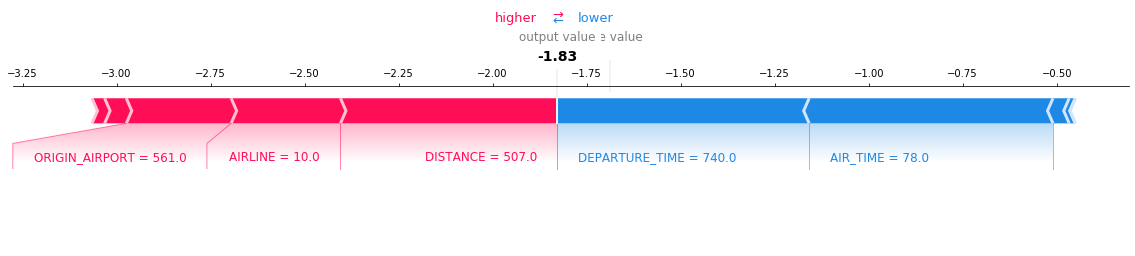

In [11]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer2 = shap.TreeExplainer(clf2)
shap_values2 = explainer2.shap_values(cb.Pool(train, y_train, cat_features=cat_features_index))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer2.expected_value, shap_values2[0,:], train.iloc[0,:], matplotlib=True)

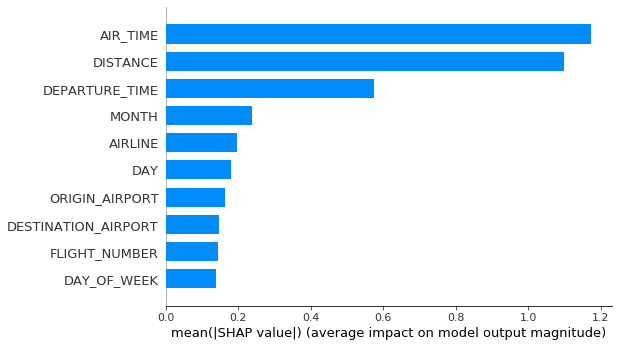

In [12]:
# summarize the effects of all the features
shap.summary_plot(shap_values1, train, plot_type="bar")

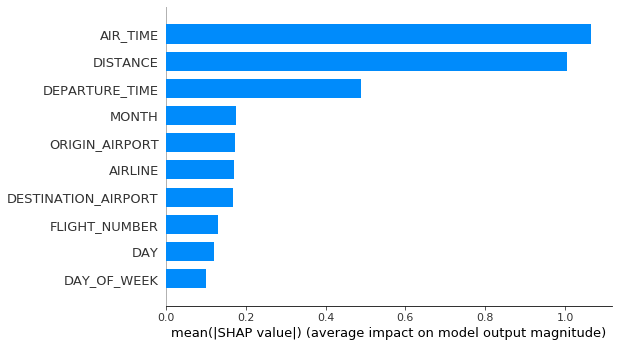

In [13]:
shap.summary_plot(shap_values2, train, plot_type="bar")

In [14]:
clf.get_feature_importance()

array([10.70788332, 11.35796999,  8.55451838,  8.43999194,  9.96729434,
        9.32497399,  9.77046875,  8.97778156, 14.35257151,  8.54654622])